
Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/gogo827jz/self-stacking-groupcv-xgboost

* https://www.kaggle.com/c/lish-moa/discussion/197158


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, adjust lgbm params; 'lambda_l2':3,
# Version = "v59" # inference used v53, adjust lgbm params; 'lambda_l2':15,
# Version = "v60" # inference used v53, adjust lgbm params; 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, adjust lgbm params; 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3
# Version = "v63" # inference used v53, adjust lgbm params; 'lambda_l2':15,
# Version = "v64" # inference used v53, if iter_ == max_iter: X_test["pred_feat"] = y_prob.copy()
# Version = "v65" # inference used v53, Apply RankGauss(df) to "pred_feat"
# Version = "v66" # inference used v53, Apply clipping & RankGauss(df) to "pred_feat"
# Version = "v67" # Select, VarianceThreshold(0.98), select_importance_cols(num=300)
# Version = "v68" # inference used v67, np.clip
# Version = "v69" # inference used v67, if _score > 0.02: np.clip
# Version = "v70" # inference used v67, adjust prediction
# Version = "v71" # inference used v67, (Threshold+0.03) >= 0.96
# Version = "v72" # inference used v67, remove "if (p_label_rate*1.5) < target_rate" from the Adj_threshold func
# Version = "v73" # inference used v67, exclusive_cols→Under_Sampling func
# Version = "v74" # inference used v67, feature engining for unpredictable_cols(create_features func 30)
# Version = "v75" # inference used v67, avoid overfit for unpredictable_cols
# Version = "v76" # inference used v67, adjust lgm params; 'feature_fraction':0.1, 'lambda_l2': 200,
# Version = "v77" # inference used v67, Add pca to create_features func 
# Version = "v78" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.05,'subsample': 0.7,'reg_lambda': 100,
# Version = "v79" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.04,　'subsample': 0.7,'reg_lambda': 200,
# Version = "v80" # inference used v67, lgm params used v78, N_FOLD = 5
# Version = "v81" # inference used v67, lgm params used v78, N_FOLD = 5&Early_stopping_rounds=29, unpredictable_cols→ N_FOLD = 3 & Early_stopping_rounds=39
# Version = "v82" # Select, DEBUG = True, 'feature_fraction':0.007, select_importance_cols(num=300),

Version = "v83" # inference used v67, lgm params used　v79, odds_gene_df["Log"] < 1.0→0.0

In [2]:
#DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3rd November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v67.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor       acat_inhibitor  \
0                       d_g-493                 d_g-21          cut_d_g-508   
1                         g-648                d_g-401             df_g-420   
2                         g-643          d_g_max_min_p          cut_d_g-152   
3                         g-498                d_g-639              df_g-22   
4                    cut_d_c-31                  g-497             df_g-564   
..                          ...                    ...                  ...   
295                     d_g-310                d_g-263              df_g-94   
296                     d_g-443        g_all_max_min_p              df_c-37   
297                 cut_d_g-258        c_d_c_max_min_p  d_g_df_g_max_skew_d   
298            c_df_c_max_std_p                d_g-120                 c-30   
299                       g-636               df_g-165             df_g-583   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                      cut_d_g-363                         cut_g-760   
1                           d_g-39                       cut_d_g-763   
2                      cut_d_g-116                        cut_d_g-85   
3                      cut_d_g-712                          df_g-663   
4                            g-693                            df_c-6   
..                             ...                               ...   
295                        df_g-94                          df_g-541   
296                       df_g-488                          df_g-732   
297                       df_g-244                             g-565   
298            d_c_df_c_max_skew_p                           d_g-583   
299                        d_g-171                             g-683   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                      cut_d_g-705                 cut_d_g-23   
1                      cut_d_g-208                cut_d_g-142   
2                          df_g-91                 cut_d_g-69   
3                      cut_d_g-132                     d_c-84   
4                      cut_d_g-348                   df_g-386   
..                             ...                        ...   
295                       df_g-735             d_c_max_skew_d   
296                          g-576                     d_c-39   
297                        d_g-337                    d_g-200   
298                     cut_d_g-50            df_g_max_skew_p   
299                          g-226                      g-531   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                     cut_d_g-641                       g-91   
1                     cut_d_g-163                    d_g-639   
2                         d_g-310                      g-344   
3                     cut_d_g-430                      g-138   
4                      cut_d_g-85                      g-705   
..                            ...                        ...   
295                        d_g-50                      g-208   
296              c_all_min_kurt_p                      g-551   
297                df_c_max_std_d                   df_g-664   
298                         g-297                     d_c-23   
299                   cut_d_g-103                    d_g-194   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                   cut_d_g-705  ...                                 g-226   
1                    cut_d_g-50  ...                               d_g-283   
2                         g-385  ...                           cut_d_g-225   
3                   cut_d_g-300  ...                                 g-689   
4                       df_c-76  ...                           cut_d_g-602   
..                          ...  ...                                   ...   
295                 cut_d_g-447  ...                              df_g-171   
296             

In [13]:
log_odds = pd.read_csv("../input/moa-annot-data/20201121_train_targets_scored.matrix_odds_results.csv")
log_odds

Gene1                                  Gene2  \
0      X5-alpha_reductase_inhibitor           X5-alpha_reductase_inhibitor   
1      X5-alpha_reductase_inhibitor                X11-beta-hsd1_inhibitor   
2      X5-alpha_reductase_inhibitor                         acat_inhibitor   
3      X5-alpha_reductase_inhibitor         acetylcholine_receptor_agonist   
4      X5-alpha_reductase_inhibitor      acetylcholine_receptor_antagonist   
...                             ...                                    ...   
42431                 wnt_inhibitor  ubiquitin_specific_protease_inhibitor   
42432                 wnt_inhibitor                        vegfr_inhibitor   
42433                 wnt_inhibitor                              vitamin_b   
42434                 wnt_inhibitor             vitamin_d_receptor_agonist   
42435                 wnt_inhibitor                          wnt_inhibitor   

            odds       Log        SD  Lower95CL    Upper95CL   p.value  \
0       1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   
1      33.843243  3.521739  1.453012   1.961852   583.818219  0.015361   
2      25.548105  3.240563  1.448449   1.494296   436.798171  0.025269   
3       3.260817  1.181978  1.436119   0.195389    54.419345  0.410487   
4       2.049799  0.717742  1.435446   0.122986    34.163726  0.617066   
...          ...       ...       ...        ...          ...       ...   
42431  55.264817  4.012136  1.478742   3.046078  1002.666332  0.006664   
42432   2.091101  0.737691  1.427830   0.127352    34.335710  0.605399   
42433  13.543149  2.605881  1.438947   0.807023   227.275980  0.070146   
42434   9.080515  2.206131  1.434625   0.545702   151.100368  0.124104   
42435   1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   

        q.value  
0      0.522100  
1      0.057533  
2      0.073394  
3      0.311654  
4      0.396877  
...         ...  
42431  0.040493  
42432  0.392840  
42433  0.116678  
42434  0.159335  
42435  0.522100  

[42436 rows x 9 columns]

In [14]:
exclusive_cols = (
    "acetylcholine_receptor_agonist", 
    "acetylcholine_receptor_antagonist", 
    "adrenergic_receptor_agonist",
    "adrenergic_receptor_antagonist",
    "bacterial_cell_wall_synthesis_inhibitor",
    "bacterial_dna_inhibitor",
    "calcium_channel_blocker",
    "cdk_inhibitor",
    "dna_inhibitor",
    "dopamine_receptor_agonist",
    "dopamine_receptor_antagonist",
    "egfr_inhibitor",
    "estrogen_receptor_agonist",
    "flt3_inhibitor",
    "gaba_receptor_antagonist",
    "glucocorticoid_receptor_agonist",
    "glutamate_receptor_antagonist",
    "histamine_receptor_antagonist",
    "hmgcr_inhibitor",
    "kit_inhibitor",
    "mtor_inhibitor",
    "nfkb_inhibitor",
    "pdgfr_inhibitor",
    "phosphodiesterase_inhibitor",
    "pi3k_inhibitor",
    "proteasome_inhibitor",
    "serotonin_receptor_agonist",
    "serotonin_receptor_antagonist",
    "sodium_channel_inhibitor",
    "tubulin_inhibitor",
    "vegfr_inhibitor"
)
       

In [15]:
odds_gene2_df = pd.DataFrame()

for col in exclusive_cols:
    odds_gene_df = log_odds[log_odds["Gene1"]==col]
    odds_gene2 = odds_gene_df[(odds_gene_df["p.value"] <= 0.3) & (odds_gene_df["Log"] < 0.0)]["Gene2"]

    odds_gene2 = pd.DataFrame(odds_gene2)
    odds_gene2 = odds_gene2.rename(columns={"Gene2": col}).reset_index(drop=True)
    odds_gene2_df = pd.concat([odds_gene2_df, odds_gene2], axis=1)


odds_gene2_df

acetylcholine_receptor_agonist  \
0   acetylcholine_receptor_antagonist   
1         adrenergic_receptor_agonist   
2      adrenergic_receptor_antagonist   
3             calcium_channel_blocker   
4                       cdk_inhibitor   
..                                ...   
67                                NaN   
68                                NaN   
69                                NaN   
70                                NaN   
71                                NaN   

          acetylcholine_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1               adrenergic_receptor_agonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
67                                      NaN   
68                                      NaN   
69                                      NaN   
70                                      NaN   
71                                      NaN   

                adrenergic_receptor_agonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
67                                      NaN   
68                                      NaN   
69                                      NaN   
70                                      NaN   
71                                      NaN   

             adrenergic_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
67                                      NaN   
68                                      NaN   
69                                      NaN   
70                                      NaN   
71                                      NaN   

   bacterial_cell_wall_synthesis_inhibitor        bacterial_dna_inhibitor  \
0        acetylcholine_receptor_antagonist       cyclooxygenase_inhibitor   
1              adrenergic_receptor_agonist   dopamine_receptor_antagonist   
2           adrenergic_receptor_antagonist                 nfkb_inhibitor   
3                  calcium_channel_blocker           proteasome_inhibitor   
4                            cdk_inhibitor  serotonin_receptor_antagonist   
..                                     ...                            ...   
67                                     NaN                            NaN   
68                                     NaN                            NaN   
69                                     NaN                            NaN   
70                                     NaN                            NaN   
71                                     NaN                            NaN   

                    calcium_channel_blocker  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   
67                                      NaN   
68                                      NaN   
69                                      NaN   
70                                      NaN   
71                                      NaN   

                              cdk_inhibitor  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   


In [16]:
# cope & paste from my v73 notebook

unpredictable_cols = (
 'acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'adenosine_receptor_antagonist',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'anesthetic_-_local',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'calcium_channel_blocker',
 'cc_chemokine_receptor_antagonist',
 'cdk_inhibitor',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dna_inhibitor',
 'dopamine_receptor_agonist',
 'dopamine_receptor_antagonist',
 'egfr_inhibitor',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'gaba_receptor_antagonist',
 'glucocorticoid_receptor_agonist',
 'glutamate_receptor_antagonist',
 'hdac_inhibitor',
 'histamine_receptor_antagonist',
 'hmgcr_inhibitor',
 'kit_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'pdgfr_inhibitor',
 'phosphodiesterase_inhibitor',
 'pi3k_inhibitor',
 'potassium_channel_antagonist',
 'ppar_receptor_agonist',
 'progesterone_receptor_agonist',
 'proteasome_inhibitor',
 'protein_synthesis_inhibitor',
 'raf_inhibitor',
 'serotonin_receptor_agonist',
 'serotonin_receptor_antagonist',
 'sodium_channel_inhibitor',
 'topoisomerase_inhibitor',
 'tubulin_inhibitor',
 'vegfr_inhibitor'
)

# Training Utils

In [17]:
#===========================================================
# training & inference model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Under_Sampling(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}")
    logger.info(f"target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    # Create train_data
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
        
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # fold_lgbm
    y_preds_, train_y_, oof_train_ = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds_) / len(y_preds_), train_y_, oof_train_

In [18]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [19]:
# Under sampling func 

def Under_Sampling(input_df, target_col, target):
    
    _df = input_df.copy()
    
    # under sampling with mutually exclusive columns
    if target_col in exclusive_cols:
        print(f"mutually exclusive columns: {target_col}")
        target_exclusive = odds_gene2_df[target_col].dropna()
        target_ex = train_targets_scored[list(target_exclusive)]
        
        # 1 or more, replace it with 1.
        target_ex = target_ex.sum(axis=1)
        target_ex = target_ex.where(target_ex < 1, 1)
        
        _df = _df[target_ex == 1].copy().reset_index(drop=True)
        _df = _df.drop("sig_id", axis=1)
    
    # under sampling with drug anotation(New data file)
    else:
        sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
        # Remove sig_id wih target 
        del_idx = train[target >= 1].sig_id.unique()
        select_idx = [i for i in sig_id_lst if i not in del_idx]
        
        # Select negative target wiht multi_Stratification
        _df = _df.set_index('sig_id')
        _df = _df.loc[select_idx, :]
        _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    print(f"selected negative label: {len(_df)}")
    
    return _df

In [20]:
# lgbm with training & inference model


def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        if target_col in unpredictable_cols:
            
            params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.1, 
                'lambda_l1': 0.1,
                'lambda_l2': 300,
                'bagging_fraction': 0.7,
                'bagging_freq': 1,
            }
            
        else:
             params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.4, 
                'lambda_l1': 0.1,
                'lambda_l2': 3,
                'bagging_fraction': 0.8,
                'bagging_freq': 1,
            }
            
            
            
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
     
    return y_preds, _train_y, oof_train 

In [21]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df, target_col)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        pr_score = average_precision_score(y_preds[:, 0], y_preds[:, 1])
         
        logger.info(f"{iter_} / {max_iter}, AUC score:{auc_score:.3f}, PR-AUC:{pr_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.79), min(Threshold*upper, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {(len(y_prob)*target_rate):.1f}, Threshold: {Threshold:.7f}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")
        
        # set the threshold based on train labels distribution (target_rate)
        if p_label_rate > target_rate:
            p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, target_rate, y_prob, lower, upper)
        
        # select data with confidence            
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [22]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, _y_preds, _y_prob, _importance_df, feature_importance_df_, target_col):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
        
        if target_col in unpredictable_cols:
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.1,
                'objective': "binary",
                'colsample_bytree': 0.04,
                'subsample': 0.7,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 200,
                'random_state': SEED,
                'n_jobs': 4
            }
            
        else:
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.03,
                'objective': "binary",
                'colsample_bytree': 0.4,
                'subsample': 0.8,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 0.1,
                'random_state': SEED,
                'n_jobs': 4
            }
            
            
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=1000,
                early_stopping_rounds=Early_stopping_rounds)
            
        _y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        _y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df_ = pd.concat([feature_importance_df_, _importance_df], axis=0)
        
    return _y_preds, _y_prob, feature_importance_df_
    

In [23]:
# select important features with pseudo_labeling

def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col]
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    _X, _X_test = _X[selected_cols], _X_test[selected_cols]
    
    X_, X_test_ = create_features(_X, _X_test)
    
    logger.info(f'N_features:{len(X_.columns)}')

    return X_, _y, X_test_

In [24]:
# create features with pseudo_labeling

def create_features(df_trt, df_tst):
    
    from sklearn.decomposition import PCA
    
    df_trt['WHERE'], df_tst['WHERE'] = 'trt', 'tst'
    _df = df_trt.append(df_tst)
    _df = _df.reset_index(drop=True)
    _Splitdata = _df["WHERE"]
    _df = _df.drop('WHERE', axis=1)
    
    pca_transformer = PCA(n_components=0.9, whiten=True, random_state=SEED)
    _pca = pca_transformer.fit_transform(_df)
    _pca_df = pd.DataFrame(_pca)
    pca_cols = [f"pca_{i+1}" for i in range(_pca_df.shape[1])]
    _pca_df.columns = pca_cols
    
    _df = pd.concat([_df, _pca_df], axis=1)
    
    _df['WHERE'] = _Splitdata
    trt_ = _df[_df['WHERE']=="trt"].drop('WHERE', axis=1).reset_index(drop=True)
    tst_ = _df[_df['WHERE']=="tst"].drop('WHERE', axis=1).reset_index(drop=True)
    
    return trt_, tst_

In [25]:
# convert labels with pseudo_labeling

def convert_label(input_df, conf_0, conf_1, threshold=0.5):
    
    _df = input_df.copy()
    Probability = _df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = _df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [26]:
# adj threshold with pseudo_labeling

def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold_, target_rate, y_prob, lower_, upper_):
    
    check = len(y_prob)*target_rate
        
    for i in range(10):
        if (sum(p_label) <= check*(3.5-len(str(int(check))))) or (Threshold_ >= 0.96): break
            
        Threshold_ += 0.03
        high_conf_0, high_conf_1 = min(Threshold_*lower_, 0.79), min(Threshold_*upper_, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold_)
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold_:.7f}")
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold_

In [27]:
# check importance features with pseudo_labeling

def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [28]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [29]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [30]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [31]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [32]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [33]:
# clipping for control data

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [34]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [35]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [36]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [37]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [38]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [39]:
#std_df = data.iloc[:, 4:].copy()

In [40]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [41]:
std_df = data.iloc[:, 4:].copy()

In [42]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [43]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [44]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [45]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [46]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [47]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [48]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [49]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [50]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [51]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

In [52]:
categorical_cols = []

def RUN():
    
    scores = []
    unpredictable = []
    
    for target_col in tqdm(train_targets_scored.columns[1:]):
    #for target_col in ('acetylcholine_receptor_agonist','acetylcholine_receptor_antagonist',):
        
        _score = 0.0
        
        _preds, _train_y, _oof_train = run_lgbm(target_col)
        sub[target_col] = _preds
        
        _score = log_loss(_train_y, _oof_train)
        scores.append(_score)
        
        logger.info(f"=========================================================================================")
        logger.info(f"{target_col} logloss: {_score}")
        
        if _score > 0.03:
            unpredictable.append(target_col)
            logger.info(f"{target_col} is unpredictable(><)!")
        
        
        logger.info(f"=========================================================================================")
        logger.info(f"=========================================================================================")
        
    logger.info(f"=========================================================================================")
    
    sub.to_csv('submission.csv', index=False)
    logger.info(f"CV:{np.mean(scores)}")
        
    return unpredictable
    

5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284
target_rate: 0.0007139 → Adj_target_rate: 0.0009334


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000293623	valid_1's binary_logloss: 0.000970191
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000292667	valid_1's binary_logloss: 0.00203699
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000295845	valid_1's binary_logloss: 0.000753107
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015064, Threshold: 0.0055061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071
Num_p_label: 40.0, Expected: 2.8, Threshold: 0.0055061, conf_0:0.00385, conf_1:0.00716
Num_p_label: 5.0, Expected: 2.8, Adj_threshold_1: 0.0355061
threshold: 0.0355061, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000292069	valid_1's binary_logloss: 0.00513589


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000280041	valid_1's binary_logloss: 0.0013645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000289957	valid_1's binary_logloss: 0.00137352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000295187	valid_1's binary_logloss: 0.000768011
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0268294, Threshold: 0.0355061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00071
Num_p_label: 17.0, Expected: 2.8, Threshold: 0.0355061, conf_0:0.02840, conf_1:0.04261
Num_p_label: 9.0, Expected: 2.8, Adj_threshold_1: 0.0655061
Num_p_label: 6.0, Expected: 2.8, Adj_threshold_2: 0.0955061
threshold: 0.0955061, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000290698	valid_1's binary_logloss: 0.00443832


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000280041	valid_1's binary_logloss: 0.0013645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000289957	valid_1's binary_logloss: 0.00137352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000295187	valid_1's binary_logloss: 0.000768011
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0268294, Threshold: 0.0955061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00071
Num_p_label: 6.0, Expected: 2.8, Threshold: 0.0955061, conf_0:0.08596, conf_1:0.10506
threshold: 0.0955061, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000290698	valid_1's binary_logloss: 0.00443832


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


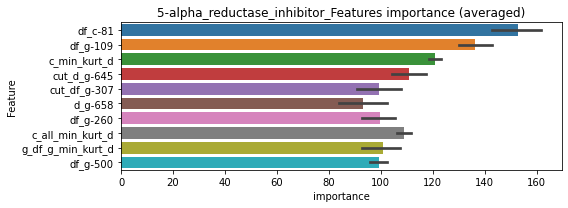

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000293487	valid_1's binary_logloss: 0.001093
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000285339	valid_1's binary_logloss: 0.000858941
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000289784	valid_1's binary_logloss: 0.00102207
Training until validation scores don't improve for 30 rounds


5-alpha_reductase_inhibitor logloss: 0.0013725818817934006


Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000293545	valid_1's binary_logloss: 0.00251509


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000295372	valid_1's binary_logloss: 0.000831571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000289712	valid_1's binary_logloss: 0.00103864
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000304841	valid_1's binary_logloss: 0.00218194
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013890, Threshold: 0.0040182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0040182, conf_0:0.00281, conf_1:0.00522
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0340182


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000302041	valid_1's binary_logloss: 0.000830726


threshold: 0.0340182, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287835	valid_1's binary_logloss: 0.000885126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00028748	valid_1's binary_logloss: 0.00124907
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000290913	valid_1's binary_logloss: 0.00234496
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0331658, Threshold: 0.0340182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0340182, conf_0:0.02721, conf_1:0.04082
threshold: 0.0340182, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000289206	valid_1's binary_logloss: 0.000860384


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287835	valid_1's binary_logloss: 0.000885126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00028748	valid_1's binary_logloss: 0.00124907
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000290913	valid_1's binary_logloss: 0.00234496
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0331658, Threshold: 0.0340182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0340182, conf_0:0.03062, conf_1:0.03742


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000289206	valid_1's binary_logloss: 0.000860384


threshold: 0.0340182, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


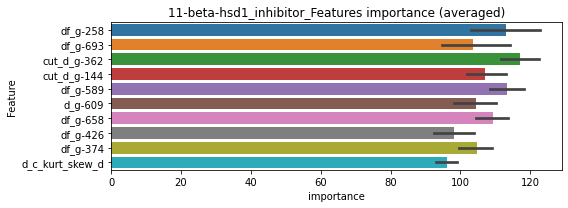

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000284511	valid_1's binary_logloss: 0.000810789
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000284522	valid_1's binary_logloss: 0.00081077


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000290508	valid_1's binary_logloss: 0.000924504


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000298043	valid_1's binary_logloss: 0.00124361


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000291321	valid_1's binary_logloss: 0.000776675


11-beta-hsd1_inhibitor logloss: 0.0009389364299642631
acat_inhibitor, len(trt): 24, len(othr): 3282
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3282


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000336517	valid_1's binary_logloss: 0.00491599
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000343889	valid_1's binary_logloss: 0.0039385
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000357722	valid_1's binary_logloss: 0.00231797
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018501, Threshold: 0.0046275, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000348473	valid_1's binary_logloss: 0.00688178


Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0046275, conf_0:0.00324, conf_1:0.00602
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_1: 0.0346275
threshold: 0.0346275, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000331762	valid_1's binary_logloss: 0.00544989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000338596	valid_1's binary_logloss: 0.0036296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000381795	valid_1's binary_logloss: 0.00289043
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158005, Threshold: 0.0346275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0346275, conf_0:0.02770, conf_1:0.04155
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_1: 0.0646275


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000336819	valid_1's binary_logloss: 0.00643042


threshold: 0.0646275, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000331762	valid_1's binary_logloss: 0.00544989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000338596	valid_1's binary_logloss: 0.0036296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000381795	valid_1's binary_logloss: 0.00289043
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158005, Threshold: 0.0646275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.0646275, conf_0:0.05816, conf_1:0.07109


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000336819	valid_1's binary_logloss: 0.00643042


threshold: 0.0646275, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


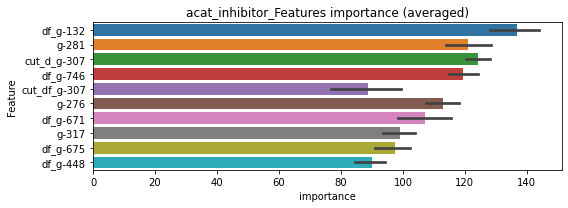

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000329791	valid_1's binary_logloss: 0.00349467


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 acat_inhibitor=================================


Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000360797	valid_1's binary_logloss: 0.00270942
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855


Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000354877	valid_1's binary_logloss: 0.00270428


len(valid_index) : 951
================================= fold 4/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000340395	valid_1's binary_logloss: 0.00452011


acat_inhibitor logloss: 0.0033571775050696235


mutually exclusive columns: acetylcholine_receptor_agonist


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 6396
target_rate: 0.0079785 → Adj_target_rate: 0.0072634


selected negative label: 6396


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0487372	valid_1's binary_logloss: 0.119169
[2000]	training's binary_logloss: 0.0245718	valid_1's binary_logloss: 0.107523
Early stopping, best iteration is:
[2287]	training's binary_logloss: 0.0213885	valid_1's binary_logloss: 0.106102
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0514641	valid_1's binary_logloss: 0.095234
[2000]	training's binary_logloss: 0.0257766	valid_1's binary_logloss: 0.0800883
[3000]	training's binary_logloss: 0.0166674	valid_1's binary_logloss: 0.074655
Early stopping, best iteration is:
[3585]	training's binary_logloss: 0.0137871	valid_1's binary_logloss: 0.0728095
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0523272	valid_1's binary_logloss: 0.0862393
[2000]	training's binary_logloss: 0.0263407	valid_1's binary_logloss: 0.0707788
[3000]	training's binary_logloss

1 / 3, AUC score:0.986, PR-AUC:0.970
y_Threshold: 0.0530226, Threshold: 0.0872276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 392 → Positive_corect_labels: 1211/7283
p_label_rate: 0.0100452 Vs.target_rate: 0.00798
Num_p_label: 40.0, Expected: 31.8, Threshold: 0.0872276, conf_0:0.06106, conf_1:0.11340
threshold: 0.0872276, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1211.0/7283, y_label_rate: 0.1662776
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0381499	valid_1's binary_logloss: 0.0830529
[2000]	training's binary_logloss: 0.0190499	valid_1's binary_logloss: 0.0715067
Early stopping, best iteration is:
[2296]	training's binary_logloss: 0.016558	valid_1's binary_logloss: 0.0702082
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0380325	valid_1's binary_logloss: 0.0793414
[2000]	training's binary_logloss: 0.0191173	valid_1's binary_logloss: 0.0650342
Early stopping, best iteration is:
[2958]	training's binary_logloss: 0.0127815	valid_1's binary_logloss: 0.0606893
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0389701	valid_1's binary_logloss: 0.0761127
[2000]	training's binary_logloss: 0.0196945	valid_1's binary_logloss: 0.0624111
Early stopping, best iteration is:
[2552]	training's binary_logloss: 0.0152573	valid_1's binary_logloss: 0.0

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0747032, Threshold: 0.0872276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 88 → Positive_corect_labels: 1167.0/7195
p_label_rate: 0.0140633 Vs.target_rate: 0.00798
Num_p_label: 56.0, Expected: 31.8, Threshold: 0.0872276, conf_0:0.06978, conf_1:0.10467
Num_p_label: 30.0, Expected: 31.8, Adj_threshold_1: 0.1172276
threshold: 0.1172276, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 1167.0/7195, y_label_rate: 0.1621960
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0317657	valid_1's binary_logloss: 0.063864
[2000]	training's binary_logloss: 0.0161137	valid_1's binary_logloss: 0.0504523
[3000]	training's binary_logloss: 0.0106706	valid_1's binary_logloss: 0.0456023
Early stopping, best iteration is:
[3587]	training's binary_logloss: 0.00888985	valid_1's binary_logloss: 0.0438403
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0314392	valid_1's binary_logloss: 0.0665929
[2000]	training's binary_logloss: 0.0157094	valid_1's binary_logloss: 0.0537259
Early stopping, best iteration is:
[2811]	training's binary_logloss: 0.0111028	valid_1's binary_logloss: 0.0503179
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0330175	valid_1's binary_logloss: 0.0533744
[2000]	training's binary_logloss: 0.0166488	valid_1's binary_logloss: 0.0400683
[3000]	training's binary_lo

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0709628, Threshold: 0.1172276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 1144.0/7149
p_label_rate: 0.0042692 Vs.target_rate: 0.00798
Num_p_label: 17.0, Expected: 31.8, Threshold: 0.1172276, conf_0:0.10550, conf_1:0.12895
threshold: 0.1172276, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 1144.0/7149, y_label_rate: 0.1600224


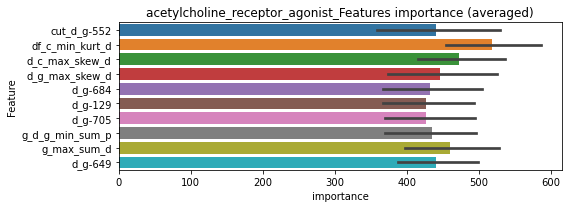

len(train_index) : 5361
len(valid_index) : 1788
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0311713	valid_1's binary_logloss: 0.0564902
[2000]	training's binary_logloss: 0.0159264	valid_1's binary_logloss: 0.0427205
[3000]	training's binary_logloss: 0.0106231	valid_1's binary_logloss: 0.0379918
[4000]	training's binary_logloss: 0.00796083	valid_1's binary_logloss: 0.0357846
[5000]	training's binary_logloss: 0.00636917	valid_1's binary_logloss: 0.0342705
Early stopping, best iteration is:
[4993]	training's binary_logloss: 0.0063778	valid_1's binary_logloss: 0.0342612


len(train_index) : 5362
len(valid_index) : 1787
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0308964	valid_1's binary_logloss: 0.0553301
[2000]	training's binary_logloss: 0.0157732	valid_1's binary_logloss: 0.0406626
[3000]	training's binary_logloss: 0.0105099	valid_1's binary_logloss: 0.0352279
[4000]	training's binary_logloss: 0.00787576	valid_1's binary_logloss: 0.0326244
[5000]	training's binary_logloss: 0.00629997	valid_1's binary_logloss: 0.0309408
[6000]	training's binary_logloss: 0.00525885	valid_1's binary_logloss: 0.0298665
[7000]	training's binary_logloss: 0.00451625	valid_1's binary_logloss: 0.0290716
[8000]	training's binary_logloss: 0.00396289	valid_1's binary_logloss: 0.0284446
Early stopping, best iteration is:
[8531]	training's binary_logloss: 0.00372362	valid_1's binary_logloss: 0.0281351


len(train_index) : 5362
len(valid_index) : 1787
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0316479	valid_1's binary_logloss: 0.0522447
[2000]	training's binary_logloss: 0.0160947	valid_1's binary_logloss: 0.0376732
[3000]	training's binary_logloss: 0.010738	valid_1's binary_logloss: 0.0325988
[4000]	training's binary_logloss: 0.00803353	valid_1's binary_logloss: 0.0298092
Early stopping, best iteration is:
[4814]	training's binary_logloss: 0.00668196	valid_1's binary_logloss: 0.0284337


len(train_index) : 5362
len(valid_index) : 1787
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0309585	valid_1's binary_logloss: 0.0543902
[2000]	training's binary_logloss: 0.0158947	valid_1's binary_logloss: 0.0403953
[3000]	training's binary_logloss: 0.0106398	valid_1's binary_logloss: 0.0356028
[4000]	training's binary_logloss: 0.00795296	valid_1's binary_logloss: 0.0330902
[5000]	training's binary_logloss: 0.00636303	valid_1's binary_logloss: 0.0316854
Early stopping, best iteration is:
[5195]	training's binary_logloss: 0.00612458	valid_1's binary_logloss: 0.0314684


acetylcholine_receptor_agonist logloss: 0.03057511449767086
acetylcholine_receptor_agonist is unpredictable(><)!


mutually exclusive columns: acetylcholine_receptor_antagonist


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 7534
target_rate: 0.0126396 → Adj_target_rate: 0.0107394


selected negative label: 7534


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0647262	valid_1's binary_logloss: 0.14534
[2000]	training's binary_logloss: 0.0322548	valid_1's binary_logloss: 0.130232
Early stopping, best iteration is:
[2090]	training's binary_logloss: 0.0307277	valid_1's binary_logloss: 0.12946
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0657577	valid_1's binary_logloss: 0.136584
[2000]	training's binary_logloss: 0.0327285	valid_1's binary_logloss: 0.11884
Early stopping, best iteration is:
[2912]	training's binary_logloss: 0.0216715	valid_1's binary_logloss: 0.11382
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0648419	valid_1's binary_logloss: 0.142652
[2000]	training's binary_logloss: 0.0323501	valid_1's binary_logloss: 0.125591
Early stopping, best iteration is:
[2367]	training's binary_logloss: 0.0269355	valid_1's binary_logloss: 0.123119
Train

1 / 3, AUC score:0.967, PR-AUC:0.944
y_Threshold: 0.0718447, Threshold: 0.1305973, pos_neg_ratio: 0.8000000
Remove_noisy_data: 568 → Positive_corect_labels: 1373/8472
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, Expected: 50.3, Threshold: 0.1305973, conf_0:0.09142, conf_1:0.16978
threshold: 0.1305973, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1373.0/8472, y_label_rate: 0.1620633
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0467961	valid_1's binary_logloss: 0.0972129
[2000]	training's binary_logloss: 0.023294	valid_1's binary_logloss: 0.0787899
[3000]	training's binary_logloss: 0.0150871	valid_1's binary_logloss: 0.0727053
Early stopping, best iteration is:
[3058]	training's binary_logloss: 0.0147662	valid_1's binary_logloss: 0.0724393
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0461798	valid_1's binary_logloss: 0.0906133
[2000]	training's binary_logloss: 0.0229307	valid_1's binary_logloss: 0.0726435
[3000]	training's binary_logloss: 0.0148955	valid_1's binary_logloss: 0.0658582
Early stopping, best iteration is:
[3609]	training's binary_logloss: 0.0122829	valid_1's binary_logloss: 0.063833
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.046278	valid_1's binary_logloss: 0.0961661
[2000]	training's binary_loglo

2 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0878582, Threshold: 0.1305973, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 1317.0/8360
p_label_rate: 0.0095429 Vs.target_rate: 0.01264
Num_p_label: 38.0, Expected: 50.3, Threshold: 0.1305973, conf_0:0.10448, conf_1:0.15672
threshold: 0.1305973, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 1317.0/8360, y_label_rate: 0.1575359
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0396771	valid_1's binary_logloss: 0.0797654
[2000]	training's binary_logloss: 0.0197273	valid_1's binary_logloss: 0.0620138
[3000]	training's binary_logloss: 0.0128139	valid_1's binary_logloss: 0.0555925
Early stopping, best iteration is:
[3458]	training's binary_logloss: 0.0110539	valid_1's binary_logloss: 0.0540888
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0396906	valid_1's binary_logloss: 0.0759354
[2000]	training's binary_logloss: 0.0196648	valid_1's binary_logloss: 0.0607995
[3000]	training's binary_logloss: 0.0128051	valid_1's binary_logloss: 0.0551361
Early stopping, best iteration is:
[3019]	training's binary_logloss: 0.0127162	valid_1's binary_logloss: 0.055062
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0399423	valid_1's binary_logloss: 0.0807019
[2000]	training's binary_log

3 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0784393, Threshold: 0.1305973, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 1287.0/8300
p_label_rate: 0.0087896 Vs.target_rate: 0.01264
Num_p_label: 35.0, Expected: 50.3, Threshold: 0.1305973, conf_0:0.11754, conf_1:0.14366
threshold: 0.1305973, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 1287.0/8300, y_label_rate: 0.1550602


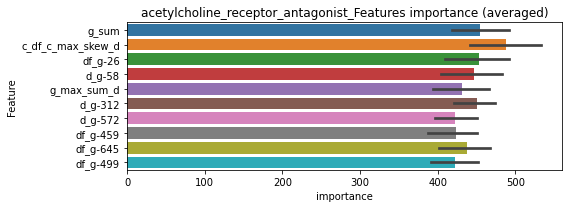

len(train_index) : 6225
len(valid_index) : 2075
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0391599	valid_1's binary_logloss: 0.0725069
[2000]	training's binary_logloss: 0.0197977	valid_1's binary_logloss: 0.0538668
[3000]	training's binary_logloss: 0.0130779	valid_1's binary_logloss: 0.046932
[4000]	training's binary_logloss: 0.00967742	valid_1's binary_logloss: 0.0434247
Early stopping, best iteration is:
[4600]	training's binary_logloss: 0.00839701	valid_1's binary_logloss: 0.0420533


len(train_index) : 6225
len(valid_index) : 2075
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0385916	valid_1's binary_logloss: 0.0754757
[2000]	training's binary_logloss: 0.0194082	valid_1's binary_logloss: 0.0591339
[3000]	training's binary_logloss: 0.0127987	valid_1's binary_logloss: 0.0532945
[4000]	training's binary_logloss: 0.00948585	valid_1's binary_logloss: 0.0505132
Early stopping, best iteration is:
[4039]	training's binary_logloss: 0.0093942	valid_1's binary_logloss: 0.0504294


len(train_index) : 6225
len(valid_index) : 2075
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0391269	valid_1's binary_logloss: 0.0696877
[2000]	training's binary_logloss: 0.0197484	valid_1's binary_logloss: 0.0531798
[3000]	training's binary_logloss: 0.0130251	valid_1's binary_logloss: 0.0473494
[4000]	training's binary_logloss: 0.00966105	valid_1's binary_logloss: 0.044533
Early stopping, best iteration is:
[4426]	training's binary_logloss: 0.00872631	valid_1's binary_logloss: 0.0436905


len(train_index) : 6225
len(valid_index) : 2075
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0396062	valid_1's binary_logloss: 0.0695969
[2000]	training's binary_logloss: 0.0199593	valid_1's binary_logloss: 0.0513246
[3000]	training's binary_logloss: 0.0131509	valid_1's binary_logloss: 0.044587
[4000]	training's binary_logloss: 0.00977734	valid_1's binary_logloss: 0.0410496
Early stopping, best iteration is:
[4044]	training's binary_logloss: 0.00966709	valid_1's binary_logloss: 0.0408861


acetylcholine_receptor_antagonist logloss: 0.04426484210975132
acetylcholine_receptor_antagonist is unpredictable(><)!
acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000685024	valid_1's binary_logloss: 0.0325866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000671906	valid_1's binary_logloss: 0.0281289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000898113	valid_1's binary_logloss: 0.0176292
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000732003	valid_1's binary_logloss: 0.0236906


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0081002, Threshold: 0.0223018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 135 → Positive_corect_labels: 653/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0223018, conf_0:0.01561, conf_1:0.02899
Num_p_label: 8.0, Expected: 12.2, Adj_threshold_1: 0.0523018
threshold: 0.0523018, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.00062549	valid_1's binary_logloss: 0.0339438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000685437	valid_1's binary_logloss: 0.0218289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000648642	valid_1's binary_logloss: 0.0195687
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000633588	valid_1's binary_logloss: 0.0118497


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0422440, Threshold: 0.0523018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 648.0/3785
p_label_rate: 0.0115520 Vs.target_rate: 0.00307
Num_p_label: 46.0, Expected: 12.2, Threshold: 0.0523018, conf_0:0.04184, conf_1:0.06276
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_1: 0.0823018
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_2: 0.1123018
threshold: 0.1123018, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 648.0/3785, y_label_rate: 0.1712021
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000603334	valid_1's binary_logloss: 0.0264773
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000811472	valid_1's binary_logloss: 0.034059
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000785764	valid_1's binary_logloss: 0.0201517
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000690087	valid_1's binary_logloss: 0.0212579


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0421190, Threshold: 0.1123018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 644.0/3777
p_label_rate: 0.0062783 Vs.target_rate: 0.00307
Num_p_label: 25.0, Expected: 12.2, Threshold: 0.1123018, conf_0:0.10107, conf_1:0.12353
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_1: 0.1423018
threshold: 0.1423018, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 644.0/3777, y_label_rate: 0.1705057


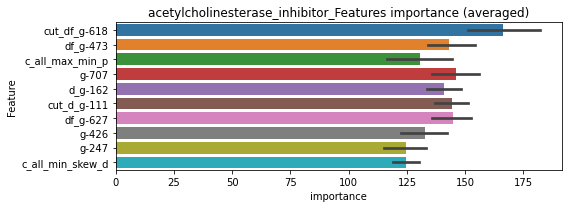

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.00079693	valid_1's binary_logloss: 0.0217842


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000739259	valid_1's binary_logloss: 0.0344124


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000750954	valid_1's binary_logloss: 0.0121758


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000632856	valid_1's binary_logloss: 0.0232561


acetylcholinesterase_inhibitor logloss: 0.022906836849665373
adenosine_receptor_agonist, len(trt): 54, len(othr): 3285
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00054574	valid_1's binary_logloss: 0.0138032
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000531352	valid_1's binary_logloss: 0.0177357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000560756	valid_1's binary_logloss: 0.00634743
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00050505	valid_1's binary_logloss: 0.0095383


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040146, Threshold: 0.0164993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0164993, conf_0:0.01155, conf_1:0.02145
Num_p_label: 4.0, Expected: 9.0, Adj_threshold_1: 0.0464993
threshold: 0.0464993, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000495114	valid_1's binary_logloss: 0.0105113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000590936	valid_1's binary_logloss: 0.0161332
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000486152	valid_1's binary_logloss: 0.00529079
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000512817	valid_1's binary_logloss: 0.00744289


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0267706, Threshold: 0.0464993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0464993, conf_0:0.03720, conf_1:0.05580
threshold: 0.0464993, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000495114	valid_1's binary_logloss: 0.0105113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000590936	valid_1's binary_logloss: 0.0161332
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000486152	valid_1's binary_logloss: 0.00529079
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000512817	valid_1's binary_logloss: 0.00744289


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0267706, Threshold: 0.0464993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0464993, conf_0:0.04185, conf_1:0.05115
threshold: 0.0464993, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


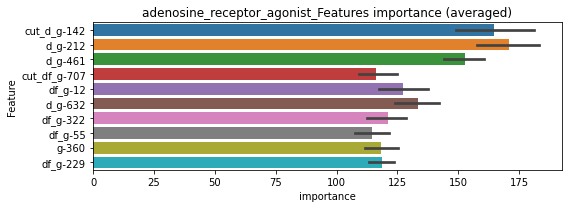

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000483506	valid_1's binary_logloss: 0.0105763
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000481734	valid_1's binary_logloss: 0.0105428


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000564746	valid_1's binary_logloss: 0.0156275


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000504328	valid_1's binary_logloss: 0.00441863


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000534045	valid_1's binary_logloss: 0.00923922


adenosine_receptor_agonist logloss: 0.009966680772964826
adenosine_receptor_antagonist, len(trt): 96, len(othr): 3271
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3271


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0516728	valid_1's binary_logloss: 0.115372
[2000]	training's binary_logloss: 0.0258661	valid_1's binary_logloss: 0.093101
Early stopping, best iteration is:
[2662]	training's binary_logloss: 0.0192426	valid_1's binary_logloss: 0.0874952
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0538871	valid_1's binary_logloss: 0.0952644
[2000]	training's binary_logloss: 0.0271928	valid_1's binary_logloss: 0.0692657
[3000]	training's binary_logloss: 0.0177817	valid_1's binary_logloss: 0.0592131
[4000]	training's binary_logloss: 0.0131868	valid_1's binary_logloss: 0.0540871
[5000]	training's binary_logloss: 0.0104981	valid_1's binary_logloss: 0.0509436
[6000]	training's binary_logloss: 0.00872622	valid_1's binary_logloss: 0.0487352
Early stopping, best iteration is:
[6659]	training's binary_logloss: 0.00784848	valid_1's binary_logloss: 0.0477194
Training

1 / 3, AUC score:0.995, PR-AUC:0.987
y_Threshold: 0.0474720, Threshold: 0.1193820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 165 → Positive_corect_labels: 637/3760
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.1193820, conf_0:0.08357, conf_1:0.15520
Num_p_label: 23.0, Expected: 16.1, Adj_threshold_1: 0.1493820
threshold: 0.1493820, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 637.0/3760, y_label_rate: 0.1694149
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0471251	valid_1's binary_logloss: 0.0925672
[2000]	training's binary_logloss: 0.0234387	valid_1's binary_logloss: 0.0684423
[3000]	training's binary_logloss: 0.015409	valid_1's binary_logloss: 0.0591031
Early stopping, best iteration is:
[3626]	training's binary_logloss: 0.0126911	valid_1's binary_logloss: 0.0559192
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0471556	valid_1's binary_logloss: 0.0984755
[2000]	training's binary_logloss: 0.0233854	valid_1's binary_logloss: 0.0762875
[3000]	training's binary_logloss: 0.0153314	valid_1's binary_logloss: 0.0680163
[4000]	training's binary_logloss: 0.0113993	valid_1's binary_logloss: 0.0641894
Early stopping, best iteration is:
[4168]	training's binary_logloss: 0.0109194	valid_1's binary_logloss: 0.0635949
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_log

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0766866, Threshold: 0.1493820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 624.0/3734
p_label_rate: 0.0170768 Vs.target_rate: 0.00403
Num_p_label: 68.0, Expected: 16.1, Threshold: 0.1493820, conf_0:0.11951, conf_1:0.17926
Num_p_label: 49.0, Expected: 16.1, Adj_threshold_1: 0.1793820
Num_p_label: 38.0, Expected: 16.1, Adj_threshold_2: 0.2093820
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_3: 0.2393820
Num_p_label: 16.0, Expected: 16.1, Adj_threshold_4: 0.2693820
threshold: 0.2693820, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 624.0/3734, y_label_rate: 0.1671130
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0447342	valid_1's binary_logloss: 0.0868604
[2000]	training's binary_logloss: 0.0220811	valid_1's binary_logloss: 0.0637318
[3000]	training's binary_logloss: 0.0145711	valid_1's binary_logloss: 0.0552726
[4000]	training's binary_logloss: 0.0108655	valid_1's binary_logloss: 0.0512291
Early stopping, best iteration is:
[4164]	training's binary_logloss: 0.0104272	valid_1's binary_logloss: 0.0506118
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0442088	valid_1's binary_logloss: 0.0893053
[2000]	training's binary_logloss: 0.0220509	valid_1's binary_logloss: 0.066167
[3000]	training's binary_logloss: 0.0144729	valid_1's binary_logloss: 0.0574784
[4000]	training's binary_logloss: 0.0107857	valid_1's binary_logloss: 0.0534016
[5000]	training's binary_logloss: 0.00861675	valid_1's binary_logloss: 0.0506166
[6000]	training's binary_logloss: 0.0071949

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0761162, Threshold: 0.2693820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 618.0/3722
p_label_rate: 0.0077850 Vs.target_rate: 0.00403
Num_p_label: 31.0, Expected: 16.1, Threshold: 0.2693820, conf_0:0.24244, conf_1:0.29632
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_1: 0.2993820
Num_p_label: 22.0, Expected: 16.1, Adj_threshold_2: 0.3293820
threshold: 0.3293820, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 618.0/3722, y_label_rate: 0.1660398


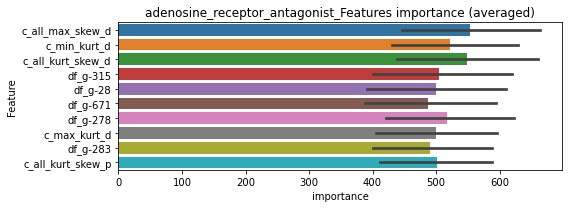

len(train_index) : 2791
len(valid_index) : 931
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0465412	valid_1's binary_logloss: 0.0898085
[2000]	training's binary_logloss: 0.0234185	valid_1's binary_logloss: 0.064533
[3000]	training's binary_logloss: 0.0154851	valid_1's binary_logloss: 0.0552367
[4000]	training's binary_logloss: 0.0115958	valid_1's binary_logloss: 0.0504511
[5000]	training's binary_logloss: 0.00928165	valid_1's binary_logloss: 0.0473679
[6000]	training's binary_logloss: 0.00775007	valid_1's binary_logloss: 0.0451136
[7000]	training's binary_logloss: 0.00666953	valid_1's binary_logloss: 0.0435643
[8000]	training's binary_logloss: 0.00586666	valid_1's binary_logloss: 0.042283
Early stopping, best iteration is:
[8393]	training's binary_logloss: 0.00560017	valid_1's binary_logloss: 0.0418403


len(train_index) : 2791
len(valid_index) : 931
================================= fold 2/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0470907	valid_1's binary_logloss: 0.0858521
[2000]	training's binary_logloss: 0.0236412	valid_1's binary_logloss: 0.0614211
[3000]	training's binary_logloss: 0.0156202	valid_1's binary_logloss: 0.052612
[4000]	training's binary_logloss: 0.0116376	valid_1's binary_logloss: 0.047915
[5000]	training's binary_logloss: 0.0093079	valid_1's binary_logloss: 0.0451991
[6000]	training's binary_logloss: 0.00776013	valid_1's binary_logloss: 0.0431777
[7000]	training's binary_logloss: 0.00666712	valid_1's binary_logloss: 0.0417207
Early stopping, best iteration is:
[7228]	training's binary_logloss: 0.00646091	valid_1's binary_logloss: 0.0414218


len(train_index) : 2792
len(valid_index) : 930
================================= fold 3/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0470461	valid_1's binary_logloss: 0.0815578
[2000]	training's binary_logloss: 0.0236193	valid_1's binary_logloss: 0.0562567
[3000]	training's binary_logloss: 0.0156666	valid_1's binary_logloss: 0.046833
[4000]	training's binary_logloss: 0.0117381	valid_1's binary_logloss: 0.0418076
[5000]	training's binary_logloss: 0.00940549	valid_1's binary_logloss: 0.0387279
[6000]	training's binary_logloss: 0.00785052	valid_1's binary_logloss: 0.0364128
[7000]	training's binary_logloss: 0.00674745	valid_1's binary_logloss: 0.0349011
[8000]	training's binary_logloss: 0.0059268	valid_1's binary_logloss: 0.0334742
[9000]	training's binary_logloss: 0.0052878	valid_1's binary_logloss: 0.0325133
Early stopping, best iteration is:
[9314]	training's binary_logloss: 0.00511529	valid_1's binary_logloss: 0.032294


len(train_index) : 2792
len(valid_index) : 930
================================= fold 4/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0467454	valid_1's binary_logloss: 0.0898512
[2000]	training's binary_logloss: 0.0234663	valid_1's binary_logloss: 0.0672435
[3000]	training's binary_logloss: 0.0155489	valid_1's binary_logloss: 0.0593094
[4000]	training's binary_logloss: 0.0116082	valid_1's binary_logloss: 0.0552968
[5000]	training's binary_logloss: 0.00928623	valid_1's binary_logloss: 0.0529494
[6000]	training's binary_logloss: 0.00774872	valid_1's binary_logloss: 0.0512163
Early stopping, best iteration is:
[6217]	training's binary_logloss: 0.00747928	valid_1's binary_logloss: 0.0509221


adenosine_receptor_antagonist logloss: 0.0416195573821013
adenosine_receptor_antagonist is unpredictable(><)!
adenylyl_cyclase_activator, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000301577	valid_1's binary_logloss: 0.000690301
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000309077	valid_1's binary_logloss: 0.00177447
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000303345	valid_1's binary_logloss: 0.000805331
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014777, Threshold: 0.0079393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0079393, conf_0:0.00556, conf_1:0.01032
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_1: 0.0379393
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0679393


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000301737	valid_1's binary_logloss: 0.00218482


threshold: 0.0679393, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000284864	valid_1's binary_logloss: 0.000528782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000283604	valid_1's binary_logloss: 0.00111982
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287534	valid_1's binary_logloss: 0.000630651
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0980317, Threshold: 0.0679393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0125565 Vs.target_rate: 0.00076
Num_p_label: 50.0, Expected: 3.0, Threshold: 0.0679393, conf_0:0.05435, conf_1:0.08153
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_1: 0.0979393
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_2: 0.1279393
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_3: 0.1579393
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_4: 0.1879393
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_5: 0.2179393
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.2479393


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000290539	valid_1's binary_logloss: 0.00151058


Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.2779393
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3079393
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_9: 0.3379393
threshold: 0.3379393, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000284864	valid_1's binary_logloss: 0.000528782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000283604	valid_1's binary_logloss: 0.00111982
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287534	valid_1's binary_logloss: 0.000630651
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0980317, Threshold: 0.3379393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.3379393, conf_0:0.30415, conf_1:0.37173
threshold: 0.3379393, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000290539	valid_1's binary_logloss: 0.00151058


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


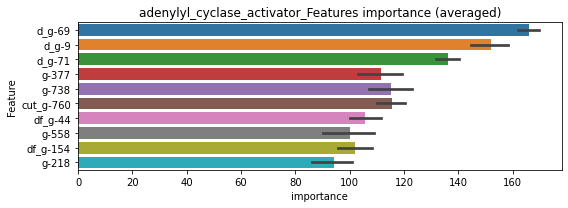

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000281889	valid_1's binary_logloss: 0.000562985
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000281889	valid_1's binary_logloss: 0.000562985


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000282459	valid_1's binary_logloss: 0.000992297
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000282336	valid_1's binary_logloss: 0.000992255


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000284722	valid_1's binary_logloss: 0.000606711
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000284722	valid_1's binary_logloss: 0.000606711


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000289422	valid_1's binary_logloss: 0.00178937


adenylyl_cyclase_activator logloss: 0.0009877870478885564


mutually exclusive columns: adrenergic_receptor_agonist


adrenergic_receptor_agonist, len(trt): 270, len(othr): 6953
target_rate: 0.0113379 → Adj_target_rate: 0.0097917


selected negative label: 6953


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0665102	valid_1's binary_logloss: 0.135297
[2000]	training's binary_logloss: 0.0332987	valid_1's binary_logloss: 0.11178
Early stopping, best iteration is:
[2908]	training's binary_logloss: 0.0222888	valid_1's binary_logloss: 0.103495
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.066203	valid_1's binary_logloss: 0.135704
[2000]	training's binary_logloss: 0.0333249	valid_1's binary_logloss: 0.116202
Early stopping, best iteration is:
[2176]	training's binary_logloss: 0.0305057	valid_1's binary_logloss: 0.11407
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0644255	valid_1's binary_logloss: 0.142733
[2000]	training's binary_logloss: 0.032291	valid_1's binary_logloss: 0.123651
Early stopping, best iteration is:
[2489]	training's binary_logloss: 0.0255971	valid_1's binary_logloss: 0.119698
Train

1 / 3, AUC score:0.977, PR-AUC:0.955
y_Threshold: 0.0762766, Threshold: 0.1653996, pos_neg_ratio: 0.8000000
Remove_noisy_data: 483 → Positive_corect_labels: 1288/7860
p_label_rate: 0.0100452 Vs.target_rate: 0.01134
Num_p_label: 40.0, Expected: 45.1, Threshold: 0.1653996, conf_0:0.11578, conf_1:0.21502
threshold: 0.1653996, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1288.0/7860, y_label_rate: 0.1638677
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0495941	valid_1's binary_logloss: 0.108204
[2000]	training's binary_logloss: 0.0247332	valid_1's binary_logloss: 0.0878151
[3000]	training's binary_logloss: 0.0161395	valid_1's binary_logloss: 0.0808062
Early stopping, best iteration is:
[3585]	training's binary_logloss: 0.0133708	valid_1's binary_logloss: 0.0785903
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.049988	valid_1's binary_logloss: 0.105692
[2000]	training's binary_logloss: 0.024847	valid_1's binary_logloss: 0.0844719
Early stopping, best iteration is:
[2805]	training's binary_logloss: 0.017464	valid_1's binary_logloss: 0.0775529
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0513114	valid_1's binary_logloss: 0.0922695
[2000]	training's binary_logloss: 0.0256304	valid_1's binary_logloss: 0.0704549
[3000]	training's binary_logloss

2 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0940827, Threshold: 0.1653996, pos_neg_ratio: 0.8000000
Remove_noisy_data: 108 → Positive_corect_labels: 1234.0/7752
p_label_rate: 0.0100452 Vs.target_rate: 0.01134
Num_p_label: 40.0, Expected: 45.1, Threshold: 0.1653996, conf_0:0.13232, conf_1:0.19848
threshold: 0.1653996, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1234.0/7752, y_label_rate: 0.1591847
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0443047	valid_1's binary_logloss: 0.0887289
[2000]	training's binary_logloss: 0.021891	valid_1's binary_logloss: 0.0686941
[3000]	training's binary_logloss: 0.0143342	valid_1's binary_logloss: 0.0615222
Early stopping, best iteration is:
[3619]	training's binary_logloss: 0.0117663	valid_1's binary_logloss: 0.0590848
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0444306	valid_1's binary_logloss: 0.0845178
[2000]	training's binary_logloss: 0.0221896	valid_1's binary_logloss: 0.0656199
[3000]	training's binary_logloss: 0.0145662	valid_1's binary_logloss: 0.0591678
Early stopping, best iteration is:
[3773]	training's binary_logloss: 0.0114529	valid_1's binary_logloss: 0.0562883
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0445145	valid_1's binary_logloss: 0.0892135
[2000]	training's binary_log

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0928735, Threshold: 0.1653996, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 1197.0/7678
p_label_rate: 0.0123054 Vs.target_rate: 0.01134
Num_p_label: 49.0, Expected: 45.1, Threshold: 0.1653996, conf_0:0.14886, conf_1:0.18194
threshold: 0.1653996, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 1197.0/7678, y_label_rate: 0.1559000


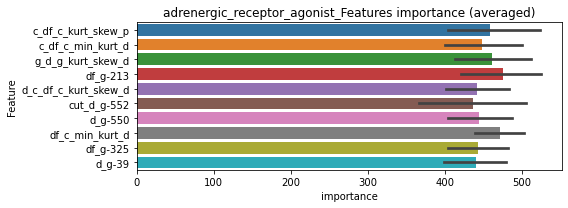

len(train_index) : 5758
len(valid_index) : 1920
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0427442	valid_1's binary_logloss: 0.0782116
[2000]	training's binary_logloss: 0.0216682	valid_1's binary_logloss: 0.0579995
[3000]	training's binary_logloss: 0.0143507	valid_1's binary_logloss: 0.0506601
[4000]	training's binary_logloss: 0.0106953	valid_1's binary_logloss: 0.0468174
Early stopping, best iteration is:
[4228]	training's binary_logloss: 0.0101059	valid_1's binary_logloss: 0.0461165


len(train_index) : 5758
len(valid_index) : 1920
================================= fold 2/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0425247	valid_1's binary_logloss: 0.0843445
[2000]	training's binary_logloss: 0.0216157	valid_1's binary_logloss: 0.0663972
[3000]	training's binary_logloss: 0.0142707	valid_1's binary_logloss: 0.0592525
[4000]	training's binary_logloss: 0.0106277	valid_1's binary_logloss: 0.0559597
Early stopping, best iteration is:
[4240]	training's binary_logloss: 0.0100149	valid_1's binary_logloss: 0.0554585


len(train_index) : 5759
len(valid_index) : 1919
================================= fold 3/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0427169	valid_1's binary_logloss: 0.0799348
[2000]	training's binary_logloss: 0.0216686	valid_1's binary_logloss: 0.0596654
[3000]	training's binary_logloss: 0.0143939	valid_1's binary_logloss: 0.0522523
[4000]	training's binary_logloss: 0.0107427	valid_1's binary_logloss: 0.048372
[5000]	training's binary_logloss: 0.00857609	valid_1's binary_logloss: 0.0460505
Early stopping, best iteration is:
[5895]	training's binary_logloss: 0.00726365	valid_1's binary_logloss: 0.0444628


len(train_index) : 5759
len(valid_index) : 1919
================================= fold 4/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0435746	valid_1's binary_logloss: 0.0756558
[2000]	training's binary_logloss: 0.0221709	valid_1's binary_logloss: 0.0550845
[3000]	training's binary_logloss: 0.0146864	valid_1's binary_logloss: 0.0476635
[4000]	training's binary_logloss: 0.0109609	valid_1's binary_logloss: 0.0434268
[5000]	training's binary_logloss: 0.00873173	valid_1's binary_logloss: 0.0408065
Early stopping, best iteration is:
[5201]	training's binary_logloss: 0.00838777	valid_1's binary_logloss: 0.0403741


adrenergic_receptor_agonist logloss: 0.04660407306734237
adrenergic_receptor_agonist is unpredictable(><)!


mutually exclusive columns: adrenergic_receptor_antagonist


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 6628
target_rate: 0.0151172 → Adj_target_rate: 0.0125042


selected negative label: 6628


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0809838	valid_1's binary_logloss: 0.170707
[2000]	training's binary_logloss: 0.0414782	valid_1's binary_logloss: 0.155775
Early stopping, best iteration is:
[1989]	training's binary_logloss: 0.0417225	valid_1's binary_logloss: 0.155709
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0776739	valid_1's binary_logloss: 0.187221
Early stopping, best iteration is:
[1578]	training's binary_logloss: 0.0507164	valid_1's binary_logloss: 0.180136
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0791085	valid_1's binary_logloss: 0.175846
Early stopping, best iteration is:
[1398]	training's binary_logloss: 0.0584552	valid_1's binary_logloss: 0.168918
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0801654	valid_1's binary_logloss: 0.175969
[2000]	training's b

1 / 3, AUC score:0.945, PR-AUC:0.899
y_Threshold: 0.0966969, Threshold: 0.1634156, pos_neg_ratio: 0.8000000
Remove_noisy_data: 666 → Positive_corect_labels: 1125/7287
p_label_rate: 0.0100452 Vs.target_rate: 0.01512
Num_p_label: 40.0, Expected: 60.2, Threshold: 0.1634156, conf_0:0.11439, conf_1:0.21244
threshold: 0.1634156, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1125.0/7287, y_label_rate: 0.1543845
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0497399	valid_1's binary_logloss: 0.0959878
[2000]	training's binary_logloss: 0.0251251	valid_1's binary_logloss: 0.0793186
Early stopping, best iteration is:
[2507]	training's binary_logloss: 0.0198835	valid_1's binary_logloss: 0.0758924
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0471089	valid_1's binary_logloss: 0.116531
[2000]	training's binary_logloss: 0.0240833	valid_1's binary_logloss: 0.102715
Early stopping, best iteration is:
[2102]	training's binary_logloss: 0.0228818	valid_1's binary_logloss: 0.102258
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0496539	valid_1's binary_logloss: 0.0956713
[2000]	training's binary_logloss: 0.0253067	valid_1's binary_logloss: 0.0808203
Early stopping, best iteration is:
[2387]	training's binary_logloss: 0.0211318	valid_1's binary_logloss: 0.078

2 / 3, AUC score:0.994, PR-AUC:0.981
y_Threshold: 0.1103968, Threshold: 0.1634156, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 1048.0/7133
p_label_rate: 0.0200904 Vs.target_rate: 0.01512
Num_p_label: 80.0, Expected: 60.2, Threshold: 0.1634156, conf_0:0.13073, conf_1:0.19610
threshold: 0.1634156, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 1048.0/7133, y_label_rate: 0.1469228
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0372927	valid_1's binary_logloss: 0.0751508
[2000]	training's binary_logloss: 0.0188642	valid_1's binary_logloss: 0.060825
[3000]	training's binary_logloss: 0.0124628	valid_1's binary_logloss: 0.0557627
Early stopping, best iteration is:
[3003]	training's binary_logloss: 0.0124498	valid_1's binary_logloss: 0.055733
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0371911	valid_1's binary_logloss: 0.0733893
[2000]	training's binary_logloss: 0.0185931	valid_1's binary_logloss: 0.0588476
[3000]	training's binary_logloss: 0.0122685	valid_1's binary_logloss: 0.0541325
Early stopping, best iteration is:
[3002]	training's binary_logloss: 0.0122576	valid_1's binary_logloss: 0.0541078
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.037842	valid_1's binary_logloss: 0.0679991
[2000]	training's binary_loglo

3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.1021487, Threshold: 0.1634156, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 1012.0/7061
p_label_rate: 0.0241085 Vs.target_rate: 0.01512
Num_p_label: 96.0, Expected: 60.2, Threshold: 0.1634156, conf_0:0.14707, conf_1:0.17976
Num_p_label: 85.0, Expected: 60.2, Adj_threshold_1: 0.1934156
threshold: 0.1934156, positive_p_label: 85.0/3982, p_label_rate: 0.0213461
positive_y_label: 1012.0/7061, y_label_rate: 0.1433225


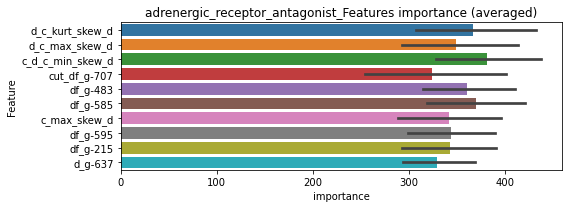

len(train_index) : 5295
len(valid_index) : 1766
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0355913	valid_1's binary_logloss: 0.0560765
[2000]	training's binary_logloss: 0.0182919	valid_1's binary_logloss: 0.0410508
[3000]	training's binary_logloss: 0.0121667	valid_1's binary_logloss: 0.0353745
[4000]	training's binary_logloss: 0.00910648	valid_1's binary_logloss: 0.0325218
Early stopping, best iteration is:
[4825]	training's binary_logloss: 0.00757622	valid_1's binary_logloss: 0.0310493


len(train_index) : 5296
len(valid_index) : 1765
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0354508	valid_1's binary_logloss: 0.0583254
[2000]	training's binary_logloss: 0.018052	valid_1's binary_logloss: 0.0440703
[3000]	training's binary_logloss: 0.0120591	valid_1's binary_logloss: 0.0389448
[4000]	training's binary_logloss: 0.0089977	valid_1's binary_logloss: 0.0363353
Early stopping, best iteration is:
[4824]	training's binary_logloss: 0.00746668	valid_1's binary_logloss: 0.0349757


len(train_index) : 5296
len(valid_index) : 1765
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0331206	valid_1's binary_logloss: 0.0724008
[2000]	training's binary_logloss: 0.0169344	valid_1's binary_logloss: 0.0579098
[3000]	training's binary_logloss: 0.0112888	valid_1's binary_logloss: 0.0527453
Early stopping, best iteration is:
[3499]	training's binary_logloss: 0.0096948	valid_1's binary_logloss: 0.0512056


len(train_index) : 5296
len(valid_index) : 1765
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0343371	valid_1's binary_logloss: 0.0621629
[2000]	training's binary_logloss: 0.0176101	valid_1's binary_logloss: 0.0473308
[3000]	training's binary_logloss: 0.0117083	valid_1's binary_logloss: 0.0417745
[4000]	training's binary_logloss: 0.00875522	valid_1's binary_logloss: 0.0390782
Early stopping, best iteration is:
[4533]	training's binary_logloss: 0.00772709	valid_1's binary_logloss: 0.0379976


adrenergic_receptor_antagonist logloss: 0.03880595504169413
adrenergic_receptor_antagonist is unpredictable(><)!
akt_inhibitor, len(trt): 66, len(othr): 3276
target_rate: 0.0027715 → Adj_target_rate: 0.0029567


selected negative label: 3276


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000573662	valid_1's binary_logloss: 0.0158949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000581931	valid_1's binary_logloss: 0.0188952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000712187	valid_1's binary_logloss: 0.0178871
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000612878	valid_1's binary_logloss: 0.0234772


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0056892, Threshold: 0.0225907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00277
Num_p_label: 40.0, Expected: 11.0, Threshold: 0.0225907, conf_0:0.01581, conf_1:0.02937
Num_p_label: 21.0, Expected: 11.0, Adj_threshold_1: 0.0525907
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_2: 0.0825907
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_3: 0.1125907
threshold: 0.1125907, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3797, y_label_rate: 0.1722412
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000558216	valid_1's binary_logloss: 0.0121476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000741333	valid_1's binary_logloss: 0.0186045
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000742394	valid_1's binary_logloss: 0.0148287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000615205	valid_1's binary_logloss: 0.0181063


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0341104, Threshold: 0.1125907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3793
p_label_rate: 0.0067805 Vs.target_rate: 0.00277
Num_p_label: 27.0, Expected: 11.0, Threshold: 0.1125907, conf_0:0.09007, conf_1:0.13511
Num_p_label: 23.0, Expected: 11.0, Adj_threshold_1: 0.1425907
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_2: 0.1725907
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_3: 0.2025907
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_4: 0.2325907
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_5: 0.2625907
Num_p_label: 18.0, Expected: 11.0, Adj_threshold_6: 0.2925907
Num_p_label: 16.0, Expected: 11.0, Adj_threshold_7: 0.3225907
threshold: 0.3225907, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3793, y_label_rate: 0.1718956
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000548047	valid_1's binary_logloss: 0.00930094
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000556899	valid_1's binary_logloss: 0.0144058
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000583943	valid_1's binary_logloss: 0.00757063
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000558079	valid_1's binary_logloss: 0.0264481


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0290341, Threshold: 0.3225907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3791
p_label_rate: 0.0037670 Vs.target_rate: 0.00277
Num_p_label: 15.0, Expected: 11.0, Threshold: 0.3225907, conf_0:0.29033, conf_1:0.35485
threshold: 0.3225907, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3791, y_label_rate: 0.1717225


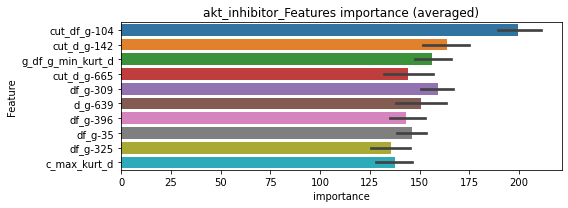

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000563168	valid_1's binary_logloss: 0.00868576
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000559702	valid_1's binary_logloss: 0.00864827


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000578276	valid_1's binary_logloss: 0.0232931


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000605048	valid_1's binary_logloss: 0.00735303


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds


akt_inhibitor logloss: 0.014938555613857256


Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000843825	valid_1's binary_logloss: 0.0204211


aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3289
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00030128	valid_1's binary_logloss: 0.00110657
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000297411	valid_1's binary_logloss: 0.00198953
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000300869	valid_1's binary_logloss: 0.000669514
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015422, Threshold: 0.0064593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0064593, conf_0:0.00452, conf_1:0.00840
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_1: 0.0364593
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_2: 0.0664593


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000300546	valid_1's binary_logloss: 0.000849411


threshold: 0.0664593, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000291935	valid_1's binary_logloss: 0.00113523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000292047	valid_1's binary_logloss: 0.00291201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000297713	valid_1's binary_logloss: 0.000716836
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0923505, Threshold: 0.0664593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00080
Num_p_label: 13.0, Expected: 3.2, Threshold: 0.0664593, conf_0:0.05317, conf_1:0.07975
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0964593


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000288584	valid_1's binary_logloss: 0.000685506


threshold: 0.0964593, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000291935	valid_1's binary_logloss: 0.00113523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000292047	valid_1's binary_logloss: 0.00291201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000297713	valid_1's binary_logloss: 0.000716836
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0923505, Threshold: 0.0964593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00080
Num_p_label: 6.0, Expected: 3.2, Threshold: 0.0964593, conf_0:0.08681, conf_1:0.10611
threshold: 0.0964593, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000288584	valid_1's binary_logloss: 0.000685506


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


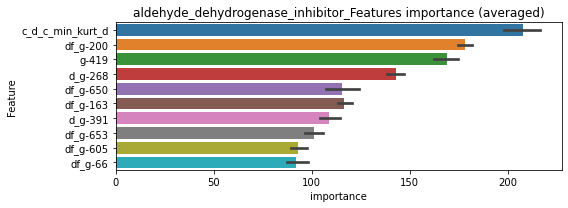

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000296478	valid_1's binary_logloss: 0.00109497


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000286763	valid_1's binary_logloss: 0.00172282
Early stopping, best iteration is:
[1071]	training's binary_logloss: 0.000284037	valid_1's binary_logloss: 0.00171502


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00029101	valid_1's binary_logloss: 0.000592592
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000291001	valid_1's binary_logloss: 0.000592579


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000288496	valid_1's binary_logloss: 0.000665398
Early stopping, best iteration is:
[1015]	training's binary_logloss: 0.000288132	valid_1's binary_logloss: 0.000664694


aldehyde_dehydrogenase_inhibitor logloss: 0.001016955644742755
alk_inhibitor, len(trt): 42, len(othr): 3285
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000486189	valid_1's binary_logloss: 0.0120713
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000457894	valid_1's binary_logloss: 0.0117198
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000489002	valid_1's binary_logloss: 0.00368998
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000505768	valid_1's binary_logloss: 0.00754023


y_Threshold: 0.0036046, Threshold: 0.0156094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0156094, conf_0:0.01093, conf_1:0.02029
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_1: 0.0456094
threshold: 0.0456094, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000484016	valid_1's binary_logloss: 0.0112284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000464298	valid_1's binary_logloss: 0.0112455
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000486353	valid_1's binary_logloss: 0.00284733
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000459446	valid_1's binary_logloss: 0.005876


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0242813, Threshold: 0.0456094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0077850 Vs.target_rate: 0.00176
Num_p_label: 31.0, Expected: 7.0, Threshold: 0.0456094, conf_0:0.03649, conf_1:0.05473
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_1: 0.0756094
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_2: 0.1056094
threshold: 0.1056094, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00046215	valid_1's binary_logloss: 0.0117586
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000566243	valid_1's binary_logloss: 0.0175228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000478164	valid_1's binary_logloss: 0.00446852
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000468824	valid_1's binary_logloss: 0.00965026


y_Threshold: 0.0130050, Threshold: 0.1056094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0037670 Vs.target_rate: 0.00176
Num_p_label: 15.0, Expected: 7.0, Threshold: 0.1056094, conf_0:0.09505, conf_1:0.11617
threshold: 0.1056094, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


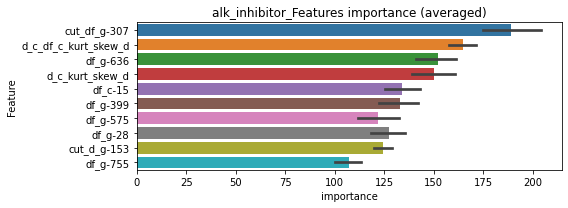

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 alk_inhibitor=================================


Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000712142	valid_1's binary_logloss: 0.0134692
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.00046105	valid_1's binary_logloss: 0.00438537


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000455714	valid_1's binary_logloss: 0.00475769
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000457472	valid_1's binary_logloss: 0.00475497


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000515079	valid_1's binary_logloss: 0.00640811


alk_inhibitor logloss: 0.007255466180909576
ampk_activator, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000237565	valid_1's binary_logloss: 0.00179472
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000238117	valid_1's binary_logloss: 0.00194385
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000238308	valid_1's binary_logloss: 0.000402555
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008890, Threshold: 0.0038962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0038962, conf_0:0.00273, conf_1:0.00507
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_1: 0.0338962
threshold: 0.0338962, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000238302	valid_1's binary_logloss: 0.000929652


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000220557	valid_1's binary_logloss: 0.00168382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000221782	valid_1's binary_logloss: 0.00228922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000224483	valid_1's binary_logloss: 0.000301403
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0452177, Threshold: 0.0338962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00050
Num_p_label: 20.0, Expected: 2.0, Threshold: 0.0338962, conf_0:0.02712, conf_1:0.04068
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_1: 0.0638962
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_2: 0.0938962
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.1238962


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000221229	valid_1's binary_logloss: 0.00147984


threshold: 0.1238962, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000220557	valid_1's binary_logloss: 0.00168382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000221782	valid_1's binary_logloss: 0.00228922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000224483	valid_1's binary_logloss: 0.000301403
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0452177, Threshold: 0.1238962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.1238962, conf_0:0.11151, conf_1:0.13629
threshold: 0.1238962, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000221229	valid_1's binary_logloss: 0.00147984


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


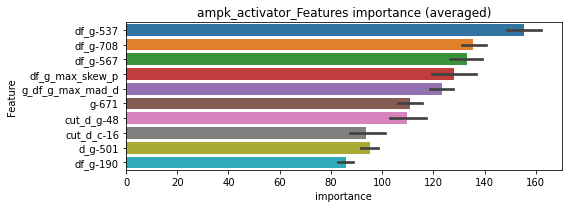

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ampk_activator=================================


Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000225311	valid_1's binary_logloss: 0.000847639
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ampk_activator=================================


Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000227512	valid_1's binary_logloss: 0.00236184
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ampk_activator=================================


Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000224783	valid_1's binary_logloss: 0.000305102
Training until validation scores don't improve for 30 rounds


ampk_activator logloss: 0.0010467053423657555


Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000224029	valid_1's binary_logloss: 0.000672236


analgesic, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000250037	valid_1's binary_logloss: 0.000811305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000246072	valid_1's binary_logloss: 0.000523355
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000256743	valid_1's binary_logloss: 0.00033698
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011113, Threshold: 0.0170543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0170543, conf_0:0.01194, conf_1:0.02217
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_1: 0.0470543
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_2: 0.0770543
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_3: 0.1070543


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00025024	valid_1's binary_logloss: 0.000509345


Num_p_label: 10.0, Expected: 2.0, Adj_threshold_4: 0.1370543
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_5: 0.1670543
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_6: 0.1970543
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_7: 0.2270543
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.2570543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_9: 0.2870543
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_10: 0.3170543
threshold: 0.3170543, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000236462	valid_1's binary_logloss: 0.000372644
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000240927	valid_1's binary_logloss: 0.000712023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00024276	valid_1's binary_logloss: 0.000315518
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1267599, Threshold: 0.3170543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00050
Num_p_label: 9.0, Expected: 2.0, Threshold: 0.3170543, conf_0:0.25364, conf_1:0.38047
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.3470543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.3770543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.4070543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.4370543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_5: 0.4670543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.4970543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.5270543
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_8: 0.5570543


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000235299	valid_1's binary_logloss: 0.000391198


threshold: 0.5570543, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000236462	valid_1's binary_logloss: 0.000372644
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000240927	valid_1's binary_logloss: 0.000712023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00024276	valid_1's binary_logloss: 0.000315518
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1267599, Threshold: 0.5570543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.5570543, conf_0:0.50135, conf_1:0.61276
threshold: 0.5570543, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000235299	valid_1's binary_logloss: 0.000391198


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


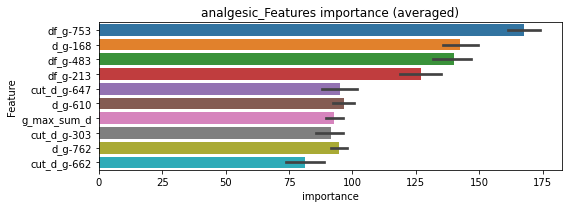

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000239206	valid_1's binary_logloss: 0.000343283
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000241573	valid_1's binary_logloss: 0.0003742
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000240838	valid_1's binary_logloss: 0.000361965
Training until validation scores don't improve for 30 rounds


analgesic logloss: 0.0003605182145955004


Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000242793	valid_1's binary_logloss: 0.000362643


androgen_receptor_agonist, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000500579	valid_1's binary_logloss: 0.0157394
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000526369	valid_1's binary_logloss: 0.0136869
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000517144	valid_1's binary_logloss: 0.00170681
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0040677, Threshold: 0.0092444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00202


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000685124	valid_1's binary_logloss: 0.0181441


Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0092444, conf_0:0.00647, conf_1:0.01202
Num_p_label: 5.0, Expected: 8.0, Adj_threshold_1: 0.0392444
threshold: 0.0392444, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000551834	valid_1's binary_logloss: 0.013085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000496987	valid_1's binary_logloss: 0.00786898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000499157	valid_1's binary_logloss: 0.00911708
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000567541	valid_1's binary_logloss: 0.0190986


y_Threshold: 0.0215354, Threshold: 0.0392444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0020090 Vs.target_rate: 0.00202
Num_p_label: 8.0, Expected: 8.0, Threshold: 0.0392444, conf_0:0.03140, conf_1:0.04709
threshold: 0.0392444, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000551834	valid_1's binary_logloss: 0.013085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000496987	valid_1's binary_logloss: 0.00786898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000499157	valid_1's binary_logloss: 0.00911708
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000567541	valid_1's binary_logloss: 0.0190986


y_Threshold: 0.0215354, Threshold: 0.0392444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0020090 Vs.target_rate: 0.00202
Num_p_label: 8.0, Expected: 8.0, Threshold: 0.0392444, conf_0:0.03532, conf_1:0.04317
threshold: 0.0392444, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


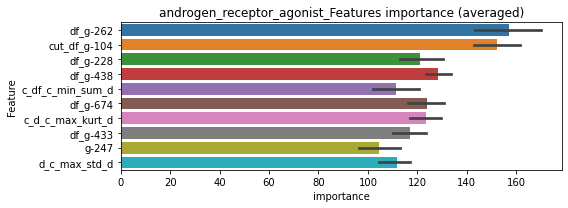

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000538829	valid_1's binary_logloss: 0.0142838


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000524873	valid_1's binary_logloss: 0.00744778


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000526643	valid_1's binary_logloss: 0.00844429


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


androgen_receptor_agonist logloss: 0.012789518273662119


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000837047	valid_1's binary_logloss: 0.0209899


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3274


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00108392	valid_1's binary_logloss: 0.0533942
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00109866	valid_1's binary_logloss: 0.0403294
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.0010541	valid_1's binary_logloss: 0.0270576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000687266	valid_1's binary_logloss: 0.0331268


1 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0085820, Threshold: 0.0330483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 650/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0330483, conf_0:0.02313, conf_1:0.04296
Num_p_label: 11.0, Expected: 14.9, Adj_threshold_1: 0.0630483
threshold: 0.0630483, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 650.0/3788, y_label_rate: 0.1715945
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00120772	valid_1's binary_logloss: 0.0506104
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000723568	valid_1's binary_logloss: 0.0339503
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000748183	valid_1's binary_logloss: 0.0365973
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.00068483	valid_1's binary_logloss: 0.0207164


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0258344, Threshold: 0.0630483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 642.0/3772
p_label_rate: 0.0115520 Vs.target_rate: 0.00374
Num_p_label: 46.0, Expected: 14.9, Threshold: 0.0630483, conf_0:0.05044, conf_1:0.07566
Num_p_label: 28.0, Expected: 14.9, Adj_threshold_1: 0.0930483
Num_p_label: 22.0, Expected: 14.9, Adj_threshold_2: 0.1230483
threshold: 0.1230483, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 642.0/3772, y_label_rate: 0.1702015
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000694565	valid_1's binary_logloss: 0.0382965
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000755064	valid_1's binary_logloss: 0.0380708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000701315	valid_1's binary_logloss: 0.0253419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000648289	valid_1's binary_logloss: 0.026751


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316004, Threshold: 0.1230483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 639.0/3766
p_label_rate: 0.0037670 Vs.target_rate: 0.00374
Num_p_label: 15.0, Expected: 14.9, Threshold: 0.1230483, conf_0:0.11074, conf_1:0.13535
threshold: 0.1230483, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 639.0/3766, y_label_rate: 0.1696760


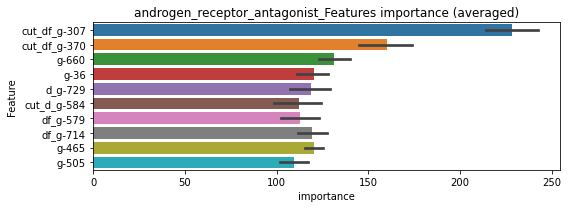

len(train_index) : 2824
len(valid_index) : 942
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00090653	valid_1's binary_logloss: 0.0353433


len(train_index) : 2824
len(valid_index) : 942
================================= fold 2/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2825
len(valid_index) : 941
================================= fold 3/4 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00133032	valid_1's binary_logloss: 0.0304681
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000669812	valid_1's binary_logloss: 0.0171249
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000661971	valid_1's binary_logloss: 0.0170335


len(train_index) : 2825
len(valid_index) : 941
================================= fold 4/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


androgen_receptor_antagonist logloss: 0.02868373273573699


Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00173446	valid_1's binary_logloss: 0.031881


anesthetic_-_local, len(trt): 80, len(othr): 3272
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3272


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0427922	valid_1's binary_logloss: 0.0869133
[2000]	training's binary_logloss: 0.0217631	valid_1's binary_logloss: 0.0680488
[3000]	training's binary_logloss: 0.0143491	valid_1's binary_logloss: 0.0608457
[4000]	training's binary_logloss: 0.010684	valid_1's binary_logloss: 0.0573102
Early stopping, best iteration is:
[4881]	training's binary_logloss: 0.00873133	valid_1's binary_logloss: 0.0554339
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0434231	valid_1's binary_logloss: 0.0853906
[2000]	training's binary_logloss: 0.0220005	valid_1's binary_logloss: 0.0652379
[3000]	training's binary_logloss: 0.0145526	valid_1's binary_logloss: 0.057931
[4000]	training's binary_logloss: 0.0108365	valid_1's binary_logloss: 0.0543019
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.0104002	valid_1's binary_logloss: 0.0537765
Training 

1 / 3, AUC score:0.996, PR-AUC:0.994
y_Threshold: 0.0341926, Threshold: 0.0601896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 648/3782
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0601896, conf_0:0.04213, conf_1:0.07825
Num_p_label: 11.0, Expected: 13.4, Adj_threshold_1: 0.0901896
threshold: 0.0901896, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 648.0/3782, y_label_rate: 0.1713379
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0401707	valid_1's binary_logloss: 0.0773331
[2000]	training's binary_logloss: 0.0202043	valid_1's binary_logloss: 0.0565142
[3000]	training's binary_logloss: 0.0134086	valid_1's binary_logloss: 0.0490609
[4000]	training's binary_logloss: 0.0100332	valid_1's binary_logloss: 0.0452687
[5000]	training's binary_logloss: 0.00802562	valid_1's binary_logloss: 0.0429026
[6000]	training's binary_logloss: 0.00671375	valid_1's binary_logloss: 0.0410682
[7000]	training's binary_logloss: 0.00577872	valid_1's binary_logloss: 0.0398078
[8000]	training's binary_logloss: 0.00507912	valid_1's binary_logloss: 0.0387586
[9000]	training's binary_logloss: 0.00454199	valid_1's binary_logloss: 0.0379465
Early stopping, best iteration is:
[9022]	training's binary_logloss: 0.00453153	valid_1's binary_logloss: 0.0379183
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0677722, Threshold: 0.0901896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 641.0/3768
p_label_rate: 0.0047715 Vs.target_rate: 0.00336
Num_p_label: 19.0, Expected: 13.4, Threshold: 0.0901896, conf_0:0.07215, conf_1:0.10823
threshold: 0.0901896, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 641.0/3768, y_label_rate: 0.1701168
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0392114	valid_1's binary_logloss: 0.0762961
[2000]	training's binary_logloss: 0.0195493	valid_1's binary_logloss: 0.0561
[3000]	training's binary_logloss: 0.012996	valid_1's binary_logloss: 0.0490672
[4000]	training's binary_logloss: 0.00972415	valid_1's binary_logloss: 0.0453996
[5000]	training's binary_logloss: 0.00776631	valid_1's binary_logloss: 0.0429995
[6000]	training's binary_logloss: 0.00649972	valid_1's binary_logloss: 0.0413859
Early stopping, best iteration is:
[6341]	training's binary_logloss: 0.00615279	valid_1's binary_logloss: 0.0409179
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0393269	valid_1's binary_logloss: 0.0700281
[2000]	training's binary_logloss: 0.0196931	valid_1's binary_logloss: 0.0505633
[3000]	training's binary_logloss: 0.0130695	valid_1's binary_logloss: 0.0436747
[4000]	training's binary_logloss: 0.0097742

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0627132, Threshold: 0.0901896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 637.0/3760
p_label_rate: 0.0052737 Vs.target_rate: 0.00336
Num_p_label: 21.0, Expected: 13.4, Threshold: 0.0901896, conf_0:0.08117, conf_1:0.09921
Num_p_label: 13.0, Expected: 13.4, Adj_threshold_1: 0.1201896
threshold: 0.1201896, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 637.0/3760, y_label_rate: 0.1694149


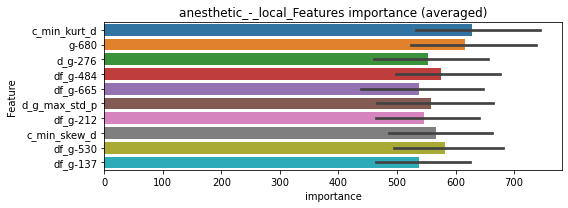

len(train_index) : 2820
len(valid_index) : 940
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0421918	valid_1's binary_logloss: 0.0728939
[2000]	training's binary_logloss: 0.0213172	valid_1's binary_logloss: 0.0507149
[3000]	training's binary_logloss: 0.0141514	valid_1's binary_logloss: 0.0425849
[4000]	training's binary_logloss: 0.0105985	valid_1's binary_logloss: 0.038193
[5000]	training's binary_logloss: 0.00849951	valid_1's binary_logloss: 0.0355879
[6000]	training's binary_logloss: 0.00709912	valid_1's binary_logloss: 0.0336103
[7000]	training's binary_logloss: 0.00611088	valid_1's binary_logloss: 0.032194
[8000]	training's binary_logloss: 0.00536881	valid_1's binary_logloss: 0.0311225
Early stopping, best iteration is:
[7977]	training's binary_logloss: 0.00538283	valid_1's binary_logloss: 0.0311204


len(train_index) : 2820
len(valid_index) : 940
================================= fold 2/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0428984	valid_1's binary_logloss: 0.0711166
[2000]	training's binary_logloss: 0.0216727	valid_1's binary_logloss: 0.0485471
[3000]	training's binary_logloss: 0.0144406	valid_1's binary_logloss: 0.0399342
[4000]	training's binary_logloss: 0.0108273	valid_1's binary_logloss: 0.0353116
[5000]	training's binary_logloss: 0.00867427	valid_1's binary_logloss: 0.03245
[6000]	training's binary_logloss: 0.00725266	valid_1's binary_logloss: 0.0302615
[7000]	training's binary_logloss: 0.00623322	valid_1's binary_logloss: 0.0287772
[8000]	training's binary_logloss: 0.00547394	valid_1's binary_logloss: 0.0274965
[9000]	training's binary_logloss: 0.00488419	valid_1's binary_logloss: 0.0265008
[10000]	training's binary_logloss: 0.00441888	valid_1's binary_logloss: 0.0257107
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00441888	valid_1's binary_logloss: 0.0257107


len(train_index) : 2820
len(valid_index) : 940
================================= fold 3/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.041645	valid_1's binary_logloss: 0.0760264
[2000]	training's binary_logloss: 0.0211284	valid_1's binary_logloss: 0.0538597
[3000]	training's binary_logloss: 0.0140743	valid_1's binary_logloss: 0.0453547
[4000]	training's binary_logloss: 0.0105483	valid_1's binary_logloss: 0.0409334
[5000]	training's binary_logloss: 0.00845881	valid_1's binary_logloss: 0.038106
[6000]	training's binary_logloss: 0.00706162	valid_1's binary_logloss: 0.0359961
[7000]	training's binary_logloss: 0.0060799	valid_1's binary_logloss: 0.034576
[8000]	training's binary_logloss: 0.00533885	valid_1's binary_logloss: 0.0333582
[9000]	training's binary_logloss: 0.00476593	valid_1's binary_logloss: 0.0324429
Early stopping, best iteration is:
[9670]	training's binary_logloss: 0.0044527	valid_1's binary_logloss: 0.0319047


len(train_index) : 2820
len(valid_index) : 940
================================= fold 4/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0417909	valid_1's binary_logloss: 0.0800826
[2000]	training's binary_logloss: 0.0211651	valid_1's binary_logloss: 0.057984
[3000]	training's binary_logloss: 0.0141152	valid_1's binary_logloss: 0.0498826
[4000]	training's binary_logloss: 0.0105702	valid_1's binary_logloss: 0.0455837
[5000]	training's binary_logloss: 0.00848194	valid_1's binary_logloss: 0.0428221
[6000]	training's binary_logloss: 0.00709389	valid_1's binary_logloss: 0.0409319
[7000]	training's binary_logloss: 0.00611106	valid_1's binary_logloss: 0.039584
[8000]	training's binary_logloss: 0.00536687	valid_1's binary_logloss: 0.0384114
[9000]	training's binary_logloss: 0.00479216	valid_1's binary_logloss: 0.0375597
Early stopping, best iteration is:
[9298]	training's binary_logloss: 0.00464516	valid_1's binary_logloss: 0.0373386


anesthetic_-_local logloss: 0.03151860380253705
anesthetic_-_local is unpredictable(><)!
angiogenesis_inhibitor, len(trt): 36, len(othr): 3280
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3280


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000405947	valid_1's binary_logloss: 0.00786467
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000454054	valid_1's binary_logloss: 0.00968031
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000625617	valid_1's binary_logloss: 0.00629112
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0031296, Threshold: 0.0145072, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000411896	valid_1's binary_logloss: 0.00405881


Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0145072, conf_0:0.01016, conf_1:0.01886
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_1: 0.0445072
threshold: 0.0445072, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000413649	valid_1's binary_logloss: 0.00761375
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000418859	valid_1's binary_logloss: 0.00890248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000432727	valid_1's binary_logloss: 0.00517285
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0318533, Threshold: 0.0445072, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000402393	valid_1's binary_logloss: 0.00390791


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0120542 Vs.target_rate: 0.00151
Num_p_label: 48.0, Expected: 6.0, Threshold: 0.0445072, conf_0:0.03561, conf_1:0.05341
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_1: 0.0745072
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_2: 0.1045072
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_3: 0.1345072
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_4: 0.1645072
threshold: 0.1645072, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000413649	valid_1's binary_logloss: 0.00761375
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000418859	valid_1's binary_logloss: 0.00890248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000432727	valid_1's binary_logloss: 0.00517285
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0318533, Threshold: 0.1645072, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000402393	valid_1's binary_logloss: 0.00390791


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.1645072, conf_0:0.14806, conf_1:0.18096
threshold: 0.1645072, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3804, y_label_rate: 0.1724501


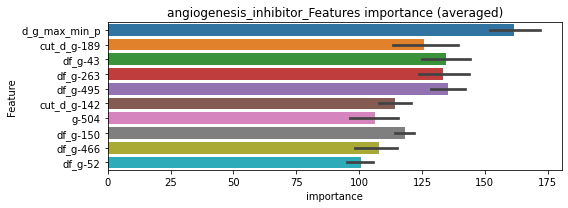

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000424997	valid_1's binary_logloss: 0.00773501


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000432076	valid_1's binary_logloss: 0.00575225


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 angiogenesis_inhibitor=================================


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000555378	valid_1's binary_logloss: 0.00474427
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.00041548	valid_1's binary_logloss: 0.00386348


angiogenesis_inhibitor logloss: 0.005523752747670818
angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:308
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000418584	valid_1's binary_logloss: 0.00556509
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000399961	valid_1's binary_logloss: 0.00405465
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000416045	valid_1's binary_logloss: 0.00248361
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029452, Threshold: 0.0104258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000469646	valid_1's binary_logloss: 0.00737596


p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0104258, conf_0:0.00730, conf_1:0.01355
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0404258
threshold: 0.0404258, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000399668	valid_1's binary_logloss: 0.00454059
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000397713	valid_1's binary_logloss: 0.00382142
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000395653	valid_1's binary_logloss: 0.00279267
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000411119	valid_1's binary_logloss: 0.00784232


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0176026, Threshold: 0.0404258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0060271 Vs.target_rate: 0.00155
Num_p_label: 24.0, Expected: 6.2, Threshold: 0.0404258, conf_0:0.03234, conf_1:0.04851
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.0704258
threshold: 0.0704258, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00039683	valid_1's binary_logloss: 0.00795515
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000392811	valid_1's binary_logloss: 0.00263301
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000397313	valid_1's binary_logloss: 0.00177336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000398883	valid_1's binary_logloss: 0.00415359


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381382, Threshold: 0.0704258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00155
Num_p_label: 17.0, Expected: 6.2, Threshold: 0.0704258, conf_0:0.06338, conf_1:0.07747
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.1004258
threshold: 0.1004258, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


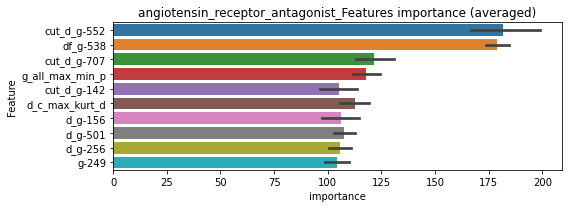

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000404189	valid_1's binary_logloss: 0.00580119


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00039981	valid_1's binary_logloss: 0.0021783
Early stopping, best iteration is:
[1052]	training's binary_logloss: 0.000396203	valid_1's binary_logloss: 0.00217045


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000399323	valid_1's binary_logloss: 0.00189092
Early stopping, best iteration is:
[1079]	training's binary_logloss: 0.000394263	valid_1's binary_logloss: 0.00188063


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000431407	valid_1's binary_logloss: 0.00483277


angiotensin_receptor_antagonist logloss: 0.003671636925705246
anti-inflammatory, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000709731	valid_1's binary_logloss: 0.0297919
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000743229	valid_1's binary_logloss: 0.0177298
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00127118	valid_1's binary_logloss: 0.0416747
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000643173	valid_1's binary_logloss: 0.0256803


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0079713, Threshold: 0.0830347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 135 → Positive_corect_labels: 653/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0830347, conf_0:0.05812, conf_1:0.10795
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_1: 0.1130347
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_2: 0.1430347
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_3: 0.1730347
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_4: 0.2030347
threshold: 0.2030347, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00063774	valid_1's binary_logloss: 0.0206896
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.00065508	valid_1's binary_logloss: 0.0263997
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000850047	valid_1's binary_logloss: 0.0317273
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000716718	valid_1's binary_logloss: 0.0215343


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0313543, Threshold: 0.2030347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3787
p_label_rate: 0.0113009 Vs.target_rate: 0.00307
Num_p_label: 45.0, Expected: 12.2, Threshold: 0.2030347, conf_0:0.16243, conf_1:0.24364
Num_p_label: 42.0, Expected: 12.2, Adj_threshold_1: 0.2330347
Num_p_label: 38.0, Expected: 12.2, Adj_threshold_2: 0.2630347
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_3: 0.2930347
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_4: 0.3230347
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_5: 0.3530347
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_6: 0.3830347
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_7: 0.4130347
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_8: 0.4430347
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_9: 0.4730347
threshold: 0.4730347, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 649.0/3787, y_label_rate: 0.1713758
===========

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000957605	valid_1's binary_logloss: 0.034518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.00156359	valid_1's binary_logloss: 0.034108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000578716	valid_1's binary_logloss: 0.0283533
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00068037	valid_1's binary_logloss: 0.0180298


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0329758, Threshold: 0.4730347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 643.0/3775
p_label_rate: 0.0050226 Vs.target_rate: 0.00307
Num_p_label: 20.0, Expected: 12.2, Threshold: 0.4730347, conf_0:0.42573, conf_1:0.52034
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_1: 0.5030347
threshold: 0.5030347, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3775, y_label_rate: 0.1703311


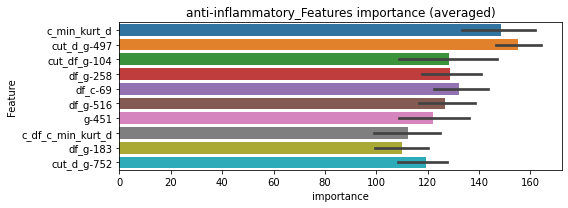

len(train_index) : 2831
len(valid_index) : 944
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00071397	valid_1's binary_logloss: 0.0259386


len(train_index) : 2831
len(valid_index) : 944
================================= fold 2/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000776895	valid_1's binary_logloss: 0.0196543


len(train_index) : 2831
len(valid_index) : 944
================================= fold 3/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000611349	valid_1's binary_logloss: 0.0091996


len(train_index) : 2832
len(valid_index) : 943
================================= fold 4/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds


anti-inflammatory logloss: 0.0204779864807417


Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00169866	valid_1's binary_logloss: 0.0271265


antiarrhythmic, len(trt): 24, len(othr): 3283
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00036358	valid_1's binary_logloss: 0.00206632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000363848	valid_1's binary_logloss: 0.00297933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000364568	valid_1's binary_logloss: 0.00335179
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000387255	valid_1's binary_logloss: 0.00313934


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018350, Threshold: 0.0057782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0057782, conf_0:0.00404, conf_1:0.00751
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_1: 0.0357782
threshold: 0.0357782, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000361939	valid_1's binary_logloss: 0.00177708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000357884	valid_1's binary_logloss: 0.00283667
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000357279	valid_1's binary_logloss: 0.00286458
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323776, Threshold: 0.0357782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0357782, conf_0:0.02862, conf_1:0.04293
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_1: 0.0657782


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000363845	valid_1's binary_logloss: 0.00313742


threshold: 0.0657782, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000361939	valid_1's binary_logloss: 0.00177708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000357884	valid_1's binary_logloss: 0.00283667
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000357279	valid_1's binary_logloss: 0.00286458
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323776, Threshold: 0.0657782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.0657782, conf_0:0.05920, conf_1:0.07236


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000363845	valid_1's binary_logloss: 0.00313742


threshold: 0.0657782, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


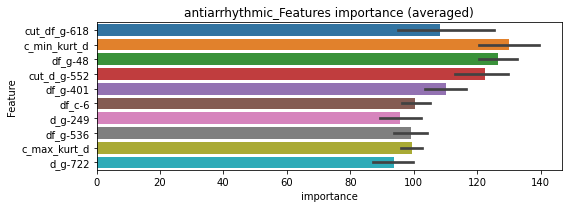

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000359867	valid_1's binary_logloss: 0.00203144


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000362432	valid_1's binary_logloss: 0.00176967


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000368825	valid_1's binary_logloss: 0.00241148


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000363277	valid_1's binary_logloss: 0.00279776


antiarrhythmic logloss: 0.0022530806415645794
antibiotic, len(trt): 43, len(othr): 3284
target_rate: 0.0018057 → Adj_target_rate: 0.0020542


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00050063	valid_1's binary_logloss: 0.0134287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000491328	valid_1's binary_logloss: 0.00595274
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000476723	valid_1's binary_logloss: 0.00179719
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00052383	valid_1's binary_logloss: 0.0115173


y_Threshold: 0.0039545, Threshold: 0.0274921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00181
Num_p_label: 40.0, Expected: 7.2, Threshold: 0.0274921, conf_0:0.01924, conf_1:0.03574
Num_p_label: 20.0, Expected: 7.2, Adj_threshold_1: 0.0574921
Num_p_label: 12.0, Expected: 7.2, Adj_threshold_2: 0.0874921
threshold: 0.0874921, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000452281	valid_1's binary_logloss: 0.00941195
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000480755	valid_1's binary_logloss: 0.00503528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00046262	valid_1's binary_logloss: 0.00213598
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354070, Threshold: 0.0874921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0092918 Vs.target_rate: 0.00181
Num_p_label: 37.0, Expected: 7.2, Threshold: 0.0874921, conf_0:0.06999, conf_1:0.10499
Num_p_label: 26.0, Expected: 7.2, Adj_threshold_1: 0.1174921
Num_p_label: 19.0, Expected: 7.2, Adj_threshold_2: 0.1474921


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000782229	valid_1's binary_logloss: 0.00999257


Num_p_label: 17.0, Expected: 7.2, Adj_threshold_3: 0.1774921
threshold: 0.1774921, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000452281	valid_1's binary_logloss: 0.00941195
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000480755	valid_1's binary_logloss: 0.00503528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00046262	valid_1's binary_logloss: 0.00213598
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354070, Threshold: 0.1774921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00181
Num_p_label: 17.0, Expected: 7.2, Threshold: 0.1774921, conf_0:0.15974, conf_1:0.19524


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000782229	valid_1's binary_logloss: 0.00999257


threshold: 0.1774921, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


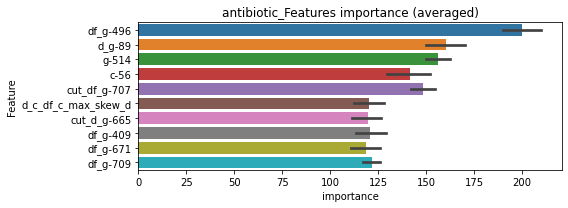

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antibiotic=================================


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000581128	valid_1's binary_logloss: 0.0119327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000528768	valid_1's binary_logloss: 0.00605958


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000477379	valid_1's binary_logloss: 0.00203686


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000574555	valid_1's binary_logloss: 0.0113264


antibiotic logloss: 0.007838872136956311
anticonvulsant, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000270193	valid_1's binary_logloss: 0.00107908
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000269012	valid_1's binary_logloss: 0.00215964
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000281806	valid_1's binary_logloss: 0.0039961
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011744, Threshold: 0.0042642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0042642, conf_0:0.00298, conf_1:0.00554
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0342642


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000281271	valid_1's binary_logloss: 0.00150459


threshold: 0.0342642, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000268307	valid_1's binary_logloss: 0.00143831
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000273388	valid_1's binary_logloss: 0.0028921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000276316	valid_1's binary_logloss: 0.00356943
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0136231, Threshold: 0.0342642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0342642, conf_0:0.02741, conf_1:0.04112


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000265147	valid_1's binary_logloss: 0.00150335


threshold: 0.0342642, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000268307	valid_1's binary_logloss: 0.00143831
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000273388	valid_1's binary_logloss: 0.0028921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000276316	valid_1's binary_logloss: 0.00356943
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0136231, Threshold: 0.0342642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0342642, conf_0:0.03084, conf_1:0.03769


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000265147	valid_1's binary_logloss: 0.00150335


threshold: 0.0342642, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


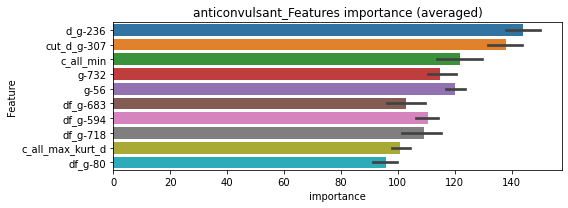

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.00027396	valid_1's binary_logloss: 0.0010614


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000276389	valid_1's binary_logloss: 0.0032059


================================= fold 3/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 anticonvulsant=================================


Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000312775	valid_1's binary_logloss: 0.00362207
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000267022	valid_1's binary_logloss: 0.00153325


anticonvulsant logloss: 0.0023553166443561822
antifungal, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000333521	valid_1's binary_logloss: 0.00244571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000349696	valid_1's binary_logloss: 0.00219507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000340671	valid_1's binary_logloss: 0.0023464
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016560, Threshold: 0.0047737, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000335681	valid_1's binary_logloss: 0.00366964


Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0047737, conf_0:0.00334, conf_1:0.00621
Num_p_label: 2.0, Expected: 4.3, Adj_threshold_1: 0.0347737
threshold: 0.0347737, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000327595	valid_1's binary_logloss: 0.00255322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000332815	valid_1's binary_logloss: 0.00195022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000331419	valid_1's binary_logloss: 0.00238964
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0431267, Threshold: 0.0347737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000326457	valid_1's binary_logloss: 0.00247976


p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0347737, conf_0:0.02782, conf_1:0.04173
threshold: 0.0347737, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000327595	valid_1's binary_logloss: 0.00255322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000332815	valid_1's binary_logloss: 0.00195022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000331419	valid_1's binary_logloss: 0.00238964
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0431267, Threshold: 0.0347737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000326457	valid_1's binary_logloss: 0.00247976


p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0347737, conf_0:0.03130, conf_1:0.03825
threshold: 0.0347737, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


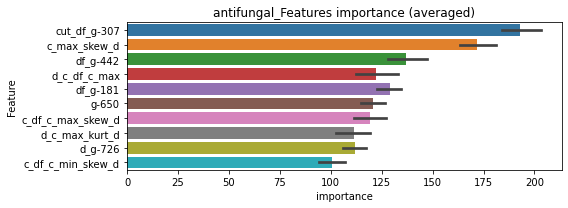

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000327758	valid_1's binary_logloss: 0.00205214
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000327707	valid_1's binary_logloss: 0.00205189


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00032701	valid_1's binary_logloss: 0.0018122
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000327143	valid_1's binary_logloss: 0.001812


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000337285	valid_1's binary_logloss: 0.00203393


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000324193	valid_1's binary_logloss: 0.00203547
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000325702	valid_1's binary_logloss: 0.00203513


antifungal logloss: 0.0019836332980694617
antihistamine, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000300837	valid_1's binary_logloss: 0.00160641
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000301618	valid_1's binary_logloss: 0.00254366
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000307666	valid_1's binary_logloss: 0.00128128
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015286, Threshold: 0.1284315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.1284315, conf_0:0.08990, conf_1:0.16696
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_1: 0.1584315
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_2: 0.1884315
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_3: 0.2184315
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_4: 0.2484315
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_5: 0.2784315
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_6: 0.3084315
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_7: 0.3384315
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_8: 0.3684315


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000307681	valid_1's binary_logloss: 0.00365955


Num_p_label: 17.0, Expected: 3.0, Adj_threshold_9: 0.3984315
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_10: 0.4284315
threshold: 0.4284315, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000282014	valid_1's binary_logloss: 0.00158584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000288541	valid_1's binary_logloss: 0.00291234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000295502	valid_1's binary_logloss: 0.000456913
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0705611, Threshold: 0.4284315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0123054 Vs.target_rate: 0.00076
Num_p_label: 49.0, Expected: 3.0, Threshold: 0.4284315, conf_0:0.34275, conf_1:0.51412
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_1: 0.4584315
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_2: 0.4884315
Num_p_label: 48.0, Expected: 3.0, Adj_threshold_3: 0.5184315
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_4: 0.5484315
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_5: 0.5784315
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_6: 0.6084315
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_7: 0.6384315
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_8: 0.6684315
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_9: 0.6984315


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000284539	valid_1's binary_logloss: 0.00242352


Num_p_label: 45.0, Expected: 3.0, Adj_threshold_10: 0.7284315
threshold: 0.7284315, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000282014	valid_1's binary_logloss: 0.00158584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000288541	valid_1's binary_logloss: 0.00291234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000295502	valid_1's binary_logloss: 0.000456913
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0705611, Threshold: 0.7284315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0113009 Vs.target_rate: 0.00076
Num_p_label: 45.0, Expected: 3.0, Threshold: 0.7284315, conf_0:0.65559, conf_1:0.80127
Num_p_label: 43.0, Expected: 3.0, Adj_threshold_1: 0.7584315
Num_p_label: 42.0, Expected: 3.0, Adj_threshold_2: 0.7884315
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_3: 0.8184315
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_4: 0.8484315
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_5: 0.8784315
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_6: 0.9084315


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000284539	valid_1's binary_logloss: 0.00242352


Num_p_label: 22.0, Expected: 3.0, Adj_threshold_7: 0.9384315
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_8: 0.9684315
threshold: 0.9684315, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


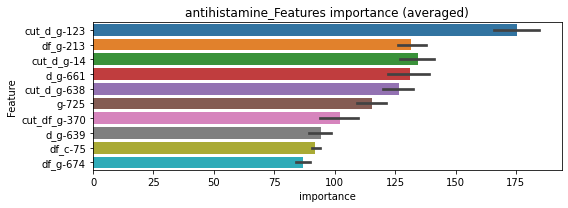

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 antihistamine=================================


Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000290493	valid_1's binary_logloss: 0.00111577
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 antihistamine=================================


Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000292502	valid_1's binary_logloss: 0.00173783
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 antihistamine=================================


Early stopping, best iteration is:
[733]	training's binary_logloss: 0.00030276	valid_1's binary_logloss: 0.000493506
Training until validation scores don't improve for 30 rounds


antihistamine logloss: 0.0012561654570602114


Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000288492	valid_1's binary_logloss: 0.00167713


antimalarial, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000319582	valid_1's binary_logloss: 0.000836848
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000321904	valid_1's binary_logloss: 0.00221019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000315665	valid_1's binary_logloss: 0.00285749
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018172, Threshold: 0.0085367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0085367, conf_0:0.00598, conf_1:0.01110
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.0385367
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0685367


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000323833	valid_1's binary_logloss: 0.00269842


threshold: 0.0685367, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000302383	valid_1's binary_logloss: 0.000998629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000317013	valid_1's binary_logloss: 0.00307404
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000305467	valid_1's binary_logloss: 0.000610664
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0937998, Threshold: 0.0685367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0057760 Vs.target_rate: 0.00076
Num_p_label: 23.0, Expected: 3.0, Threshold: 0.0685367, conf_0:0.05483, conf_1:0.08224
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0985367
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_2: 0.1285367
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.1585367
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_4: 0.1885367
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.2185367
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_6: 0.2485367
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.2785367


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000308683	valid_1's binary_logloss: 0.00307889


Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3085367
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.3385367
threshold: 0.3385367, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000302383	valid_1's binary_logloss: 0.000998629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000317013	valid_1's binary_logloss: 0.00307404
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000305467	valid_1's binary_logloss: 0.000610664
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000308683	valid_1's binary_logloss: 0.00307889


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0937998, Threshold: 0.3385367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.3385367, conf_0:0.30468, conf_1:0.37239
threshold: 0.3385367, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


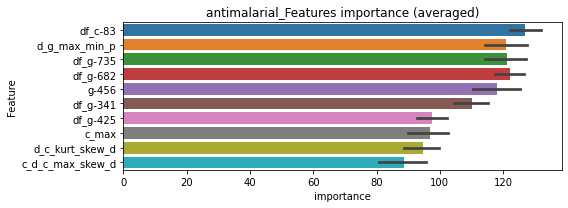

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000301865	valid_1's binary_logloss: 0.000667865


================================= fold 2/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 antimalarial=================================


Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000325919	valid_1's binary_logloss: 0.00196183
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 antimalarial=================================


Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000307368	valid_1's binary_logloss: 0.000740162
Training until validation scores don't improve for 30 rounds


antimalarial logloss: 0.001401744136139545


Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000310083	valid_1's binary_logloss: 0.00223711


antioxidant, len(trt): 73, len(othr): 3282
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3282


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000686895	valid_1's binary_logloss: 0.0324807
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000724789	valid_1's binary_logloss: 0.0300102
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000638606	valid_1's binary_logloss: 0.0204495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000833808	valid_1's binary_logloss: 0.0382962


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0063311, Threshold: 0.0245009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0245009, conf_0:0.01715, conf_1:0.03185
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_1: 0.0545009
threshold: 0.0545009, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000666342	valid_1's binary_logloss: 0.0249014
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000595045	valid_1's binary_logloss: 0.0312224
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000612692	valid_1's binary_logloss: 0.0227399
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000916715	valid_1's binary_logloss: 0.0253857


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0289788, Threshold: 0.0545009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3792
p_label_rate: 0.0072828 Vs.target_rate: 0.00307
Num_p_label: 29.0, Expected: 12.2, Threshold: 0.0545009, conf_0:0.04360, conf_1:0.06540
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_1: 0.0845009
Num_p_label: 12.0, Expected: 12.2, Adj_threshold_2: 0.1145009
threshold: 0.1145009, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3792, y_label_rate: 0.1711498
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.0011624	valid_1's binary_logloss: 0.0385452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000777857	valid_1's binary_logloss: 0.0262554
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000664722	valid_1's binary_logloss: 0.0231104
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000591055	valid_1's binary_logloss: 0.0122879


3 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0194975, Threshold: 0.1145009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 644.0/3782
p_label_rate: 0.0042692 Vs.target_rate: 0.00307
Num_p_label: 17.0, Expected: 12.2, Threshold: 0.1145009, conf_0:0.10305, conf_1:0.12595
threshold: 0.1145009, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 644.0/3782, y_label_rate: 0.1702803


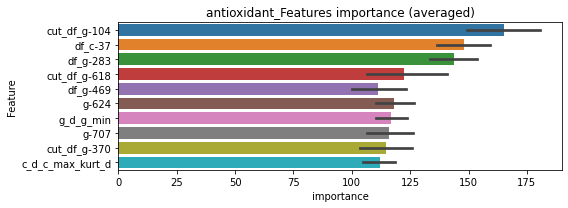

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 antioxidant=================================


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.0010079	valid_1's binary_logloss: 0.0207826
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000902215	valid_1's binary_logloss: 0.0364023


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000633211	valid_1's binary_logloss: 0.009519


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000728568	valid_1's binary_logloss: 0.0163429


antioxidant logloss: 0.020765845380187855
antiprotozoal, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000417815	valid_1's binary_logloss: 0.00357081
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000418203	valid_1's binary_logloss: 0.0053905
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000428433	valid_1's binary_logloss: 0.00158723
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000438563	valid_1's binary_logloss: 0.00620361


y_Threshold: 0.0031520, Threshold: 0.0113705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0113705, conf_0:0.00796, conf_1:0.01478
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_1: 0.0413705
threshold: 0.0413705, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000403012	valid_1's binary_logloss: 0.00280738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000409263	valid_1's binary_logloss: 0.00424101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000405533	valid_1's binary_logloss: 0.00146298
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000417418	valid_1's binary_logloss: 0.00519325


y_Threshold: 0.0328840, Threshold: 0.0413705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0413705, conf_0:0.03310, conf_1:0.04964
threshold: 0.0413705, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000403012	valid_1's binary_logloss: 0.00280738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000409263	valid_1's binary_logloss: 0.00424101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000405533	valid_1's binary_logloss: 0.00146298
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000417418	valid_1's binary_logloss: 0.00519325


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0328840, Threshold: 0.0413705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0413705, conf_0:0.03723, conf_1:0.04551
threshold: 0.0413705, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


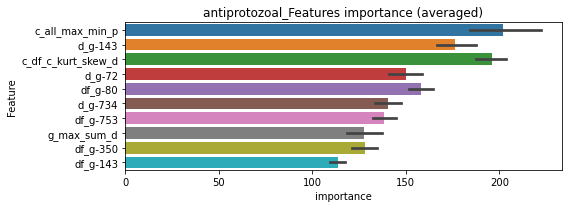

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000402757	valid_1's binary_logloss: 0.00245182
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.000400839	valid_1's binary_logloss: 0.00244519


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000421122	valid_1's binary_logloss: 0.00355489


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000413358	valid_1's binary_logloss: 0.00128561
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.000413358	valid_1's binary_logloss: 0.00128561


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000418582	valid_1's binary_logloss: 0.00541574


antiprotozoal logloss: 0.003176738743043914
antiviral, len(trt): 23, len(othr): 3284
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000306219	valid_1's binary_logloss: 0.00233665
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000315179	valid_1's binary_logloss: 0.000983663
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000311016	valid_1's binary_logloss: 0.001009
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000310787	valid_1's binary_logloss: 0.00219868


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016440, Threshold: 0.0047377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0047377, conf_0:0.00332, conf_1:0.00616
Num_p_label: 2.0, Expected: 3.8, Adj_threshold_1: 0.0347377
threshold: 0.0347377, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000303484	valid_1's binary_logloss: 0.00226264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000301279	valid_1's binary_logloss: 0.00086133
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000304953	valid_1's binary_logloss: 0.00225575
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0400822, Threshold: 0.0347377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00097
Num_p_label: 10.0, Expected: 3.8, Threshold: 0.0347377, conf_0:0.02779, conf_1:0.04169
Num_p_label: 2.0, Expected: 3.8, Adj_threshold_1: 0.0647377


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000301935	valid_1's binary_logloss: 0.00209366


threshold: 0.0647377, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000303484	valid_1's binary_logloss: 0.00226264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000301279	valid_1's binary_logloss: 0.00086133
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000304953	valid_1's binary_logloss: 0.00225575
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0400822, Threshold: 0.0647377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0005023 Vs.target_rate: 0.00097
Num_p_label: 2.0, Expected: 3.8, Threshold: 0.0647377, conf_0:0.05826, conf_1:0.07121


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000301935	valid_1's binary_logloss: 0.00209366


threshold: 0.0647377, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


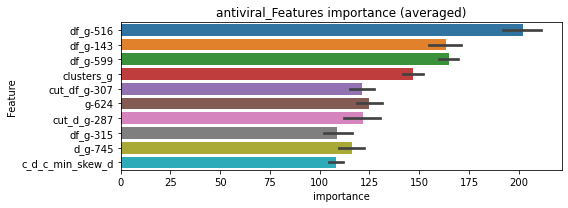

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000300544	valid_1's binary_logloss: 0.00126585


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000300634	valid_1's binary_logloss: 0.000643378
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000300634	valid_1's binary_logloss: 0.000643378


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000301442	valid_1's binary_logloss: 0.000938978
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000301442	valid_1's binary_logloss: 0.000938978


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000298658	valid_1's binary_logloss: 0.00117079


antiviral logloss: 0.0010047491188444168
apoptosis_stimulant, len(trt): 49, len(othr): 3284
target_rate: 0.0020576 → Adj_target_rate: 0.0022954


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000862621	valid_1's binary_logloss: 0.0246164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000525137	valid_1's binary_logloss: 0.0199264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000504499	valid_1's binary_logloss: 0.00189393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000559861	valid_1's binary_logloss: 0.0128709


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0038700, Threshold: 0.0516404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, Expected: 8.2, Threshold: 0.0516404, conf_0:0.03615, conf_1:0.06713
Num_p_label: 31.0, Expected: 8.2, Adj_threshold_1: 0.0816404
Num_p_label: 22.0, Expected: 8.2, Adj_threshold_2: 0.1116404
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_3: 0.1416404
threshold: 0.1416404, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000592317	valid_1's binary_logloss: 0.0231096
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000561713	valid_1's binary_logloss: 0.0187264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000505169	valid_1's binary_logloss: 0.00210109
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0166178, Threshold: 0.1416404, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000557375	valid_1's binary_logloss: 0.013101


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0118031 Vs.target_rate: 0.00206
Num_p_label: 47.0, Expected: 8.2, Threshold: 0.1416404, conf_0:0.11331, conf_1:0.16997
Num_p_label: 36.0, Expected: 8.2, Adj_threshold_1: 0.1716404
Num_p_label: 32.0, Expected: 8.2, Adj_threshold_2: 0.2016404
Num_p_label: 28.0, Expected: 8.2, Adj_threshold_3: 0.2316404
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_4: 0.2616404
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_5: 0.2916404
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_6: 0.3216404
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_7: 0.3516404
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_8: 0.3816404
threshold: 0.3816404, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000491576	valid_1's binary_logloss: 0.0134185
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000543148	valid_1's binary_logloss: 0.0200518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000510232	valid_1's binary_logloss: 0.0123087
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000475569	valid_1's binary_logloss: 0.0167723


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0155267, Threshold: 0.3816404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0052737 Vs.target_rate: 0.00206
Num_p_label: 21.0, Expected: 8.2, Threshold: 0.3816404, conf_0:0.34348, conf_1:0.41980
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_1: 0.4116404
threshold: 0.4116404, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


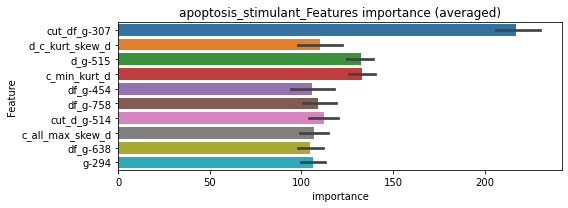

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000498591	valid_1's binary_logloss: 0.00678984


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 apoptosis_stimulant=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.0010481	valid_1's binary_logloss: 0.0174796
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000513389	valid_1's binary_logloss: 0.0141462


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000516041	valid_1's binary_logloss: 0.00658277


apoptosis_stimulant logloss: 0.011253217118314533
aromatase_inhibitor, len(trt): 47, len(othr): 3285
target_rate: 0.0019736 → Adj_target_rate: 0.0022155


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00051386	valid_1's binary_logloss: 0.015369
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000516106	valid_1's binary_logloss: 0.0167593
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000605075	valid_1's binary_logloss: 0.00865664
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000493121	valid_1's binary_logloss: 0.00545652


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037195, Threshold: 0.0118336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00197
Num_p_label: 40.0, Expected: 7.9, Threshold: 0.0118336, conf_0:0.00828, conf_1:0.01538
Num_p_label: 10.0, Expected: 7.9, Adj_threshold_1: 0.0418336
threshold: 0.0418336, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000565906	valid_1's binary_logloss: 0.0161302
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000590074	valid_1's binary_logloss: 0.0198864
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000518769	valid_1's binary_logloss: 0.0092998
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000482737	valid_1's binary_logloss: 0.00413297


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0126361, Threshold: 0.0418336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0042692 Vs.target_rate: 0.00197
Num_p_label: 17.0, Expected: 7.9, Threshold: 0.0418336, conf_0:0.03347, conf_1:0.05020
threshold: 0.0418336, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000509244	valid_1's binary_logloss: 0.0156106
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000495514	valid_1's binary_logloss: 0.00753214
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000486122	valid_1's binary_logloss: 0.00649245
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000485669	valid_1's binary_logloss: 0.00536855


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0188935, Threshold: 0.0418336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0040181 Vs.target_rate: 0.00197
Num_p_label: 16.0, Expected: 7.9, Threshold: 0.0418336, conf_0:0.03765, conf_1:0.04602
threshold: 0.0418336, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


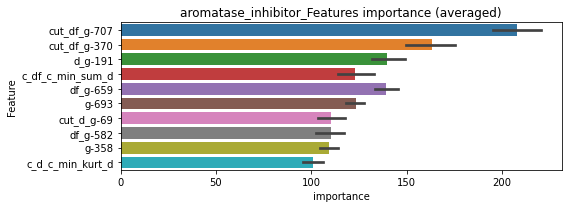

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000550348	valid_1's binary_logloss: 0.0121682


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000549443	valid_1's binary_logloss: 0.00730582


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000507589	valid_1's binary_logloss: 0.00589788


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000496542	valid_1's binary_logloss: 0.00568374


aromatase_inhibitor logloss: 0.007763920409071238
atm_kinase_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000154	valid_1's binary_logloss: 0.000260536
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000157972	valid_1's binary_logloss: 0.000565774
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000153118	valid_1's binary_logloss: 0.000182664
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003764, Threshold: 0.0013820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0013820, conf_0:0.00097, conf_1:0.00180
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.0313820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0613820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0913820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.1213820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.1513820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.1813820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.2113820
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_8: 0.2413820
threshold: 0.2413820, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000154379	valid_1's binary_logloss: 0.000494978


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000146004	valid_1's binary_logloss: 0.000328943
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000143719	valid_1's binary_logloss: 0.00072875
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000145706	valid_1's binary_logloss: 0.000149571
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0588521, Threshold: 0.2413820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.2413820, conf_0:0.19311, conf_1:0.28966
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.2713820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.3013820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.3313820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.3613820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_5: 0.3913820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.4213820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.4513820
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.4813820
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.5113820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.5413820


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000145588	valid_1's binary_logloss: 0.00132842


threshold: 0.5413820, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000146004	valid_1's binary_logloss: 0.000328943
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000143719	valid_1's binary_logloss: 0.00072875
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000145706	valid_1's binary_logloss: 0.000149571
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0588521, Threshold: 0.5413820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.5413820, conf_0:0.48724, conf_1:0.59552
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.5713820
threshold: 0.5713820, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000145588	valid_1's binary_logloss: 0.00132842


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


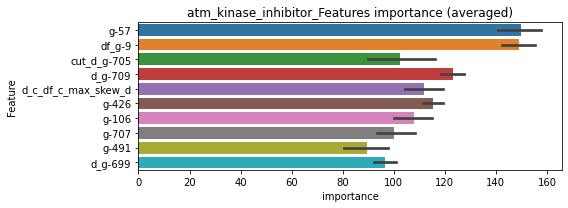

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148808	valid_1's binary_logloss: 0.000223608


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1122]	training's binary_logloss: 0.000146717	valid_1's binary_logloss: 0.000220939
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148109	valid_1's binary_logloss: 0.000330409
Early stopping, best iteration is:
[1197]	training's binary_logloss: 0.000145259	valid_1's binary_logloss: 0.000326484


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014846	valid_1's binary_logloss: 0.000157546


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1120]	training's binary_logloss: 0.000146148	valid_1's binary_logloss: 0.000155059
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148832	valid_1's binary_logloss: 0.00046763


atm_kinase_inhibitor logloss: 0.00029069853290414994


Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.000145799	valid_1's binary_logloss: 0.000460308


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000177889	valid_1's binary_logloss: 0.000733222
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000180515	valid_1's binary_logloss: 0.00132257
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000182947	valid_1's binary_logloss: 0.000193594
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005303, Threshold: 0.0016380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0016380, conf_0:0.00115, conf_1:0.00213
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_1: 0.0316380
threshold: 0.0316380, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000178526	valid_1's binary_logloss: 0.00022075


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000172479	valid_1's binary_logloss: 0.000221565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00017687	valid_1's binary_logloss: 0.00160816
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000171815	valid_1's binary_logloss: 0.00018163
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0630623, Threshold: 0.0316380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.0316380, conf_0:0.02531, conf_1:0.03797
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.0616380
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.0916380
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_3: 0.1216380
threshold: 0.1216380, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000170451	valid_1's binary_logloss: 0.000189606


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000172479	valid_1's binary_logloss: 0.000221565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00017687	valid_1's binary_logloss: 0.00160816
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000171815	valid_1's binary_logloss: 0.00018163
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0630623, Threshold: 0.1216380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.1216380, conf_0:0.10947, conf_1:0.13380
threshold: 0.1216380, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000170451	valid_1's binary_logloss: 0.000189606


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


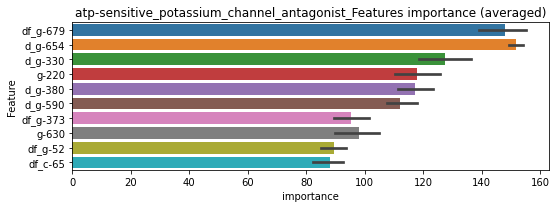

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000171841	valid_1's binary_logloss: 0.000216849
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000171654	valid_1's binary_logloss: 0.000216621


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000172911	valid_1's binary_logloss: 0.000694657
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00017212	valid_1's binary_logloss: 0.000192521
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.000171082	valid_1's binary_logloss: 0.000191447


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


atp-sensitive_potassium_channel_antagonist logloss: 0.0003249717578657185


Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000173493	valid_1's binary_logloss: 0.000197274


atp_synthase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000275399	valid_1's binary_logloss: 0.00106002
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000267059	valid_1's binary_logloss: 0.000537844
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000267358	valid_1's binary_logloss: 0.000534944
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013214, Threshold: 0.0103970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0103970, conf_0:0.00728, conf_1:0.01352
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0403970
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0703970
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.1003970
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.1303970


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000267942	valid_1's binary_logloss: 0.000761697


threshold: 0.1303970, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000256929	valid_1's binary_logloss: 0.000911263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000254574	valid_1's binary_logloss: 0.000496534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000255671	valid_1's binary_logloss: 0.000366
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1495911, Threshold: 0.1303970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0055249 Vs.target_rate: 0.00050
Num_p_label: 22.0, Expected: 2.0, Threshold: 0.1303970, conf_0:0.10432, conf_1:0.15648
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_1: 0.1603970
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_2: 0.1903970
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_3: 0.2203970
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_4: 0.2503970
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_5: 0.2803970
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_6: 0.3103970
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_7: 0.3403970


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000252233	valid_1's binary_logloss: 0.000597943


Num_p_label: 8.0, Expected: 2.0, Adj_threshold_8: 0.3703970
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_9: 0.4003970
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_10: 0.4303970
threshold: 0.4303970, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000256929	valid_1's binary_logloss: 0.000911263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000254574	valid_1's binary_logloss: 0.000496534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000255671	valid_1's binary_logloss: 0.000366
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1495911, Threshold: 0.4303970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.4303970, conf_0:0.38736, conf_1:0.47344
threshold: 0.4303970, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000252233	valid_1's binary_logloss: 0.000597943


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


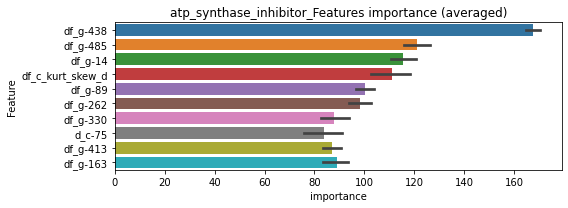

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000257261	valid_1's binary_logloss: 0.00070062
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000264424	valid_1's binary_logloss: 0.000509029
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000263915	valid_1's binary_logloss: 0.000392043
Training until validation scores don't improve for 30 rounds


atp_synthase_inhibitor logloss: 0.0005668666758058954


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000259424	valid_1's binary_logloss: 0.000665774


atpase_inhibitor, len(trt): 97, len(othr): 3274
target_rate: 0.0040732 → Adj_target_rate: 0.0041016


selected negative label: 3274


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0505782	valid_1's binary_logloss: 0.12443
[2000]	training's binary_logloss: 0.0255259	valid_1's binary_logloss: 0.104749
[3000]	training's binary_logloss: 0.0167398	valid_1's binary_logloss: 0.0979045
Early stopping, best iteration is:
[3066]	training's binary_logloss: 0.0163753	valid_1's binary_logloss: 0.0977688
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0523391	valid_1's binary_logloss: 0.103657
[2000]	training's binary_logloss: 0.0264252	valid_1's binary_logloss: 0.0803216
[3000]	training's binary_logloss: 0.0173116	valid_1's binary_logloss: 0.0707377
[4000]	training's binary_logloss: 0.0128632	valid_1's binary_logloss: 0.0662075
[5000]	training's binary_logloss: 0.0102189	valid_1's binary_logloss: 0.0629591
[6000]	training's binary_logloss: 0.00849758	valid_1's binary_logloss: 0.0606398
Early stopping, best iteration is:
[6009]	trai

1 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0399027, Threshold: 0.0872468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 639/3766
p_label_rate: 0.0100452 Vs.target_rate: 0.00407
Num_p_label: 40.0, Expected: 16.2, Threshold: 0.0872468, conf_0:0.06107, conf_1:0.11342
Num_p_label: 19.0, Expected: 16.2, Adj_threshold_1: 0.1172468
threshold: 0.1172468, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 639.0/3766, y_label_rate: 0.1696760
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0470507	valid_1's binary_logloss: 0.103523
[2000]	training's binary_logloss: 0.0235793	valid_1's binary_logloss: 0.081181
[3000]	training's binary_logloss: 0.0154658	valid_1's binary_logloss: 0.0726404
Early stopping, best iteration is:
[3968]	training's binary_logloss: 0.0116135	valid_1's binary_logloss: 0.0682861
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.04835	valid_1's binary_logloss: 0.0935315
[2000]	training's binary_logloss: 0.0240226	valid_1's binary_logloss: 0.0700304
[3000]	training's binary_logloss: 0.0157815	valid_1's binary_logloss: 0.0616066
[4000]	training's binary_logloss: 0.011754	valid_1's binary_logloss: 0.0574789
[5000]	training's binary_logloss: 0.00938718	valid_1's binary_logloss: 0.0549067
Early stopping, best iteration is:
[5335]	training's binary_logloss: 0.00880114	valid_1's binary_logloss: 0.0542063
Training un

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0723211, Threshold: 0.1172468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 629.0/3746
p_label_rate: 0.0085384 Vs.target_rate: 0.00407
Num_p_label: 34.0, Expected: 16.2, Threshold: 0.1172468, conf_0:0.09380, conf_1:0.14070
Num_p_label: 17.0, Expected: 16.2, Adj_threshold_1: 0.1472468
threshold: 0.1472468, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 629.0/3746, y_label_rate: 0.1679124
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0461425	valid_1's binary_logloss: 0.0883588
[2000]	training's binary_logloss: 0.0230662	valid_1's binary_logloss: 0.0665388
[3000]	training's binary_logloss: 0.0151895	valid_1's binary_logloss: 0.0581062
[4000]	training's binary_logloss: 0.0113351	valid_1's binary_logloss: 0.0537843
[5000]	training's binary_logloss: 0.00905912	valid_1's binary_logloss: 0.0507945
Early stopping, best iteration is:
[5282]	training's binary_logloss: 0.00858209	valid_1's binary_logloss: 0.0500302
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0464985	valid_1's binary_logloss: 0.0832239
[2000]	training's binary_logloss: 0.0233226	valid_1's binary_logloss: 0.0596443
[3000]	training's binary_logloss: 0.0153486	valid_1's binary_logloss: 0.050396
[4000]	training's binary_logloss: 0.0114799	valid_1's binary_logloss: 0.0460045
[5000]	training's binary_logloss: 0.009175

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0760129, Threshold: 0.1472468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 621.0/3730
p_label_rate: 0.0050226 Vs.target_rate: 0.00407
Num_p_label: 20.0, Expected: 16.2, Threshold: 0.1472468, conf_0:0.13252, conf_1:0.16197
threshold: 0.1472468, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 621.0/3730, y_label_rate: 0.1664879


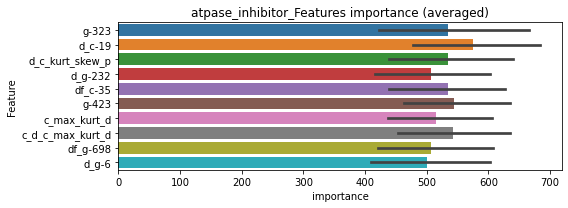

len(train_index) : 2797
len(valid_index) : 933
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0470262	valid_1's binary_logloss: 0.0863532
[2000]	training's binary_logloss: 0.0239449	valid_1's binary_logloss: 0.0636355
[3000]	training's binary_logloss: 0.015991	valid_1's binary_logloss: 0.0545776
[4000]	training's binary_logloss: 0.0119685	valid_1's binary_logloss: 0.0499456
[5000]	training's binary_logloss: 0.00959681	valid_1's binary_logloss: 0.0470305
[6000]	training's binary_logloss: 0.00800049	valid_1's binary_logloss: 0.0449709
[7000]	training's binary_logloss: 0.00687771	valid_1's binary_logloss: 0.0434329
[8000]	training's binary_logloss: 0.0060431	valid_1's binary_logloss: 0.0421457
[9000]	training's binary_logloss: 0.00539122	valid_1's binary_logloss: 0.0412188
Early stopping, best iteration is:
[9476]	training's binary_logloss: 0.00513057	valid_1's binary_logloss: 0.0408169


len(train_index) : 2797
len(valid_index) : 933
================================= fold 2/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0483574	valid_1's binary_logloss: 0.083976
[2000]	training's binary_logloss: 0.024661	valid_1's binary_logloss: 0.0606311
[3000]	training's binary_logloss: 0.0163865	valid_1's binary_logloss: 0.0515663
[4000]	training's binary_logloss: 0.0122622	valid_1's binary_logloss: 0.0467212
[5000]	training's binary_logloss: 0.00982944	valid_1's binary_logloss: 0.0436265
[6000]	training's binary_logloss: 0.00818574	valid_1's binary_logloss: 0.0414679
[7000]	training's binary_logloss: 0.00703879	valid_1's binary_logloss: 0.0399238
[8000]	training's binary_logloss: 0.00618887	valid_1's binary_logloss: 0.0386381
[9000]	training's binary_logloss: 0.00552194	valid_1's binary_logloss: 0.0376417
[10000]	training's binary_logloss: 0.00498775	valid_1's binary_logloss: 0.0367568
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00498775	valid_1's binary_logloss: 0.0367568


len(train_index) : 2798
len(valid_index) : 932
================================= fold 3/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0470958	valid_1's binary_logloss: 0.0880099
[2000]	training's binary_logloss: 0.024091	valid_1's binary_logloss: 0.0652606
[3000]	training's binary_logloss: 0.0160319	valid_1's binary_logloss: 0.0565179
[4000]	training's binary_logloss: 0.0120157	valid_1's binary_logloss: 0.0518034
[5000]	training's binary_logloss: 0.00963376	valid_1's binary_logloss: 0.0489194
Early stopping, best iteration is:
[5311]	training's binary_logloss: 0.00906528	valid_1's binary_logloss: 0.0480305


len(train_index) : 2798
len(valid_index) : 932
================================= fold 4/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0470291	valid_1's binary_logloss: 0.0975593
[2000]	training's binary_logloss: 0.0238891	valid_1's binary_logloss: 0.0716971
[3000]	training's binary_logloss: 0.0158958	valid_1's binary_logloss: 0.0614717
[4000]	training's binary_logloss: 0.0119008	valid_1's binary_logloss: 0.0560127
[5000]	training's binary_logloss: 0.00955362	valid_1's binary_logloss: 0.0525698
[6000]	training's binary_logloss: 0.00797159	valid_1's binary_logloss: 0.0500625
[7000]	training's binary_logloss: 0.00685032	valid_1's binary_logloss: 0.0482512
[8000]	training's binary_logloss: 0.0060171	valid_1's binary_logloss: 0.0467316
[9000]	training's binary_logloss: 0.00536744	valid_1's binary_logloss: 0.0455382
Early stopping, best iteration is:
[9285]	training's binary_logloss: 0.00521222	valid_1's binary_logloss: 0.0452744


atpase_inhibitor logloss: 0.04271753937983175
atpase_inhibitor is unpredictable(><)!
atr_kinase_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034189	valid_1's binary_logloss: 0.000993679
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00033331	valid_1's binary_logloss: 0.00224811
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000340941	valid_1's binary_logloss: 0.000811743
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018670, Threshold: 0.0077848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0077848, conf_0:0.00545, conf_1:0.01012
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_1: 0.0377848
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0677848


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000337912	valid_1's binary_logloss: 0.00300145


threshold: 0.0677848, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000328706	valid_1's binary_logloss: 0.000709372
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000316595	valid_1's binary_logloss: 0.00240219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000329457	valid_1's binary_logloss: 0.000596903
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0695553, Threshold: 0.0677848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00080
Num_p_label: 17.0, Expected: 3.2, Threshold: 0.0677848, conf_0:0.05423, conf_1:0.08134
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_1: 0.0977848
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_2: 0.1277848
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_3: 0.1577848
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_4: 0.1877848
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_5: 0.2177848


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000323186	valid_1's binary_logloss: 0.0026407


Num_p_label: 10.0, Expected: 3.2, Adj_threshold_6: 0.2477848
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_7: 0.2777848
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_8: 0.3077848
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_9: 0.3377848
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_10: 0.3677848
threshold: 0.3677848, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000328706	valid_1's binary_logloss: 0.000709372
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000316595	valid_1's binary_logloss: 0.00240219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000329457	valid_1's binary_logloss: 0.000596903
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0695553, Threshold: 0.3677848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00080
Num_p_label: 8.0, Expected: 3.2, Threshold: 0.3677848, conf_0:0.33101, conf_1:0.40456
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_1: 0.3977848
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_2: 0.4277848
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_3: 0.4577848


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000323186	valid_1's binary_logloss: 0.0026407


threshold: 0.4577848, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


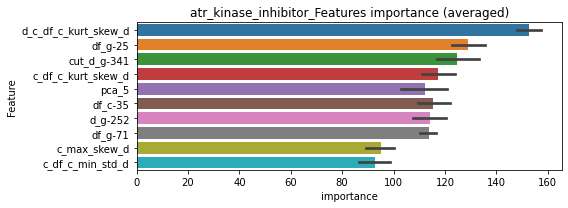

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000320299	valid_1's binary_logloss: 0.000749814


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000322478	valid_1's binary_logloss: 0.00225709


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000333935	valid_1's binary_logloss: 0.000611316


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000325236	valid_1's binary_logloss: 0.00240642


atr_kinase_inhibitor logloss: 0.0015059267250632988
aurora_kinase_inhibitor, len(trt): 96, len(othr): 3276
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3276


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0544435	valid_1's binary_logloss: 0.118723
[2000]	training's binary_logloss: 0.0272843	valid_1's binary_logloss: 0.0934176
[3000]	training's binary_logloss: 0.0179384	valid_1's binary_logloss: 0.0846806
Early stopping, best iteration is:
[3260]	training's binary_logloss: 0.0164532	valid_1's binary_logloss: 0.0830333
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0554791	valid_1's binary_logloss: 0.104116
[2000]	training's binary_logloss: 0.0276911	valid_1's binary_logloss: 0.073945
[3000]	training's binary_logloss: 0.0182006	valid_1's binary_logloss: 0.0631623
[4000]	training's binary_logloss: 0.0135568	valid_1's binary_logloss: 0.0571357
[5000]	training's binary_logloss: 0.0107982	valid_1's binary_logloss: 0.0533821
[6000]	training's binary_logloss: 0.00898672	valid_1's binary_logloss: 0.0508048
[7000]	training's binary_logloss: 0.00769658	

1 / 3, AUC score:0.993, PR-AUC:0.985
y_Threshold: 0.0505887, Threshold: 0.1938918, pos_neg_ratio: 0.8000000
Remove_noisy_data: 168 → Positive_corect_labels: 637/3763
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.1938918, conf_0:0.13572, conf_1:0.25206
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_1: 0.2238918
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_2: 0.2538918
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_3: 0.2838918
threshold: 0.2838918, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 637.0/3763, y_label_rate: 0.1692798
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0483467	valid_1's binary_logloss: 0.104897
[2000]	training's binary_logloss: 0.0239677	valid_1's binary_logloss: 0.0794703
[3000]	training's binary_logloss: 0.0157591	valid_1's binary_logloss: 0.0695922
[4000]	training's binary_logloss: 0.0117618	valid_1's binary_logloss: 0.0648491
Early stopping, best iteration is:
[4230]	training's binary_logloss: 0.0111189	valid_1's binary_logloss: 0.0639665
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0498408	valid_1's binary_logloss: 0.0899386
[2000]	training's binary_logloss: 0.0246611	valid_1's binary_logloss: 0.0639958
[3000]	training's binary_logloss: 0.016144	valid_1's binary_logloss: 0.0542266
[4000]	training's binary_logloss: 0.0120368	valid_1's binary_logloss: 0.0490106
[5000]	training's binary_logloss: 0.00960966	valid_1's binary_logloss: 0.0457944
Early stopping, best iteration is:
[5097]	tr

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0863051, Threshold: 0.2838918, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 623.0/3735
p_label_rate: 0.0128076 Vs.target_rate: 0.00403
Num_p_label: 51.0, Expected: 16.1, Threshold: 0.2838918, conf_0:0.22711, conf_1:0.34067
Num_p_label: 45.0, Expected: 16.1, Adj_threshold_1: 0.3138918
Num_p_label: 38.0, Expected: 16.1, Adj_threshold_2: 0.3438918
Num_p_label: 31.0, Expected: 16.1, Adj_threshold_3: 0.3738918
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_4: 0.4038918
threshold: 0.4038918, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 623.0/3735, y_label_rate: 0.1668005
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0468414	valid_1's binary_logloss: 0.0889415
[2000]	training's binary_logloss: 0.0233005	valid_1's binary_logloss: 0.062972
[3000]	training's binary_logloss: 0.0153309	valid_1's binary_logloss: 0.052678
[4000]	training's binary_logloss: 0.0114449	valid_1's binary_logloss: 0.0474556
[5000]	training's binary_logloss: 0.00913722	valid_1's binary_logloss: 0.0441136
[6000]	training's binary_logloss: 0.00763053	valid_1's binary_logloss: 0.0419378
Early stopping, best iteration is:
[6231]	training's binary_logloss: 0.00734988	valid_1's binary_logloss: 0.0415414
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0458093	valid_1's binary_logloss: 0.10212
[2000]	training's binary_logloss: 0.0226961	valid_1's binary_logloss: 0.0775092
[3000]	training's binary_logloss: 0.0148788	valid_1's binary_logloss: 0.0684205
Early stopping, best iteration is:
[3621]	tr

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0874272, Threshold: 0.4038918, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 618.0/3725
p_label_rate: 0.0062783 Vs.target_rate: 0.00403
Num_p_label: 25.0, Expected: 16.1, Threshold: 0.4038918, conf_0:0.36350, conf_1:0.44428
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_1: 0.4338918
threshold: 0.4338918, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 618.0/3725, y_label_rate: 0.1659060


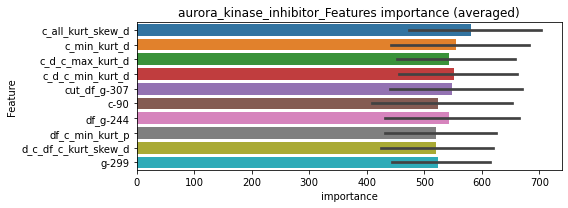

len(train_index) : 2793
len(valid_index) : 932
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0498955	valid_1's binary_logloss: 0.101288
[2000]	training's binary_logloss: 0.0251888	valid_1's binary_logloss: 0.0745652
[3000]	training's binary_logloss: 0.0166985	valid_1's binary_logloss: 0.0640911
[4000]	training's binary_logloss: 0.0124739	valid_1's binary_logloss: 0.05854
[5000]	training's binary_logloss: 0.00996584	valid_1's binary_logloss: 0.055007
[6000]	training's binary_logloss: 0.00832133	valid_1's binary_logloss: 0.0526648
[7000]	training's binary_logloss: 0.00714641	valid_1's binary_logloss: 0.0509415
[8000]	training's binary_logloss: 0.00627238	valid_1's binary_logloss: 0.0495301
[9000]	training's binary_logloss: 0.00559882	valid_1's binary_logloss: 0.0484788
Early stopping, best iteration is:
[9299]	training's binary_logloss: 0.00542446	valid_1's binary_logloss: 0.0481803


len(train_index) : 2794
len(valid_index) : 931
================================= fold 2/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0501496	valid_1's binary_logloss: 0.0887315
[2000]	training's binary_logloss: 0.0253032	valid_1's binary_logloss: 0.0616416
[3000]	training's binary_logloss: 0.0167719	valid_1's binary_logloss: 0.0510603
[4000]	training's binary_logloss: 0.0125519	valid_1's binary_logloss: 0.0453301
[5000]	training's binary_logloss: 0.0100386	valid_1's binary_logloss: 0.0416292
[6000]	training's binary_logloss: 0.00839612	valid_1's binary_logloss: 0.039157
[7000]	training's binary_logloss: 0.00720513	valid_1's binary_logloss: 0.0372046
[8000]	training's binary_logloss: 0.00632295	valid_1's binary_logloss: 0.0356445
[9000]	training's binary_logloss: 0.00563811	valid_1's binary_logloss: 0.0344798
Early stopping, best iteration is:
[9434]	training's binary_logloss: 0.00538797	valid_1's binary_logloss: 0.0340909


len(train_index) : 2794
len(valid_index) : 931
================================= fold 3/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0512792	valid_1's binary_logloss: 0.084886
[2000]	training's binary_logloss: 0.0257243	valid_1's binary_logloss: 0.0567461
[3000]	training's binary_logloss: 0.0170368	valid_1's binary_logloss: 0.0458128
[4000]	training's binary_logloss: 0.0127374	valid_1's binary_logloss: 0.0400591
[5000]	training's binary_logloss: 0.0101861	valid_1's binary_logloss: 0.0364285
[6000]	training's binary_logloss: 0.00850441	valid_1's binary_logloss: 0.0338209
[7000]	training's binary_logloss: 0.00729996	valid_1's binary_logloss: 0.0318958
[8000]	training's binary_logloss: 0.00640478	valid_1's binary_logloss: 0.0304101
[9000]	training's binary_logloss: 0.00571624	valid_1's binary_logloss: 0.0292019
[10000]	training's binary_logloss: 0.00516742	valid_1's binary_logloss: 0.0282701
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00516742	valid_1's binary_logloss: 0.0282701


len(train_index) : 2794
len(valid_index) : 931
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0510379	valid_1's binary_logloss: 0.0911597
[2000]	training's binary_logloss: 0.0257988	valid_1's binary_logloss: 0.0633209
[3000]	training's binary_logloss: 0.0171211	valid_1's binary_logloss: 0.0525662
[4000]	training's binary_logloss: 0.0127885	valid_1's binary_logloss: 0.0470088
[5000]	training's binary_logloss: 0.0102248	valid_1's binary_logloss: 0.0435737
[6000]	training's binary_logloss: 0.00852325	valid_1's binary_logloss: 0.041081
[7000]	training's binary_logloss: 0.00731576	valid_1's binary_logloss: 0.0392789
[8000]	training's binary_logloss: 0.00642002	valid_1's binary_logloss: 0.0378071
Early stopping, best iteration is:
[8795]	training's binary_logloss: 0.00585127	valid_1's binary_logloss: 0.0368868


aurora_kinase_inhibitor logloss: 0.036860075501604146
aurora_kinase_inhibitor is unpredictable(><)!
autotaxin_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00016207	valid_1's binary_logloss: 0.000240223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000165465	valid_1's binary_logloss: 0.0015519
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000166417	valid_1's binary_logloss: 0.000202617
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005543, Threshold: 0.0042101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0042101, conf_0:0.00295, conf_1:0.00547
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0342101
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0642101
threshold: 0.0642101, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000162438	valid_1's binary_logloss: 0.000263095


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000146026	valid_1's binary_logloss: 0.000933698
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000148291	valid_1's binary_logloss: 0.000176878
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000150417	valid_1's binary_logloss: 0.000158003
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1261025, Threshold: 0.0642101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0107986 Vs.target_rate: 0.00025
Num_p_label: 43.0, Expected: 1.0, Threshold: 0.0642101, conf_0:0.05137, conf_1:0.07705
Num_p_label: 37.0, Expected: 1.0, Adj_threshold_1: 0.0942101
Num_p_label: 32.0, Expected: 1.0, Adj_threshold_2: 0.1242101
Num_p_label: 29.0, Expected: 1.0, Adj_threshold_3: 0.1542101
Num_p_label: 28.0, Expected: 1.0, Adj_threshold_4: 0.1842101
Num_p_label: 22.0, Expected: 1.0, Adj_threshold_5: 0.2142101
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_6: 0.2442101
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_7: 0.2742101
Num_p_label: 16.0, Expected: 1.0, Adj_threshold_8: 0.3042101
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_9: 0.3342101
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_10: 0.3642101


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000148245	valid_1's binary_logloss: 0.000166002


threshold: 0.3642101, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000146026	valid_1's binary_logloss: 0.000933698
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000148291	valid_1's binary_logloss: 0.000176878
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000150417	valid_1's binary_logloss: 0.000158003
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1261025, Threshold: 0.3642101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00025
Num_p_label: 14.0, Expected: 1.0, Threshold: 0.3642101, conf_0:0.32779, conf_1:0.40063
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_1: 0.3942101
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_2: 0.4242101
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_3: 0.4542101
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_4: 0.4842101
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_5: 0.5142101
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_6: 0.5442101
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.5742101
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.6042101
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.6342101
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_10: 0.6642101
threshold: 0.6642101, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000148245	valid_1's binary_logloss: 0.000166002


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


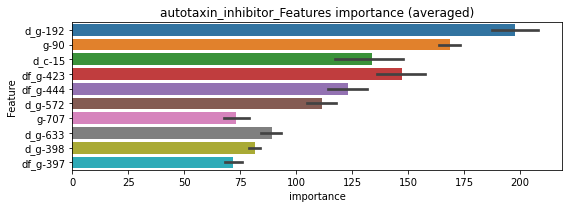

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150529	valid_1's binary_logloss: 0.000517176


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1152]	training's binary_logloss: 0.000147894	valid_1's binary_logloss: 0.000512354
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152642	valid_1's binary_logloss: 0.000183569


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1125]	training's binary_logloss: 0.000150789	valid_1's binary_logloss: 0.000181367
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152753	valid_1's binary_logloss: 0.000158622


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1148]	training's binary_logloss: 0.000149927	valid_1's binary_logloss: 0.00015576
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152892	valid_1's binary_logloss: 0.000171262
Early stopping, best iteration is:
[1039]	training's binary_logloss: 0.000152224	valid_1's binary_logloss: 0.000170515


autotaxin_inhibitor logloss: 0.0002550672374270517
bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3282
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000724653	valid_1's binary_logloss: 0.0326461
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00117698	valid_1's binary_logloss: 0.0300991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000550522	valid_1's binary_logloss: 0.00380268
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000628515	valid_1's binary_logloss: 0.0185971


1 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0072684, Threshold: 0.0240325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0240325, conf_0:0.01682, conf_1:0.03124
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_1: 0.0540325
threshold: 0.0540325, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3798, y_label_rate: 0.1716693
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000632017	valid_1's binary_logloss: 0.017125
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000534291	valid_1's binary_logloss: 0.0222518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000559558	valid_1's binary_logloss: 0.0170414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000695483	valid_1's binary_logloss: 0.0250899


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0313949, Threshold: 0.0540325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3788
p_label_rate: 0.0110497 Vs.target_rate: 0.00252
Num_p_label: 44.0, Expected: 10.0, Threshold: 0.0540325, conf_0:0.04323, conf_1:0.06484
Num_p_label: 25.0, Expected: 10.0, Adj_threshold_1: 0.0840325
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_2: 0.1140325
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_3: 0.1440325
threshold: 0.1440325, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 647.0/3788, y_label_rate: 0.1708025
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000607169	valid_1's binary_logloss: 0.0180508
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000914418	valid_1's binary_logloss: 0.028274
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000607512	valid_1's binary_logloss: 0.0145562
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000516503	valid_1's binary_logloss: 0.00861982


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0315935, Threshold: 0.1440325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3784
p_label_rate: 0.0035158 Vs.target_rate: 0.00252
Num_p_label: 14.0, Expected: 10.0, Threshold: 0.1440325, conf_0:0.12963, conf_1:0.15844
threshold: 0.1440325, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 645.0/3784, y_label_rate: 0.1704545


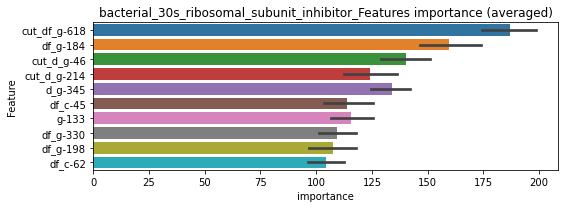

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000643323	valid_1's binary_logloss: 0.0145314


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000801422	valid_1's binary_logloss: 0.0187439
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000540764	valid_1's binary_logloss: 0.0116312


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.0007108	valid_1's binary_logloss: 0.0187678


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.015918574051845633
bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3282
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00129673	valid_1's binary_logloss: 0.0455049
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00115196	valid_1's binary_logloss: 0.0240139
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00173709	valid_1's binary_logloss: 0.0369984
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00203157	valid_1's binary_logloss: 0.0534913


1 / 3, AUC score:0.997, PR-AUC:0.994
y_Threshold: 0.0124266, Threshold: 0.0312871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 647/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0312871, conf_0:0.02190, conf_1:0.04067
Num_p_label: 14.0, Expected: 13.4, Adj_threshold_1: 0.0612871
threshold: 0.0612871, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 647.0/3788, y_label_rate: 0.1708025
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00120227	valid_1's binary_logloss: 0.0279927
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000872178	valid_1's binary_logloss: 0.0264724
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000694109	valid_1's binary_logloss: 0.0183202
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000802067	valid_1's binary_logloss: 0.0287219


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0370858, Threshold: 0.0612871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 643.0/3780
p_label_rate: 0.0090407 Vs.target_rate: 0.00336
Num_p_label: 36.0, Expected: 13.4, Threshold: 0.0612871, conf_0:0.04903, conf_1:0.07354
Num_p_label: 20.0, Expected: 13.4, Adj_threshold_1: 0.0912871
threshold: 0.0912871, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 643.0/3780, y_label_rate: 0.1701058
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000625724	valid_1's binary_logloss: 0.0246281
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000843588	valid_1's binary_logloss: 0.0285723
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.00068765	valid_1's binary_logloss: 0.0172206
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000620926	valid_1's binary_logloss: 0.0211007


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0297883, Threshold: 0.0912871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 640.0/3774
p_label_rate: 0.0047715 Vs.target_rate: 0.00336
Num_p_label: 19.0, Expected: 13.4, Threshold: 0.0912871, conf_0:0.08216, conf_1:0.10042
threshold: 0.0912871, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 640.0/3774, y_label_rate: 0.1695813


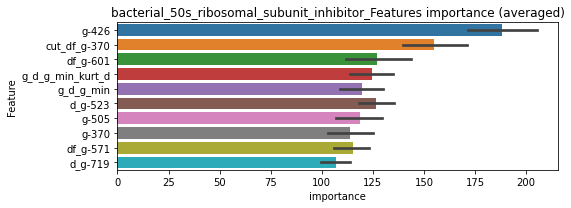

len(train_index) : 2830
len(valid_index) : 944
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.00061781	valid_1's binary_logloss: 0.0182896


len(train_index) : 2830
len(valid_index) : 944
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2831
len(valid_index) : 943
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000955943	valid_1's binary_logloss: 0.0262192
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000695582	valid_1's binary_logloss: 0.0136963


len(train_index) : 2831
len(valid_index) : 943
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.021987348527301012


Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00150002	valid_1's binary_logloss: 0.0297438


bacterial_antifolate, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000438836	valid_1's binary_logloss: 0.00525582
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000430252	valid_1's binary_logloss: 0.009092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000439064	valid_1's binary_logloss: 0.00331118
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000427781	valid_1's binary_logloss: 0.00447511


y_Threshold: 0.0029435, Threshold: 0.0174206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0174206, conf_0:0.01219, conf_1:0.02265
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0474206
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_2: 0.0774206
threshold: 0.0774206, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000422651	valid_1's binary_logloss: 0.00479431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00041947	valid_1's binary_logloss: 0.00976591
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000437364	valid_1's binary_logloss: 0.00349774
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0449207, Threshold: 0.0774206, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00043043	valid_1's binary_logloss: 0.0039809


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0115520 Vs.target_rate: 0.00151
Num_p_label: 46.0, Expected: 6.0, Threshold: 0.0774206, conf_0:0.06194, conf_1:0.09290
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_1: 0.1074206
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_2: 0.1374206
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_3: 0.1674206
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_4: 0.1974206
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_5: 0.2274206
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_6: 0.2574206
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_7: 0.2874206
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_8: 0.3174206
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_9: 0.3474206
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_10: 0.3774206
threshold: 0.3774206, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000422651	valid_1's binary_logloss: 0.00479431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00041947	valid_1's binary_logloss: 0.00976591
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000437364	valid_1's binary_logloss: 0.00349774
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0449207, Threshold: 0.3774206, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00043043	valid_1's binary_logloss: 0.0039809


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00151
Num_p_label: 18.0, Expected: 6.0, Threshold: 0.3774206, conf_0:0.33968, conf_1:0.41516
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.4074206
threshold: 0.4074206, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


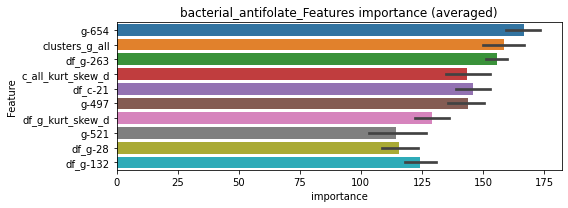

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000426956	valid_1's binary_logloss: 0.00369414


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000409614	valid_1's binary_logloss: 0.00774034
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000410216	valid_1's binary_logloss: 0.00773832


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000444319	valid_1's binary_logloss: 0.00287601


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000432676	valid_1's binary_logloss: 0.00349782


bacterial_antifolate logloss: 0.004455827387015866


mutually exclusive columns: bacterial_cell_wall_synthesis_inhibitor


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 5973
target_rate: 0.0080625 → Adj_target_rate: 0.0073283


selected negative label: 5973


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0547503	valid_1's binary_logloss: 0.108999
[2000]	training's binary_logloss: 0.0273744	valid_1's binary_logloss: 0.0920211
[3000]	training's binary_logloss: 0.0177679	valid_1's binary_logloss: 0.0855628
Early stopping, best iteration is:
[3031]	training's binary_logloss: 0.0175837	valid_1's binary_logloss: 0.0854358
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0536977	valid_1's binary_logloss: 0.119842
[2000]	training's binary_logloss: 0.0267592	valid_1's binary_logloss: 0.102503
Early stopping, best iteration is:
[2740]	training's binary_logloss: 0.0191063	valid_1's binary_logloss: 0.0973592
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0547891	valid_1's binary_logloss: 0.11292
[2000]	training's binary_logloss: 0.0274062	valid_1's binary_logloss: 0.0960783
[3000]	training's binary_logloss

1 / 3, AUC score:0.986, PR-AUC:0.970
y_Threshold: 0.0623431, Threshold: 0.1325665, pos_neg_ratio: 0.8000000
Remove_noisy_data: 362 → Positive_corect_labels: 1133/6805
p_label_rate: 0.0100452 Vs.target_rate: 0.00806
Num_p_label: 40.0, Expected: 32.1, Threshold: 0.1325665, conf_0:0.09280, conf_1:0.17234
threshold: 0.1325665, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1133.0/6805, y_label_rate: 0.1664952
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0434067	valid_1's binary_logloss: 0.082667
[2000]	training's binary_logloss: 0.0216746	valid_1's binary_logloss: 0.0650835
[3000]	training's binary_logloss: 0.0141896	valid_1's binary_logloss: 0.058726
Early stopping, best iteration is:
[3944]	training's binary_logloss: 0.0106755	valid_1's binary_logloss: 0.0556007
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0427519	valid_1's binary_logloss: 0.0877078
[2000]	training's binary_logloss: 0.0213372	valid_1's binary_logloss: 0.0693678
[3000]	training's binary_logloss: 0.0138958	valid_1's binary_logloss: 0.0629086
Early stopping, best iteration is:
[3753]	training's binary_logloss: 0.0110034	valid_1's binary_logloss: 0.0603439
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0429482	valid_1's binary_logloss: 0.0860413
[2000]	training's binary_logl

2 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0787655, Threshold: 0.1325665, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 1090.0/6719
p_label_rate: 0.0143144 Vs.target_rate: 0.00806
Num_p_label: 57.0, Expected: 32.1, Threshold: 0.1325665, conf_0:0.10605, conf_1:0.15908
Num_p_label: 40.0, Expected: 32.1, Adj_threshold_1: 0.1625665
threshold: 0.1625665, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1090.0/6719, y_label_rate: 0.1622265
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.036131	valid_1's binary_logloss: 0.0716445
[2000]	training's binary_logloss: 0.0179927	valid_1's binary_logloss: 0.0549091
[3000]	training's binary_logloss: 0.0118257	valid_1's binary_logloss: 0.0488602
Early stopping, best iteration is:
[3242]	training's binary_logloss: 0.0109176	valid_1's binary_logloss: 0.0480491
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0372138	valid_1's binary_logloss: 0.0697281
[2000]	training's binary_logloss: 0.0185395	valid_1's binary_logloss: 0.0520679
[3000]	training's binary_logloss: 0.0121685	valid_1's binary_logloss: 0.0459649
[4000]	training's binary_logloss: 0.00903774	valid_1's binary_logloss: 0.0429026
Early stopping, best iteration is:
[4337]	training's binary_logloss: 0.00830404	valid_1's binary_logloss: 0.0420007
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_l

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0817651, Threshold: 0.1625665, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 1071.0/6681
p_label_rate: 0.0102963 Vs.target_rate: 0.00806
Num_p_label: 41.0, Expected: 32.1, Threshold: 0.1625665, conf_0:0.14631, conf_1:0.17882
threshold: 0.1625665, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 1071.0/6681, y_label_rate: 0.1603053


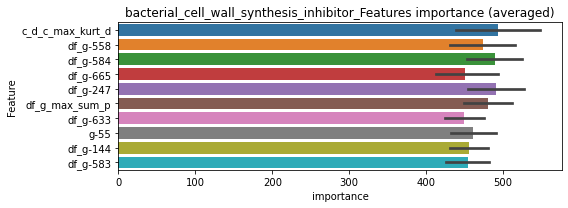

len(train_index) : 5010
len(valid_index) : 1671
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0373794	valid_1's binary_logloss: 0.0632314
[2000]	training's binary_logloss: 0.0189286	valid_1's binary_logloss: 0.0445934
[3000]	training's binary_logloss: 0.0125729	valid_1's binary_logloss: 0.0375474
[4000]	training's binary_logloss: 0.00938017	valid_1's binary_logloss: 0.0338413
[5000]	training's binary_logloss: 0.00749985	valid_1's binary_logloss: 0.0314113
[6000]	training's binary_logloss: 0.0062495	valid_1's binary_logloss: 0.0297902
[7000]	training's binary_logloss: 0.00537073	valid_1's binary_logloss: 0.0285687
[8000]	training's binary_logloss: 0.00470531	valid_1's binary_logloss: 0.0275766
Early stopping, best iteration is:
[8135]	training's binary_logloss: 0.00462794	valid_1's binary_logloss: 0.0274571


len(train_index) : 5011
len(valid_index) : 1670
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0358315	valid_1's binary_logloss: 0.0720004
[2000]	training's binary_logloss: 0.0181444	valid_1's binary_logloss: 0.0538407
[3000]	training's binary_logloss: 0.0120498	valid_1's binary_logloss: 0.0472117
[4000]	training's binary_logloss: 0.00899943	valid_1's binary_logloss: 0.043775
Early stopping, best iteration is:
[4299]	training's binary_logloss: 0.00836132	valid_1's binary_logloss: 0.0430066


len(train_index) : 5011
len(valid_index) : 1670
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0375626	valid_1's binary_logloss: 0.0597219
[2000]	training's binary_logloss: 0.0188956	valid_1's binary_logloss: 0.0419664
[3000]	training's binary_logloss: 0.0125314	valid_1's binary_logloss: 0.035543
[4000]	training's binary_logloss: 0.00937662	valid_1's binary_logloss: 0.0321301
[5000]	training's binary_logloss: 0.00749151	valid_1's binary_logloss: 0.0301291
[6000]	training's binary_logloss: 0.00623689	valid_1's binary_logloss: 0.0287282
Early stopping, best iteration is:
[6353]	training's binary_logloss: 0.00589106	valid_1's binary_logloss: 0.0283748


len(train_index) : 5011
len(valid_index) : 1670
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0369834	valid_1's binary_logloss: 0.0654117
[2000]	training's binary_logloss: 0.018527	valid_1's binary_logloss: 0.0470173
[3000]	training's binary_logloss: 0.0123293	valid_1's binary_logloss: 0.0403495
[4000]	training's binary_logloss: 0.00921817	valid_1's binary_logloss: 0.0366571
[5000]	training's binary_logloss: 0.00736169	valid_1's binary_logloss: 0.0345056
[6000]	training's binary_logloss: 0.00614266	valid_1's binary_logloss: 0.0330237
Early stopping, best iteration is:
[6310]	training's binary_logloss: 0.00584427	valid_1's binary_logloss: 0.0326748


bacterial_cell_wall_synthesis_inhibitor logloss: 0.032877502745265574
bacterial_cell_wall_synthesis_inhibitor is unpredictable(><)!
bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3275
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3275


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0492252	valid_1's binary_logloss: 0.0913011
[2000]	training's binary_logloss: 0.0248175	valid_1's binary_logloss: 0.0681313
[3000]	training's binary_logloss: 0.0163768	valid_1's binary_logloss: 0.0587964
[4000]	training's binary_logloss: 0.012205	valid_1's binary_logloss: 0.0540597
[5000]	training's binary_logloss: 0.00972477	valid_1's binary_logloss: 0.0508328
Early stopping, best iteration is:
[5840]	training's binary_logloss: 0.00830773	valid_1's binary_logloss: 0.0488164
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.04876	valid_1's binary_logloss: 0.0975824
[2000]	training's binary_logloss: 0.0245353	valid_1's binary_logloss: 0.0749343
[3000]	training's binary_logloss: 0.0162183	valid_1's binary_logloss: 0.0661588
[4000]	training's binary_logloss: 0.0120576	valid_1's binary_logloss: 0.0620161
[5000]	training's binary_logloss: 0.0096467	

1 / 3, AUC score:0.995, PR-AUC:0.990
y_Threshold: 0.0417047, Threshold: 0.0882282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 153 → Positive_corect_labels: 644/3777
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0882282, conf_0:0.06176, conf_1:0.11470
Num_p_label: 22.0, Expected: 14.9, Adj_threshold_1: 0.1182282
threshold: 0.1182282, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 644.0/3777, y_label_rate: 0.1705057
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0440868	valid_1's binary_logloss: 0.0949702
[2000]	training's binary_logloss: 0.0221491	valid_1's binary_logloss: 0.0737536
[3000]	training's binary_logloss: 0.0146707	valid_1's binary_logloss: 0.0660965
[4000]	training's binary_logloss: 0.0109684	valid_1's binary_logloss: 0.062133
Early stopping, best iteration is:
[4342]	training's binary_logloss: 0.0101017	valid_1's binary_logloss: 0.0610233
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0446907	valid_1's binary_logloss: 0.0833833
[2000]	training's binary_logloss: 0.0223407	valid_1's binary_logloss: 0.0619263
[3000]	training's binary_logloss: 0.0147567	valid_1's binary_logloss: 0.0540414
[4000]	training's binary_logloss: 0.0110136	valid_1's binary_logloss: 0.0499977
Early stopping, best iteration is:
[4159]	training's binary_logloss: 0.0105862	valid_1's binary_logloss: 0.0495452
Training 

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0784984, Threshold: 0.1182282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 633.0/3755
p_label_rate: 0.0092918 Vs.target_rate: 0.00374
Num_p_label: 37.0, Expected: 14.9, Threshold: 0.1182282, conf_0:0.09458, conf_1:0.14187
Num_p_label: 25.0, Expected: 14.9, Adj_threshold_1: 0.1482282
Num_p_label: 19.0, Expected: 14.9, Adj_threshold_2: 0.1782282
threshold: 0.1782282, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 633.0/3755, y_label_rate: 0.1685752
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0426792	valid_1's binary_logloss: 0.0880417
[2000]	training's binary_logloss: 0.0212909	valid_1's binary_logloss: 0.0654394
[3000]	training's binary_logloss: 0.0141092	valid_1's binary_logloss: 0.0572611
[4000]	training's binary_logloss: 0.0105428	valid_1's binary_logloss: 0.0531134
Early stopping, best iteration is:
[4164]	training's binary_logloss: 0.0101244	valid_1's binary_logloss: 0.0525842
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.042814	valid_1's binary_logloss: 0.0834901
[2000]	training's binary_logloss: 0.0213648	valid_1's binary_logloss: 0.0613033
[3000]	training's binary_logloss: 0.0141501	valid_1's binary_logloss: 0.0529411
[4000]	training's binary_logloss: 0.0105503	valid_1's binary_logloss: 0.0487197
Early stopping, best iteration is:
[4155]	training's binary_logloss: 0.0101474	valid_1's binary_logloss: 0.0481576
Training 

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0758255, Threshold: 0.1782282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 625.0/3739
p_label_rate: 0.0045203 Vs.target_rate: 0.00374
Num_p_label: 18.0, Expected: 14.9, Threshold: 0.1782282, conf_0:0.16041, conf_1:0.19605
threshold: 0.1782282, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 625.0/3739, y_label_rate: 0.1671570


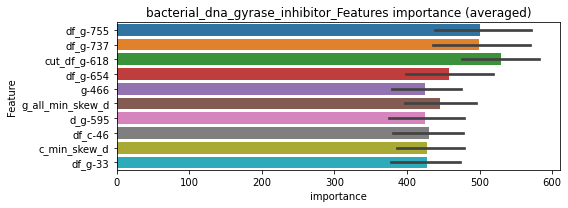

len(train_index) : 2804
len(valid_index) : 935
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.04471	valid_1's binary_logloss: 0.090777
[2000]	training's binary_logloss: 0.0228002	valid_1's binary_logloss: 0.0663371
[3000]	training's binary_logloss: 0.0151811	valid_1's binary_logloss: 0.0563169
[4000]	training's binary_logloss: 0.0113694	valid_1's binary_logloss: 0.0508709
[5000]	training's binary_logloss: 0.00912072	valid_1's binary_logloss: 0.0476394
[6000]	training's binary_logloss: 0.00760618	valid_1's binary_logloss: 0.0451686
[7000]	training's binary_logloss: 0.00654907	valid_1's binary_logloss: 0.0435806
[8000]	training's binary_logloss: 0.0057442	valid_1's binary_logloss: 0.0420717
[9000]	training's binary_logloss: 0.00512632	valid_1's binary_logloss: 0.0409067
Early stopping, best iteration is:
[9304]	training's binary_logloss: 0.00496465	valid_1's binary_logloss: 0.0405989


len(train_index) : 2804
len(valid_index) : 935
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0459105	valid_1's binary_logloss: 0.0752933
[2000]	training's binary_logloss: 0.023317	valid_1's binary_logloss: 0.0520596
[3000]	training's binary_logloss: 0.0155144	valid_1's binary_logloss: 0.0429539
[4000]	training's binary_logloss: 0.0116071	valid_1's binary_logloss: 0.038025
[5000]	training's binary_logloss: 0.00930013	valid_1's binary_logloss: 0.0349638
[6000]	training's binary_logloss: 0.00776091	valid_1's binary_logloss: 0.0326675
[7000]	training's binary_logloss: 0.00668221	valid_1's binary_logloss: 0.0310965
[8000]	training's binary_logloss: 0.00586009	valid_1's binary_logloss: 0.0297762
[9000]	training's binary_logloss: 0.0052306	valid_1's binary_logloss: 0.0287914
[10000]	training's binary_logloss: 0.00473264	valid_1's binary_logloss: 0.0280129
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00473264	valid_1's binary_logloss: 0.0280129


len(train_index) : 2804
len(valid_index) : 935
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.046197	valid_1's binary_logloss: 0.0797705
[2000]	training's binary_logloss: 0.0234417	valid_1's binary_logloss: 0.0554741
[3000]	training's binary_logloss: 0.0155893	valid_1's binary_logloss: 0.0467025
[4000]	training's binary_logloss: 0.0116843	valid_1's binary_logloss: 0.0420074
[5000]	training's binary_logloss: 0.00935624	valid_1's binary_logloss: 0.0389857
[6000]	training's binary_logloss: 0.00781501	valid_1's binary_logloss: 0.0369387
[7000]	training's binary_logloss: 0.00672433	valid_1's binary_logloss: 0.0354504
Early stopping, best iteration is:
[7969]	training's binary_logloss: 0.0059204	valid_1's binary_logloss: 0.0341322


len(train_index) : 2805
len(valid_index) : 934
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0457831	valid_1's binary_logloss: 0.078381
[2000]	training's binary_logloss: 0.0233415	valid_1's binary_logloss: 0.0556105
[3000]	training's binary_logloss: 0.015451	valid_1's binary_logloss: 0.0464119
[4000]	training's binary_logloss: 0.0115915	valid_1's binary_logloss: 0.0417349
Early stopping, best iteration is:
[4824]	training's binary_logloss: 0.00962181	valid_1's binary_logloss: 0.0392724


bacterial_dna_gyrase_inhibitor logloss: 0.03550311444167491
bacterial_dna_gyrase_inhibitor is unpredictable(><)!


mutually exclusive columns: bacterial_dna_inhibitor


bacterial_dna_inhibitor, len(trt): 115, len(othr): 2020
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 2020


N_features:311
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0859337	valid_1's binary_logloss: 0.213364
[2000]	training's binary_logloss: 0.044272	valid_1's binary_logloss: 0.187242
Early stopping, best iteration is:
[2106]	training's binary_logloss: 0.0421217	valid_1's binary_logloss: 0.186091
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.091436	valid_1's binary_logloss: 0.173626
[2000]	training's binary_logloss: 0.047115	valid_1's binary_logloss: 0.136335
[3000]	training's binary_logloss: 0.0311092	valid_1's binary_logloss: 0.121631
[4000]	training's binary_logloss: 0.0230694	valid_1's binary_logloss: 0.113605
Early stopping, best iteration is:
[4294]	training's binary_logloss: 0.0214335	valid_1's binary_logloss: 0.111904
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0918163	valid_1's binary_logloss: 0.176562
[2000]	training's binary_logloss: 0.047

1 / 3, AUC score:0.968, PR-AUC:0.938
y_Threshold: 0.0866677, Threshold: 0.1552507, pos_neg_ratio: 0.8000000
Remove_noisy_data: 161 → Positive_corect_labels: 364/2263
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.1552507, conf_0:0.10868, conf_1:0.20183
Num_p_label: 17.0, Expected: 19.2, Adj_threshold_1: 0.1852507
threshold: 0.1852507, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 364.0/2263, y_label_rate: 0.1608484
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0714164	valid_1's binary_logloss: 0.172403
[2000]	training's binary_logloss: 0.0362156	valid_1's binary_logloss: 0.140199
[3000]	training's binary_logloss: 0.0239738	valid_1's binary_logloss: 0.127221
Early stopping, best iteration is:
[3012]	training's binary_logloss: 0.0238688	valid_1's binary_logloss: 0.127127
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0749262	valid_1's binary_logloss: 0.136509
[2000]	training's binary_logloss: 0.0379644	valid_1's binary_logloss: 0.102822
[3000]	training's binary_logloss: 0.0251828	valid_1's binary_logloss: 0.0909448
[4000]	training's binary_logloss: 0.0187319	valid_1's binary_logloss: 0.0847381
Early stopping, best iteration is:
[4164]	training's binary_logloss: 0.0179708	valid_1's binary_logloss: 0.0839633
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss:

2 / 3, AUC score:0.995, PR-AUC:0.986
y_Threshold: 0.1089069, Threshold: 0.1852507, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 346.0/2227
p_label_rate: 0.0055249 Vs.target_rate: 0.00483
Num_p_label: 22.0, Expected: 19.2, Threshold: 0.1852507, conf_0:0.14820, conf_1:0.22230
threshold: 0.1852507, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 346.0/2227, y_label_rate: 0.1553660
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0678408	valid_1's binary_logloss: 0.157091
[2000]	training's binary_logloss: 0.0345946	valid_1's binary_logloss: 0.123955
[3000]	training's binary_logloss: 0.0229429	valid_1's binary_logloss: 0.111956
[4000]	training's binary_logloss: 0.0171095	valid_1's binary_logloss: 0.105424
Early stopping, best iteration is:
[4152]	training's binary_logloss: 0.016479	valid_1's binary_logloss: 0.104733
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0672662	valid_1's binary_logloss: 0.155876
[2000]	training's binary_logloss: 0.034184	valid_1's binary_logloss: 0.129272
[3000]	training's binary_logloss: 0.0226393	valid_1's binary_logloss: 0.11956
Early stopping, best iteration is:
[3568]	training's binary_logloss: 0.018916	valid_1's binary_logloss: 0.116319
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0704

3 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0914996, Threshold: 0.1852507, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 336.0/2207
p_label_rate: 0.0040181 Vs.target_rate: 0.00483
Num_p_label: 16.0, Expected: 19.2, Threshold: 0.1852507, conf_0:0.16673, conf_1:0.20378
threshold: 0.1852507, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 336.0/2207, y_label_rate: 0.1522429


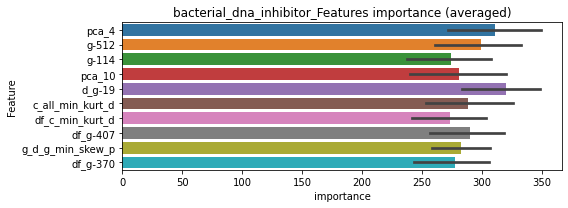

len(train_index) : 1655
len(valid_index) : 552
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0693195	valid_1's binary_logloss: 0.161609
[2000]	training's binary_logloss: 0.0357068	valid_1's binary_logloss: 0.127441
[3000]	training's binary_logloss: 0.0237207	valid_1's binary_logloss: 0.113804
Early stopping, best iteration is:
[3786]	training's binary_logloss: 0.0187647	valid_1's binary_logloss: 0.108303


len(train_index) : 1655
len(valid_index) : 552
================================= fold 2/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0704992	valid_1's binary_logloss: 0.154963
[2000]	training's binary_logloss: 0.0361346	valid_1's binary_logloss: 0.125122
[3000]	training's binary_logloss: 0.0241057	valid_1's binary_logloss: 0.113892
[4000]	training's binary_logloss: 0.0180427	valid_1's binary_logloss: 0.108528
Early stopping, best iteration is:
[4354]	training's binary_logloss: 0.0165464	valid_1's binary_logloss: 0.106943


len(train_index) : 1655
len(valid_index) : 552
================================= fold 3/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0720103	valid_1's binary_logloss: 0.130868
[2000]	training's binary_logloss: 0.0370162	valid_1's binary_logloss: 0.099362
[3000]	training's binary_logloss: 0.0246355	valid_1's binary_logloss: 0.0881328
[4000]	training's binary_logloss: 0.0184798	valid_1's binary_logloss: 0.0826781
Early stopping, best iteration is:
[4542]	training's binary_logloss: 0.0162744	valid_1's binary_logloss: 0.0808331


len(train_index) : 1656
len(valid_index) : 551
================================= fold 4/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0708277	valid_1's binary_logloss: 0.136857
[2000]	training's binary_logloss: 0.0362754	valid_1's binary_logloss: 0.102625
[3000]	training's binary_logloss: 0.0241684	valid_1's binary_logloss: 0.0895805
[4000]	training's binary_logloss: 0.0181003	valid_1's binary_logloss: 0.0825447
[5000]	training's binary_logloss: 0.0144811	valid_1's binary_logloss: 0.0781267
[6000]	training's binary_logloss: 0.012063	valid_1's binary_logloss: 0.0750879
[7000]	training's binary_logloss: 0.0103631	valid_1's binary_logloss: 0.0728455
Early stopping, best iteration is:
[7226]	training's binary_logloss: 0.0100424	valid_1's binary_logloss: 0.0723328


bacterial_dna_inhibitor logloss: 0.09211191082002537
bacterial_dna_inhibitor is unpredictable(><)!
bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000289556	valid_1's binary_logloss: 0.00112774
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000284769	valid_1's binary_logloss: 0.00291237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000296577	valid_1's binary_logloss: 0.000529757
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014733, Threshold: 0.0037130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0037130, conf_0:0.00260, conf_1:0.00483
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0337130


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000299556	valid_1's binary_logloss: 0.00234247


threshold: 0.0337130, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00027875	valid_1's binary_logloss: 0.000927874
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000280927	valid_1's binary_logloss: 0.00325448
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000282263	valid_1's binary_logloss: 0.00054641
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0725609, Threshold: 0.0337130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0337130, conf_0:0.02697, conf_1:0.04046
threshold: 0.0337130, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000284229	valid_1's binary_logloss: 0.00282289


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00027875	valid_1's binary_logloss: 0.000927874
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000280927	valid_1's binary_logloss: 0.00325448
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000282263	valid_1's binary_logloss: 0.00054641
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0725609, Threshold: 0.0337130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0337130, conf_0:0.03034, conf_1:0.03708
threshold: 0.0337130, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000284229	valid_1's binary_logloss: 0.00282289


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


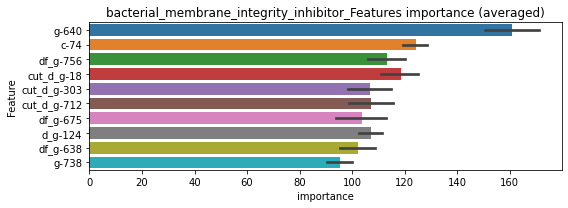

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000284277	valid_1's binary_logloss: 0.000791884


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000293563	valid_1's binary_logloss: 0.00283528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000286032	valid_1's binary_logloss: 0.000558193


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000278579	valid_1's binary_logloss: 0.00227406


bacterial_membrane_integrity_inhibitor logloss: 0.00161494308152057
bcl_inhibitor, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000408752	valid_1's binary_logloss: 0.00683347
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000397346	valid_1's binary_logloss: 0.0103882
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000403368	valid_1's binary_logloss: 0.00116731
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026365, Threshold: 0.0122576, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000402611	valid_1's binary_logloss: 0.00399045


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0122576, conf_0:0.00858, conf_1:0.01593
Num_p_label: 8.0, Expected: 5.2, Adj_threshold_1: 0.0422576
threshold: 0.0422576, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000385978	valid_1's binary_logloss: 0.00679559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000422315	valid_1's binary_logloss: 0.00956877
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000386704	valid_1's binary_logloss: 0.000901964
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000374152	valid_1's binary_logloss: 0.00509628


y_Threshold: 0.0199874, Threshold: 0.0422576, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0080362 Vs.target_rate: 0.00130
Num_p_label: 32.0, Expected: 5.2, Threshold: 0.0422576, conf_0:0.03381, conf_1:0.05071
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_1: 0.0722576
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_2: 0.1022576
threshold: 0.1022576, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000389009	valid_1's binary_logloss: 0.0077523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000383834	valid_1's binary_logloss: 0.00234204
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000384846	valid_1's binary_logloss: 0.00187084
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000375328	valid_1's binary_logloss: 0.00146123


y_Threshold: 0.0371260, Threshold: 0.1022576, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0032647 Vs.target_rate: 0.00130
Num_p_label: 13.0, Expected: 5.2, Threshold: 0.1022576, conf_0:0.09203, conf_1:0.11248
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_1: 0.1322576
threshold: 0.1322576, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


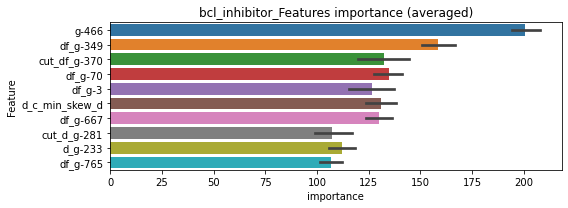

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000374556	valid_1's binary_logloss: 0.00468929


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000386648	valid_1's binary_logloss: 0.00307346


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000379521	valid_1's binary_logloss: 0.00244199


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000387431	valid_1's binary_logloss: 0.00159192


bcl_inhibitor logloss: 0.002949521838362011
bcr-abl_inhibitor, len(trt): 38, len(othr): 3281
target_rate: 0.0015957 → Adj_target_rate: 0.0018493


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000443812	valid_1's binary_logloss: 0.010414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000444016	valid_1's binary_logloss: 0.00490266
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000452303	valid_1's binary_logloss: 0.00119795
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000461322	valid_1's binary_logloss: 0.00714455


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029941, Threshold: 0.0555999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, Expected: 6.4, Threshold: 0.0555999, conf_0:0.03892, conf_1:0.07228
Num_p_label: 33.0, Expected: 6.4, Adj_threshold_1: 0.0855999
Num_p_label: 23.0, Expected: 6.4, Adj_threshold_2: 0.1155999
Num_p_label: 16.0, Expected: 6.4, Adj_threshold_3: 0.1455999
Num_p_label: 14.0, Expected: 6.4, Adj_threshold_4: 0.1755999
threshold: 0.1755999, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000427973	valid_1's binary_logloss: 0.0105043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000436183	valid_1's binary_logloss: 0.00448414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000438151	valid_1's binary_logloss: 0.00113687
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000427603	valid_1's binary_logloss: 0.00742258


y_Threshold: 0.0291257, Threshold: 0.1755999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0140633 Vs.target_rate: 0.00160
Num_p_label: 56.0, Expected: 6.4, Threshold: 0.1755999, conf_0:0.14048, conf_1:0.21072
Num_p_label: 52.0, Expected: 6.4, Adj_threshold_1: 0.2055999
Num_p_label: 51.0, Expected: 6.4, Adj_threshold_2: 0.2355999
Num_p_label: 48.0, Expected: 6.4, Adj_threshold_3: 0.2655999
Num_p_label: 44.0, Expected: 6.4, Adj_threshold_4: 0.2955999
Num_p_label: 41.0, Expected: 6.4, Adj_threshold_5: 0.3255999
Num_p_label: 39.0, Expected: 6.4, Adj_threshold_6: 0.3555999
Num_p_label: 36.0, Expected: 6.4, Adj_threshold_7: 0.3855999
Num_p_label: 32.0, Expected: 6.4, Adj_threshold_8: 0.4155999
Num_p_label: 30.0, Expected: 6.4, Adj_threshold_9: 0.4455999
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_10: 0.4755999
threshold: 0.4755999, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 655.0/3803, y_label_rate: 0.1722

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000424348	valid_1's binary_logloss: 0.00365446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000575075	valid_1's binary_logloss: 0.00919752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000430526	valid_1's binary_logloss: 0.008626
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0583727, Threshold: 0.4755999, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000445661	valid_1's binary_logloss: 0.00336214


Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0065294 Vs.target_rate: 0.00160
Num_p_label: 26.0, Expected: 6.4, Threshold: 0.4755999, conf_0:0.42804, conf_1:0.52316
Num_p_label: 26.0, Expected: 6.4, Adj_threshold_1: 0.5055999
Num_p_label: 24.0, Expected: 6.4, Adj_threshold_2: 0.5355999
Num_p_label: 21.0, Expected: 6.4, Adj_threshold_3: 0.5655999
Num_p_label: 16.0, Expected: 6.4, Adj_threshold_4: 0.5955999
Num_p_label: 13.0, Expected: 6.4, Adj_threshold_5: 0.6255999
threshold: 0.6255999, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


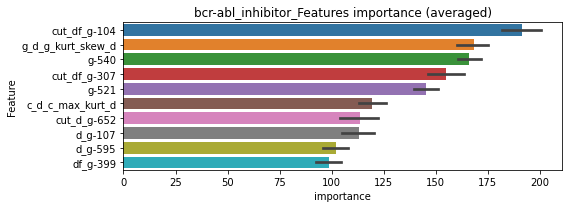

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000429162	valid_1's binary_logloss: 0.00383215


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000423943	valid_1's binary_logloss: 0.00288738


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000434974	valid_1's binary_logloss: 0.00554471


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.00043083	valid_1's binary_logloss: 0.00175324


bcr-abl_inhibitor logloss: 0.003506193971089375
benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3278
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3278


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00115052	valid_1's binary_logloss: 0.0293143
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00079441	valid_1's binary_logloss: 0.0323256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000570989	valid_1's binary_logloss: 0.010798
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.00063498	valid_1's binary_logloss: 0.0244338


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0072282, Threshold: 0.0170890, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.0170890, conf_0:0.01196, conf_1:0.02222
Num_p_label: 10.0, Expected: 11.2, Adj_threshold_1: 0.0470890
threshold: 0.0470890, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000553914	valid_1's binary_logloss: 0.0275817
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000548845	valid_1's binary_logloss: 0.024284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000562238	valid_1's binary_logloss: 0.00865633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.00054903	valid_1's binary_logloss: 0.0121587


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0303102, Threshold: 0.0470890, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0045203 Vs.target_rate: 0.00281
Num_p_label: 18.0, Expected: 11.2, Threshold: 0.0470890, conf_0:0.03767, conf_1:0.05651
Num_p_label: 13.0, Expected: 11.2, Adj_threshold_1: 0.0770890
threshold: 0.0770890, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000720332	valid_1's binary_logloss: 0.0244905
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000573312	valid_1's binary_logloss: 0.0193041
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.0006189	valid_1's binary_logloss: 0.023512
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.00058112	valid_1's binary_logloss: 0.0101057


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238261, Threshold: 0.0770890, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3793
p_label_rate: 0.0027624 Vs.target_rate: 0.00281
Num_p_label: 11.0, Expected: 11.2, Threshold: 0.0770890, conf_0:0.06938, conf_1:0.08480
threshold: 0.0770890, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 651.0/3793, y_label_rate: 0.1716320


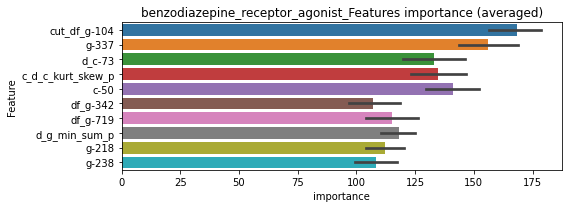

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000585705	valid_1's binary_logloss: 0.023626


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000858072	valid_1's binary_logloss: 0.0173899
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.00062456	valid_1's binary_logloss: 0.0135065


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000630817	valid_1's binary_logloss: 0.0140841


benzodiazepine_receptor_agonist logloss: 0.017153323198337934
beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3287


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000356796	valid_1's binary_logloss: 0.00141694
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000357528	valid_1's binary_logloss: 0.00417412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000360692	valid_1's binary_logloss: 0.0010827
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017754, Threshold: 0.0087557, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000357027	valid_1's binary_logloss: 0.00524421


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0087557, conf_0:0.00613, conf_1:0.01138
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0387557
threshold: 0.0387557, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000357438	valid_1's binary_logloss: 0.00165074
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000349582	valid_1's binary_logloss: 0.00444065
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000362398	valid_1's binary_logloss: 0.000979664
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0157944, Threshold: 0.0387557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00101
Num_p_label: 20.0, Expected: 4.0, Threshold: 0.0387557, conf_0:0.03100, conf_1:0.04651
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_1: 0.0687557
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_2: 0.0987557


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00036312	valid_1's binary_logloss: 0.00621808


threshold: 0.0987557, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000357438	valid_1's binary_logloss: 0.00165074
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000349582	valid_1's binary_logloss: 0.00444065
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000362398	valid_1's binary_logloss: 0.000979664
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158098, Threshold: 0.0987557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, Expected: 4.0, Threshold: 0.0987557, conf_0:0.08888, conf_1:0.10863


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00036312	valid_1's binary_logloss: 0.00621808


threshold: 0.0987557, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


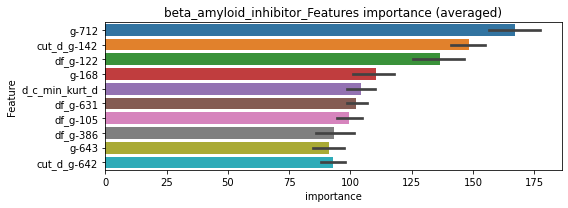

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000366461	valid_1's binary_logloss: 0.00153428


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000366449	valid_1's binary_logloss: 0.00383463


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000368453	valid_1's binary_logloss: 0.00120497


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds


beta_amyloid_inhibitor logloss: 0.002885302555081801


Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000397391	valid_1's binary_logloss: 0.00496733


bromodomain_inhibitor, len(trt): 68, len(othr): 3280
target_rate: 0.0028555 → Adj_target_rate: 0.0030327


selected negative label: 3280


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000749385	valid_1's binary_logloss: 0.0340935
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000642748	valid_1's binary_logloss: 0.0299681
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.00060665	valid_1's binary_logloss: 0.00723085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000640489	valid_1's binary_logloss: 0.017084


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0057754, Threshold: 0.0152204, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00286
Num_p_label: 40.0, Expected: 11.4, Threshold: 0.0152204, conf_0:0.01065, conf_1:0.01979
Num_p_label: 6.0, Expected: 11.4, Adj_threshold_1: 0.0452204
threshold: 0.0452204, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00072303	valid_1's binary_logloss: 0.027782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.00131079	valid_1's binary_logloss: 0.0273219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000610584	valid_1's binary_logloss: 0.00544609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000605814	valid_1's binary_logloss: 0.0157661


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0318074, Threshold: 0.0452204, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0067805 Vs.target_rate: 0.00286
Num_p_label: 27.0, Expected: 11.4, Threshold: 0.0452204, conf_0:0.03618, conf_1:0.05426
Num_p_label: 10.0, Expected: 11.4, Adj_threshold_1: 0.0752204
threshold: 0.0752204, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00085341	valid_1's binary_logloss: 0.0283523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000732182	valid_1's binary_logloss: 0.0274384
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000599869	valid_1's binary_logloss: 0.0127021
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000614981	valid_1's binary_logloss: 0.0210838


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211866, Threshold: 0.0752204, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0030136 Vs.target_rate: 0.00286
Num_p_label: 12.0, Expected: 11.4, Threshold: 0.0752204, conf_0:0.06770, conf_1:0.08274
threshold: 0.0752204, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


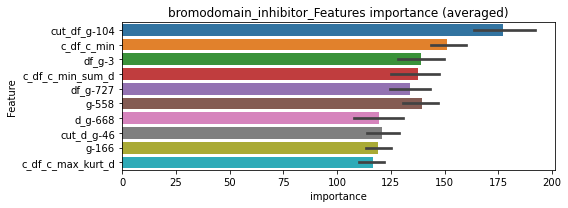

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000787303	valid_1's binary_logloss: 0.0202334


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 bromodomain_inhibitor=================================


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00145147	valid_1's binary_logloss: 0.026782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000633341	valid_1's binary_logloss: 0.0161413


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000727832	valid_1's binary_logloss: 0.0168848


bromodomain_inhibitor logloss: 0.02001222953492085
btk_inhibitor, len(trt): 29, len(othr): 3284
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3284


N_features:308
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000399742	valid_1's binary_logloss: 0.00770931
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000399078	valid_1's binary_logloss: 0.00376342
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000392236	valid_1's binary_logloss: 0.00190306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000383595	valid_1's binary_logloss: 0.0019679


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029157, Threshold: 0.0223795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0223795, conf_0:0.01567, conf_1:0.02909
Num_p_label: 14.0, Expected: 4.8, Adj_threshold_1: 0.0523795
Num_p_label: 8.0, Expected: 4.8, Adj_threshold_2: 0.0823795
threshold: 0.0823795, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000391009	valid_1's binary_logloss: 0.00742085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000399998	valid_1's binary_logloss: 0.00320929
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000374739	valid_1's binary_logloss: 0.001154
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000382639	valid_1's binary_logloss: 0.00242642


y_Threshold: 0.0178647, Threshold: 0.0823795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0050226 Vs.target_rate: 0.00122
Num_p_label: 20.0, Expected: 4.8, Threshold: 0.0823795, conf_0:0.06590, conf_1:0.09886
Num_p_label: 15.0, Expected: 4.8, Adj_threshold_1: 0.1123795
Num_p_label: 11.0, Expected: 4.8, Adj_threshold_2: 0.1423795
threshold: 0.1423795, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000391009	valid_1's binary_logloss: 0.00742085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000399998	valid_1's binary_logloss: 0.00320929
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000374739	valid_1's binary_logloss: 0.001154
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0178647, Threshold: 0.1423795, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000382639	valid_1's binary_logloss: 0.00242642


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00122
Num_p_label: 11.0, Expected: 4.8, Threshold: 0.1423795, conf_0:0.12814, conf_1:0.15662
threshold: 0.1423795, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


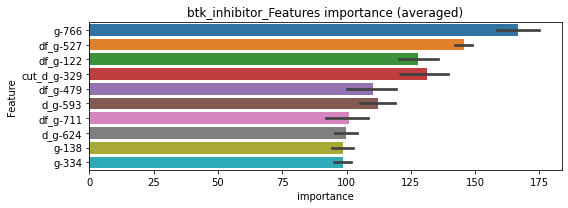

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000402805	valid_1's binary_logloss: 0.00624488


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000405982	valid_1's binary_logloss: 0.00323057


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00038112	valid_1's binary_logloss: 0.00122481
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000381153	valid_1's binary_logloss: 0.00122473


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000376638	valid_1's binary_logloss: 0.00189733
Early stopping, best iteration is:
[1092]	training's binary_logloss: 0.000371568	valid_1's binary_logloss: 0.0018825


btk_inhibitor logloss: 0.0031457551216858655
calcineurin_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000247461	valid_1's binary_logloss: 0.000948648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000253546	valid_1's binary_logloss: 0.00125534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000252139	valid_1's binary_logloss: 0.000373391
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011931, Threshold: 0.0145597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0145597, conf_0:0.01019, conf_1:0.01893
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0445597
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.0745597
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.1045597


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000247754	valid_1's binary_logloss: 0.000913194


threshold: 0.1045597, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000233125	valid_1's binary_logloss: 0.00051305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000232705	valid_1's binary_logloss: 0.00118522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00023197	valid_1's binary_logloss: 0.000317755
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1172744, Threshold: 0.1045597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0113009 Vs.target_rate: 0.00050
Num_p_label: 45.0, Expected: 2.0, Threshold: 0.1045597, conf_0:0.08365, conf_1:0.12547
Num_p_label: 41.0, Expected: 2.0, Adj_threshold_1: 0.1345597
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_2: 0.1645597
Num_p_label: 39.0, Expected: 2.0, Adj_threshold_3: 0.1945597
Num_p_label: 35.0, Expected: 2.0, Adj_threshold_4: 0.2245597
Num_p_label: 33.0, Expected: 2.0, Adj_threshold_5: 0.2545597
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_6: 0.2845597
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_7: 0.3145597
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_8: 0.3445597
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_9: 0.3745597


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000232411	valid_1's binary_logloss: 0.000707291


Num_p_label: 25.0, Expected: 2.0, Adj_threshold_10: 0.4045597
threshold: 0.4045597, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000233125	valid_1's binary_logloss: 0.00051305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000232705	valid_1's binary_logloss: 0.00118522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00023197	valid_1's binary_logloss: 0.000317755
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1172744, Threshold: 0.4045597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00050
Num_p_label: 25.0, Expected: 2.0, Threshold: 0.4045597, conf_0:0.36410, conf_1:0.44502
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_1: 0.4345597
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_2: 0.4645597
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_3: 0.4945597
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_4: 0.5245597
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_5: 0.5545597
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_6: 0.5845597
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_7: 0.6145597
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_8: 0.6445597
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_9: 0.6745597


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000232411	valid_1's binary_logloss: 0.000707291


Num_p_label: 6.0, Expected: 2.0, Adj_threshold_10: 0.7045597
threshold: 0.7045597, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


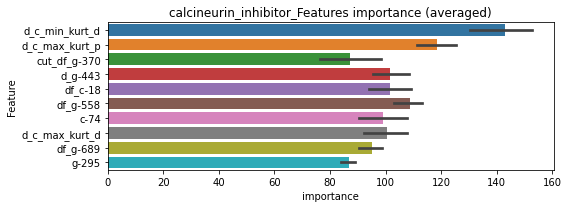

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000234553	valid_1's binary_logloss: 0.000427552
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000235955	valid_1's binary_logloss: 0.000970477
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000239188	valid_1's binary_logloss: 0.000367106
Training until validation scores don't improve for 30 rounds


calcineurin_inhibitor logloss: 0.0005818330846156365


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000238854	valid_1's binary_logloss: 0.000562197
mutually exclusive columns: calcium_channel_blocker


calcium_channel_blocker, len(trt): 281, len(othr): 6395
target_rate: 0.0117998 → Adj_target_rate: 0.0101297


selected negative label: 6395


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0674179	valid_1's binary_logloss: 0.151583
[2000]	training's binary_logloss: 0.0340917	valid_1's binary_logloss: 0.137566
Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.0310342	valid_1's binary_logloss: 0.136312
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.068023	valid_1's binary_logloss: 0.151728
Early stopping, best iteration is:
[1842]	training's binary_logloss: 0.0375454	valid_1's binary_logloss: 0.138114
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0690959	valid_1's binary_logloss: 0.141218
[2000]	training's binary_logloss: 0.0351079	valid_1's binary_logloss: 0.124272
Early stopping, best iteration is:
[2661]	training's binary_logloss: 0.0258211	valid_1's binary_logloss: 0.119841
Training until validation scores don't improve for 30 rounds
[1000]	training's bi

1 / 3, AUC score:0.966, PR-AUC:0.935
y_Threshold: 0.0781979, Threshold: 0.1466676, pos_neg_ratio: 0.8000000
Remove_noisy_data: 522 → Positive_corect_labels: 1146/7152
p_label_rate: 0.0100452 Vs.target_rate: 0.01180
Num_p_label: 40.0, Expected: 47.0, Threshold: 0.1466676, conf_0:0.10267, conf_1:0.19067
threshold: 0.1466676, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1146.0/7152, y_label_rate: 0.1602349
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0467832	valid_1's binary_logloss: 0.0949725
[2000]	training's binary_logloss: 0.0237314	valid_1's binary_logloss: 0.0811684
Early stopping, best iteration is:
[2889]	training's binary_logloss: 0.016164	valid_1's binary_logloss: 0.0771358
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0457886	valid_1's binary_logloss: 0.10412
Early stopping, best iteration is:
[1461]	training's binary_logloss: 0.0317629	valid_1's binary_logloss: 0.0947444
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.046834	valid_1's binary_logloss: 0.0949319
[2000]	training's binary_logloss: 0.0235538	valid_1's binary_logloss: 0.0801191
Early stopping, best iteration is:
[2809]	training's binary_logloss: 0.016507	valid_1's binary_logloss: 0.0758532
Training until validation scores don't improve for 30 rounds
[1000]	training'

2 / 3, AUC score:0.995, PR-AUC:0.985
y_Threshold: 0.0882622, Threshold: 0.1466676, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 1079.0/7018
p_label_rate: 0.0120542 Vs.target_rate: 0.01180
Num_p_label: 48.0, Expected: 47.0, Threshold: 0.1466676, conf_0:0.11733, conf_1:0.17600
threshold: 0.1466676, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 1079.0/7018, y_label_rate: 0.1537475
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0382756	valid_1's binary_logloss: 0.0626824
[2000]	training's binary_logloss: 0.0193246	valid_1's binary_logloss: 0.0473764
[3000]	training's binary_logloss: 0.0127188	valid_1's binary_logloss: 0.0413237
Early stopping, best iteration is:
[3955]	training's binary_logloss: 0.00957514	valid_1's binary_logloss: 0.0383769
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0366865	valid_1's binary_logloss: 0.0739398
[2000]	training's binary_logloss: 0.0184013	valid_1's binary_logloss: 0.0607302
Early stopping, best iteration is:
[2507]	training's binary_logloss: 0.0146354	valid_1's binary_logloss: 0.0579974
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0366231	valid_1's binary_logloss: 0.0760329
[2000]	training's binary_logloss: 0.0183436	valid_1's binary_logloss: 0.0619311
[3000]	training's binary_l

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0783960, Threshold: 0.1466676, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 1047.0/6954
p_label_rate: 0.0077850 Vs.target_rate: 0.01180
Num_p_label: 31.0, Expected: 47.0, Threshold: 0.1466676, conf_0:0.13200, conf_1:0.16133
threshold: 0.1466676, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 1047.0/6954, y_label_rate: 0.1505608


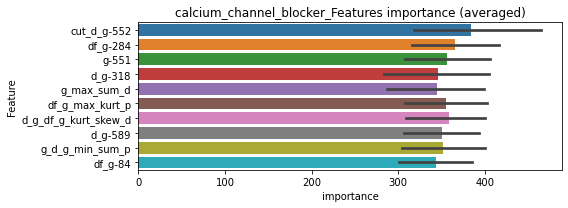

len(train_index) : 5215
len(valid_index) : 1739
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0353949	valid_1's binary_logloss: 0.0632009
[2000]	training's binary_logloss: 0.0181836	valid_1's binary_logloss: 0.0472137
[3000]	training's binary_logloss: 0.0121417	valid_1's binary_logloss: 0.0412949
[4000]	training's binary_logloss: 0.00909465	valid_1's binary_logloss: 0.0380769
[5000]	training's binary_logloss: 0.00725838	valid_1's binary_logloss: 0.0361349
Early stopping, best iteration is:
[5761]	training's binary_logloss: 0.00629826	valid_1's binary_logloss: 0.034972


len(train_index) : 5215
len(valid_index) : 1739
================================= fold 2/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0359334	valid_1's binary_logloss: 0.0613957
[2000]	training's binary_logloss: 0.0183114	valid_1's binary_logloss: 0.0454582
[3000]	training's binary_logloss: 0.0121856	valid_1's binary_logloss: 0.0398709
[4000]	training's binary_logloss: 0.00909858	valid_1's binary_logloss: 0.0370617
Early stopping, best iteration is:
[4102]	training's binary_logloss: 0.00887482	valid_1's binary_logloss: 0.0368349


len(train_index) : 5216
len(valid_index) : 1738
================================= fold 3/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0351377	valid_1's binary_logloss: 0.0666072
[2000]	training's binary_logloss: 0.0178211	valid_1's binary_logloss: 0.0500884
Early stopping, best iteration is:
[2938]	training's binary_logloss: 0.012091	valid_1's binary_logloss: 0.0445593


len(train_index) : 5216
len(valid_index) : 1738
================================= fold 4/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0358897	valid_1's binary_logloss: 0.0604617
[2000]	training's binary_logloss: 0.0182145	valid_1's binary_logloss: 0.0456266
[3000]	training's binary_logloss: 0.0120953	valid_1's binary_logloss: 0.040082
[4000]	training's binary_logloss: 0.00903638	valid_1's binary_logloss: 0.037281
[5000]	training's binary_logloss: 0.00722052	valid_1's binary_logloss: 0.0356055
Early stopping, best iteration is:
[5819]	training's binary_logloss: 0.00620249	valid_1's binary_logloss: 0.0345649


calcium_channel_blocker logloss: 0.03773224474913919
calcium_channel_blocker is unpredictable(><)!
cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3284
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00048955	valid_1's binary_logloss: 0.0146271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000481406	valid_1's binary_logloss: 0.00577685
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000481259	valid_1's binary_logloss: 0.00243359
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000506884	valid_1's binary_logloss: 0.00998499


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037238, Threshold: 0.0145616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0145616, conf_0:0.01019, conf_1:0.01893
Num_p_label: 11.0, Expected: 7.0, Adj_threshold_1: 0.0445616
threshold: 0.0445616, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000486918	valid_1's binary_logloss: 0.0153922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00049045	valid_1's binary_logloss: 0.00566459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000486123	valid_1's binary_logloss: 0.0018991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000468305	valid_1's binary_logloss: 0.00990076


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0329614, Threshold: 0.0445616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0072828 Vs.target_rate: 0.00176
Num_p_label: 29.0, Expected: 7.0, Threshold: 0.0445616, conf_0:0.03565, conf_1:0.05347
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_1: 0.0745616
Num_p_label: 11.0, Expected: 7.0, Adj_threshold_2: 0.1045616
threshold: 0.1045616, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000486918	valid_1's binary_logloss: 0.0153922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00049045	valid_1's binary_logloss: 0.00566459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000486123	valid_1's binary_logloss: 0.0018991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000468305	valid_1's binary_logloss: 0.00990076


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0329614, Threshold: 0.1045616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00176
Num_p_label: 11.0, Expected: 7.0, Threshold: 0.1045616, conf_0:0.09411, conf_1:0.11502
threshold: 0.1045616, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


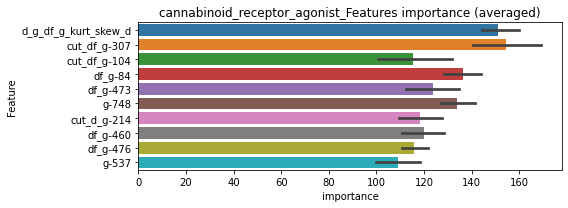

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.0005181	valid_1's binary_logloss: 0.013246


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000500904	valid_1's binary_logloss: 0.0061164


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.00049152	valid_1's binary_logloss: 0.00228775


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000500946	valid_1's binary_logloss: 0.0092212


cannabinoid_receptor_agonist logloss: 0.0077181344495816295
cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3284
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00162379	valid_1's binary_logloss: 0.0285605
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000549732	valid_1's binary_logloss: 0.0192662
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000541675	valid_1's binary_logloss: 0.00961959
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000612026	valid_1's binary_logloss: 0.0255456


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0057189, Threshold: 0.0206289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0206289, conf_0:0.01444, conf_1:0.02682
Num_p_label: 15.0, Expected: 9.2, Adj_threshold_1: 0.0506289
threshold: 0.0506289, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00101858	valid_1's binary_logloss: 0.0271532
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000576581	valid_1's binary_logloss: 0.0109615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000522432	valid_1's binary_logloss: 0.00927225
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000528634	valid_1's binary_logloss: 0.0162774


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0188368, Threshold: 0.0506289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0060271 Vs.target_rate: 0.00231
Num_p_label: 24.0, Expected: 9.2, Threshold: 0.0506289, conf_0:0.04050, conf_1:0.06075
Num_p_label: 14.0, Expected: 9.2, Adj_threshold_1: 0.0806289
threshold: 0.0806289, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000567135	valid_1's binary_logloss: 0.0160821
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000646142	valid_1's binary_logloss: 0.0109647
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000526838	valid_1's binary_logloss: 0.00679273
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00056509	valid_1's binary_logloss: 0.0160983


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0130921, Threshold: 0.0806289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0042692 Vs.target_rate: 0.00231
Num_p_label: 17.0, Expected: 9.2, Threshold: 0.0806289, conf_0:0.07257, conf_1:0.08869
threshold: 0.0806289, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


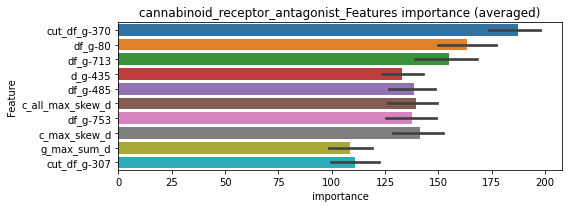

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00100097	valid_1's binary_logloss: 0.0155674
Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000995757	valid_1's binary_logloss: 0.0237939
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000536672	valid_1's binary_logloss: 0.00387358


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000526031	valid_1's binary_logloss: 0.0107842


cannabinoid_receptor_antagonist logloss: 0.013505008165384495
carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000467783	valid_1's binary_logloss: 0.00697155
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000485256	valid_1's binary_logloss: 0.00394066
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000457815	valid_1's binary_logloss: 0.00172856
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0032689, Threshold: 0.0261061, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000488864	valid_1's binary_logloss: 0.0133226


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0261061, conf_0:0.01827, conf_1:0.03394
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_1: 0.0561061
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0861061
threshold: 0.0861061, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00045589	valid_1's binary_logloss: 0.00714578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000453843	valid_1's binary_logloss: 0.00340357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000467754	valid_1's binary_logloss: 0.00136645
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0388622, Threshold: 0.0861061, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000474151	valid_1's binary_logloss: 0.0142334


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0107986 Vs.target_rate: 0.00151
Num_p_label: 43.0, Expected: 6.0, Threshold: 0.0861061, conf_0:0.06888, conf_1:0.10333
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_1: 0.1161061
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_2: 0.1461061
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_3: 0.1761061
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_4: 0.2061061
threshold: 0.2061061, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00045589	valid_1's binary_logloss: 0.00714578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000453843	valid_1's binary_logloss: 0.00340357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000467754	valid_1's binary_logloss: 0.00136645
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0388622, Threshold: 0.2061061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000474151	valid_1's binary_logloss: 0.0142334


p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.2061061, conf_0:0.18550, conf_1:0.22672
threshold: 0.2061061, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


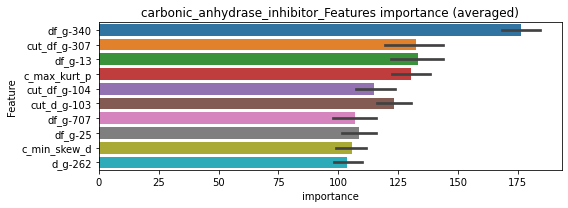

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000472391	valid_1's binary_logloss: 0.00548239


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000473958	valid_1's binary_logloss: 0.00313895


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000468807	valid_1's binary_logloss: 0.00143556


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


carbonic_anhydrase_inhibitor logloss: 0.005612293026683688


Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000535124	valid_1's binary_logloss: 0.0123923


casein_kinase_inhibitor, len(trt): 36, len(othr): 3282
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3282


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00039819	valid_1's binary_logloss: 0.00840014
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000390586	valid_1's binary_logloss: 0.00311233
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000409055	valid_1's binary_logloss: 0.00124985
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000398678	valid_1's binary_logloss: 0.0124354


y_Threshold: 0.0022210, Threshold: 0.0057150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0057150, conf_0:0.00400, conf_1:0.00743
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0357150
threshold: 0.0357150, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000386282	valid_1's binary_logloss: 0.00666229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000388311	valid_1's binary_logloss: 0.00253676
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000399339	valid_1's binary_logloss: 0.00138528
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000426721	valid_1's binary_logloss: 0.012255


y_Threshold: 0.0152855, Threshold: 0.0357150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0357150, conf_0:0.02857, conf_1:0.04286
threshold: 0.0357150, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000386282	valid_1's binary_logloss: 0.00666229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000388311	valid_1's binary_logloss: 0.00253676
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000399339	valid_1's binary_logloss: 0.00138528
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0152855, Threshold: 0.0357150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000426721	valid_1's binary_logloss: 0.012255


p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0357150, conf_0:0.03214, conf_1:0.03929
threshold: 0.0357150, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


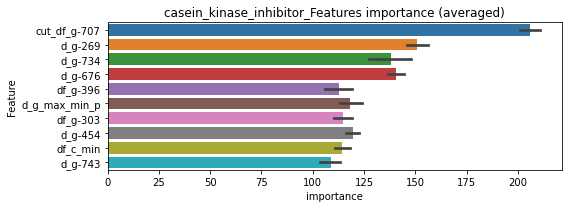

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000394669	valid_1's binary_logloss: 0.00751247


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000389845	valid_1's binary_logloss: 0.00259203
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000389845	valid_1's binary_logloss: 0.00259203


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000396704	valid_1's binary_logloss: 0.00112877
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000396704	valid_1's binary_logloss: 0.00112877


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000438165	valid_1's binary_logloss: 0.00941339


casein_kinase_inhibitor logloss: 0.005161607291896477
caspase_activator, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000291714	valid_1's binary_logloss: 0.001666
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000293028	valid_1's binary_logloss: 0.00124441
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.0002972	valid_1's binary_logloss: 0.00183409
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013201, Threshold: 0.0154419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0154419, conf_0:0.01081, conf_1:0.02007
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0454419
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.0754419
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.1054419
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.1354419
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.1654419


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000292045	valid_1's binary_logloss: 0.000711778


threshold: 0.1654419, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000283673	valid_1's binary_logloss: 0.000702891
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000277548	valid_1's binary_logloss: 0.000860264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000285226	valid_1's binary_logloss: 0.00256863
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0477184, Threshold: 0.1654419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0047715 Vs.target_rate: 0.00076
Num_p_label: 19.0, Expected: 3.0, Threshold: 0.1654419, conf_0:0.13235, conf_1:0.19853
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.1954419
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.2254419
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_3: 0.2554419
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_4: 0.2854419
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.3154419
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.3454419
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.3754419


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000283609	valid_1's binary_logloss: 0.000561023


Num_p_label: 10.0, Expected: 3.0, Adj_threshold_8: 0.4054419
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_9: 0.4354419
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_10: 0.4654419
threshold: 0.4654419, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000283673	valid_1's binary_logloss: 0.000702891
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000277548	valid_1's binary_logloss: 0.000860264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000285226	valid_1's binary_logloss: 0.00256863
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0477184, Threshold: 0.4654419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00076
Num_p_label: 10.0, Expected: 3.0, Threshold: 0.4654419, conf_0:0.41890, conf_1:0.51199
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.4954419
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.5254419


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000283609	valid_1's binary_logloss: 0.000561023


threshold: 0.5254419, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


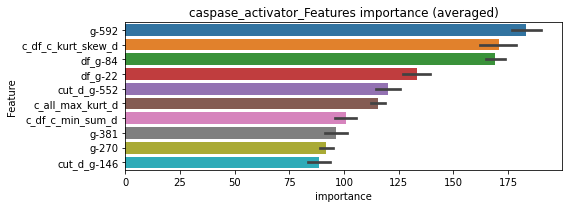

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000283102	valid_1's binary_logloss: 0.000680909


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000281167	valid_1's binary_logloss: 0.000765126


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 caspase_activator=================================


Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000289934	valid_1's binary_logloss: 0.00220307
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000287112	valid_1's binary_logloss: 0.000648465


caspase_activator logloss: 0.0010742087221100325
catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000300892	valid_1's binary_logloss: 0.00235806
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00030148	valid_1's binary_logloss: 0.00129317
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000301082	valid_1's binary_logloss: 0.000533716
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016696, Threshold: 0.0090984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0090984, conf_0:0.00637, conf_1:0.01183
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0390984


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00030142	valid_1's binary_logloss: 0.00746218


threshold: 0.0390984, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000287721	valid_1's binary_logloss: 0.00157306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000293634	valid_1's binary_logloss: 0.00137633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000296568	valid_1's binary_logloss: 0.00043101
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0420298, Threshold: 0.0390984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0072828 Vs.target_rate: 0.00076
Num_p_label: 29.0, Expected: 3.0, Threshold: 0.0390984, conf_0:0.03128, conf_1:0.04692


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000292695	valid_1's binary_logloss: 0.0081306


Num_p_label: 14.0, Expected: 3.0, Adj_threshold_1: 0.0690984
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0990984
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.1290984
threshold: 0.1290984, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000287721	valid_1's binary_logloss: 0.00157306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000293634	valid_1's binary_logloss: 0.00137633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000296568	valid_1's binary_logloss: 0.00043101
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0420298, Threshold: 0.1290984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.1290984, conf_0:0.11619, conf_1:0.14201
threshold: 0.1290984, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000292695	valid_1's binary_logloss: 0.0081306


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


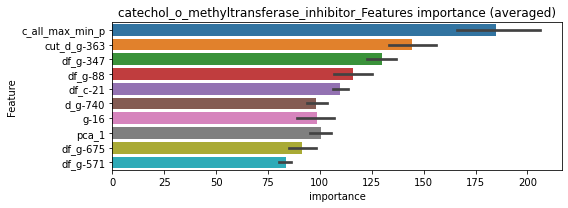

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.00029354	valid_1's binary_logloss: 0.00112373


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000294396	valid_1's binary_logloss: 0.00100272


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000296076	valid_1's binary_logloss: 0.000434837


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


catechol_o_methyltransferase_inhibitor logloss: 0.0018559392774225385


Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000294353	valid_1's binary_logloss: 0.00486197


cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3277
target_rate: 0.0042832 → Adj_target_rate: 0.0042806


selected negative label: 3277


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0533952	valid_1's binary_logloss: 0.133847
[2000]	training's binary_logloss: 0.0268728	valid_1's binary_logloss: 0.114034
[3000]	training's binary_logloss: 0.0177249	valid_1's binary_logloss: 0.107036
Early stopping, best iteration is:
[3259]	training's binary_logloss: 0.0162802	valid_1's binary_logloss: 0.105928
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0555323	valid_1's binary_logloss: 0.115028
[2000]	training's binary_logloss: 0.0279905	valid_1's binary_logloss: 0.0871612
[3000]	training's binary_logloss: 0.018382	valid_1's binary_logloss: 0.0774648
[4000]	training's binary_logloss: 0.01362	valid_1's binary_logloss: 0.0723526
[5000]	training's binary_logloss: 0.0108335	valid_1's binary_logloss: 0.0690365
Early stopping, best iteration is:
[5679]	training's binary_logloss: 0.00951692	valid_1's binary_logloss: 0.0673943
Training until 

1 / 3, AUC score:0.994, PR-AUC:0.985
y_Threshold: 0.0459051, Threshold: 0.1177593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 636/3762
p_label_rate: 0.0100452 Vs.target_rate: 0.00428
Num_p_label: 40.0, Expected: 17.1, Threshold: 0.1177593, conf_0:0.08243, conf_1:0.15309
Num_p_label: 21.0, Expected: 17.1, Adj_threshold_1: 0.1477593
threshold: 0.1477593, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 636.0/3762, y_label_rate: 0.1690590
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0492897	valid_1's binary_logloss: 0.113645
[2000]	training's binary_logloss: 0.0245354	valid_1's binary_logloss: 0.0915347
[3000]	training's binary_logloss: 0.0161463	valid_1's binary_logloss: 0.0845835
Early stopping, best iteration is:
[3593]	training's binary_logloss: 0.0134201	valid_1's binary_logloss: 0.0818719
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0515139	valid_1's binary_logloss: 0.0914733
[2000]	training's binary_logloss: 0.0259039	valid_1's binary_logloss: 0.0659299
[3000]	training's binary_logloss: 0.0169888	valid_1's binary_logloss: 0.0565696
[4000]	training's binary_logloss: 0.0126134	valid_1's binary_logloss: 0.0514974
[5000]	training's binary_logloss: 0.0100591	valid_1's binary_logloss: 0.0483874
[6000]	training's binary_logloss: 0.00838318	valid_1's binary_logloss: 0.046191
Early stopping, best iteration is:
[6747]	tr

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0751668, Threshold: 0.1477593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 617.0/3724
p_label_rate: 0.0107986 Vs.target_rate: 0.00428
Num_p_label: 43.0, Expected: 17.1, Threshold: 0.1477593, conf_0:0.11821, conf_1:0.17731
Num_p_label: 25.0, Expected: 17.1, Adj_threshold_1: 0.1777593
threshold: 0.1777593, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 617.0/3724, y_label_rate: 0.1656821
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0465378	valid_1's binary_logloss: 0.0885474
[2000]	training's binary_logloss: 0.0231823	valid_1's binary_logloss: 0.0673723
[3000]	training's binary_logloss: 0.0152589	valid_1's binary_logloss: 0.0595854
Early stopping, best iteration is:
[3239]	training's binary_logloss: 0.0141228	valid_1's binary_logloss: 0.0585402
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0463576	valid_1's binary_logloss: 0.0944361
[2000]	training's binary_logloss: 0.02319	valid_1's binary_logloss: 0.0707317
[3000]	training's binary_logloss: 0.0152928	valid_1's binary_logloss: 0.0615511
Early stopping, best iteration is:
[3784]	training's binary_logloss: 0.0120797	valid_1's binary_logloss: 0.0580008
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.047352	valid_1's binary_logloss: 0.0798002
[2000]	training's binary_loglo

3 / 3, AUC score:0.997, PR-AUC:0.995
y_Threshold: 0.0733735, Threshold: 0.1777593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 603.0/3696
p_label_rate: 0.0077850 Vs.target_rate: 0.00428
Num_p_label: 31.0, Expected: 17.1, Threshold: 0.1777593, conf_0:0.15998, conf_1:0.19554
Num_p_label: 22.0, Expected: 17.1, Adj_threshold_1: 0.2077593
threshold: 0.2077593, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 603.0/3696, y_label_rate: 0.1631494


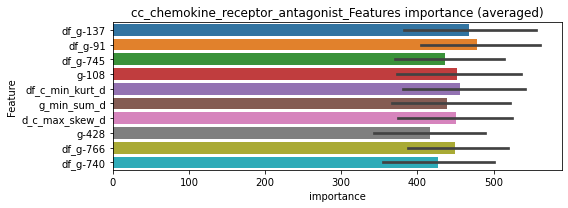

len(train_index) : 2772
len(valid_index) : 924
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0461659	valid_1's binary_logloss: 0.0903985
[2000]	training's binary_logloss: 0.0234616	valid_1's binary_logloss: 0.0690416
[3000]	training's binary_logloss: 0.01557	valid_1's binary_logloss: 0.0607354
[4000]	training's binary_logloss: 0.0116333	valid_1's binary_logloss: 0.0566799
Early stopping, best iteration is:
[4556]	training's binary_logloss: 0.0102143	valid_1's binary_logloss: 0.0551637


len(train_index) : 2772
len(valid_index) : 924
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0477518	valid_1's binary_logloss: 0.0868677
[2000]	training's binary_logloss: 0.0241728	valid_1's binary_logloss: 0.0648872
[3000]	training's binary_logloss: 0.0160488	valid_1's binary_logloss: 0.0564238
[4000]	training's binary_logloss: 0.0120042	valid_1's binary_logloss: 0.0524803
[5000]	training's binary_logloss: 0.00959026	valid_1's binary_logloss: 0.0497493
Early stopping, best iteration is:
[5383]	training's binary_logloss: 0.00891304	valid_1's binary_logloss: 0.0489169


len(train_index) : 2772
len(valid_index) : 924
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0477855	valid_1's binary_logloss: 0.0843669
[2000]	training's binary_logloss: 0.0242522	valid_1's binary_logloss: 0.0602896
[3000]	training's binary_logloss: 0.0161576	valid_1's binary_logloss: 0.0510807
[4000]	training's binary_logloss: 0.0120897	valid_1's binary_logloss: 0.0460424
[5000]	training's binary_logloss: 0.00968055	valid_1's binary_logloss: 0.0430059
[6000]	training's binary_logloss: 0.0080922	valid_1's binary_logloss: 0.0407984
[7000]	training's binary_logloss: 0.00694963	valid_1's binary_logloss: 0.0392183
[8000]	training's binary_logloss: 0.00609772	valid_1's binary_logloss: 0.037998
[9000]	training's binary_logloss: 0.00544362	valid_1's binary_logloss: 0.0370292
[10000]	training's binary_logloss: 0.00492208	valid_1's binary_logloss: 0.0362793
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00492208	valid_1's binary_logloss: 0.0362793


len(train_index) : 2772
len(valid_index) : 924
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0473063	valid_1's binary_logloss: 0.0885184
[2000]	training's binary_logloss: 0.0238932	valid_1's binary_logloss: 0.0645921
[3000]	training's binary_logloss: 0.0158738	valid_1's binary_logloss: 0.0558947
[4000]	training's binary_logloss: 0.011889	valid_1's binary_logloss: 0.0511581
[5000]	training's binary_logloss: 0.00951447	valid_1's binary_logloss: 0.0481907
[6000]	training's binary_logloss: 0.00794691	valid_1's binary_logloss: 0.0460981
[7000]	training's binary_logloss: 0.00683603	valid_1's binary_logloss: 0.044635
Early stopping, best iteration is:
[6989]	training's binary_logloss: 0.00684516	valid_1's binary_logloss: 0.0446199


cc_chemokine_receptor_antagonist logloss: 0.04624495312951296
cc_chemokine_receptor_antagonist is unpredictable(><)!
cck_receptor_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000309292	valid_1's binary_logloss: 0.00163279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000312886	valid_1's binary_logloss: 0.00216559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000306231	valid_1's binary_logloss: 0.000886177
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013995, Threshold: 0.0032761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0032761, conf_0:0.00229, conf_1:0.00426
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0332761


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000311249	valid_1's binary_logloss: 0.000914939


threshold: 0.0332761, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000300678	valid_1's binary_logloss: 0.00130626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000295506	valid_1's binary_logloss: 0.00235857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000297752	valid_1's binary_logloss: 0.000803491
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0898817, Threshold: 0.0332761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000296934	valid_1's binary_logloss: 0.000653008


p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0332761, conf_0:0.02662, conf_1:0.03993
threshold: 0.0332761, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000300678	valid_1's binary_logloss: 0.00130626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000295506	valid_1's binary_logloss: 0.00235857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000297752	valid_1's binary_logloss: 0.000803491
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0898817, Threshold: 0.0332761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0332761, conf_0:0.02995, conf_1:0.03660


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000296934	valid_1's binary_logloss: 0.000653008


threshold: 0.0332761, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


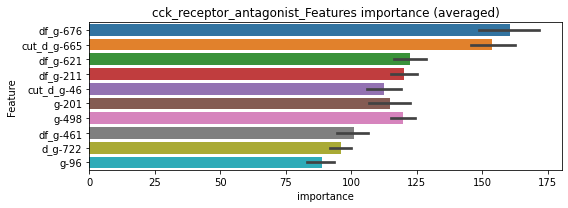

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000310132	valid_1's binary_logloss: 0.00137618


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000299431	valid_1's binary_logloss: 0.00125679


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000304456	valid_1's binary_logloss: 0.000689321


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000302092	valid_1's binary_logloss: 0.000810496


cck_receptor_antagonist logloss: 0.001033347047277023


mutually exclusive columns: cdk_inhibitor


cdk_inhibitor, len(trt): 352, len(othr): 7583
target_rate: 0.0147812 → Adj_target_rate: 0.0122676


selected negative label: 7583


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0816027	valid_1's binary_logloss: 0.184131
[2000]	training's binary_logloss: 0.0402288	valid_1's binary_logloss: 0.152135
[3000]	training's binary_logloss: 0.02598	valid_1's binary_logloss: 0.140821
Early stopping, best iteration is:
[3491]	training's binary_logloss: 0.0220595	valid_1's binary_logloss: 0.137959
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0829544	valid_1's binary_logloss: 0.176137
[2000]	training's binary_logloss: 0.0410285	valid_1's binary_logloss: 0.141849
[3000]	training's binary_logloss: 0.0262926	valid_1's binary_logloss: 0.129788
Early stopping, best iteration is:
[3571]	training's binary_logloss: 0.021674	valid_1's binary_logloss: 0.125977
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0811995	valid_1's binary_logloss: 0.17923
[2000]	training's binary_logloss: 0.0399

1 / 3, AUC score:0.965, PR-AUC:0.938
y_Threshold: 0.0890518, Threshold: 0.1724625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 588 → Positive_corect_labels: 1374/8511
p_label_rate: 0.0100452 Vs.target_rate: 0.01478
Num_p_label: 40.0, Expected: 58.9, Threshold: 0.1724625, conf_0:0.12072, conf_1:0.22420
threshold: 0.1724625, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1374.0/8511, y_label_rate: 0.1614381
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0649371	valid_1's binary_logloss: 0.15136
[2000]	training's binary_logloss: 0.0316319	valid_1's binary_logloss: 0.118859
[3000]	training's binary_logloss: 0.0204634	valid_1's binary_logloss: 0.107245
Early stopping, best iteration is:
[3340]	training's binary_logloss: 0.0182359	valid_1's binary_logloss: 0.104548
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0655782	valid_1's binary_logloss: 0.148763
[2000]	training's binary_logloss: 0.0319136	valid_1's binary_logloss: 0.114134
[3000]	training's binary_logloss: 0.020648	valid_1's binary_logloss: 0.101208
Early stopping, best iteration is:
[3771]	training's binary_logloss: 0.0161798	valid_1's binary_logloss: 0.0959192
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.066225	valid_1's binary_logloss: 0.137088
[2000]	training's binary_logloss: 0.03

2 / 3, AUC score:0.992, PR-AUC:0.982
y_Threshold: 0.1203299, Threshold: 0.1724625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 1296.0/8355
p_label_rate: 0.0188348 Vs.target_rate: 0.01478
Num_p_label: 75.0, Expected: 58.9, Threshold: 0.1724625, conf_0:0.13797, conf_1:0.20696
threshold: 0.1724625, positive_p_label: 75.0/3982, p_label_rate: 0.0188348
positive_y_label: 1296.0/8355, y_label_rate: 0.1551167
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0595374	valid_1's binary_logloss: 0.126917
[2000]	training's binary_logloss: 0.0289387	valid_1's binary_logloss: 0.0972834
[3000]	training's binary_logloss: 0.0186754	valid_1's binary_logloss: 0.0859496
Early stopping, best iteration is:
[3850]	training's binary_logloss: 0.0143308	valid_1's binary_logloss: 0.0811091
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0600729	valid_1's binary_logloss: 0.139987
[2000]	training's binary_logloss: 0.0290399	valid_1's binary_logloss: 0.108501
Early stopping, best iteration is:
[2830]	training's binary_logloss: 0.0199647	valid_1's binary_logloss: 0.0985132
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0597161	valid_1's binary_logloss: 0.129117
[2000]	training's binary_logloss: 0.0289448	valid_1's binary_logloss: 0.0974537
[3000]	training's binary_loglos

3 / 3, AUC score:0.994, PR-AUC:0.985
y_Threshold: 0.1189927, Threshold: 0.1724625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 108 → Positive_corect_labels: 1242.0/8247
p_label_rate: 0.0195881 Vs.target_rate: 0.01478
Num_p_label: 78.0, Expected: 58.9, Threshold: 0.1724625, conf_0:0.15522, conf_1:0.18971
threshold: 0.1724625, positive_p_label: 78.0/3982, p_label_rate: 0.0195881
positive_y_label: 1242.0/8247, y_label_rate: 0.1506002


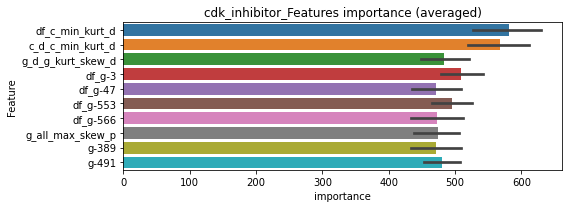

len(train_index) : 6185
len(valid_index) : 2062
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0610965	valid_1's binary_logloss: 0.11743
[2000]	training's binary_logloss: 0.0303308	valid_1's binary_logloss: 0.0828014
[3000]	training's binary_logloss: 0.0198166	valid_1's binary_logloss: 0.0698408
[4000]	training's binary_logloss: 0.0146654	valid_1's binary_logloss: 0.0627855
Early stopping, best iteration is:
[4809]	training's binary_logloss: 0.0121131	valid_1's binary_logloss: 0.0590987


len(train_index) : 6185
len(valid_index) : 2062
================================= fold 2/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0604025	valid_1's binary_logloss: 0.120793
[2000]	training's binary_logloss: 0.0299442	valid_1's binary_logloss: 0.0887917
[3000]	training's binary_logloss: 0.0195728	valid_1's binary_logloss: 0.0760978
[4000]	training's binary_logloss: 0.0144806	valid_1's binary_logloss: 0.0692768
[5000]	training's binary_logloss: 0.011495	valid_1's binary_logloss: 0.0651715
Early stopping, best iteration is:
[5052]	training's binary_logloss: 0.0113691	valid_1's binary_logloss: 0.0649894


len(train_index) : 6185
len(valid_index) : 2062
================================= fold 3/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0611145	valid_1's binary_logloss: 0.115552
[2000]	training's binary_logloss: 0.0302728	valid_1's binary_logloss: 0.0825434
[3000]	training's binary_logloss: 0.0197678	valid_1's binary_logloss: 0.0696113
[4000]	training's binary_logloss: 0.0146539	valid_1's binary_logloss: 0.0626791
[5000]	training's binary_logloss: 0.0116357	valid_1's binary_logloss: 0.0584592
Early stopping, best iteration is:
[5816]	training's binary_logloss: 0.00996483	valid_1's binary_logloss: 0.0559245


len(train_index) : 6186
len(valid_index) : 2061
================================= fold 4/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0612256	valid_1's binary_logloss: 0.117691
[2000]	training's binary_logloss: 0.0304783	valid_1's binary_logloss: 0.0852903
[3000]	training's binary_logloss: 0.0199011	valid_1's binary_logloss: 0.0727313
[4000]	training's binary_logloss: 0.0147273	valid_1's binary_logloss: 0.0659704
Early stopping, best iteration is:
[4804]	training's binary_logloss: 0.0121688	valid_1's binary_logloss: 0.0625552


cdk_inhibitor logloss: 0.060641745224203264
cdk_inhibitor is unpredictable(><)!
chelating_agent, len(trt): 54, len(othr): 3280
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3280


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000634091	valid_1's binary_logloss: 0.0241802
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000551893	valid_1's binary_logloss: 0.0164156
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000527497	valid_1's binary_logloss: 0.00492219
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000660421	valid_1's binary_logloss: 0.0241797


y_Threshold: 0.0048108, Threshold: 0.0163525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0163525, conf_0:0.01145, conf_1:0.02126
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_1: 0.0463525
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_2: 0.0763525
threshold: 0.0763525, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000569702	valid_1's binary_logloss: 0.0221034
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000531259	valid_1's binary_logloss: 0.0135341
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.00052534	valid_1's binary_logloss: 0.00460284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000520227	valid_1's binary_logloss: 0.023399


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0224471, Threshold: 0.0763525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0065294 Vs.target_rate: 0.00227
Num_p_label: 26.0, Expected: 9.0, Threshold: 0.0763525, conf_0:0.06108, conf_1:0.09162
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_1: 0.1063525
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_2: 0.1363525
threshold: 0.1363525, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000520362	valid_1's binary_logloss: 0.00868488
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000520119	valid_1's binary_logloss: 0.0154487
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000522669	valid_1's binary_logloss: 0.0178838
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0230638, Threshold: 0.1363525, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000730166	valid_1's binary_logloss: 0.0243716


Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0057760 Vs.target_rate: 0.00227
Num_p_label: 23.0, Expected: 9.0, Threshold: 0.1363525, conf_0:0.12272, conf_1:0.14999
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_1: 0.1663525
threshold: 0.1663525, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


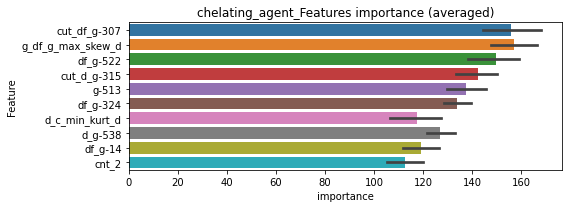

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000498951	valid_1's binary_logloss: 0.0089516
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000497332	valid_1's binary_logloss: 0.0089359


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000662953	valid_1's binary_logloss: 0.0199669


================================= fold 3/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000520252	valid_1's binary_logloss: 0.00742096


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds


chelating_agent logloss: 0.013099907184820745


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00090725	valid_1's binary_logloss: 0.0160601


chk_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000345422	valid_1's binary_logloss: 0.00113867
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000349739	valid_1's binary_logloss: 0.00191171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000363195	valid_1's binary_logloss: 0.000866409
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000359771	valid_1's binary_logloss: 0.00107256


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027590, Threshold: 0.0524497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0524497, conf_0:0.03671, conf_1:0.06818
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_1: 0.0824497
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_2: 0.1124497
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_3: 0.1424497
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_4: 0.1724497
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_5: 0.2024497
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_6: 0.2324497
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_7: 0.2624497
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_8: 0.2924497
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.3224497
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_10: 0.3524497
threshold: 0.3524497, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335283	valid_1's binary_logloss: 0.000972783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000340312	valid_1's binary_logloss: 0.00143889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000337091	valid_1's binary_logloss: 0.000714623
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1611848, Threshold: 0.3524497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0090407 Vs.target_rate: 0.00101
Num_p_label: 36.0, Expected: 4.0, Threshold: 0.3524497, conf_0:0.28196, conf_1:0.42294
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_1: 0.3824497
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_2: 0.4124497
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_3: 0.4424497
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_4: 0.4724497


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000342619	valid_1's binary_logloss: 0.0010953


Num_p_label: 27.0, Expected: 4.0, Adj_threshold_5: 0.5024497
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_6: 0.5324497
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_7: 0.5624497
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_8: 0.5924497
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_9: 0.6224497
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_10: 0.6524497
threshold: 0.6524497, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335283	valid_1's binary_logloss: 0.000972783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000340312	valid_1's binary_logloss: 0.00143889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000337091	valid_1's binary_logloss: 0.000714623
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1611848, Threshold: 0.6524497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00101
Num_p_label: 19.0, Expected: 4.0, Threshold: 0.6524497, conf_0:0.58720, conf_1:0.71769
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_1: 0.6824497
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_2: 0.7124497
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_3: 0.7424497
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_4: 0.7724497
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_5: 0.8024497
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_6: 0.8324497


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000342619	valid_1's binary_logloss: 0.0010953


Num_p_label: 10.0, Expected: 4.0, Adj_threshold_7: 0.8624497
threshold: 0.8624497, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


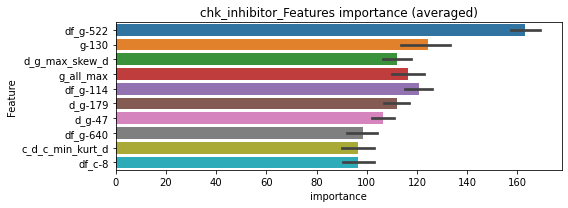

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000349335	valid_1's binary_logloss: 0.000868088


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000340507	valid_1's binary_logloss: 0.001225


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000343309	valid_1's binary_logloss: 0.000803924


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000344501	valid_1's binary_logloss: 0.00106844


chk_inhibitor logloss: 0.0009913453242998485
chloride_channel_blocker, len(trt): 42, len(othr): 3279
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000470364	valid_1's binary_logloss: 0.00593944
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000466538	valid_1's binary_logloss: 0.0121803
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000472255	valid_1's binary_logloss: 0.00520967
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000469761	valid_1's binary_logloss: 0.00879355


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036083, Threshold: 0.0307272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0307272, conf_0:0.02151, conf_1:0.03995
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_1: 0.0607272
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_2: 0.0907272
threshold: 0.0907272, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000452107	valid_1's binary_logloss: 0.00551996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000475851	valid_1's binary_logloss: 0.00858911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000506688	valid_1's binary_logloss: 0.00532721
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000472879	valid_1's binary_logloss: 0.0082991


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0394437, Threshold: 0.0907272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0155701 Vs.target_rate: 0.00176
Num_p_label: 62.0, Expected: 7.0, Threshold: 0.0907272, conf_0:0.07258, conf_1:0.10887
Num_p_label: 55.0, Expected: 7.0, Adj_threshold_1: 0.1207272
Num_p_label: 48.0, Expected: 7.0, Adj_threshold_2: 0.1507272
Num_p_label: 44.0, Expected: 7.0, Adj_threshold_3: 0.1807272
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_4: 0.2107272
Num_p_label: 31.0, Expected: 7.0, Adj_threshold_5: 0.2407272
Num_p_label: 26.0, Expected: 7.0, Adj_threshold_6: 0.2707272
Num_p_label: 24.0, Expected: 7.0, Adj_threshold_7: 0.3007272
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_8: 0.3307272
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_9: 0.3607272
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_10: 0.3907272
threshold: 0.3907272, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000452107	valid_1's binary_logloss: 0.00551996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000475851	valid_1's binary_logloss: 0.00858911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000506688	valid_1's binary_logloss: 0.00532721
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000472879	valid_1's binary_logloss: 0.0082991


y_Threshold: 0.0394437, Threshold: 0.3907272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0045203 Vs.target_rate: 0.00176
Num_p_label: 18.0, Expected: 7.0, Threshold: 0.3907272, conf_0:0.35165, conf_1:0.42980
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.4207272
threshold: 0.4207272, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


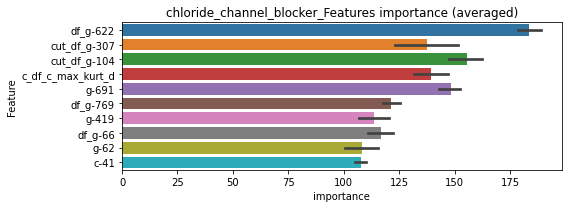

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000462711	valid_1's binary_logloss: 0.00469207


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000474733	valid_1's binary_logloss: 0.0067265


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000462247	valid_1's binary_logloss: 0.00456178


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000485099	valid_1's binary_logloss: 0.00809451


chloride_channel_blocker logloss: 0.0060210218971286315
cholesterol_inhibitor, len(trt): 48, len(othr): 3286
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000490532	valid_1's binary_logloss: 0.0106264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000510735	valid_1's binary_logloss: 0.0127336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000490598	valid_1's binary_logloss: 0.00252564
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000477508	valid_1's binary_logloss: 0.00833974


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0041254, Threshold: 0.0132104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0132104, conf_0:0.00925, conf_1:0.01717
Num_p_label: 7.0, Expected: 8.0, Adj_threshold_1: 0.0432104
threshold: 0.0432104, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000508617	valid_1's binary_logloss: 0.0092629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000571143	valid_1's binary_logloss: 0.0131223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000477159	valid_1's binary_logloss: 0.00241287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000477098	valid_1's binary_logloss: 0.00770112


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354554, Threshold: 0.0432104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00202
Num_p_label: 17.0, Expected: 8.0, Threshold: 0.0432104, conf_0:0.03457, conf_1:0.05185
threshold: 0.0432104, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000508617	valid_1's binary_logloss: 0.0092629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000571143	valid_1's binary_logloss: 0.0131223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000477159	valid_1's binary_logloss: 0.00241287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000477098	valid_1's binary_logloss: 0.00770112


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354554, Threshold: 0.0432104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00202
Num_p_label: 17.0, Expected: 8.0, Threshold: 0.0432104, conf_0:0.03889, conf_1:0.04753
threshold: 0.0432104, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


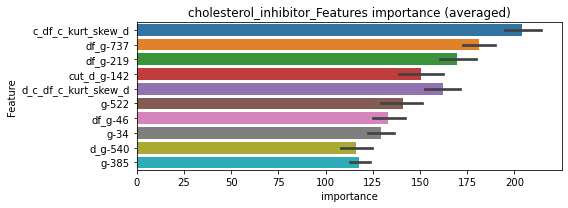

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000475724	valid_1's binary_logloss: 0.00843338


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000481094	valid_1's binary_logloss: 0.0115145


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000482923	valid_1's binary_logloss: 0.00264433
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000483156	valid_1's binary_logloss: 0.00264374


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000491891	valid_1's binary_logloss: 0.00935063


cholesterol_inhibitor logloss: 0.007991061991790928
cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3286
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000523312	valid_1's binary_logloss: 0.0145485
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00055695	valid_1's binary_logloss: 0.0142857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000580293	valid_1's binary_logloss: 0.0101624
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044919, Threshold: 0.0097991, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000758515	valid_1's binary_logloss: 0.0145313


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0097991, conf_0:0.00686, conf_1:0.01274
Num_p_label: 5.0, Expected: 9.0, Adj_threshold_1: 0.0397991
threshold: 0.0397991, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00053355	valid_1's binary_logloss: 0.0146893
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000525474	valid_1's binary_logloss: 0.0144009
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000509151	valid_1's binary_logloss: 0.00973826
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000602406	valid_1's binary_logloss: 0.0138061


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0271513, Threshold: 0.0397991, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0020090 Vs.target_rate: 0.00227
Num_p_label: 8.0, Expected: 9.0, Threshold: 0.0397991, conf_0:0.03184, conf_1:0.04776
threshold: 0.0397991, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000566546	valid_1's binary_logloss: 0.0208555
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000504642	valid_1's binary_logloss: 0.00676098
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000568739	valid_1's binary_logloss: 0.0063707
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000563409	valid_1's binary_logloss: 0.022914


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0311180, Threshold: 0.0397991, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3805
p_label_rate: 0.0027624 Vs.target_rate: 0.00227
Num_p_label: 11.0, Expected: 9.0, Threshold: 0.0397991, conf_0:0.03582, conf_1:0.04378
threshold: 0.0397991, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3805, y_label_rate: 0.1718791


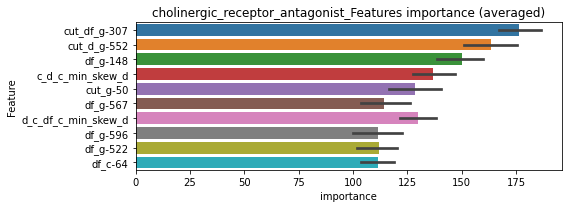

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951


Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000631144	valid_1's binary_logloss: 0.00739663


================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000680623	valid_1's binary_logloss: 0.0130907


================================= fold 3/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000521743	valid_1's binary_logloss: 0.00945977


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


cholinergic_receptor_antagonist logloss: 0.010467240324984263


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000666652	valid_1's binary_logloss: 0.0119205


coagulation_factor_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000339175	valid_1's binary_logloss: 0.00147322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000331164	valid_1's binary_logloss: 0.00231605
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000340977	valid_1's binary_logloss: 0.00175983
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020091, Threshold: 0.0104905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101


Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000356108	valid_1's binary_logloss: 0.00653134


Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0104905, conf_0:0.00734, conf_1:0.01364
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_1: 0.0404905
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_2: 0.0704905
threshold: 0.0704905, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000334255	valid_1's binary_logloss: 0.00127968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000323447	valid_1's binary_logloss: 0.00183887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000332912	valid_1's binary_logloss: 0.00164977
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0276819, Threshold: 0.0704905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0704905, conf_0:0.05639, conf_1:0.08459


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000335519	valid_1's binary_logloss: 0.00518322


threshold: 0.0704905, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000334255	valid_1's binary_logloss: 0.00127968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000323447	valid_1's binary_logloss: 0.00183887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000332912	valid_1's binary_logloss: 0.00164977
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0276819, Threshold: 0.0704905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000335519	valid_1's binary_logloss: 0.00518322


p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0704905, conf_0:0.06344, conf_1:0.07754
threshold: 0.0704905, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


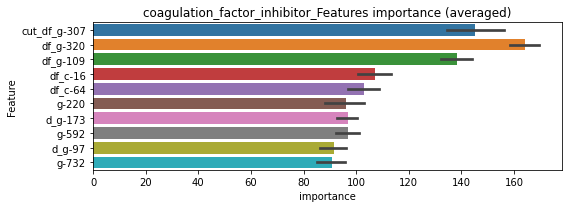

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000336907	valid_1's binary_logloss: 0.00128482
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000333786	valid_1's binary_logloss: 0.00127921


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000335394	valid_1's binary_logloss: 0.00201584


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000335773	valid_1's binary_logloss: 0.00144264
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000335495	valid_1's binary_logloss: 0.00144118


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000343868	valid_1's binary_logloss: 0.00356907


coagulation_factor_inhibitor logloss: 0.002076148221522129
corticosteroid_agonist, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000437964	valid_1's binary_logloss: 0.00369693
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000417539	valid_1's binary_logloss: 0.00978523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000432317	valid_1's binary_logloss: 0.00349006
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000443437	valid_1's binary_logloss: 0.0066927


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039663, Threshold: 0.0112135, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0112135, conf_0:0.00785, conf_1:0.01458
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0412135
threshold: 0.0412135, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000417958	valid_1's binary_logloss: 0.00288171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00042539	valid_1's binary_logloss: 0.00864866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000419309	valid_1's binary_logloss: 0.00356476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000443368	valid_1's binary_logloss: 0.00693857


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0353321, Threshold: 0.0412135, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0412135, conf_0:0.03297, conf_1:0.04946
threshold: 0.0412135, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000417958	valid_1's binary_logloss: 0.00288171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00042539	valid_1's binary_logloss: 0.00864866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000419309	valid_1's binary_logloss: 0.00356476
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0353321, Threshold: 0.0412135, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000443368	valid_1's binary_logloss: 0.00693857


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0412135, conf_0:0.03709, conf_1:0.04533
threshold: 0.0412135, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


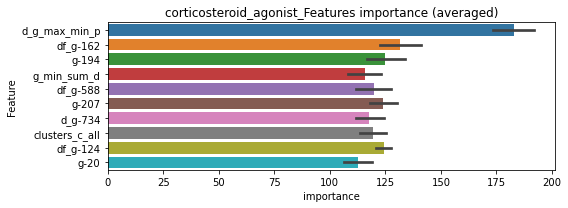

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000424361	valid_1's binary_logloss: 0.0036221


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000480247	valid_1's binary_logloss: 0.00745574


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000488757	valid_1's binary_logloss: 0.00436461


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000433455	valid_1's binary_logloss: 0.00479776


corticosteroid_agonist logloss: 0.005060120860538934
cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3230
target_rate: 0.0182666 → Adj_target_rate: 0.0146863


selected negative label: 3230


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.177523	valid_1's binary_logloss: 0.395187
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.18043	valid_1's binary_logloss: 0.396371
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.148783	valid_1's binary_logloss: 0.359179
Early stopping, best iteration is:
[1329]	training's binary_logloss: 0.117374	valid_1's binary_logloss: 0.352477
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.190903	valid_1's binary_logloss: 0.385491


1 / 3, AUC score:0.730, PR-AUC:0.550
y_Threshold: 0.1809310, Threshold: 0.4351094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 756 → Positive_corect_labels: 333/3120
p_label_rate: 0.0100452 Vs.target_rate: 0.01827
Num_p_label: 40.0, Expected: 72.7, Threshold: 0.4351094, conf_0:0.30458, conf_1:0.56564
threshold: 0.4351094, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 333.0/3120, y_label_rate: 0.1067308
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0727829	valid_1's binary_logloss: 0.22086
Early stopping, best iteration is:
[1068]	training's binary_logloss: 0.0682508	valid_1's binary_logloss: 0.218183
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0775313	valid_1's binary_logloss: 0.179418
Early stopping, best iteration is:
[1836]	training's binary_logloss: 0.0424313	valid_1's binary_logloss: 0.158866
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.07787	valid_1's binary_logloss: 0.176562
[2000]	training's binary_logloss: 0.0396476	valid_1's binary_logloss: 0.149592
Early stopping, best iteration is:
[2902]	training's binary_logloss: 0.0267883	valid_1's binary_logloss: 0.140657
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0775983	valid_1's binary_logloss: 0.186084
Early stopping, best i

2 / 3, AUC score:0.955, PR-AUC:0.857
y_Threshold: 0.1189135, Threshold: 0.4351094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 259.0/2972
p_label_rate: 0.0318935 Vs.target_rate: 0.01827
Num_p_label: 127.0, Expected: 72.7, Threshold: 0.4351094, conf_0:0.34809, conf_1:0.52213
Num_p_label: 124.0, Expected: 72.7, Adj_threshold_1: 0.4651094
Num_p_label: 120.0, Expected: 72.7, Adj_threshold_2: 0.4951094
Num_p_label: 119.0, Expected: 72.7, Adj_threshold_3: 0.5251094
Num_p_label: 111.0, Expected: 72.7, Adj_threshold_4: 0.5551094
Num_p_label: 103.0, Expected: 72.7, Adj_threshold_5: 0.5851094
threshold: 0.5851094, positive_p_label: 103.0/3982, p_label_rate: 0.0258664
positive_y_label: 259.0/2972, y_label_rate: 0.0871467
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0578924	valid_1's binary_logloss: 0.147047
Early stopping, best iteration is:
[1917]	training's binary_logloss: 0.029713	valid_1's binary_logloss: 0.127178
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0568939	valid_1's binary_logloss: 0.144914
[2000]	training's binary_logloss: 0.0280534	valid_1's binary_logloss: 0.125283
Early stopping, best iteration is:
[2700]	training's binary_logloss: 0.0204608	valid_1's binary_logloss: 0.119686
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.058568	valid_1's binary_logloss: 0.12926
[2000]	training's binary_logloss: 0.0288177	valid_1's binary_logloss: 0.103697
[3000]	training's binary_logloss: 0.0187355	valid_1's binary_logloss: 0.0941278
Early stopping, best iteration is:
[3817]	training's binary_logloss: 0.0145761	valid_1's binary_logloss: 0.0902407
Tr

3 / 3, AUC score:0.985, PR-AUC:0.951
y_Threshold: 0.0875309, Threshold: 0.5851094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 232.0/2918
p_label_rate: 0.0323958 Vs.target_rate: 0.01827
Num_p_label: 129.0, Expected: 72.7, Threshold: 0.5851094, conf_0:0.52660, conf_1:0.64362
Num_p_label: 128.0, Expected: 72.7, Adj_threshold_1: 0.6151094
Num_p_label: 124.0, Expected: 72.7, Adj_threshold_2: 0.6451094
Num_p_label: 118.0, Expected: 72.7, Adj_threshold_3: 0.6751094
Num_p_label: 115.0, Expected: 72.7, Adj_threshold_4: 0.7051094
Num_p_label: 103.0, Expected: 72.7, Adj_threshold_5: 0.7351094
threshold: 0.7351094, positive_p_label: 103.0/3982, p_label_rate: 0.0258664
positive_y_label: 232.0/2918, y_label_rate: 0.0795065


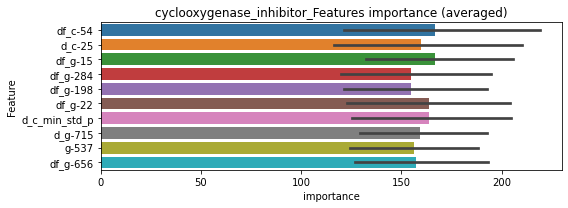

len(train_index) : 2188
len(valid_index) : 730
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0558501	valid_1's binary_logloss: 0.124253
[2000]	training's binary_logloss: 0.0280309	valid_1's binary_logloss: 0.104029
[3000]	training's binary_logloss: 0.0183833	valid_1's binary_logloss: 0.0973943
Early stopping, best iteration is:
[3614]	training's binary_logloss: 0.0151333	valid_1's binary_logloss: 0.0949005


len(train_index) : 2188
len(valid_index) : 730
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.056674	valid_1's binary_logloss: 0.117328
[2000]	training's binary_logloss: 0.0284247	valid_1's binary_logloss: 0.0950461
Early stopping, best iteration is:
[2403]	training's binary_logloss: 0.0235796	valid_1's binary_logloss: 0.0912476


len(train_index) : 2189
len(valid_index) : 729
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0542505	valid_1's binary_logloss: 0.13461
[2000]	training's binary_logloss: 0.0271703	valid_1's binary_logloss: 0.115016
Early stopping, best iteration is:
[2730]	training's binary_logloss: 0.0196993	valid_1's binary_logloss: 0.109972


len(train_index) : 2189
len(valid_index) : 729
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0559619	valid_1's binary_logloss: 0.12623
[2000]	training's binary_logloss: 0.0280275	valid_1's binary_logloss: 0.103924
[3000]	training's binary_logloss: 0.0183642	valid_1's binary_logloss: 0.0969841
Early stopping, best iteration is:
[3579]	training's binary_logloss: 0.0152927	valid_1's binary_logloss: 0.0950123


cyclooxygenase_inhibitor logloss: 0.09777990584129961
cyclooxygenase_inhibitor is unpredictable(><)!
cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3271
target_rate: 0.0043672 → Adj_target_rate: 0.0043519


selected negative label: 3271


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0527446	valid_1's binary_logloss: 0.120144
[2000]	training's binary_logloss: 0.0266757	valid_1's binary_logloss: 0.0981067
[3000]	training's binary_logloss: 0.0175528	valid_1's binary_logloss: 0.0895102
Early stopping, best iteration is:
[3753]	training's binary_logloss: 0.0139345	valid_1's binary_logloss: 0.0856381
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0534796	valid_1's binary_logloss: 0.120196
[2000]	training's binary_logloss: 0.0269426	valid_1's binary_logloss: 0.0972225
[3000]	training's binary_logloss: 0.0177303	valid_1's binary_logloss: 0.0887957
Early stopping, best iteration is:
[3255]	training's binary_logloss: 0.0163065	valid_1's binary_logloss: 0.0874419
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0563669	valid_1's binary_logloss: 0.0955568
[2000]	training's binary_logl

1 / 3, AUC score:0.994, PR-AUC:0.987
y_Threshold: 0.0450650, Threshold: 0.1146700, pos_neg_ratio: 0.8000000
Remove_noisy_data: 165 → Positive_corect_labels: 637/3760
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, Expected: 17.4, Threshold: 0.1146700, conf_0:0.08027, conf_1:0.14907
Num_p_label: 22.0, Expected: 17.4, Adj_threshold_1: 0.1446700
threshold: 0.1446700, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 637.0/3760, y_label_rate: 0.1694149
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0479354	valid_1's binary_logloss: 0.109571
[2000]	training's binary_logloss: 0.0240434	valid_1's binary_logloss: 0.0858658
[3000]	training's binary_logloss: 0.0158993	valid_1's binary_logloss: 0.0782077
Early stopping, best iteration is:
[3082]	training's binary_logloss: 0.0154681	valid_1's binary_logloss: 0.0777153
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0492901	valid_1's binary_logloss: 0.0987181
[2000]	training's binary_logloss: 0.0245643	valid_1's binary_logloss: 0.0769976
Early stopping, best iteration is:
[2722]	training's binary_logloss: 0.0178826	valid_1's binary_logloss: 0.0707349
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0501264	valid_1's binary_logloss: 0.0905234
[2000]	training's binary_logloss: 0.0249575	valid_1's binary_logloss: 0.063652
[3000]	training's binary_logl

2 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0941530, Threshold: 0.1446700, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 625.0/3736
p_label_rate: 0.0165746 Vs.target_rate: 0.00437
Num_p_label: 66.0, Expected: 17.4, Threshold: 0.1446700, conf_0:0.11574, conf_1:0.17360
Num_p_label: 43.0, Expected: 17.4, Adj_threshold_1: 0.1746700
Num_p_label: 31.0, Expected: 17.4, Adj_threshold_2: 0.2046700
Num_p_label: 22.0, Expected: 17.4, Adj_threshold_3: 0.2346700
threshold: 0.2346700, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 625.0/3736, y_label_rate: 0.1672912
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.047998	valid_1's binary_logloss: 0.0854932
[2000]	training's binary_logloss: 0.0240513	valid_1's binary_logloss: 0.0609763
[3000]	training's binary_logloss: 0.0158736	valid_1's binary_logloss: 0.0518494
[4000]	training's binary_logloss: 0.0118061	valid_1's binary_logloss: 0.0470695
[5000]	training's binary_logloss: 0.00943406	valid_1's binary_logloss: 0.0439793
Early stopping, best iteration is:
[5835]	training's binary_logloss: 0.00808407	valid_1's binary_logloss: 0.0421128
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0466733	valid_1's binary_logloss: 0.10406
[2000]	training's binary_logloss: 0.0233731	valid_1's binary_logloss: 0.0800674
[3000]	training's binary_logloss: 0.0154294	valid_1's binary_logloss: 0.0707394
[4000]	training's binary_logloss: 0.0114926	valid_1's binary_logloss: 0.0656897
Early stopping, best iteration is:
[3978]	tr

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0816248, Threshold: 0.2346700, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 618.0/3722
p_label_rate: 0.0062783 Vs.target_rate: 0.00437
Num_p_label: 25.0, Expected: 17.4, Threshold: 0.2346700, conf_0:0.21120, conf_1:0.25814
threshold: 0.2346700, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 618.0/3722, y_label_rate: 0.1660398


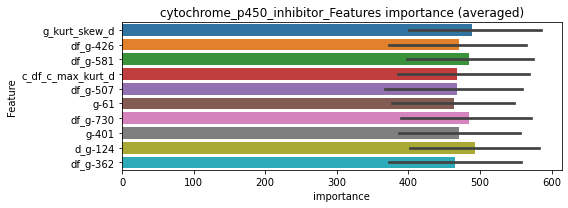

len(train_index) : 2791
len(valid_index) : 931
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0490448	valid_1's binary_logloss: 0.0915637
[2000]	training's binary_logloss: 0.024891	valid_1's binary_logloss: 0.0673111
[3000]	training's binary_logloss: 0.016571	valid_1's binary_logloss: 0.0578333
[4000]	training's binary_logloss: 0.0124207	valid_1's binary_logloss: 0.0528523
[5000]	training's binary_logloss: 0.00994278	valid_1's binary_logloss: 0.0496225
[6000]	training's binary_logloss: 0.00830017	valid_1's binary_logloss: 0.0473793
[7000]	training's binary_logloss: 0.00713585	valid_1's binary_logloss: 0.0456498
[8000]	training's binary_logloss: 0.00626117	valid_1's binary_logloss: 0.0442555
Early stopping, best iteration is:
[8323]	training's binary_logloss: 0.00602372	valid_1's binary_logloss: 0.0438698


len(train_index) : 2791
len(valid_index) : 931
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0497401	valid_1's binary_logloss: 0.0922677
[2000]	training's binary_logloss: 0.0251279	valid_1's binary_logloss: 0.065882
[3000]	training's binary_logloss: 0.0167219	valid_1's binary_logloss: 0.0559782
[4000]	training's binary_logloss: 0.0125178	valid_1's binary_logloss: 0.0506777
[5000]	training's binary_logloss: 0.0100104	valid_1's binary_logloss: 0.0473357
[6000]	training's binary_logloss: 0.00835654	valid_1's binary_logloss: 0.0448685
[7000]	training's binary_logloss: 0.00718155	valid_1's binary_logloss: 0.0430612
[8000]	training's binary_logloss: 0.00630592	valid_1's binary_logloss: 0.0416612
[9000]	training's binary_logloss: 0.00562322	valid_1's binary_logloss: 0.040583
Early stopping, best iteration is:
[9046]	training's binary_logloss: 0.00559615	valid_1's binary_logloss: 0.0405466


len(train_index) : 2792
len(valid_index) : 930
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0495366	valid_1's binary_logloss: 0.0909877
[2000]	training's binary_logloss: 0.024995	valid_1's binary_logloss: 0.0656021
[3000]	training's binary_logloss: 0.0166338	valid_1's binary_logloss: 0.0559657
[4000]	training's binary_logloss: 0.0124358	valid_1's binary_logloss: 0.0507072
[5000]	training's binary_logloss: 0.00994368	valid_1's binary_logloss: 0.0473249
[6000]	training's binary_logloss: 0.0082969	valid_1's binary_logloss: 0.0448216
[7000]	training's binary_logloss: 0.00712882	valid_1's binary_logloss: 0.0429804
[8000]	training's binary_logloss: 0.0062586	valid_1's binary_logloss: 0.041567
[9000]	training's binary_logloss: 0.00558059	valid_1's binary_logloss: 0.0403933
Early stopping, best iteration is:
[9217]	training's binary_logloss: 0.00545227	valid_1's binary_logloss: 0.0401804


len(train_index) : 2792
len(valid_index) : 930
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0496435	valid_1's binary_logloss: 0.0917407
[2000]	training's binary_logloss: 0.0250385	valid_1's binary_logloss: 0.0653019
[3000]	training's binary_logloss: 0.0166317	valid_1's binary_logloss: 0.0555538
[4000]	training's binary_logloss: 0.0124204	valid_1's binary_logloss: 0.0502626
[5000]	training's binary_logloss: 0.00994642	valid_1's binary_logloss: 0.0470862
[6000]	training's binary_logloss: 0.00828641	valid_1's binary_logloss: 0.0448225
[7000]	training's binary_logloss: 0.00712297	valid_1's binary_logloss: 0.0431638
Early stopping, best iteration is:
[7228]	training's binary_logloss: 0.00690349	valid_1's binary_logloss: 0.042847


cytochrome_p450_inhibitor logloss: 0.041861113583391986
cytochrome_p450_inhibitor is unpredictable(><)!
dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00040523	valid_1's binary_logloss: 0.00666886
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000427196	valid_1's binary_logloss: 0.00562887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00041925	valid_1's binary_logloss: 0.00102386
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000415082	valid_1's binary_logloss: 0.00195199


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029265, Threshold: 0.0115218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0115218, conf_0:0.00807, conf_1:0.01498
Num_p_label: 7.0, Expected: 6.0, Adj_threshold_1: 0.0415218
threshold: 0.0415218, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000400419	valid_1's binary_logloss: 0.00620745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000408121	valid_1's binary_logloss: 0.00408019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000403835	valid_1's binary_logloss: 0.000880099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000403177	valid_1's binary_logloss: 0.0020776


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0213018, Threshold: 0.0415218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0055249 Vs.target_rate: 0.00151
Num_p_label: 22.0, Expected: 6.0, Threshold: 0.0415218, conf_0:0.03322, conf_1:0.04983
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.0715218
threshold: 0.0715218, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000400419	valid_1's binary_logloss: 0.00620745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000408121	valid_1's binary_logloss: 0.00408019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000403835	valid_1's binary_logloss: 0.000880099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000403177	valid_1's binary_logloss: 0.0020776


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0213018, Threshold: 0.0715218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.0715218, conf_0:0.06437, conf_1:0.07867
threshold: 0.0715218, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


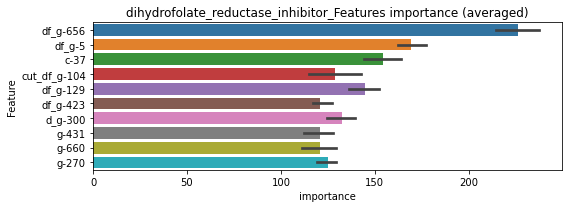

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000410696	valid_1's binary_logloss: 0.006103


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000426632	valid_1's binary_logloss: 0.00482623


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000405367	valid_1's binary_logloss: 0.000979461
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000405367	valid_1's binary_logloss: 0.000979461


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00040663	valid_1's binary_logloss: 0.0014055
Early stopping, best iteration is:
[1067]	training's binary_logloss: 0.000403481	valid_1's binary_logloss: 0.00140072


dihydrofolate_reductase_inhibitor logloss: 0.00333004271964584
dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000357403	valid_1's binary_logloss: 0.00254559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000356851	valid_1's binary_logloss: 0.00198374
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000359962	valid_1's binary_logloss: 0.000809725
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023813, Threshold: 0.0099776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0099776, conf_0:0.00698, conf_1:0.01297
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.0399776


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00037487	valid_1's binary_logloss: 0.00508198


threshold: 0.0399776, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000343756	valid_1's binary_logloss: 0.00198769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000354557	valid_1's binary_logloss: 0.00135106
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000346586	valid_1's binary_logloss: 0.000844243
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0776905, Threshold: 0.0399776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0070316 Vs.target_rate: 0.00105
Num_p_label: 28.0, Expected: 4.2, Threshold: 0.0399776, conf_0:0.03198, conf_1:0.04797
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_1: 0.0699776
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_2: 0.0999776
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_3: 0.1299776


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000356085	valid_1's binary_logloss: 0.00377326


Num_p_label: 6.0, Expected: 4.2, Adj_threshold_4: 0.1599776
threshold: 0.1599776, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000343756	valid_1's binary_logloss: 0.00198769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000354557	valid_1's binary_logloss: 0.00135106
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000346586	valid_1's binary_logloss: 0.000844243
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0776905, Threshold: 0.1599776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00105
Num_p_label: 6.0, Expected: 4.2, Threshold: 0.1599776, conf_0:0.14398, conf_1:0.17598


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000356085	valid_1's binary_logloss: 0.00377326


threshold: 0.1599776, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


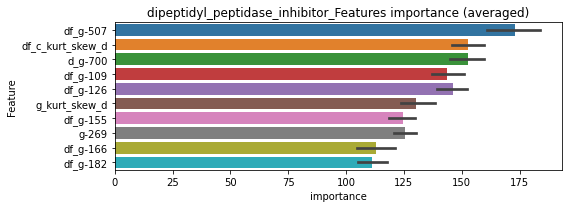

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[951]	training's binary_logloss: 0.00034223	valid_1's binary_logloss: 0.0018921


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000346128	valid_1's binary_logloss: 0.00153593


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000359327	valid_1's binary_logloss: 0.000874061


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000355234	valid_1's binary_logloss: 0.00374129


dipeptidyl_peptidase_inhibitor logloss: 0.0020110506386375147
diuretic, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000176586	valid_1's binary_logloss: 0.0039209
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00017455	valid_1's binary_logloss: 0.00180481
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000174989	valid_1's binary_logloss: 0.000211316
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004962, Threshold: 0.0018108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0018108, conf_0:0.00127, conf_1:0.00235
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0318108
threshold: 0.0318108, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000174616	valid_1's binary_logloss: 0.000231277


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000159569	valid_1's binary_logloss: 0.000572149
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000161226	valid_1's binary_logloss: 0.0049452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000161364	valid_1's binary_logloss: 0.000172873
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0101109, Threshold: 0.0318108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00025
Num_p_label: 8.0, Expected: 1.0, Threshold: 0.0318108, conf_0:0.02545, conf_1:0.03817
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.0618108
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0918108
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.1218108
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.1518108
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_5: 0.1818108


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000160219	valid_1's binary_logloss: 0.000184657


threshold: 0.1818108, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000159569	valid_1's binary_logloss: 0.000572149
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000161226	valid_1's binary_logloss: 0.0049452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000161364	valid_1's binary_logloss: 0.000172873
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0101109, Threshold: 0.1818108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.1818108, conf_0:0.16363, conf_1:0.19999
threshold: 0.1818108, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000160219	valid_1's binary_logloss: 0.000184657


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


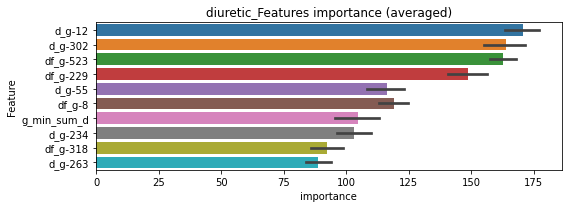

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000164069	valid_1's binary_logloss: 0.000319883


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Early stopping, best iteration is:
[1152]	training's binary_logloss: 0.000162183	valid_1's binary_logloss: 0.000318075
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000165054	valid_1's binary_logloss: 0.00235939
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000164636	valid_1's binary_logloss: 0.00235822


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000166179	valid_1's binary_logloss: 0.000188481


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Early stopping, best iteration is:
[1128]	training's binary_logloss: 0.000164493	valid_1's binary_logloss: 0.000186657
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000165567	valid_1's binary_logloss: 0.000197641
Early stopping, best iteration is:
[1130]	training's binary_logloss: 0.000163923	valid_1's binary_logloss: 0.000195655


diuretic logloss: 0.0007645727538288503
dna_alkylating_agent, len(trt): 48, len(othr): 3285
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3285


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000487165	valid_1's binary_logloss: 0.012756
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000494882	valid_1's binary_logloss: 0.0167968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000502488	valid_1's binary_logloss: 0.0030484
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.00048914	valid_1's binary_logloss: 0.0142329


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037524, Threshold: 0.0855297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0855297, conf_0:0.05987, conf_1:0.11119
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_1: 0.1155297
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_2: 0.1455297
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_3: 0.1755297
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_4: 0.2055297
threshold: 0.2055297, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000497674	valid_1's binary_logloss: 0.0125171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000485036	valid_1's binary_logloss: 0.0131483
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000482282	valid_1's binary_logloss: 0.00338707
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000494534	valid_1's binary_logloss: 0.0131269


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0745539, Threshold: 0.2055297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0183325 Vs.target_rate: 0.00202
Num_p_label: 73.0, Expected: 8.0, Threshold: 0.2055297, conf_0:0.16442, conf_1:0.24664
Num_p_label: 68.0, Expected: 8.0, Adj_threshold_1: 0.2355297
Num_p_label: 65.0, Expected: 8.0, Adj_threshold_2: 0.2655297
Num_p_label: 61.0, Expected: 8.0, Adj_threshold_3: 0.2955297
Num_p_label: 61.0, Expected: 8.0, Adj_threshold_4: 0.3255297
Num_p_label: 58.0, Expected: 8.0, Adj_threshold_5: 0.3555297
Num_p_label: 55.0, Expected: 8.0, Adj_threshold_6: 0.3855297
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_7: 0.4155297
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_8: 0.4455297
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_9: 0.4755297
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_10: 0.5055297
threshold: 0.5055297, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000474829	valid_1's binary_logloss: 0.0162652
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000495703	valid_1's binary_logloss: 0.00641886
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000486554	valid_1's binary_logloss: 0.00614384
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000485481	valid_1's binary_logloss: 0.0060295


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0748767, Threshold: 0.5055297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0153189 Vs.target_rate: 0.00202
Num_p_label: 61.0, Expected: 8.0, Threshold: 0.5055297, conf_0:0.45498, conf_1:0.55608
Num_p_label: 57.0, Expected: 8.0, Adj_threshold_1: 0.5355297
Num_p_label: 56.0, Expected: 8.0, Adj_threshold_2: 0.5655297
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_3: 0.5955297
Num_p_label: 52.0, Expected: 8.0, Adj_threshold_4: 0.6255297
Num_p_label: 47.0, Expected: 8.0, Adj_threshold_5: 0.6555297
Num_p_label: 43.0, Expected: 8.0, Adj_threshold_6: 0.6855297
Num_p_label: 42.0, Expected: 8.0, Adj_threshold_7: 0.7155297
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_8: 0.7455297
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_9: 0.7755297
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_10: 0.8055297
threshold: 0.8055297, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_la

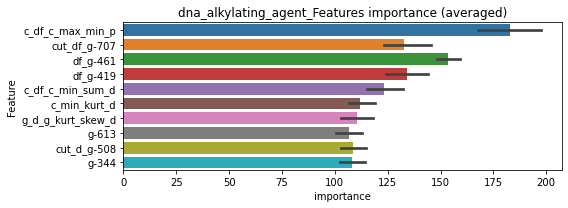

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000475025	valid_1's binary_logloss: 0.00780346


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.00049257	valid_1's binary_logloss: 0.00683704


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000480411	valid_1's binary_logloss: 0.00671822


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00046014	valid_1's binary_logloss: 0.00411668
Early stopping, best iteration is:
[1044]	training's binary_logloss: 0.000454717	valid_1's binary_logloss: 0.00410006


dna_alkylating_agent logloss: 0.006365895865226023


mutually exclusive columns: dna_inhibitor


dna_inhibitor, len(trt): 402, len(othr): 7073
target_rate: 0.0168808 → Adj_target_rate: 0.0137338


selected negative label: 7073


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0852563	valid_1's binary_logloss: 0.187922
[2000]	training's binary_logloss: 0.0429199	valid_1's binary_logloss: 0.165038
Early stopping, best iteration is:
[2384]	training's binary_logloss: 0.0356264	valid_1's binary_logloss: 0.161656
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0844897	valid_1's binary_logloss: 0.200466
[2000]	training's binary_logloss: 0.0425898	valid_1's binary_logloss: 0.181855
Early stopping, best iteration is:
[2092]	training's binary_logloss: 0.0406339	valid_1's binary_logloss: 0.180892
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.085102	valid_1's binary_logloss: 0.1846
[2000]	training's binary_logloss: 0.0431527	valid_1's binary_logloss: 0.165215
Early stopping, best iteration is:
[2301]	training's binary_logloss: 0.0371197	valid_1's binary_logloss: 0.162193
Trai

1 / 3, AUC score:0.948, PR-AUC:0.911
y_Threshold: 0.0975870, Threshold: 0.2010714, pos_neg_ratio: 0.8000000
Remove_noisy_data: 656 → Positive_corect_labels: 1228/7831
p_label_rate: 0.0100452 Vs.target_rate: 0.01688
Num_p_label: 40.0, Expected: 67.2, Threshold: 0.2010714, conf_0:0.14075, conf_1:0.26139
threshold: 0.2010714, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1228.0/7831, y_label_rate: 0.1568127
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0587134	valid_1's binary_logloss: 0.128232
[2000]	training's binary_logloss: 0.0289909	valid_1's binary_logloss: 0.10444
[3000]	training's binary_logloss: 0.0189556	valid_1's binary_logloss: 0.0966423
Early stopping, best iteration is:
[3456]	training's binary_logloss: 0.0163113	valid_1's binary_logloss: 0.094405
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0585316	valid_1's binary_logloss: 0.131597
[2000]	training's binary_logloss: 0.0288999	valid_1's binary_logloss: 0.105828
[3000]	training's binary_logloss: 0.0188399	valid_1's binary_logloss: 0.0971687
Early stopping, best iteration is:
[3004]	training's binary_logloss: 0.0188148	valid_1's binary_logloss: 0.0971421
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0603378	valid_1's binary_logloss: 0.118236
[2000]	training's binary_logloss: 

2 / 3, AUC score:0.995, PR-AUC:0.983
y_Threshold: 0.1121598, Threshold: 0.2010714, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 1156.0/7687
p_label_rate: 0.0113009 Vs.target_rate: 0.01688
Num_p_label: 45.0, Expected: 67.2, Threshold: 0.2010714, conf_0:0.16086, conf_1:0.24129
threshold: 0.2010714, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 1156.0/7687, y_label_rate: 0.1503838
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0509101	valid_1's binary_logloss: 0.113107
[2000]	training's binary_logloss: 0.0247551	valid_1's binary_logloss: 0.0894964
[3000]	training's binary_logloss: 0.0161793	valid_1's binary_logloss: 0.0817818
Early stopping, best iteration is:
[3581]	training's binary_logloss: 0.0133965	valid_1's binary_logloss: 0.0792954
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0507103	valid_1's binary_logloss: 0.115104
[2000]	training's binary_logloss: 0.0247143	valid_1's binary_logloss: 0.0927777
[3000]	training's binary_logloss: 0.0162055	valid_1's binary_logloss: 0.0860136
Early stopping, best iteration is:
[3773]	training's binary_logloss: 0.0127039	valid_1's binary_logloss: 0.0830858
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0518275	valid_1's binary_logloss: 0.104616
[2000]	training's binary_loglo

3 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0977590, Threshold: 0.2010714, pos_neg_ratio: 0.8000000
Remove_noisy_data: 80 → Positive_corect_labels: 1116.0/7607
p_label_rate: 0.0130588 Vs.target_rate: 0.01688
Num_p_label: 52.0, Expected: 67.2, Threshold: 0.2010714, conf_0:0.18096, conf_1:0.22118
threshold: 0.2010714, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 1116.0/7607, y_label_rate: 0.1467070


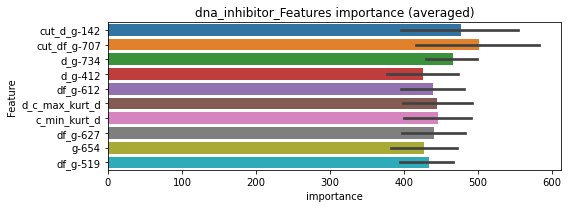

len(train_index) : 5705
len(valid_index) : 1902
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.049617	valid_1's binary_logloss: 0.0880744
[2000]	training's binary_logloss: 0.0249581	valid_1's binary_logloss: 0.0660313
[3000]	training's binary_logloss: 0.0164096	valid_1's binary_logloss: 0.0579656
[4000]	training's binary_logloss: 0.0121941	valid_1's binary_logloss: 0.0537881
Early stopping, best iteration is:
[4837]	training's binary_logloss: 0.0100473	valid_1's binary_logloss: 0.0515245


len(train_index) : 5705
len(valid_index) : 1902
================================= fold 2/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0477867	valid_1's binary_logloss: 0.099357
[2000]	training's binary_logloss: 0.0242139	valid_1's binary_logloss: 0.0766358
[3000]	training's binary_logloss: 0.015934	valid_1's binary_logloss: 0.0682003
[4000]	training's binary_logloss: 0.0118176	valid_1's binary_logloss: 0.0639421
Early stopping, best iteration is:
[4487]	training's binary_logloss: 0.0105298	valid_1's binary_logloss: 0.0625991


len(train_index) : 5705
len(valid_index) : 1902
================================= fold 3/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0490472	valid_1's binary_logloss: 0.0991591
[2000]	training's binary_logloss: 0.024642	valid_1's binary_logloss: 0.0750402
[3000]	training's binary_logloss: 0.0162579	valid_1's binary_logloss: 0.066349
[4000]	training's binary_logloss: 0.0120961	valid_1's binary_logloss: 0.0616916
Early stopping, best iteration is:
[4294]	training's binary_logloss: 0.0112624	valid_1's binary_logloss: 0.0609122


len(train_index) : 5706
len(valid_index) : 1901
================================= fold 4/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0491038	valid_1's binary_logloss: 0.0944198
[2000]	training's binary_logloss: 0.0246566	valid_1's binary_logloss: 0.0721409
[3000]	training's binary_logloss: 0.016252	valid_1's binary_logloss: 0.0643237
Early stopping, best iteration is:
[3585]	training's binary_logloss: 0.0135518	valid_1's binary_logloss: 0.0618588


dna_inhibitor logloss: 0.05922328604794142
dna_inhibitor is unpredictable(><)!


mutually exclusive columns: dopamine_receptor_agonist


dopamine_receptor_agonist, len(trt): 121, len(othr): 2089
target_rate: 0.0050810 → Adj_target_rate: 0.0049495


selected negative label: 2089


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0862574	valid_1's binary_logloss: 0.228899
Early stopping, best iteration is:
[1743]	training's binary_logloss: 0.0513163	valid_1's binary_logloss: 0.210954
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0950128	valid_1's binary_logloss: 0.170691
[2000]	training's binary_logloss: 0.049384	valid_1's binary_logloss: 0.133599
[3000]	training's binary_logloss: 0.0327077	valid_1's binary_logloss: 0.119062
[4000]	training's binary_logloss: 0.0242659	valid_1's binary_logloss: 0.111739
Early stopping, best iteration is:
[4171]	training's binary_logloss: 0.0232339	valid_1's binary_logloss: 0.110759
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0937011	valid_1's binary_logloss: 0.183461
[2000]	training's binary_logloss: 0.0492475	valid_1's binary_logloss: 0.148021
[3000]	training's binary_logloss: 0.0

1 / 3, AUC score:0.963, PR-AUC:0.929
y_Threshold: 0.1001035, Threshold: 0.1802690, pos_neg_ratio: 0.8000000
Remove_noisy_data: 177 → Positive_corect_labels: 371/2329
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, Expected: 20.2, Threshold: 0.1802690, conf_0:0.12619, conf_1:0.23435
Num_p_label: 28.0, Expected: 20.2, Adj_threshold_1: 0.2102690
threshold: 0.2102690, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 371.0/2329, y_label_rate: 0.1592958
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.069618	valid_1's binary_logloss: 0.163632
[2000]	training's binary_logloss: 0.0354283	valid_1's binary_logloss: 0.135639
[3000]	training's binary_logloss: 0.0234755	valid_1's binary_logloss: 0.125794
Early stopping, best iteration is:
[3163]	training's binary_logloss: 0.022229	valid_1's binary_logloss: 0.124538
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0732018	valid_1's binary_logloss: 0.145313
[2000]	training's binary_logloss: 0.0375187	valid_1's binary_logloss: 0.114995
[3000]	training's binary_logloss: 0.0248094	valid_1's binary_logloss: 0.102399
Early stopping, best iteration is:
[3560]	training's binary_logloss: 0.0207675	valid_1's binary_logloss: 0.0986355
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0725516	valid_1's binary_logloss: 0.147298
[2000]	training's binary_logloss: 0.0

2 / 3, AUC score:0.994, PR-AUC:0.984
y_Threshold: 0.1126211, Threshold: 0.2102690, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 350.0/2287
p_label_rate: 0.0090407 Vs.target_rate: 0.00508
Num_p_label: 36.0, Expected: 20.2, Threshold: 0.2102690, conf_0:0.16822, conf_1:0.25232
Num_p_label: 22.0, Expected: 20.2, Adj_threshold_1: 0.2402690
threshold: 0.2402690, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 350.0/2287, y_label_rate: 0.1530389
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0632352	valid_1's binary_logloss: 0.144704
[2000]	training's binary_logloss: 0.0320684	valid_1's binary_logloss: 0.120117
[3000]	training's binary_logloss: 0.0213617	valid_1's binary_logloss: 0.110337
Early stopping, best iteration is:
[3560]	training's binary_logloss: 0.0179609	valid_1's binary_logloss: 0.107424
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0658633	valid_1's binary_logloss: 0.130885
[2000]	training's binary_logloss: 0.0333729	valid_1's binary_logloss: 0.101776
[3000]	training's binary_logloss: 0.0220636	valid_1's binary_logloss: 0.0920004
Early stopping, best iteration is:
[3253]	training's binary_logloss: 0.0203081	valid_1's binary_logloss: 0.090304
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0670469	valid_1's binary_logloss: 0.118317
[2000]	training's binary_logloss: 0

3 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.1029543, Threshold: 0.2402690, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 341.0/2269
p_label_rate: 0.0052737 Vs.target_rate: 0.00508
Num_p_label: 21.0, Expected: 20.2, Threshold: 0.2402690, conf_0:0.21624, conf_1:0.26430
threshold: 0.2402690, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 341.0/2269, y_label_rate: 0.1502865


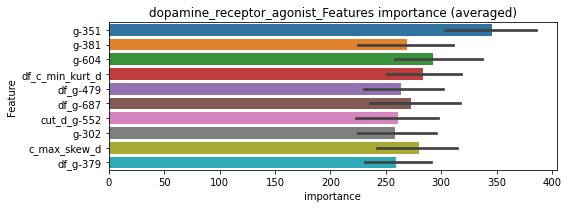

len(train_index) : 1701
len(valid_index) : 568
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0701922	valid_1's binary_logloss: 0.117757
[2000]	training's binary_logloss: 0.0361773	valid_1's binary_logloss: 0.0838192
[3000]	training's binary_logloss: 0.0240704	valid_1's binary_logloss: 0.0709196
[4000]	training's binary_logloss: 0.018065	valid_1's binary_logloss: 0.0639568
[5000]	training's binary_logloss: 0.0144599	valid_1's binary_logloss: 0.0594473
[6000]	training's binary_logloss: 0.0120532	valid_1's binary_logloss: 0.0563842
[7000]	training's binary_logloss: 0.0103654	valid_1's binary_logloss: 0.0540922
[8000]	training's binary_logloss: 0.00909439	valid_1's binary_logloss: 0.0523454
[9000]	training's binary_logloss: 0.00810661	valid_1's binary_logloss: 0.0509066
[10000]	training's binary_logloss: 0.00732754	valid_1's binary_logloss: 0.0497541
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00732754	valid_1's binary_logloss: 0.0497541


len(train_index) : 1702
len(valid_index) : 567
================================= fold 2/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0672319	valid_1's binary_logloss: 0.143152
[2000]	training's binary_logloss: 0.0347231	valid_1's binary_logloss: 0.110941
[3000]	training's binary_logloss: 0.0231332	valid_1's binary_logloss: 0.0984069
[4000]	training's binary_logloss: 0.0173287	valid_1's binary_logloss: 0.0915147
Early stopping, best iteration is:
[4043]	training's binary_logloss: 0.0171388	valid_1's binary_logloss: 0.0912894


len(train_index) : 1702
len(valid_index) : 567
================================= fold 3/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0681585	valid_1's binary_logloss: 0.13739
[2000]	training's binary_logloss: 0.0352696	valid_1's binary_logloss: 0.103002
[3000]	training's binary_logloss: 0.0235397	valid_1's binary_logloss: 0.0899427
[4000]	training's binary_logloss: 0.0176203	valid_1's binary_logloss: 0.0823477
[5000]	training's binary_logloss: 0.0140909	valid_1's binary_logloss: 0.0777956
[6000]	training's binary_logloss: 0.0117554	valid_1's binary_logloss: 0.0747778
Early stopping, best iteration is:
[6814]	training's binary_logloss: 0.0103737	valid_1's binary_logloss: 0.0728627


len(train_index) : 1702
len(valid_index) : 567
================================= fold 4/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0696894	valid_1's binary_logloss: 0.134791
[2000]	training's binary_logloss: 0.0356097	valid_1's binary_logloss: 0.10109
[3000]	training's binary_logloss: 0.0236556	valid_1's binary_logloss: 0.0889522
[4000]	training's binary_logloss: 0.0177072	valid_1's binary_logloss: 0.0830001
Early stopping, best iteration is:
[4101]	training's binary_logloss: 0.0172702	valid_1's binary_logloss: 0.0824262


dopamine_receptor_agonist logloss: 0.07407237650928476
dopamine_receptor_agonist is unpredictable(><)!


mutually exclusive columns: dopamine_receptor_antagonist


dopamine_receptor_antagonist, len(trt): 424, len(othr): 7314
target_rate: 0.0178047 → Adj_target_rate: 0.0143701


selected negative label: 7314


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0901252	valid_1's binary_logloss: 0.200136
[2000]	training's binary_logloss: 0.0456126	valid_1's binary_logloss: 0.18128
Early stopping, best iteration is:
[2325]	training's binary_logloss: 0.038812	valid_1's binary_logloss: 0.178827
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0898366	valid_1's binary_logloss: 0.191407
[2000]	training's binary_logloss: 0.0456675	valid_1's binary_logloss: 0.168994
Early stopping, best iteration is:
[2610]	training's binary_logloss: 0.0343053	valid_1's binary_logloss: 0.163477
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0890468	valid_1's binary_logloss: 0.204407
[2000]	training's binary_logloss: 0.0454463	valid_1's binary_logloss: 0.184818
Early stopping, best iteration is:
[2092]	training's binary_logloss: 0.0433487	valid_1's binary_logloss: 0.183811
Tra

1 / 3, AUC score:0.939, PR-AUC:0.897
y_Threshold: 0.1001217, Threshold: 0.1901414, pos_neg_ratio: 0.8000000
Remove_noisy_data: 736 → Positive_corect_labels: 1241/8040
p_label_rate: 0.0100452 Vs.target_rate: 0.01780
Num_p_label: 40.0, Expected: 70.9, Threshold: 0.1901414, conf_0:0.13310, conf_1:0.24718
threshold: 0.1901414, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1241.0/8040, y_label_rate: 0.1543532
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0599644	valid_1's binary_logloss: 0.13243
[2000]	training's binary_logloss: 0.0298489	valid_1's binary_logloss: 0.104814
[3000]	training's binary_logloss: 0.0193752	valid_1's binary_logloss: 0.0946526
Early stopping, best iteration is:
[3781]	training's binary_logloss: 0.0151408	valid_1's binary_logloss: 0.0908108
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0605636	valid_1's binary_logloss: 0.132743
[2000]	training's binary_logloss: 0.0298882	valid_1's binary_logloss: 0.106876
Early stopping, best iteration is:
[2741]	training's binary_logloss: 0.0213225	valid_1's binary_logloss: 0.0998587
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0615838	valid_1's binary_logloss: 0.114844
[2000]	training's binary_logloss: 0.0306832	valid_1's binary_logloss: 0.0870992
[3000]	training's binary_logloss:

2 / 3, AUC score:0.995, PR-AUC:0.987
y_Threshold: 0.1114313, Threshold: 0.1901414, pos_neg_ratio: 0.8000000
Remove_noisy_data: 122 → Positive_corect_labels: 1180.0/7918
p_label_rate: 0.0130588 Vs.target_rate: 0.01780
Num_p_label: 52.0, Expected: 70.9, Threshold: 0.1901414, conf_0:0.15211, conf_1:0.22817
threshold: 0.1901414, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 1180.0/7918, y_label_rate: 0.1490275
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0537191	valid_1's binary_logloss: 0.122234
[2000]	training's binary_logloss: 0.0266297	valid_1's binary_logloss: 0.10028
Early stopping, best iteration is:
[2943]	training's binary_logloss: 0.0177665	valid_1's binary_logloss: 0.0932552
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0538388	valid_1's binary_logloss: 0.113481
[2000]	training's binary_logloss: 0.0266557	valid_1's binary_logloss: 0.087778
Early stopping, best iteration is:
[2938]	training's binary_logloss: 0.0177262	valid_1's binary_logloss: 0.0786972
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0561636	valid_1's binary_logloss: 0.10206
[2000]	training's binary_logloss: 0.0277719	valid_1's binary_logloss: 0.0746458
[3000]	training's binary_logloss: 0.0180859	valid_1's binary_logloss: 0.0647053
[4000]	training's binary_logloss: 

3 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.1093423, Threshold: 0.1901414, pos_neg_ratio: 0.8000000
Remove_noisy_data: 82 → Positive_corect_labels: 1139.0/7836
p_label_rate: 0.0105475 Vs.target_rate: 0.01780
Num_p_label: 42.0, Expected: 70.9, Threshold: 0.1901414, conf_0:0.17113, conf_1:0.20916
threshold: 0.1901414, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 1139.0/7836, y_label_rate: 0.1453548


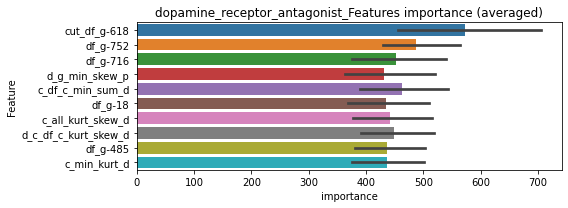

len(train_index) : 5877
len(valid_index) : 1959
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0544145	valid_1's binary_logloss: 0.103403
[2000]	training's binary_logloss: 0.027497	valid_1's binary_logloss: 0.0782949
[3000]	training's binary_logloss: 0.0181332	valid_1's binary_logloss: 0.068706
[4000]	training's binary_logloss: 0.0134784	valid_1's binary_logloss: 0.0639179
[5000]	training's binary_logloss: 0.0107206	valid_1's binary_logloss: 0.0608826
Early stopping, best iteration is:
[5199]	training's binary_logloss: 0.0102922	valid_1's binary_logloss: 0.0603452


len(train_index) : 5877
len(valid_index) : 1959
================================= fold 2/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0539473	valid_1's binary_logloss: 0.112036
[2000]	training's binary_logloss: 0.027234	valid_1's binary_logloss: 0.0861607
[3000]	training's binary_logloss: 0.017995	valid_1's binary_logloss: 0.0764989
Early stopping, best iteration is:
[3228]	training's binary_logloss: 0.0167049	valid_1's binary_logloss: 0.0749707


len(train_index) : 5877
len(valid_index) : 1959
================================= fold 3/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0545192	valid_1's binary_logloss: 0.105814
[2000]	training's binary_logloss: 0.0275679	valid_1's binary_logloss: 0.0798539
[3000]	training's binary_logloss: 0.0182533	valid_1's binary_logloss: 0.0702085
[4000]	training's binary_logloss: 0.0135776	valid_1's binary_logloss: 0.065181
Early stopping, best iteration is:
[4256]	training's binary_logloss: 0.0127353	valid_1's binary_logloss: 0.0642185


len(train_index) : 5877
len(valid_index) : 1959
================================= fold 4/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0545505	valid_1's binary_logloss: 0.106216
[2000]	training's binary_logloss: 0.0273956	valid_1's binary_logloss: 0.0825941
[3000]	training's binary_logloss: 0.0181475	valid_1's binary_logloss: 0.0742607
Early stopping, best iteration is:
[3784]	training's binary_logloss: 0.0143366	valid_1's binary_logloss: 0.0710485


dopamine_receptor_antagonist logloss: 0.06764570619952885
dopamine_receptor_antagonist is unpredictable(><)!


mutually exclusive columns: egfr_inhibitor


egfr_inhibitor, len(trt): 336, len(othr): 7554
target_rate: 0.0141093 → Adj_target_rate: 0.0117920


selected negative label: 7554


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0791464	valid_1's binary_logloss: 0.166359
[2000]	training's binary_logloss: 0.0394388	valid_1's binary_logloss: 0.134697
[3000]	training's binary_logloss: 0.0255891	valid_1's binary_logloss: 0.123718
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.0209028	valid_1's binary_logloss: 0.120091
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0795513	valid_1's binary_logloss: 0.162673
[2000]	training's binary_logloss: 0.0395598	valid_1's binary_logloss: 0.129616
[3000]	training's binary_logloss: 0.0255616	valid_1's binary_logloss: 0.117399
Early stopping, best iteration is:
[3819]	training's binary_logloss: 0.0196806	valid_1's binary_logloss: 0.112271
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0784039	valid_1's binary_logloss: 0.174182
[2000]	training's binary_logloss: 0.

1 / 3, AUC score:0.973, PR-AUC:0.950
y_Threshold: 0.0834866, Threshold: 0.2000396, pos_neg_ratio: 0.8000000
Remove_noisy_data: 537 → Positive_corect_labels: 1393/8527
p_label_rate: 0.0100452 Vs.target_rate: 0.01411
Num_p_label: 40.0, Expected: 56.2, Threshold: 0.2000396, conf_0:0.14003, conf_1:0.26005
threshold: 0.2000396, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1393.0/8527, y_label_rate: 0.1633634
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0643776	valid_1's binary_logloss: 0.133734
[2000]	training's binary_logloss: 0.0312194	valid_1's binary_logloss: 0.100865
[3000]	training's binary_logloss: 0.0201829	valid_1's binary_logloss: 0.0886728
Early stopping, best iteration is:
[3360]	training's binary_logloss: 0.0178924	valid_1's binary_logloss: 0.0860111
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0634497	valid_1's binary_logloss: 0.143241
[2000]	training's binary_logloss: 0.0307276	valid_1's binary_logloss: 0.110755
[3000]	training's binary_logloss: 0.0198577	valid_1's binary_logloss: 0.0993609
Early stopping, best iteration is:
[3953]	training's binary_logloss: 0.014804	valid_1's binary_logloss: 0.0937005
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0650235	valid_1's binary_logloss: 0.126383
[2000]	training's binary_logloss:

2 / 3, AUC score:0.994, PR-AUC:0.986
y_Threshold: 0.1281585, Threshold: 0.2000396, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 1314.0/8369
p_label_rate: 0.0180814 Vs.target_rate: 0.01411
Num_p_label: 72.0, Expected: 56.2, Threshold: 0.2000396, conf_0:0.16003, conf_1:0.24005
threshold: 0.2000396, positive_p_label: 72.0/3982, p_label_rate: 0.0180814
positive_y_label: 1314.0/8369, y_label_rate: 0.1570080
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0586255	valid_1's binary_logloss: 0.115129
[2000]	training's binary_logloss: 0.0282839	valid_1's binary_logloss: 0.0807463
[3000]	training's binary_logloss: 0.0183299	valid_1's binary_logloss: 0.0677563
[4000]	training's binary_logloss: 0.0135029	valid_1's binary_logloss: 0.061022
[5000]	training's binary_logloss: 0.0106589	valid_1's binary_logloss: 0.0565024
[6000]	training's binary_logloss: 0.00882623	valid_1's binary_logloss: 0.0533322
Early stopping, best iteration is:
[6030]	training's binary_logloss: 0.00877781	valid_1's binary_logloss: 0.0532081
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.058582	valid_1's binary_logloss: 0.122425
[2000]	training's binary_logloss: 0.0284563	valid_1's binary_logloss: 0.0888237
[3000]	training's binary_logloss: 0.0183716	valid_1's binary_logloss: 0.0758282
[4000]	training's binary_logloss: 0.0135737	v

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.1328992, Threshold: 0.2000396, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 1285.0/8311
p_label_rate: 0.0180814 Vs.target_rate: 0.01411
Num_p_label: 72.0, Expected: 56.2, Threshold: 0.2000396, conf_0:0.18004, conf_1:0.22004
threshold: 0.2000396, positive_p_label: 72.0/3982, p_label_rate: 0.0180814
positive_y_label: 1285.0/8311, y_label_rate: 0.1546144


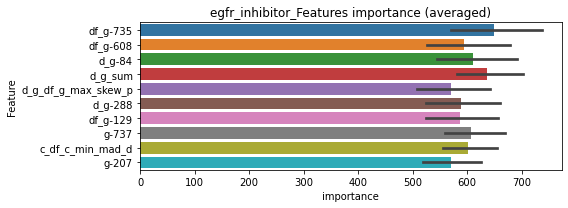

len(train_index) : 6233
len(valid_index) : 2078
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0592737	valid_1's binary_logloss: 0.134267
[2000]	training's binary_logloss: 0.0294594	valid_1's binary_logloss: 0.101587
[3000]	training's binary_logloss: 0.0193402	valid_1's binary_logloss: 0.0890358
[4000]	training's binary_logloss: 0.0142766	valid_1's binary_logloss: 0.08233
Early stopping, best iteration is:
[4835]	training's binary_logloss: 0.0117279	valid_1's binary_logloss: 0.0787931


len(train_index) : 6233
len(valid_index) : 2078
================================= fold 2/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0615361	valid_1's binary_logloss: 0.113975
[2000]	training's binary_logloss: 0.0304529	valid_1's binary_logloss: 0.0813969
[3000]	training's binary_logloss: 0.0199636	valid_1's binary_logloss: 0.0688498
[4000]	training's binary_logloss: 0.0147718	valid_1's binary_logloss: 0.0620191
Early stopping, best iteration is:
[4552]	training's binary_logloss: 0.012909	valid_1's binary_logloss: 0.059663


len(train_index) : 6233
len(valid_index) : 2078
================================= fold 3/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0612241	valid_1's binary_logloss: 0.115028
[2000]	training's binary_logloss: 0.0301777	valid_1's binary_logloss: 0.0835123
[3000]	training's binary_logloss: 0.0197947	valid_1's binary_logloss: 0.0715425
[4000]	training's binary_logloss: 0.0146678	valid_1's binary_logloss: 0.065046
Early stopping, best iteration is:
[4502]	training's binary_logloss: 0.012966	valid_1's binary_logloss: 0.0626494


len(train_index) : 6234
len(valid_index) : 2077
================================= fold 4/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0607518	valid_1's binary_logloss: 0.122791
[2000]	training's binary_logloss: 0.0301475	valid_1's binary_logloss: 0.0895101
[3000]	training's binary_logloss: 0.0196886	valid_1's binary_logloss: 0.0765557
[4000]	training's binary_logloss: 0.0145779	valid_1's binary_logloss: 0.0698092
[5000]	training's binary_logloss: 0.0115681	valid_1's binary_logloss: 0.0655889
Early stopping, best iteration is:
[5446]	training's binary_logloss: 0.010595	valid_1's binary_logloss: 0.0641077


egfr_inhibitor logloss: 0.06630355613502605
egfr_inhibitor is unpredictable(><)!
elastase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000232452	valid_1's binary_logloss: 0.000859439
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000230216	valid_1's binary_logloss: 0.000734649
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00023171	valid_1's binary_logloss: 0.000380352
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008658, Threshold: 0.0027007, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0027007, conf_0:0.00189, conf_1:0.00351
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0327007
threshold: 0.0327007, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000228512	valid_1's binary_logloss: 0.00134341


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000220194	valid_1's binary_logloss: 0.00163004
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000244861	valid_1's binary_logloss: 0.00111289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000222787	valid_1's binary_logloss: 0.000296913
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0676233, Threshold: 0.0327007, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0327007, conf_0:0.02616, conf_1:0.03924
threshold: 0.0327007, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000218347	valid_1's binary_logloss: 0.00109631


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000220194	valid_1's binary_logloss: 0.00163004
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000244861	valid_1's binary_logloss: 0.00111289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000222787	valid_1's binary_logloss: 0.000296913
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0676233, Threshold: 0.0327007, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0327007, conf_0:0.02943, conf_1:0.03597
threshold: 0.0327007, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000218347	valid_1's binary_logloss: 0.00109631


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


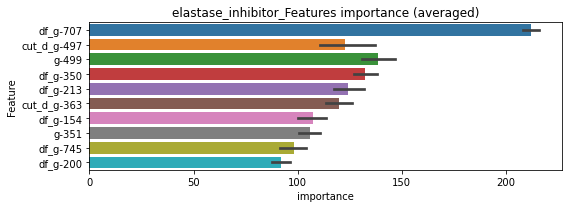

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000230819	valid_1's binary_logloss: 0.000877822
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000230752	valid_1's binary_logloss: 0.000808727
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000231395	valid_1's binary_logloss: 0.000304327


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


elastase_inhibitor logloss: 0.0006665683270342578


Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000225171	valid_1's binary_logloss: 0.00067398


erbb2_inhibitor, len(trt): 20, len(othr): 3286
target_rate: 0.0008398 → Adj_target_rate: 0.0010717


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000362937	valid_1's binary_logloss: 0.00277857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000322508	valid_1's binary_logloss: 0.0025593
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000324188	valid_1's binary_logloss: 0.000841975
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020080, Threshold: 0.0065932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00084
Num_p_label: 40.0, Expected: 3.3, Threshold: 0.0065932, conf_0:0.00462, conf_1:0.00857
Num_p_label: 4.0, Expected: 3.3, Adj_threshold_1: 0.0365932


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000328764	valid_1's binary_logloss: 0.000908318


threshold: 0.0365932, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000352071	valid_1's binary_logloss: 0.00246753
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000314666	valid_1's binary_logloss: 0.00141527
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000312086	valid_1's binary_logloss: 0.000604999
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0483456, Threshold: 0.0365932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00084
Num_p_label: 18.0, Expected: 3.3, Threshold: 0.0365932, conf_0:0.02927, conf_1:0.04391
Num_p_label: 8.0, Expected: 3.3, Adj_threshold_1: 0.0665932


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000317872	valid_1's binary_logloss: 0.000829814


threshold: 0.0665932, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000352071	valid_1's binary_logloss: 0.00246753
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000314666	valid_1's binary_logloss: 0.00141527
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000312086	valid_1's binary_logloss: 0.000604999
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0483456, Threshold: 0.0665932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00084
Num_p_label: 8.0, Expected: 3.3, Threshold: 0.0665932, conf_0:0.05993, conf_1:0.07325


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000317872	valid_1's binary_logloss: 0.000829814


threshold: 0.0665932, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


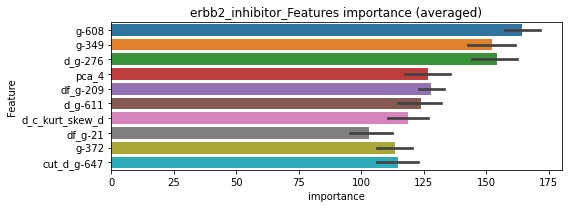

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 erbb2_inhibitor=================================


Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000344559	valid_1's binary_logloss: 0.00308952
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000312024	valid_1's binary_logloss: 0.00105078
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000312024	valid_1's binary_logloss: 0.00105078


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0003129	valid_1's binary_logloss: 0.00062523
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.0003129	valid_1's binary_logloss: 0.00062523


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00031564	valid_1's binary_logloss: 0.000836686
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000315133	valid_1's binary_logloss: 0.000835913


erbb2_inhibitor logloss: 0.0014005093208885964


mutually exclusive columns: estrogen_receptor_agonist


estrogen_receptor_agonist, len(trt): 158, len(othr): 3996
target_rate: 0.0066348 → Adj_target_rate: 0.0062095


selected negative label: 3996


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0667961	valid_1's binary_logloss: 0.131594
[2000]	training's binary_logloss: 0.0343441	valid_1's binary_logloss: 0.110084
[3000]	training's binary_logloss: 0.0224995	valid_1's binary_logloss: 0.102356
Early stopping, best iteration is:
[3888]	training's binary_logloss: 0.0171216	valid_1's binary_logloss: 0.0989075
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0643925	valid_1's binary_logloss: 0.143069
[2000]	training's binary_logloss: 0.0330897	valid_1's binary_logloss: 0.122872
[3000]	training's binary_logloss: 0.0218215	valid_1's binary_logloss: 0.115791
Early stopping, best iteration is:
[3062]	training's binary_logloss: 0.0213559	valid_1's binary_logloss: 0.11552
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.066035	valid_1's binary_logloss: 0.135911
[2000]	training's binary_logloss: 0.0

1 / 3, AUC score:0.975, PR-AUC:0.956
y_Threshold: 0.0667096, Threshold: 0.1140070, pos_neg_ratio: 0.8000000
Remove_noisy_data: 276 → Positive_corect_labels: 741/4519
p_label_rate: 0.0100452 Vs.target_rate: 0.00663
Num_p_label: 40.0, Expected: 26.4, Threshold: 0.1140070, conf_0:0.07980, conf_1:0.14821
Num_p_label: 18.0, Expected: 26.4, Adj_threshold_1: 0.1440070
threshold: 0.1440070, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 741.0/4519, y_label_rate: 0.1639743
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0507355	valid_1's binary_logloss: 0.108876
[2000]	training's binary_logloss: 0.025591	valid_1's binary_logloss: 0.0877261
[3000]	training's binary_logloss: 0.0169352	valid_1's binary_logloss: 0.080712
Early stopping, best iteration is:
[3072]	training's binary_logloss: 0.0165224	valid_1's binary_logloss: 0.0803538
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0506186	valid_1's binary_logloss: 0.112347
[2000]	training's binary_logloss: 0.0256598	valid_1's binary_logloss: 0.0923194
[3000]	training's binary_logloss: 0.0169262	valid_1's binary_logloss: 0.0852487
Early stopping, best iteration is:
[3062]	training's binary_logloss: 0.0165703	valid_1's binary_logloss: 0.0849072
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0526868	valid_1's binary_logloss: 0.0953714
[2000]	training's binary_loglos

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0820923, Threshold: 0.1440070, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 716.0/4469
p_label_rate: 0.0077850 Vs.target_rate: 0.00663
Num_p_label: 31.0, Expected: 26.4, Threshold: 0.1440070, conf_0:0.11521, conf_1:0.17281
threshold: 0.1440070, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 716.0/4469, y_label_rate: 0.1602148
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.046386	valid_1's binary_logloss: 0.0908582
[2000]	training's binary_logloss: 0.0234973	valid_1's binary_logloss: 0.0701058
[3000]	training's binary_logloss: 0.015594	valid_1's binary_logloss: 0.0627621
Early stopping, best iteration is:
[3620]	training's binary_logloss: 0.0128642	valid_1's binary_logloss: 0.0602223
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0461105	valid_1's binary_logloss: 0.0941298
[2000]	training's binary_logloss: 0.0231932	valid_1's binary_logloss: 0.0742771
[3000]	training's binary_logloss: 0.0153448	valid_1's binary_logloss: 0.0672753
Early stopping, best iteration is:
[3057]	training's binary_logloss: 0.0150618	valid_1's binary_logloss: 0.0670295
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0462374	valid_1's binary_logloss: 0.091114
[2000]	training's binary_loglo

3 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0790117, Threshold: 0.1440070, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 702.0/4441
p_label_rate: 0.0070316 Vs.target_rate: 0.00663
Num_p_label: 28.0, Expected: 26.4, Threshold: 0.1440070, conf_0:0.12961, conf_1:0.15841
threshold: 0.1440070, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 702.0/4441, y_label_rate: 0.1580725


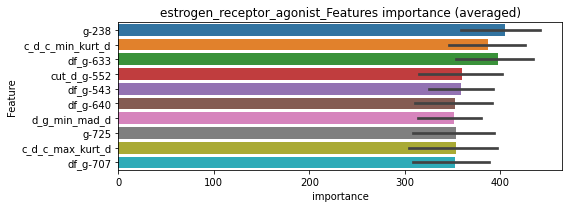

len(train_index) : 3330
len(valid_index) : 1111
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0477297	valid_1's binary_logloss: 0.0878512
[2000]	training's binary_logloss: 0.0244227	valid_1's binary_logloss: 0.0660052
[3000]	training's binary_logloss: 0.0162662	valid_1's binary_logloss: 0.0582039
[4000]	training's binary_logloss: 0.012151	valid_1's binary_logloss: 0.0543423
[5000]	training's binary_logloss: 0.00969663	valid_1's binary_logloss: 0.0517403
Early stopping, best iteration is:
[5359]	training's binary_logloss: 0.00904224	valid_1's binary_logloss: 0.0510673


len(train_index) : 3331
len(valid_index) : 1110
================================= fold 2/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.047906	valid_1's binary_logloss: 0.0804892
[2000]	training's binary_logloss: 0.0244164	valid_1's binary_logloss: 0.0590301
[3000]	training's binary_logloss: 0.0163018	valid_1's binary_logloss: 0.0511521
[4000]	training's binary_logloss: 0.0122175	valid_1's binary_logloss: 0.0470846
[5000]	training's binary_logloss: 0.00975541	valid_1's binary_logloss: 0.0443584
[6000]	training's binary_logloss: 0.0081403	valid_1's binary_logloss: 0.042722
[7000]	training's binary_logloss: 0.00698326	valid_1's binary_logloss: 0.0413762
[8000]	training's binary_logloss: 0.00611838	valid_1's binary_logloss: 0.0403841
Early stopping, best iteration is:
[8701]	training's binary_logloss: 0.00563691	valid_1's binary_logloss: 0.0397168


len(train_index) : 3331
len(valid_index) : 1110
================================= fold 3/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0472157	valid_1's binary_logloss: 0.0885037
[2000]	training's binary_logloss: 0.0241343	valid_1's binary_logloss: 0.0666403
[3000]	training's binary_logloss: 0.0160943	valid_1's binary_logloss: 0.0587463
[4000]	training's binary_logloss: 0.0120297	valid_1's binary_logloss: 0.0545414
[5000]	training's binary_logloss: 0.00961231	valid_1's binary_logloss: 0.0521708
Early stopping, best iteration is:
[5768]	training's binary_logloss: 0.00833255	valid_1's binary_logloss: 0.050666


len(train_index) : 3331
len(valid_index) : 1110
================================= fold 4/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0451713	valid_1's binary_logloss: 0.0980547
[2000]	training's binary_logloss: 0.0230053	valid_1's binary_logloss: 0.0793035
[3000]	training's binary_logloss: 0.015424	valid_1's binary_logloss: 0.0726285
[4000]	training's binary_logloss: 0.0115589	valid_1's binary_logloss: 0.0693074
Early stopping, best iteration is:
[4286]	training's binary_logloss: 0.0107832	valid_1's binary_logloss: 0.0684748


estrogen_receptor_agonist logloss: 0.052480891794381576
estrogen_receptor_agonist is unpredictable(><)!
estrogen_receptor_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00052112	valid_1's binary_logloss: 0.00952746
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000576397	valid_1's binary_logloss: 0.0139528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000538499	valid_1's binary_logloss: 0.00393803
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0049400, Threshold: 0.1903560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.1903560, conf_0:0.13325, conf_1:0.24746
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_1: 0.2203560
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_2: 0.2503560
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_3: 0.2803560


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00121031	valid_1's binary_logloss: 0.0265691


Num_p_label: 29.0, Expected: 8.0, Adj_threshold_4: 0.3103560
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_5: 0.3403560
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_6: 0.3703560
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_7: 0.4003560
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_8: 0.4303560
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_9: 0.4603560
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_10: 0.4903560
threshold: 0.4903560, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000512582	valid_1's binary_logloss: 0.00748627
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00052509	valid_1's binary_logloss: 0.0132082
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000499526	valid_1's binary_logloss: 0.00431506
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0376580, Threshold: 0.4903560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0085384 Vs.target_rate: 0.00202
Num_p_label: 34.0, Expected: 8.0, Threshold: 0.4903560, conf_0:0.39228, conf_1:0.58843
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.5203560
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_2: 0.5503560
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_3: 0.5803560
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_4: 0.6103560


Early stopping, best iteration is:
[422]	training's binary_logloss: 0.00102477	valid_1's binary_logloss: 0.0278137


Num_p_label: 28.0, Expected: 8.0, Adj_threshold_5: 0.6403560
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_6: 0.6703560
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_7: 0.7003560
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_8: 0.7303560
threshold: 0.7303560, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000468066	valid_1's binary_logloss: 0.00451032
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000506699	valid_1's binary_logloss: 0.00878163
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000514102	valid_1's binary_logloss: 0.00741139
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000521993	valid_1's binary_logloss: 0.0177837


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0451250, Threshold: 0.7303560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3794
p_label_rate: 0.0050226 Vs.target_rate: 0.00202
Num_p_label: 20.0, Expected: 8.0, Threshold: 0.7303560, conf_0:0.65732, conf_1:0.80339
threshold: 0.7303560, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 649.0/3794, y_label_rate: 0.1710596


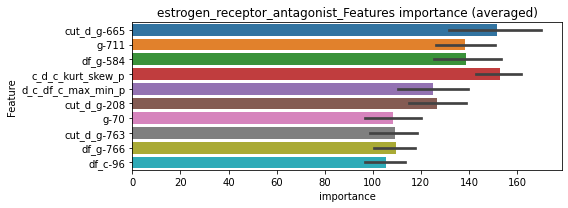

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000487493	valid_1's binary_logloss: 0.0050781


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000715432	valid_1's binary_logloss: 0.0188331
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000532634	valid_1's binary_logloss: 0.0101475


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000508133	valid_1's binary_logloss: 0.00388802


estrogen_receptor_antagonist logloss: 0.00948798619679034
faah_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000453312	valid_1's binary_logloss: 0.00551267
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000424357	valid_1's binary_logloss: 0.00484501
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000422203	valid_1's binary_logloss: 0.00240841
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00042021	valid_1's binary_logloss: 0.0042654


y_Threshold: 0.0028585, Threshold: 0.0094032, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0094032, conf_0:0.00658, conf_1:0.01222
Num_p_label: 5.0, Expected: 6.0, Adj_threshold_1: 0.0394032
threshold: 0.0394032, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000393316	valid_1's binary_logloss: 0.00555616
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000446526	valid_1's binary_logloss: 0.00433073
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000399904	valid_1's binary_logloss: 0.00225576
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0482573, Threshold: 0.0394032, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00039482	valid_1's binary_logloss: 0.0032132


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0394032, conf_0:0.03152, conf_1:0.04728
threshold: 0.0394032, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000393316	valid_1's binary_logloss: 0.00555616
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000446526	valid_1's binary_logloss: 0.00433073
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000399904	valid_1's binary_logloss: 0.00225576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00039482	valid_1's binary_logloss: 0.0032132


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0482573, Threshold: 0.0394032, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0394032, conf_0:0.03546, conf_1:0.04334
threshold: 0.0394032, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


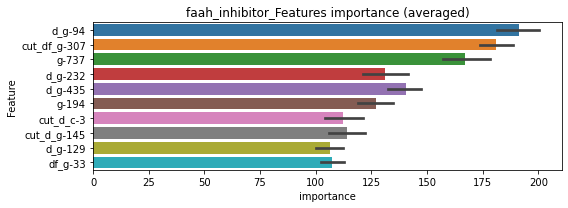

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000450229	valid_1's binary_logloss: 0.0049723


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000404724	valid_1's binary_logloss: 0.00450861


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000415868	valid_1's binary_logloss: 0.00201621


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000418598	valid_1's binary_logloss: 0.00350257


faah_inhibitor logloss: 0.003750441817598832
farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000294267	valid_1's binary_logloss: 0.00138727
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000287027	valid_1's binary_logloss: 0.000989525
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000294857	valid_1's binary_logloss: 0.000523521
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014914, Threshold: 0.0039949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0039949, conf_0:0.00280, conf_1:0.00519
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0339949


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000294923	valid_1's binary_logloss: 0.00342668


threshold: 0.0339949, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000281298	valid_1's binary_logloss: 0.00187909
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000280426	valid_1's binary_logloss: 0.000816643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000284185	valid_1's binary_logloss: 0.000460109
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0270107, Threshold: 0.0339949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00076
Num_p_label: 9.0, Expected: 3.0, Threshold: 0.0339949, conf_0:0.02720, conf_1:0.04079
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0639949
threshold: 0.0639949, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000280065	valid_1's binary_logloss: 0.0043133


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000281298	valid_1's binary_logloss: 0.00187909
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000280426	valid_1's binary_logloss: 0.000816643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000284185	valid_1's binary_logloss: 0.000460109
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0270107, Threshold: 0.0639949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0639949, conf_0:0.05760, conf_1:0.07039
threshold: 0.0639949, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000280065	valid_1's binary_logloss: 0.0043133


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


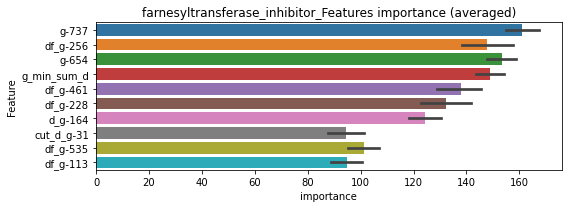

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000284711	valid_1's binary_logloss: 0.00161121


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000279529	valid_1's binary_logloss: 0.000645443
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000278168	valid_1's binary_logloss: 0.000643608


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000283951	valid_1's binary_logloss: 0.00050037
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000283951	valid_1's binary_logloss: 0.00050037


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000295906	valid_1's binary_logloss: 0.00364927


farnesyltransferase_inhibitor logloss: 0.0016015099193632464
fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3287
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000339498	valid_1's binary_logloss: 0.00115366
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000337202	valid_1's binary_logloss: 0.00721403
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000347535	valid_1's binary_logloss: 0.00164577
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018693, Threshold: 0.0087358, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0087358, conf_0:0.00612, conf_1:0.01136


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000342156	valid_1's binary_logloss: 0.0055406


Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0387358
threshold: 0.0387358, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000334547	valid_1's binary_logloss: 0.000893833
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000337633	valid_1's binary_logloss: 0.00592948
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00034043	valid_1's binary_logloss: 0.00146318
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0307888, Threshold: 0.0387358, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00105
Num_p_label: 20.0, Expected: 4.2, Threshold: 0.0387358, conf_0:0.03099, conf_1:0.04648
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.0687358


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000438208	valid_1's binary_logloss: 0.00672482


threshold: 0.0687358, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000334547	valid_1's binary_logloss: 0.000893833
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000337633	valid_1's binary_logloss: 0.00592948
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00034043	valid_1's binary_logloss: 0.00146318
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0307888, Threshold: 0.0687358, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, Expected: 4.2, Threshold: 0.0687358, conf_0:0.06186, conf_1:0.07561
threshold: 0.0687358, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000438208	valid_1's binary_logloss: 0.00672482


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


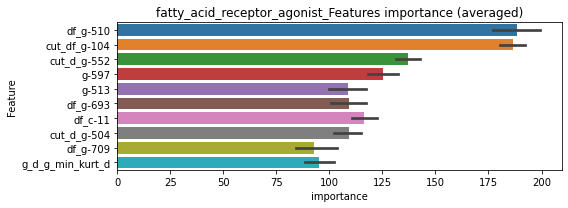

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000332227	valid_1's binary_logloss: 0.000856827
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000332797	valid_1's binary_logloss: 0.000856818


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000335215	valid_1's binary_logloss: 0.00498961


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000342468	valid_1's binary_logloss: 0.00120331


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000337058	valid_1's binary_logloss: 0.00532658


fatty_acid_receptor_agonist logloss: 0.003094419307955251
fgfr_inhibitor, len(trt): 50, len(othr): 3287
target_rate: 0.0020996 → Adj_target_rate: 0.0023352


selected negative label: 3287


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000514423	valid_1's binary_logloss: 0.0175326
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000512766	valid_1's binary_logloss: 0.0073775
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.00052688	valid_1's binary_logloss: 0.00446889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000511176	valid_1's binary_logloss: 0.0109288


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0043282, Threshold: 0.0176913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00210
Num_p_label: 40.0, Expected: 8.4, Threshold: 0.0176913, conf_0:0.01238, conf_1:0.02300
Num_p_label: 20.0, Expected: 8.4, Adj_threshold_1: 0.0476913
threshold: 0.0476913, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000677432	valid_1's binary_logloss: 0.0177828
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000498116	valid_1's binary_logloss: 0.00624964
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.00051051	valid_1's binary_logloss: 0.00377615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000498538	valid_1's binary_logloss: 0.0110419


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246261, Threshold: 0.0476913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0075339 Vs.target_rate: 0.00210
Num_p_label: 30.0, Expected: 8.4, Threshold: 0.0476913, conf_0:0.03815, conf_1:0.05723
Num_p_label: 18.0, Expected: 8.4, Adj_threshold_1: 0.0776913
threshold: 0.0776913, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000489695	valid_1's binary_logloss: 0.00513002
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000526	valid_1's binary_logloss: 0.0151451
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00050432	valid_1's binary_logloss: 0.00162243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000492852	valid_1's binary_logloss: 0.0155387


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0190430, Threshold: 0.0776913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0045203 Vs.target_rate: 0.00210
Num_p_label: 18.0, Expected: 8.4, Threshold: 0.0776913, conf_0:0.06992, conf_1:0.08546
threshold: 0.0776913, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 655.0/3808, y_label_rate: 0.1720063


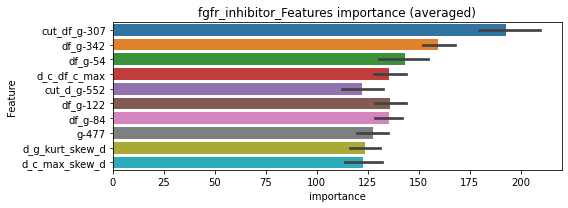

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000585523	valid_1's binary_logloss: 0.00817335


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00050369	valid_1's binary_logloss: 0.0070327
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000502897	valid_1's binary_logloss: 0.00702785


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000520453	valid_1's binary_logloss: 0.00301455


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000516495	valid_1's binary_logloss: 0.0124944


fgfr_inhibitor logloss: 0.007677825067803415


mutually exclusive columns: flt3_inhibitor


flt3_inhibitor, len(trt): 279, len(othr): 6506
target_rate: 0.0117158 → Adj_target_rate: 0.0100684


selected negative label: 6506


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0706907	valid_1's binary_logloss: 0.150876
[2000]	training's binary_logloss: 0.0356137	valid_1's binary_logloss: 0.127524
[3000]	training's binary_logloss: 0.0231077	valid_1's binary_logloss: 0.1193
Early stopping, best iteration is:
[2991]	training's binary_logloss: 0.0231804	valid_1's binary_logloss: 0.119217
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0704726	valid_1's binary_logloss: 0.161787
[2000]	training's binary_logloss: 0.0353514	valid_1's binary_logloss: 0.138546
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0297241	valid_1's binary_logloss: 0.134289
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0718554	valid_1's binary_logloss: 0.140383
[2000]	training's binary_logloss: 0.0359613	valid_1's binary_logloss: 0.113017
[3000]	training's binary_logloss: 0.02

1 / 3, AUC score:0.974, PR-AUC:0.950
y_Threshold: 0.0770275, Threshold: 0.1500484, pos_neg_ratio: 0.8000000
Remove_noisy_data: 479 → Positive_corect_labels: 1192/7328
p_label_rate: 0.0100452 Vs.target_rate: 0.01172
Num_p_label: 40.0, Expected: 46.7, Threshold: 0.1500484, conf_0:0.10503, conf_1:0.19506
threshold: 0.1500484, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1192.0/7328, y_label_rate: 0.1626638
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0554843	valid_1's binary_logloss: 0.110993
[2000]	training's binary_logloss: 0.0276486	valid_1's binary_logloss: 0.0842423
Early stopping, best iteration is:
[2730]	training's binary_logloss: 0.0199423	valid_1's binary_logloss: 0.0758032
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0560699	valid_1's binary_logloss: 0.110233
[2000]	training's binary_logloss: 0.0279451	valid_1's binary_logloss: 0.0840323
[3000]	training's binary_logloss: 0.0181735	valid_1's binary_logloss: 0.0736314
Early stopping, best iteration is:
[3832]	training's binary_logloss: 0.0141253	valid_1's binary_logloss: 0.0694979
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0555475	valid_1's binary_logloss: 0.117979
[2000]	training's binary_logloss: 0.0277899	valid_1's binary_logloss: 0.093768
[3000]	training's binary_loglos

2 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.1226891, Threshold: 0.1500484, pos_neg_ratio: 0.8000000
Remove_noisy_data: 100 → Positive_corect_labels: 1142.0/7228
p_label_rate: 0.0195881 Vs.target_rate: 0.01172
Num_p_label: 78.0, Expected: 46.7, Threshold: 0.1500484, conf_0:0.12004, conf_1:0.18006
Num_p_label: 53.0, Expected: 46.7, Adj_threshold_1: 0.1800484
threshold: 0.1800484, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 1142.0/7228, y_label_rate: 0.1579967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0508595	valid_1's binary_logloss: 0.103428
[2000]	training's binary_logloss: 0.0253365	valid_1's binary_logloss: 0.0804937
[3000]	training's binary_logloss: 0.016521	valid_1's binary_logloss: 0.072018
Early stopping, best iteration is:
[3223]	training's binary_logloss: 0.0153194	valid_1's binary_logloss: 0.0706253
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0498198	valid_1's binary_logloss: 0.108919
[2000]	training's binary_logloss: 0.0247497	valid_1's binary_logloss: 0.0826964
[3000]	training's binary_logloss: 0.0161592	valid_1's binary_logloss: 0.0729587
[4000]	training's binary_logloss: 0.0120143	valid_1's binary_logloss: 0.0682295
Early stopping, best iteration is:
[4117]	training's binary_logloss: 0.0116619	valid_1's binary_logloss: 0.0676539
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_loglos

3 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.1049381, Threshold: 0.1800484, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 1109.0/7162
p_label_rate: 0.0163235 Vs.target_rate: 0.01172
Num_p_label: 65.0, Expected: 46.7, Threshold: 0.1800484, conf_0:0.16204, conf_1:0.19805
threshold: 0.1800484, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 1109.0/7162, y_label_rate: 0.1548450


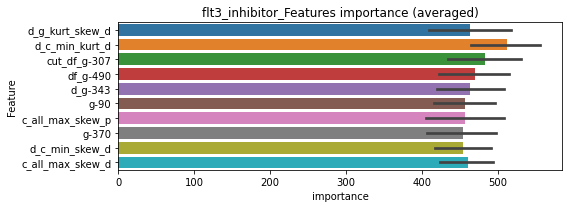

len(train_index) : 5371
len(valid_index) : 1791
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0505162	valid_1's binary_logloss: 0.10814
[2000]	training's binary_logloss: 0.0255586	valid_1's binary_logloss: 0.0832992
[3000]	training's binary_logloss: 0.0168983	valid_1's binary_logloss: 0.0740178
[4000]	training's binary_logloss: 0.012601	valid_1's binary_logloss: 0.0693115
[5000]	training's binary_logloss: 0.0100207	valid_1's binary_logloss: 0.0662021
Early stopping, best iteration is:
[5201]	training's binary_logloss: 0.00962641	valid_1's binary_logloss: 0.0657014


len(train_index) : 5371
len(valid_index) : 1791
================================= fold 2/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0507984	valid_1's binary_logloss: 0.100823
[2000]	training's binary_logloss: 0.025789	valid_1's binary_logloss: 0.075888
[3000]	training's binary_logloss: 0.0170239	valid_1's binary_logloss: 0.0667402
[4000]	training's binary_logloss: 0.0127077	valid_1's binary_logloss: 0.0619316
Early stopping, best iteration is:
[4049]	training's binary_logloss: 0.0125438	valid_1's binary_logloss: 0.0617426


len(train_index) : 5372
len(valid_index) : 1790
================================= fold 3/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.05174	valid_1's binary_logloss: 0.100035
[2000]	training's binary_logloss: 0.0260194	valid_1's binary_logloss: 0.0765813
[3000]	training's binary_logloss: 0.0171247	valid_1's binary_logloss: 0.0685484
[4000]	training's binary_logloss: 0.0127443	valid_1's binary_logloss: 0.0647517
Early stopping, best iteration is:
[4537]	training's binary_logloss: 0.0111836	valid_1's binary_logloss: 0.063334


len(train_index) : 5372
len(valid_index) : 1790
================================= fold 4/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0512236	valid_1's binary_logloss: 0.0977534
[2000]	training's binary_logloss: 0.0258854	valid_1's binary_logloss: 0.0728393
[3000]	training's binary_logloss: 0.0171349	valid_1's binary_logloss: 0.0635979
[4000]	training's binary_logloss: 0.0128092	valid_1's binary_logloss: 0.0589286
[5000]	training's binary_logloss: 0.010182	valid_1's binary_logloss: 0.0559547
[6000]	training's binary_logloss: 0.00847638	valid_1's binary_logloss: 0.0539068
Early stopping, best iteration is:
[6194]	training's binary_logloss: 0.00820136	valid_1's binary_logloss: 0.0535795


flt3_inhibitor logloss: 0.06109012038393756
flt3_inhibitor is unpredictable(><)!
focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000292416	valid_1's binary_logloss: 0.00118516
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000297237	valid_1's binary_logloss: 0.00197324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000288964	valid_1's binary_logloss: 0.00115505
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014519, Threshold: 0.0051613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0051613, conf_0:0.00361, conf_1:0.00671
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0351613


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000288802	valid_1's binary_logloss: 0.00104823


threshold: 0.0351613, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000292336	valid_1's binary_logloss: 0.00125989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000278999	valid_1's binary_logloss: 0.00154754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000282115	valid_1's binary_logloss: 0.00057384
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1070860, Threshold: 0.0351613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, Expected: 3.0, Threshold: 0.0351613, conf_0:0.02813, conf_1:0.04219
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0651613


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000278644	valid_1's binary_logloss: 0.000706638


threshold: 0.0651613, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000292336	valid_1's binary_logloss: 0.00125989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000278999	valid_1's binary_logloss: 0.00154754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000282115	valid_1's binary_logloss: 0.00057384
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1070860, Threshold: 0.0651613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0651613, conf_0:0.05865, conf_1:0.07168


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000278644	valid_1's binary_logloss: 0.000706638


threshold: 0.0651613, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


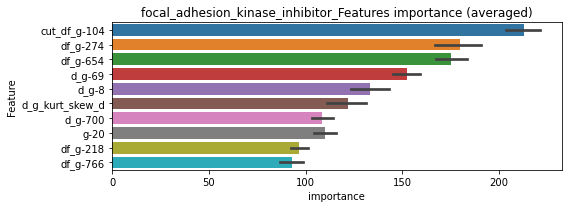

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280591	valid_1's binary_logloss: 0.00089329
Early stopping, best iteration is:
[1151]	training's binary_logloss: 0.000273566	valid_1's binary_logloss: 0.000881165


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280563	valid_1's binary_logloss: 0.00126729
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000281428	valid_1's binary_logloss: 0.00126664


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000282341	valid_1's binary_logloss: 0.000665434
Early stopping, best iteration is:
[1042]	training's binary_logloss: 0.000280526	valid_1's binary_logloss: 0.000662528


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00028428	valid_1's binary_logloss: 0.000705032
Early stopping, best iteration is:
[1166]	training's binary_logloss: 0.000277426	valid_1's binary_logloss: 0.000694812


focal_adhesion_kinase_inhibitor logloss: 0.0008762924980626207
free_radical_scavenger, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000295281	valid_1's binary_logloss: 0.000980463
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000296919	valid_1's binary_logloss: 0.00130742
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000295748	valid_1's binary_logloss: 0.000676627
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014677, Threshold: 0.0061014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0061014, conf_0:0.00427, conf_1:0.00793
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0361014


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000301416	valid_1's binary_logloss: 0.0022544


threshold: 0.0361014, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000287944	valid_1's binary_logloss: 0.000829575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000286091	valid_1's binary_logloss: 0.00133822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000289478	valid_1's binary_logloss: 0.000510136
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354022, Threshold: 0.0361014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00076
Num_p_label: 20.0, Expected: 3.0, Threshold: 0.0361014, conf_0:0.02888, conf_1:0.04332


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000356631	valid_1's binary_logloss: 0.00238191


Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0661014
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0961014
threshold: 0.0961014, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000287944	valid_1's binary_logloss: 0.000829575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000286091	valid_1's binary_logloss: 0.00133822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000289478	valid_1's binary_logloss: 0.000510136
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354022, Threshold: 0.0961014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0961014, conf_0:0.08649, conf_1:0.10571
threshold: 0.0961014, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000356631	valid_1's binary_logloss: 0.00238191


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


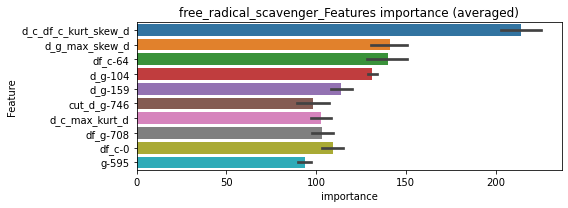

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000284998	valid_1's binary_logloss: 0.000730602
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000284998	valid_1's binary_logloss: 0.000730602


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000285232	valid_1's binary_logloss: 0.000986432


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.0002874	valid_1's binary_logloss: 0.000531578


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds


Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000301137	valid_1's binary_logloss: 0.00175801


free_radical_scavenger logloss: 0.001001659412196387
fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3286
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3286


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000353994	valid_1's binary_logloss: 0.0014373
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000358147	valid_1's binary_logloss: 0.00699769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000357463	valid_1's binary_logloss: 0.000822493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.0003528	valid_1's binary_logloss: 0.00224403


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019264, Threshold: 0.0069234, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0069234, conf_0:0.00485, conf_1:0.00900
Num_p_label: 5.0, Expected: 3.8, Adj_threshold_1: 0.0369234
threshold: 0.0369234, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000347815	valid_1's binary_logloss: 0.00137528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000353038	valid_1's binary_logloss: 0.00688917
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00034591	valid_1's binary_logloss: 0.000707213
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0224746, Threshold: 0.0369234, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00097
Num_p_label: 18.0, Expected: 3.8, Threshold: 0.0369234, conf_0:0.02954, conf_1:0.04431
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_1: 0.0669234


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000353535	valid_1's binary_logloss: 0.00330661


threshold: 0.0669234, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000347815	valid_1's binary_logloss: 0.00137528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000353038	valid_1's binary_logloss: 0.00688917
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00034591	valid_1's binary_logloss: 0.000707213
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0224746, Threshold: 0.0669234, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00097
Num_p_label: 9.0, Expected: 3.8, Threshold: 0.0669234, conf_0:0.06023, conf_1:0.07362


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000353535	valid_1's binary_logloss: 0.00330661


threshold: 0.0669234, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


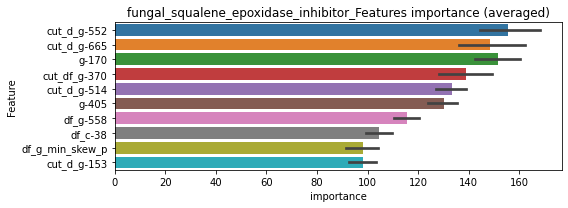

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000359656	valid_1's binary_logloss: 0.00173772


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000356868	valid_1's binary_logloss: 0.0075601


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952


Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000377671	valid_1's binary_logloss: 0.000917772


================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000358294	valid_1's binary_logloss: 0.00180499


fungal_squalene_epoxidase_inhibitor logloss: 0.0030054600045569336
gaba_receptor_agonist, len(trt): 106, len(othr): 3267
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3267


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0522614	valid_1's binary_logloss: 0.120528
[2000]	training's binary_logloss: 0.026632	valid_1's binary_logloss: 0.100831
[3000]	training's binary_logloss: 0.0176361	valid_1's binary_logloss: 0.0939107
Early stopping, best iteration is:
[3058]	training's binary_logloss: 0.0172897	valid_1's binary_logloss: 0.0935791
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.053888	valid_1's binary_logloss: 0.10722
[2000]	training's binary_logloss: 0.0273097	valid_1's binary_logloss: 0.0841245
[3000]	training's binary_logloss: 0.0180564	valid_1's binary_logloss: 0.0757971
[4000]	training's binary_logloss: 0.0134692	valid_1's binary_logloss: 0.071413
Early stopping, best iteration is:
[4887]	training's binary_logloss: 0.0110025	valid_1's binary_logloss: 0.0689928
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 

1 / 3, AUC score:0.993, PR-AUC:0.985
y_Threshold: 0.0523109, Threshold: 0.1793444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 157 → Positive_corect_labels: 640/3763
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1793444, conf_0:0.12554, conf_1:0.23315
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_1: 0.2093444
threshold: 0.2093444, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 640.0/3763, y_label_rate: 0.1700771
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0489754	valid_1's binary_logloss: 0.09959
[2000]	training's binary_logloss: 0.0249104	valid_1's binary_logloss: 0.0788231
[3000]	training's binary_logloss: 0.0164067	valid_1's binary_logloss: 0.0712829
Early stopping, best iteration is:
[3623]	training's binary_logloss: 0.0135398	valid_1's binary_logloss: 0.0686326
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0494216	valid_1's binary_logloss: 0.0978944
[2000]	training's binary_logloss: 0.0249265	valid_1's binary_logloss: 0.0748633
[3000]	training's binary_logloss: 0.0164502	valid_1's binary_logloss: 0.065368
[4000]	training's binary_logloss: 0.0122889	valid_1's binary_logloss: 0.0608144
[5000]	training's binary_logloss: 0.00981263	valid_1's binary_logloss: 0.0576711
Early stopping, best iteration is:
[5888]	training's binary_logloss: 0.00833635	valid_1's binary_logloss: 0.0557723
Training 

2 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0911520, Threshold: 0.2093444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 619.0/3721
p_label_rate: 0.0210949 Vs.target_rate: 0.00445
Num_p_label: 84.0, Expected: 17.7, Threshold: 0.2093444, conf_0:0.16748, conf_1:0.25121
Num_p_label: 72.0, Expected: 17.7, Adj_threshold_1: 0.2393444
Num_p_label: 55.0, Expected: 17.7, Adj_threshold_2: 0.2693444
Num_p_label: 50.0, Expected: 17.7, Adj_threshold_3: 0.2993444
Num_p_label: 44.0, Expected: 17.7, Adj_threshold_4: 0.3293444
Num_p_label: 38.0, Expected: 17.7, Adj_threshold_5: 0.3593444
Num_p_label: 31.0, Expected: 17.7, Adj_threshold_6: 0.3893444
Num_p_label: 21.0, Expected: 17.7, Adj_threshold_7: 0.4193444
threshold: 0.4193444, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 619.0/3721, y_label_rate: 0.1663531
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0450717	valid_1's binary_logloss: 0.0971002
[2000]	training's binary_logloss: 0.0226978	valid_1's binary_logloss: 0.0761754
[3000]	training's binary_logloss: 0.014995	valid_1's binary_logloss: 0.0685188
Early stopping, best iteration is:
[3184]	training's binary_logloss: 0.014107	valid_1's binary_logloss: 0.0676936
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0470676	valid_1's binary_logloss: 0.0783368
[2000]	training's binary_logloss: 0.0235728	valid_1's binary_logloss: 0.055525
[3000]	training's binary_logloss: 0.0155999	valid_1's binary_logloss: 0.0471702
[4000]	training's binary_logloss: 0.0116711	valid_1's binary_logloss: 0.0429499
[5000]	training's binary_logloss: 0.0093171	valid_1's binary_logloss: 0.04005
Early stopping, best iteration is:
[5639]	training's binary_logloss: 0.00826433	valid_1's binary_logloss: 0.0386679
Training unt

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0873790, Threshold: 0.4193444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 609.0/3701
p_label_rate: 0.0123054 Vs.target_rate: 0.00445
Num_p_label: 49.0, Expected: 17.7, Threshold: 0.4193444, conf_0:0.37741, conf_1:0.46128
Num_p_label: 41.0, Expected: 17.7, Adj_threshold_1: 0.4493444
Num_p_label: 34.0, Expected: 17.7, Adj_threshold_2: 0.4793444
Num_p_label: 33.0, Expected: 17.7, Adj_threshold_3: 0.5093444
Num_p_label: 25.0, Expected: 17.7, Adj_threshold_4: 0.5393444
threshold: 0.5393444, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 609.0/3701, y_label_rate: 0.1645501


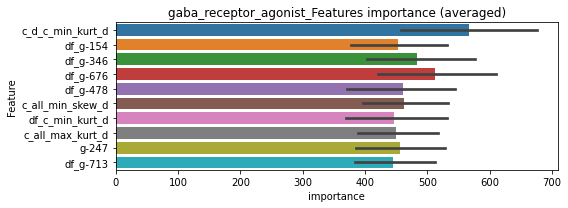

len(train_index) : 2775
len(valid_index) : 926
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0461144	valid_1's binary_logloss: 0.0959505
[2000]	training's binary_logloss: 0.0234041	valid_1's binary_logloss: 0.0732984
[3000]	training's binary_logloss: 0.0155355	valid_1's binary_logloss: 0.06487
[4000]	training's binary_logloss: 0.0116536	valid_1's binary_logloss: 0.0606757
[5000]	training's binary_logloss: 0.0093387	valid_1's binary_logloss: 0.058063
[6000]	training's binary_logloss: 0.00777763	valid_1's binary_logloss: 0.0560761
Early stopping, best iteration is:
[6297]	training's binary_logloss: 0.00741783	valid_1's binary_logloss: 0.0556102


len(train_index) : 2776
len(valid_index) : 925
================================= fold 2/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0466093	valid_1's binary_logloss: 0.0935414
[2000]	training's binary_logloss: 0.0237035	valid_1's binary_logloss: 0.0699903
[3000]	training's binary_logloss: 0.015773	valid_1's binary_logloss: 0.0612411
[4000]	training's binary_logloss: 0.0118219	valid_1's binary_logloss: 0.0566598
[5000]	training's binary_logloss: 0.00948015	valid_1's binary_logloss: 0.0540833
Early stopping, best iteration is:
[5584]	training's binary_logloss: 0.00848733	valid_1's binary_logloss: 0.0528142


len(train_index) : 2776
len(valid_index) : 925
================================= fold 3/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.048021	valid_1's binary_logloss: 0.0805512
[2000]	training's binary_logloss: 0.0244632	valid_1's binary_logloss: 0.0558154
[3000]	training's binary_logloss: 0.016261	valid_1's binary_logloss: 0.0464623
[4000]	training's binary_logloss: 0.0121734	valid_1's binary_logloss: 0.0415315
[5000]	training's binary_logloss: 0.00975257	valid_1's binary_logloss: 0.038589
[6000]	training's binary_logloss: 0.00813348	valid_1's binary_logloss: 0.0363169
[7000]	training's binary_logloss: 0.00699483	valid_1's binary_logloss: 0.0348212
[8000]	training's binary_logloss: 0.00614223	valid_1's binary_logloss: 0.033498
[9000]	training's binary_logloss: 0.00548185	valid_1's binary_logloss: 0.0325602
Early stopping, best iteration is:
[9811]	training's binary_logloss: 0.00504812	valid_1's binary_logloss: 0.0319482


len(train_index) : 2776
len(valid_index) : 925
================================= fold 4/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.048377	valid_1's binary_logloss: 0.0811498
[2000]	training's binary_logloss: 0.0245379	valid_1's binary_logloss: 0.0556775
[3000]	training's binary_logloss: 0.0163271	valid_1's binary_logloss: 0.046273
[4000]	training's binary_logloss: 0.0122088	valid_1's binary_logloss: 0.0412044
[5000]	training's binary_logloss: 0.00977611	valid_1's binary_logloss: 0.0379342
[6000]	training's binary_logloss: 0.00816081	valid_1's binary_logloss: 0.0355698
[7000]	training's binary_logloss: 0.00701126	valid_1's binary_logloss: 0.0338741
[8000]	training's binary_logloss: 0.00615301	valid_1's binary_logloss: 0.0324905
[9000]	training's binary_logloss: 0.00548691	valid_1's binary_logloss: 0.0314025
[10000]	training's binary_logloss: 0.0049618	valid_1's binary_logloss: 0.0305159
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0049618	valid_1's binary_logloss: 0.0305159


gaba_receptor_agonist logloss: 0.04272556942700837
gaba_receptor_agonist is unpredictable(><)!


mutually exclusive columns: gaba_receptor_antagonist


gaba_receptor_antagonist, len(trt): 165, len(othr): 4671
target_rate: 0.0069287 → Adj_target_rate: 0.0064426


selected negative label: 4671


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0593083	valid_1's binary_logloss: 0.109859
[2000]	training's binary_logloss: 0.030038	valid_1's binary_logloss: 0.0892082
[3000]	training's binary_logloss: 0.0196181	valid_1's binary_logloss: 0.0818341
Early stopping, best iteration is:
[3778]	training's binary_logloss: 0.0153453	valid_1's binary_logloss: 0.0789018
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0579693	valid_1's binary_logloss: 0.119224
[2000]	training's binary_logloss: 0.0293412	valid_1's binary_logloss: 0.100191
[3000]	training's binary_logloss: 0.0192265	valid_1's binary_logloss: 0.0934139
Early stopping, best iteration is:
[3773]	training's binary_logloss: 0.0150752	valid_1's binary_logloss: 0.0899918
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0579941	valid_1's binary_logloss: 0.117846
[2000]	training's binary_logloss

1 / 3, AUC score:0.988, PR-AUC:0.973
y_Threshold: 0.0565486, Threshold: 0.1114731, pos_neg_ratio: 0.8000000
Remove_noisy_data: 281 → Positive_corect_labels: 887/5324
p_label_rate: 0.0100452 Vs.target_rate: 0.00693
Num_p_label: 40.0, Expected: 27.6, Threshold: 0.1114731, conf_0:0.07803, conf_1:0.14492
threshold: 0.1114731, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 887.0/5324, y_label_rate: 0.1666041
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0481192	valid_1's binary_logloss: 0.0849917
[2000]	training's binary_logloss: 0.0241301	valid_1's binary_logloss: 0.0639324
[3000]	training's binary_logloss: 0.0158774	valid_1's binary_logloss: 0.0561719
Early stopping, best iteration is:
[3266]	training's binary_logloss: 0.0145366	valid_1's binary_logloss: 0.0548847
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0473455	valid_1's binary_logloss: 0.102311
[2000]	training's binary_logloss: 0.0237297	valid_1's binary_logloss: 0.0848175
Early stopping, best iteration is:
[2780]	training's binary_logloss: 0.0168635	valid_1's binary_logloss: 0.0800803
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0476766	valid_1's binary_logloss: 0.0928078
[2000]	training's binary_logloss: 0.0238075	valid_1's binary_logloss: 0.0726828
[3000]	training's binary_log

2 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0928012, Threshold: 0.1114731, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 861.0/5272
p_label_rate: 0.0210949 Vs.target_rate: 0.00693
Num_p_label: 84.0, Expected: 27.6, Threshold: 0.1114731, conf_0:0.08918, conf_1:0.13377
Num_p_label: 41.0, Expected: 27.6, Adj_threshold_1: 0.1414731
threshold: 0.1414731, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 861.0/5272, y_label_rate: 0.1633156
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.044237	valid_1's binary_logloss: 0.0813268
[2000]	training's binary_logloss: 0.0220003	valid_1's binary_logloss: 0.059732
[3000]	training's binary_logloss: 0.0144908	valid_1's binary_logloss: 0.051705
[4000]	training's binary_logloss: 0.0107839	valid_1's binary_logloss: 0.0475053
[5000]	training's binary_logloss: 0.00860645	valid_1's binary_logloss: 0.0448104
Early stopping, best iteration is:
[5661]	training's binary_logloss: 0.00759845	valid_1's binary_logloss: 0.0435777
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0429948	valid_1's binary_logloss: 0.0894482
[2000]	training's binary_logloss: 0.0214013	valid_1's binary_logloss: 0.0718121
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0203509	valid_1's binary_logloss: 0.0710937
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_log

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0946745, Threshold: 0.1414731, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 848.0/5246
p_label_rate: 0.0087896 Vs.target_rate: 0.00693
Num_p_label: 35.0, Expected: 27.6, Threshold: 0.1414731, conf_0:0.12733, conf_1:0.15562
threshold: 0.1414731, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 848.0/5246, y_label_rate: 0.1616470


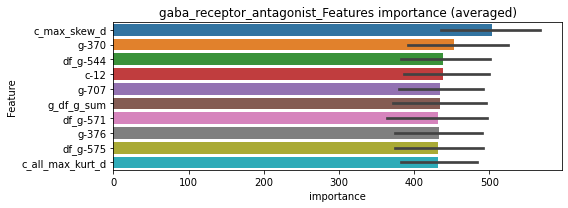

len(train_index) : 3934
len(valid_index) : 1312
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0448771	valid_1's binary_logloss: 0.0847894
[2000]	training's binary_logloss: 0.0228416	valid_1's binary_logloss: 0.0637792
[3000]	training's binary_logloss: 0.0151749	valid_1's binary_logloss: 0.0565752
[4000]	training's binary_logloss: 0.0113472	valid_1's binary_logloss: 0.052697
[5000]	training's binary_logloss: 0.00905992	valid_1's binary_logloss: 0.0503094
Early stopping, best iteration is:
[5372]	training's binary_logloss: 0.00842606	valid_1's binary_logloss: 0.0495899


len(train_index) : 3934
len(valid_index) : 1312
================================= fold 2/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0450825	valid_1's binary_logloss: 0.0844933
[2000]	training's binary_logloss: 0.0228612	valid_1's binary_logloss: 0.0632697
[3000]	training's binary_logloss: 0.0151239	valid_1's binary_logloss: 0.0556903
[4000]	training's binary_logloss: 0.0113295	valid_1's binary_logloss: 0.0518475
Early stopping, best iteration is:
[4650]	training's binary_logloss: 0.00971969	valid_1's binary_logloss: 0.0501444


len(train_index) : 3935
len(valid_index) : 1311
================================= fold 3/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.045121	valid_1's binary_logloss: 0.0809612
[2000]	training's binary_logloss: 0.0227948	valid_1's binary_logloss: 0.0604718
[3000]	training's binary_logloss: 0.0151356	valid_1's binary_logloss: 0.0529066
[4000]	training's binary_logloss: 0.0113238	valid_1's binary_logloss: 0.0490262
[5000]	training's binary_logloss: 0.00904704	valid_1's binary_logloss: 0.0467624
Early stopping, best iteration is:
[5913]	training's binary_logloss: 0.00765713	valid_1's binary_logloss: 0.0452527


len(train_index) : 3935
len(valid_index) : 1311
================================= fold 4/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0447078	valid_1's binary_logloss: 0.0832635
[2000]	training's binary_logloss: 0.022683	valid_1's binary_logloss: 0.0632645
[3000]	training's binary_logloss: 0.0150802	valid_1's binary_logloss: 0.0558265
[4000]	training's binary_logloss: 0.0112659	valid_1's binary_logloss: 0.0517567
[5000]	training's binary_logloss: 0.0089829	valid_1's binary_logloss: 0.0492757
Early stopping, best iteration is:
[5943]	training's binary_logloss: 0.00754606	valid_1's binary_logloss: 0.0476071


gaba_receptor_antagonist logloss: 0.04814916343843046
gaba_receptor_antagonist is unpredictable(><)!
gamma_secretase_inhibitor, len(trt): 56, len(othr): 3280
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3280


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00061414	valid_1's binary_logloss: 0.028672
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00059292	valid_1's binary_logloss: 0.0138343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00053579	valid_1's binary_logloss: 0.00532702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000562109	valid_1's binary_logloss: 0.020655


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040846, Threshold: 0.0148952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0148952, conf_0:0.01043, conf_1:0.01936
Num_p_label: 5.0, Expected: 9.4, Adj_threshold_1: 0.0448952
threshold: 0.0448952, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000515198	valid_1's binary_logloss: 0.0268571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000513255	valid_1's binary_logloss: 0.0104279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000534547	valid_1's binary_logloss: 0.0056577
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0234573, Threshold: 0.0448952, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000658203	valid_1's binary_logloss: 0.0193247


Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0070316 Vs.target_rate: 0.00235
Num_p_label: 28.0, Expected: 9.4, Threshold: 0.0448952, conf_0:0.03592, conf_1:0.05387
Num_p_label: 16.0, Expected: 9.4, Adj_threshold_1: 0.0748952
threshold: 0.0748952, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000513834	valid_1's binary_logloss: 0.0151799
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000529141	valid_1's binary_logloss: 0.00726634
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000537653	valid_1's binary_logloss: 0.00794365
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000624862	valid_1's binary_logloss: 0.0228448


y_Threshold: 0.0177893, Threshold: 0.0748952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0042692 Vs.target_rate: 0.00235
Num_p_label: 17.0, Expected: 9.4, Threshold: 0.0748952, conf_0:0.06741, conf_1:0.08238
threshold: 0.0748952, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


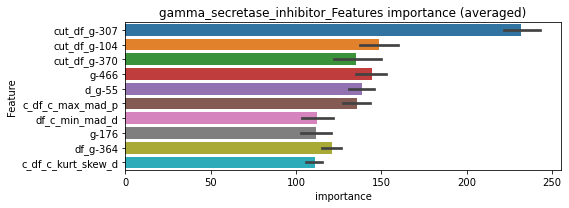

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00054733	valid_1's binary_logloss: 0.0184323


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000517823	valid_1's binary_logloss: 0.0159327


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000519814	valid_1's binary_logloss: 0.00958038


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


gamma_secretase_inhibitor logloss: 0.014643601578602835


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000769155	valid_1's binary_logloss: 0.0146237
mutually exclusive columns: glucocorticoid_receptor_agonist


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 7168
target_rate: 0.0111699 → Adj_target_rate: 0.0096682


selected negative label: 7168


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0668741	valid_1's binary_logloss: 0.145252
[2000]	training's binary_logloss: 0.0328476	valid_1's binary_logloss: 0.117819
[3000]	training's binary_logloss: 0.0211572	valid_1's binary_logloss: 0.108813
Early stopping, best iteration is:
[3004]	training's binary_logloss: 0.0211225	valid_1's binary_logloss: 0.10874
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0675982	valid_1's binary_logloss: 0.143209
[2000]	training's binary_logloss: 0.0332808	valid_1's binary_logloss: 0.112564
[3000]	training's binary_logloss: 0.0214706	valid_1's binary_logloss: 0.101454
Early stopping, best iteration is:
[3763]	training's binary_logloss: 0.0167937	valid_1's binary_logloss: 0.0970072
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0683629	valid_1's binary_logloss: 0.134833
[2000]	training's binary_logloss: 0.

1 / 3, AUC score:0.983, PR-AUC:0.968
y_Threshold: 0.0709015, Threshold: 0.1664926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 442 → Positive_corect_labels: 1356/8159
p_label_rate: 0.0100452 Vs.target_rate: 0.01117
Num_p_label: 40.0, Expected: 44.5, Threshold: 0.1664926, conf_0:0.11654, conf_1:0.21644
threshold: 0.1664926, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1356.0/8159, y_label_rate: 0.1661968
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0568131	valid_1's binary_logloss: 0.113496
[2000]	training's binary_logloss: 0.0276484	valid_1's binary_logloss: 0.0831479
[3000]	training's binary_logloss: 0.0179201	valid_1's binary_logloss: 0.0716436
[4000]	training's binary_logloss: 0.0132119	valid_1's binary_logloss: 0.0659416
Early stopping, best iteration is:
[4611]	training's binary_logloss: 0.0113859	valid_1's binary_logloss: 0.0632758
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0557719	valid_1's binary_logloss: 0.115476
[2000]	training's binary_logloss: 0.0271186	valid_1's binary_logloss: 0.0872976
[3000]	training's binary_logloss: 0.0176094	valid_1's binary_logloss: 0.0772842
[4000]	training's binary_logloss: 0.0130045	valid_1's binary_logloss: 0.0721229
[5000]	training's binary_logloss: 0.0103221	valid_1's binary_logloss: 0.0690275
Early stopping, best iteration is:
[5224]	tra

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.1087251, Threshold: 0.1664926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 1310.0/8067
p_label_rate: 0.0170768 Vs.target_rate: 0.01117
Num_p_label: 68.0, Expected: 44.5, Threshold: 0.1664926, conf_0:0.13319, conf_1:0.19979
Num_p_label: 53.0, Expected: 44.5, Adj_threshold_1: 0.1964926
threshold: 0.1964926, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 1310.0/8067, y_label_rate: 0.1623900
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0525417	valid_1's binary_logloss: 0.106676
[2000]	training's binary_logloss: 0.0256558	valid_1's binary_logloss: 0.0780179
[3000]	training's binary_logloss: 0.0166627	valid_1's binary_logloss: 0.0676888
[4000]	training's binary_logloss: 0.0123222	valid_1's binary_logloss: 0.0624022
Early stopping, best iteration is:
[4135]	training's binary_logloss: 0.0118941	valid_1's binary_logloss: 0.0616069
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0521207	valid_1's binary_logloss: 0.111593
[2000]	training's binary_logloss: 0.0253391	valid_1's binary_logloss: 0.0851436
[3000]	training's binary_logloss: 0.0164331	valid_1's binary_logloss: 0.0760421
Early stopping, best iteration is:
[3225]	training's binary_logloss: 0.0152287	valid_1's binary_logloss: 0.0748289
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logl

3 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.1071987, Threshold: 0.1964926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 1268.0/7983
p_label_rate: 0.0128076 Vs.target_rate: 0.01117
Num_p_label: 51.0, Expected: 44.5, Threshold: 0.1964926, conf_0:0.17684, conf_1:0.21614
threshold: 0.1964926, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 1268.0/7983, y_label_rate: 0.1588375


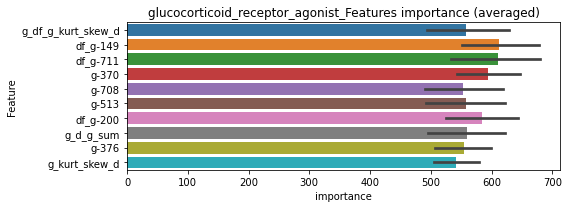

len(train_index) : 5987
len(valid_index) : 1996
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0525091	valid_1's binary_logloss: 0.10661
[2000]	training's binary_logloss: 0.0260963	valid_1's binary_logloss: 0.0779203
[3000]	training's binary_logloss: 0.0172102	valid_1's binary_logloss: 0.0672915
[4000]	training's binary_logloss: 0.0127824	valid_1's binary_logloss: 0.0608985
[5000]	training's binary_logloss: 0.0101903	valid_1's binary_logloss: 0.0574197
Early stopping, best iteration is:
[5451]	training's binary_logloss: 0.0093304	valid_1's binary_logloss: 0.0561411


len(train_index) : 5987
len(valid_index) : 1996
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0533436	valid_1's binary_logloss: 0.099654
[2000]	training's binary_logloss: 0.0265051	valid_1's binary_logloss: 0.0728663
[3000]	training's binary_logloss: 0.0173686	valid_1's binary_logloss: 0.0629335
[4000]	training's binary_logloss: 0.0129165	valid_1's binary_logloss: 0.0577185
[5000]	training's binary_logloss: 0.0102821	valid_1's binary_logloss: 0.0542492
[6000]	training's binary_logloss: 0.00853447	valid_1's binary_logloss: 0.052078
Early stopping, best iteration is:
[6868]	training's binary_logloss: 0.00745369	valid_1's binary_logloss: 0.0505895


len(train_index) : 5987
len(valid_index) : 1996
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0540212	valid_1's binary_logloss: 0.100229
[2000]	training's binary_logloss: 0.0268367	valid_1's binary_logloss: 0.0682085
[3000]	training's binary_logloss: 0.0176386	valid_1's binary_logloss: 0.0564246
[4000]	training's binary_logloss: 0.0131041	valid_1's binary_logloss: 0.0501554
[5000]	training's binary_logloss: 0.0104304	valid_1's binary_logloss: 0.0461162
[6000]	training's binary_logloss: 0.00866066	valid_1's binary_logloss: 0.0434312
[7000]	training's binary_logloss: 0.00742076	valid_1's binary_logloss: 0.0415019
Early stopping, best iteration is:
[7778]	training's binary_logloss: 0.0066701	valid_1's binary_logloss: 0.0401563


len(train_index) : 5988
len(valid_index) : 1995
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0528614	valid_1's binary_logloss: 0.102666
[2000]	training's binary_logloss: 0.0261785	valid_1's binary_logloss: 0.0736452
[3000]	training's binary_logloss: 0.0172171	valid_1's binary_logloss: 0.0632648
[4000]	training's binary_logloss: 0.0127839	valid_1's binary_logloss: 0.0575717
[5000]	training's binary_logloss: 0.0101807	valid_1's binary_logloss: 0.0541452
Early stopping, best iteration is:
[5504]	training's binary_logloss: 0.00923467	valid_1's binary_logloss: 0.0527058


glucocorticoid_receptor_agonist logloss: 0.0498978299676769
glucocorticoid_receptor_agonist is unpredictable(><)!
glutamate_inhibitor, len(trt): 13, len(othr): 3289
target_rate: 0.0005459 → Adj_target_rate: 0.0007431


selected negative label: 3289


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000248389	valid_1's binary_logloss: 0.00142496
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000249975	valid_1's binary_logloss: 0.000680271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000248947	valid_1's binary_logloss: 0.000434563
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010229, Threshold: 0.0030542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00055
Num_p_label: 40.0, Expected: 2.2, Threshold: 0.0030542, conf_0:0.00214, conf_1:0.00397
Num_p_label: 3.0, Expected: 2.2, Adj_threshold_1: 0.0330542


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000250396	valid_1's binary_logloss: 0.000817639


threshold: 0.0330542, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000247064	valid_1's binary_logloss: 0.00134691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000242808	valid_1's binary_logloss: 0.00100334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000250915	valid_1's binary_logloss: 0.000314465
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0804666, Threshold: 0.0330542, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000243885	valid_1's binary_logloss: 0.000509267


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00055
Num_p_label: 8.0, Expected: 2.2, Threshold: 0.0330542, conf_0:0.02644, conf_1:0.03967
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_1: 0.0630542
threshold: 0.0630542, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000247064	valid_1's binary_logloss: 0.00134691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000242808	valid_1's binary_logloss: 0.00100334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000250915	valid_1's binary_logloss: 0.000314465
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0804666, Threshold: 0.0630542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00055
Num_p_label: 5.0, Expected: 2.2, Threshold: 0.0630542, conf_0:0.05675, conf_1:0.06936
threshold: 0.0630542, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000243885	valid_1's binary_logloss: 0.000509267


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


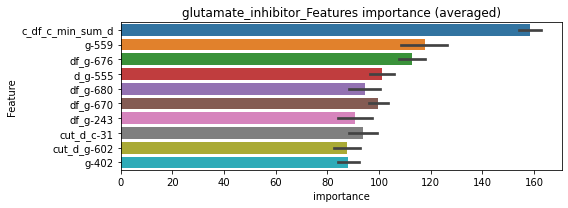

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000247728	valid_1's binary_logloss: 0.000806273
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000246516	valid_1's binary_logloss: 0.000622541
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000250912	valid_1's binary_logloss: 0.000328572
Training until validation scores don't improve for 30 rounds


glutamate_inhibitor logloss: 0.000582065615965791


Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000246872	valid_1's binary_logloss: 0.000570575


glutamate_receptor_agonist, len(trt): 74, len(othr): 3274
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3274


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000748119	valid_1's binary_logloss: 0.0308259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000784267	valid_1's binary_logloss: 0.0249379
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000879338	valid_1's binary_logloss: 0.0263313
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000675097	valid_1's binary_logloss: 0.0228912


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0072194, Threshold: 0.1998152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 653/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.1998152, conf_0:0.13987, conf_1:0.25976
Num_p_label: 37.0, Expected: 12.4, Adj_threshold_1: 0.2298152
Num_p_label: 34.0, Expected: 12.4, Adj_threshold_2: 0.2598152
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_3: 0.2898152
Num_p_label: 28.0, Expected: 12.4, Adj_threshold_4: 0.3198152
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_5: 0.3498152
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_6: 0.3798152
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_7: 0.4098152
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_8: 0.4398152
Num_p_label: 19.0, Expected: 12.4, Adj_threshold_9: 0.4698152
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_10: 0.4998152
threshold: 0.4998152, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000967325	valid_1's binary_logloss: 0.0388603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000626981	valid_1's binary_logloss: 0.0227668
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000682134	valid_1's binary_logloss: 0.0279981
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.0005884	valid_1's binary_logloss: 0.0128419


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0410252, Threshold: 0.4998152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 645.0/3778
p_label_rate: 0.0145655 Vs.target_rate: 0.00311
Num_p_label: 58.0, Expected: 12.4, Threshold: 0.4998152, conf_0:0.39985, conf_1:0.59978
Num_p_label: 57.0, Expected: 12.4, Adj_threshold_1: 0.5298152
Num_p_label: 50.0, Expected: 12.4, Adj_threshold_2: 0.5598152
Num_p_label: 47.0, Expected: 12.4, Adj_threshold_3: 0.5898152
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_4: 0.6198152
Num_p_label: 37.0, Expected: 12.4, Adj_threshold_5: 0.6498152
Num_p_label: 35.0, Expected: 12.4, Adj_threshold_6: 0.6798152
Num_p_label: 33.0, Expected: 12.4, Adj_threshold_7: 0.7098152
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_8: 0.7398152
Num_p_label: 28.0, Expected: 12.4, Adj_threshold_9: 0.7698152
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_10: 0.7998152
threshold: 0.7998152, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
p

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000707584	valid_1's binary_logloss: 0.0140026
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00115994	valid_1's binary_logloss: 0.0333995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000572377	valid_1's binary_logloss: 0.0170369
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0474202, Threshold: 0.7998152, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00100948	valid_1's binary_logloss: 0.0327813


Remove_noisy_data: 6 → Positive_corect_labels: 642.0/3772
p_label_rate: 0.0050226 Vs.target_rate: 0.00311
Num_p_label: 20.0, Expected: 12.4, Threshold: 0.7998152, conf_0:0.71983, conf_1:0.87980
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_1: 0.8298152
threshold: 0.8298152, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 642.0/3772, y_label_rate: 0.1702015


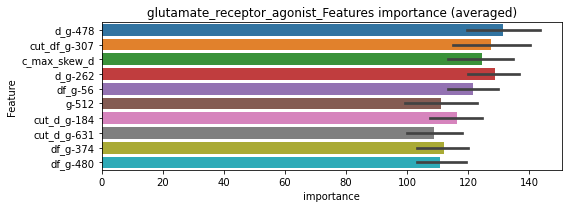

len(train_index) : 2829
len(valid_index) : 943
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2829
len(valid_index) : 943


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000815522	valid_1's binary_logloss: 0.0351299


================================= fold 2/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000620752	valid_1's binary_logloss: 0.019779


len(train_index) : 2829
len(valid_index) : 943
================================= fold 3/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00057946	valid_1's binary_logloss: 0.00834104
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.000570961	valid_1's binary_logloss: 0.00830582


len(train_index) : 2829
len(valid_index) : 943
================================= fold 4/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


glutamate_receptor_agonist logloss: 0.02304097477068153


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000872767	valid_1's binary_logloss: 0.0289462
mutually exclusive columns: glutamate_receptor_antagonist


glutamate_receptor_antagonist, len(trt): 367, len(othr): 7212
target_rate: 0.0154111 → Adj_target_rate: 0.0127105


selected negative label: 7212


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0840377	valid_1's binary_logloss: 0.168104
[2000]	training's binary_logloss: 0.0423232	valid_1's binary_logloss: 0.141993
[3000]	training's binary_logloss: 0.0272581	valid_1's binary_logloss: 0.132221
Early stopping, best iteration is:
[3011]	training's binary_logloss: 0.0271465	valid_1's binary_logloss: 0.132032
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0814807	valid_1's binary_logloss: 0.191747
[2000]	training's binary_logloss: 0.0410189	valid_1's binary_logloss: 0.169845
Early stopping, best iteration is:
[2182]	training's binary_logloss: 0.0373593	valid_1's binary_logloss: 0.168001
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0823274	valid_1's binary_logloss: 0.187077
[2000]	training's binary_logloss: 0.0413551	valid_1's binary_logloss: 0.164457
Early stopping, best iteration is:
[

1 / 3, AUC score:0.954, PR-AUC:0.918
y_Threshold: 0.0991873, Threshold: 0.1886360, pos_neg_ratio: 0.8000000
Remove_noisy_data: 643 → Positive_corect_labels: 1265/8011
p_label_rate: 0.0100452 Vs.target_rate: 0.01541
Num_p_label: 40.0, Expected: 61.4, Threshold: 0.1886360, conf_0:0.13205, conf_1:0.24523
threshold: 0.1886360, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1265.0/8011, y_label_rate: 0.1579079
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0589073	valid_1's binary_logloss: 0.120761
[2000]	training's binary_logloss: 0.0289631	valid_1's binary_logloss: 0.096243
[3000]	training's binary_logloss: 0.0188027	valid_1's binary_logloss: 0.0877739
Early stopping, best iteration is:
[3769]	training's binary_logloss: 0.014714	valid_1's binary_logloss: 0.0844093
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0588542	valid_1's binary_logloss: 0.121885
[2000]	training's binary_logloss: 0.0290156	valid_1's binary_logloss: 0.0959386
[3000]	training's binary_logloss: 0.0187974	valid_1's binary_logloss: 0.0870135
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.0153686	valid_1's binary_logloss: 0.0837599
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0592239	valid_1's binary_logloss: 0.124039
[2000]	training's binary_logloss

2 / 3, AUC score:0.992, PR-AUC:0.980
y_Threshold: 0.1128548, Threshold: 0.1886360, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 1185.0/7851
p_label_rate: 0.0145655 Vs.target_rate: 0.01541
Num_p_label: 58.0, Expected: 61.4, Threshold: 0.1886360, conf_0:0.15091, conf_1:0.22636
threshold: 0.1886360, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 1185.0/7851, y_label_rate: 0.1509362
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0506836	valid_1's binary_logloss: 0.103576
[2000]	training's binary_logloss: 0.0248258	valid_1's binary_logloss: 0.0797821
[3000]	training's binary_logloss: 0.0161545	valid_1's binary_logloss: 0.0710292
Early stopping, best iteration is:
[3438]	training's binary_logloss: 0.0139751	valid_1's binary_logloss: 0.0687764
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0505362	valid_1's binary_logloss: 0.110837
[2000]	training's binary_logloss: 0.0247646	valid_1's binary_logloss: 0.0860529
[3000]	training's binary_logloss: 0.0160771	valid_1's binary_logloss: 0.0776911
Early stopping, best iteration is:
[3779]	training's binary_logloss: 0.0125629	valid_1's binary_logloss: 0.0742274
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0512188	valid_1's binary_logloss: 0.0967059
[2000]	training's binary_logl

3 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.1055347, Threshold: 0.1886360, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 1148.0/7777
p_label_rate: 0.0138122 Vs.target_rate: 0.01541
Num_p_label: 55.0, Expected: 61.4, Threshold: 0.1886360, conf_0:0.16977, conf_1:0.20750
threshold: 0.1886360, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 1148.0/7777, y_label_rate: 0.1476148


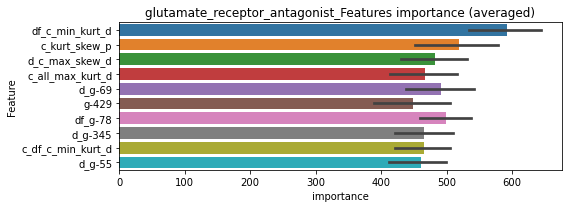

len(train_index) : 5832
len(valid_index) : 1945
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.050002	valid_1's binary_logloss: 0.100839
[2000]	training's binary_logloss: 0.025011	valid_1's binary_logloss: 0.0756737
[3000]	training's binary_logloss: 0.016459	valid_1's binary_logloss: 0.0662916
[4000]	training's binary_logloss: 0.0122404	valid_1's binary_logloss: 0.0613576
[5000]	training's binary_logloss: 0.00973038	valid_1's binary_logloss: 0.0582205
Early stopping, best iteration is:
[5156]	training's binary_logloss: 0.00942215	valid_1's binary_logloss: 0.0577062


len(train_index) : 5833
len(valid_index) : 1944
================================= fold 2/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0493981	valid_1's binary_logloss: 0.109811
[2000]	training's binary_logloss: 0.0246775	valid_1's binary_logloss: 0.0857136
[3000]	training's binary_logloss: 0.0162179	valid_1's binary_logloss: 0.0766877
Early stopping, best iteration is:
[3478]	training's binary_logloss: 0.0139027	valid_1's binary_logloss: 0.0739231


len(train_index) : 5833
len(valid_index) : 1944
================================= fold 3/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0514026	valid_1's binary_logloss: 0.0942411
[2000]	training's binary_logloss: 0.0256664	valid_1's binary_logloss: 0.0695503
[3000]	training's binary_logloss: 0.0168534	valid_1's binary_logloss: 0.0607298
[4000]	training's binary_logloss: 0.0125133	valid_1's binary_logloss: 0.0562641
Early stopping, best iteration is:
[4819]	training's binary_logloss: 0.0103247	valid_1's binary_logloss: 0.0538306


len(train_index) : 5833
len(valid_index) : 1944
================================= fold 4/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0509231	valid_1's binary_logloss: 0.09085
[2000]	training's binary_logloss: 0.0255083	valid_1's binary_logloss: 0.0660746
[3000]	training's binary_logloss: 0.0167705	valid_1's binary_logloss: 0.0565586
[4000]	training's binary_logloss: 0.0124414	valid_1's binary_logloss: 0.0518577
[5000]	training's binary_logloss: 0.00989617	valid_1's binary_logloss: 0.0490069
Early stopping, best iteration is:
[5927]	training's binary_logloss: 0.00831489	valid_1's binary_logloss: 0.0469484


glutamate_receptor_antagonist logloss: 0.05810202610940578
glutamate_receptor_antagonist is unpredictable(><)!
gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000327946	valid_1's binary_logloss: 0.00417093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000333201	valid_1's binary_logloss: 0.0022164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000327027	valid_1's binary_logloss: 0.00150829
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016159, Threshold: 0.0067539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0067539, conf_0:0.00473, conf_1:0.00878
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0367539


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000327101	valid_1's binary_logloss: 0.00230603


threshold: 0.0367539, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00032402	valid_1's binary_logloss: 0.00534353
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000317345	valid_1's binary_logloss: 0.00252017
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000319924	valid_1's binary_logloss: 0.00146367
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0184599, Threshold: 0.0367539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00076
Num_p_label: 25.0, Expected: 3.0, Threshold: 0.0367539, conf_0:0.02940, conf_1:0.04410
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.0667539
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0967539
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.1267539


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000313418	valid_1's binary_logloss: 0.00292358


threshold: 0.1267539, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00032402	valid_1's binary_logloss: 0.00534353
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000317345	valid_1's binary_logloss: 0.00252017
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000319924	valid_1's binary_logloss: 0.00146367
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0184599, Threshold: 0.1267539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.1267539, conf_0:0.11408, conf_1:0.13943


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000313418	valid_1's binary_logloss: 0.00292358


threshold: 0.1267539, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


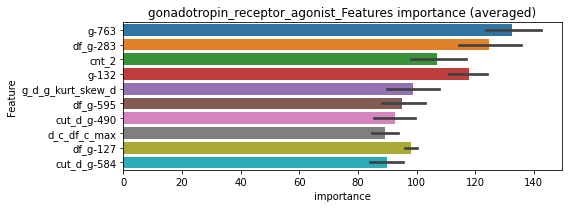

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000337365	valid_1's binary_logloss: 0.00298288
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000332218	valid_1's binary_logloss: 0.00212317
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859


Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000322995	valid_1's binary_logloss: 0.00076979


len(valid_index) : 953
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000313382	valid_1's binary_logloss: 0.00182863


gonadotropin_receptor_agonist logloss: 0.0019261565525640566
gsk_inhibitor, len(trt): 60, len(othr): 3284
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3284


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000555089	valid_1's binary_logloss: 0.0219872
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000539349	valid_1's binary_logloss: 0.011397
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000571239	valid_1's binary_logloss: 0.0040697
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000571971	valid_1's binary_logloss: 0.0123742


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0063958, Threshold: 0.0278116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0278116, conf_0:0.01947, conf_1:0.03616
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_1: 0.0578116
threshold: 0.0578116, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000561291	valid_1's binary_logloss: 0.0227617
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000541903	valid_1's binary_logloss: 0.0118092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000538336	valid_1's binary_logloss: 0.00257977
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000518816	valid_1's binary_logloss: 0.0107191


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0455323, Threshold: 0.0578116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0118031 Vs.target_rate: 0.00252
Num_p_label: 47.0, Expected: 10.0, Threshold: 0.0578116, conf_0:0.04625, conf_1:0.06937
Num_p_label: 31.0, Expected: 10.0, Adj_threshold_1: 0.0878116
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_2: 0.1178116
Num_p_label: 13.0, Expected: 10.0, Adj_threshold_3: 0.1478116
threshold: 0.1478116, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000570492	valid_1's binary_logloss: 0.0204135
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000544746	valid_1's binary_logloss: 0.0138702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.0011227	valid_1's binary_logloss: 0.0295565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000535343	valid_1's binary_logloss: 0.00896161


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0313879, Threshold: 0.1478116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0035158 Vs.target_rate: 0.00252
Num_p_label: 14.0, Expected: 10.0, Threshold: 0.1478116, conf_0:0.13303, conf_1:0.16259
threshold: 0.1478116, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


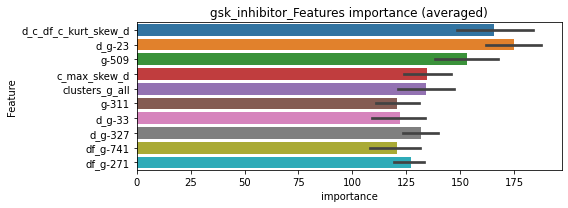

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000614298	valid_1's binary_logloss: 0.0122118


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000659535	valid_1's binary_logloss: 0.0153046


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000565856	valid_1's binary_logloss: 0.0057899


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000641893	valid_1's binary_logloss: 0.0124911


gsk_inhibitor logloss: 0.011449356799714268
hcv_inhibitor, len(trt): 72, len(othr): 3284
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000957246	valid_1's binary_logloss: 0.0315015
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000622498	valid_1's binary_logloss: 0.0206211
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000693036	valid_1's binary_logloss: 0.0157464
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000726623	valid_1's binary_logloss: 0.0230161


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0063234, Threshold: 0.0158004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0158004, conf_0:0.01106, conf_1:0.02054
Num_p_label: 7.0, Expected: 12.0, Adj_threshold_1: 0.0458004
threshold: 0.0458004, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000794629	valid_1's binary_logloss: 0.0257084
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000589509	valid_1's binary_logloss: 0.0168623
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000590846	valid_1's binary_logloss: 0.0172516
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000658313	valid_1's binary_logloss: 0.0248616


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0310752, Threshold: 0.0458004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0077850 Vs.target_rate: 0.00302
Num_p_label: 31.0, Expected: 12.0, Threshold: 0.0458004, conf_0:0.03664, conf_1:0.05496
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_1: 0.0758004
Num_p_label: 16.0, Expected: 12.0, Adj_threshold_2: 0.1058004
threshold: 0.1058004, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3796, y_label_rate: 0.1712329
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000595674	valid_1's binary_logloss: 0.0205123
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000698693	valid_1's binary_logloss: 0.0223995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000872754	valid_1's binary_logloss: 0.0280997
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000591137	valid_1's binary_logloss: 0.0110312


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0406768, Threshold: 0.1058004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0037670 Vs.target_rate: 0.00302
Num_p_label: 15.0, Expected: 12.0, Threshold: 0.1058004, conf_0:0.09522, conf_1:0.11638
threshold: 0.1058004, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 648.0/3792, y_label_rate: 0.1708861


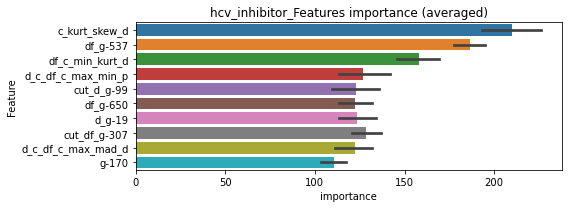

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000703628	valid_1's binary_logloss: 0.0181727


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 hcv_inhibitor=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000875023	valid_1's binary_logloss: 0.0271851
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000580035	valid_1's binary_logloss: 0.0158106
Early stopping, best iteration is:
[1026]	training's binary_logloss: 0.000575031	valid_1's binary_logloss: 0.015762


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


hcv_inhibitor logloss: 0.025086261869179696


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000955058	valid_1's binary_logloss: 0.0392192


hdac_inhibitor, len(trt): 106, len(othr): 3274
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3274


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0557034	valid_1's binary_logloss: 0.126503
[2000]	training's binary_logloss: 0.0279846	valid_1's binary_logloss: 0.0989674
[3000]	training's binary_logloss: 0.0184474	valid_1's binary_logloss: 0.0880797
Early stopping, best iteration is:
[3966]	training's binary_logloss: 0.0137976	valid_1's binary_logloss: 0.0831082
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0564312	valid_1's binary_logloss: 0.11746
[2000]	training's binary_logloss: 0.0283371	valid_1's binary_logloss: 0.0902316
[3000]	training's binary_logloss: 0.0186365	valid_1's binary_logloss: 0.0810757
[4000]	training's binary_logloss: 0.0137991	valid_1's binary_logloss: 0.0762706
[5000]	training's binary_logloss: 0.0109914	valid_1's binary_logloss: 0.0735351
Early stopping, best iteration is:
[5225]	training's binary_logloss: 0.0105064	valid_1's binary_logloss: 0.0730153
Training un

1 / 3, AUC score:0.994, PR-AUC:0.987
y_Threshold: 0.0467326, Threshold: 0.1523023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 641/3770
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1523023, conf_0:0.10661, conf_1:0.19799
Num_p_label: 23.0, Expected: 17.7, Adj_threshold_1: 0.1823023
threshold: 0.1823023, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 641.0/3770, y_label_rate: 0.1700265
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0508306	valid_1's binary_logloss: 0.105175
[2000]	training's binary_logloss: 0.0253773	valid_1's binary_logloss: 0.0790128
[3000]	training's binary_logloss: 0.0167239	valid_1's binary_logloss: 0.0688713
Early stopping, best iteration is:
[3968]	training's binary_logloss: 0.0125553	valid_1's binary_logloss: 0.0638351
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0515611	valid_1's binary_logloss: 0.1055
[2000]	training's binary_logloss: 0.0256231	valid_1's binary_logloss: 0.0788103
[3000]	training's binary_logloss: 0.0168369	valid_1's binary_logloss: 0.0689822
[4000]	training's binary_logloss: 0.0125135	valid_1's binary_logloss: 0.0643825
Early stopping, best iteration is:
[4831]	training's binary_logloss: 0.0103344	valid_1's binary_logloss: 0.0616657
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_loglos

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0894202, Threshold: 0.1823023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 624.0/3736
p_label_rate: 0.0163235 Vs.target_rate: 0.00445
Num_p_label: 65.0, Expected: 17.7, Threshold: 0.1823023, conf_0:0.14584, conf_1:0.21876
Num_p_label: 49.0, Expected: 17.7, Adj_threshold_1: 0.2123023
Num_p_label: 36.0, Expected: 17.7, Adj_threshold_2: 0.2423023
Num_p_label: 28.0, Expected: 17.7, Adj_threshold_3: 0.2723023
Num_p_label: 21.0, Expected: 17.7, Adj_threshold_4: 0.3023023
threshold: 0.3023023, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 624.0/3736, y_label_rate: 0.1670236
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0481525	valid_1's binary_logloss: 0.100395
[2000]	training's binary_logloss: 0.0237764	valid_1's binary_logloss: 0.0733818
[3000]	training's binary_logloss: 0.0156123	valid_1's binary_logloss: 0.0630543
[4000]	training's binary_logloss: 0.0116391	valid_1's binary_logloss: 0.0579536
Early stopping, best iteration is:
[4894]	training's binary_logloss: 0.00950051	valid_1's binary_logloss: 0.0550356
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0488278	valid_1's binary_logloss: 0.0897683
[2000]	training's binary_logloss: 0.0241574	valid_1's binary_logloss: 0.0628264
[3000]	training's binary_logloss: 0.0159145	valid_1's binary_logloss: 0.0532671
[4000]	training's binary_logloss: 0.0118787	valid_1's binary_logloss: 0.0481723
[5000]	training's binary_logloss: 0.009502	valid_1's binary_logloss: 0.0449472
[6000]	training's binary_logloss: 0.00792018

3 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0810623, Threshold: 0.3023023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 619.0/3726
p_label_rate: 0.0060271 Vs.target_rate: 0.00445
Num_p_label: 24.0, Expected: 17.7, Threshold: 0.3023023, conf_0:0.27207, conf_1:0.33253
threshold: 0.3023023, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 619.0/3726, y_label_rate: 0.1661299


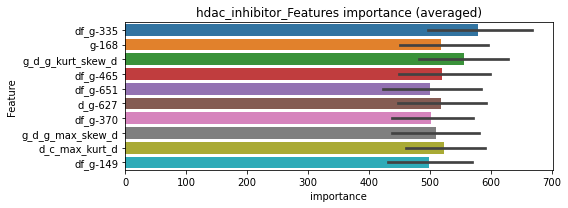

len(train_index) : 2794
len(valid_index) : 932
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0517746	valid_1's binary_logloss: 0.103107
[2000]	training's binary_logloss: 0.0259971	valid_1's binary_logloss: 0.0741044
[3000]	training's binary_logloss: 0.0172345	valid_1's binary_logloss: 0.0631436
[4000]	training's binary_logloss: 0.0128884	valid_1's binary_logloss: 0.0573371
[5000]	training's binary_logloss: 0.0103083	valid_1's binary_logloss: 0.0536831
[6000]	training's binary_logloss: 0.00859505	valid_1's binary_logloss: 0.0513571
[7000]	training's binary_logloss: 0.00738417	valid_1's binary_logloss: 0.0495295
Early stopping, best iteration is:
[7058]	training's binary_logloss: 0.00732324	valid_1's binary_logloss: 0.049421


len(train_index) : 2794
len(valid_index) : 932
================================= fold 2/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0524514	valid_1's binary_logloss: 0.0919597
[2000]	training's binary_logloss: 0.0262399	valid_1's binary_logloss: 0.0635644
[3000]	training's binary_logloss: 0.0174368	valid_1's binary_logloss: 0.0523627
[4000]	training's binary_logloss: 0.01304	valid_1's binary_logloss: 0.046491
[5000]	training's binary_logloss: 0.0104486	valid_1's binary_logloss: 0.0428732
[6000]	training's binary_logloss: 0.00872063	valid_1's binary_logloss: 0.0401503
[7000]	training's binary_logloss: 0.00749397	valid_1's binary_logloss: 0.0380852
[8000]	training's binary_logloss: 0.00657161	valid_1's binary_logloss: 0.0364746
[9000]	training's binary_logloss: 0.00586428	valid_1's binary_logloss: 0.0352111
Early stopping, best iteration is:
[9304]	training's binary_logloss: 0.00567916	valid_1's binary_logloss: 0.034877


len(train_index) : 2795
len(valid_index) : 931
================================= fold 3/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0520815	valid_1's binary_logloss: 0.0941694
[2000]	training's binary_logloss: 0.0262842	valid_1's binary_logloss: 0.0644718
[3000]	training's binary_logloss: 0.0174399	valid_1's binary_logloss: 0.0535067
[4000]	training's binary_logloss: 0.0130112	valid_1's binary_logloss: 0.0475378
[5000]	training's binary_logloss: 0.010417	valid_1's binary_logloss: 0.043791
[6000]	training's binary_logloss: 0.00868555	valid_1's binary_logloss: 0.0411393
[7000]	training's binary_logloss: 0.00746151	valid_1's binary_logloss: 0.0392204
Early stopping, best iteration is:
[7320]	training's binary_logloss: 0.00714631	valid_1's binary_logloss: 0.0387531


len(train_index) : 2795
len(valid_index) : 931
================================= fold 4/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0513132	valid_1's binary_logloss: 0.0975916
[2000]	training's binary_logloss: 0.025857	valid_1's binary_logloss: 0.0693464
[3000]	training's binary_logloss: 0.0172074	valid_1's binary_logloss: 0.0583978
[4000]	training's binary_logloss: 0.0128374	valid_1's binary_logloss: 0.0522776
[5000]	training's binary_logloss: 0.0102722	valid_1's binary_logloss: 0.0486217
[6000]	training's binary_logloss: 0.00856142	valid_1's binary_logloss: 0.0459961
[7000]	training's binary_logloss: 0.00736223	valid_1's binary_logloss: 0.0441779
[8000]	training's binary_logloss: 0.00645971	valid_1's binary_logloss: 0.0426639
Early stopping, best iteration is:
[8532]	training's binary_logloss: 0.00607003	valid_1's binary_logloss: 0.0419959


hdac_inhibitor logloss: 0.04126222786817767
hdac_inhibitor is unpredictable(><)!
histamine_receptor_agonist, len(trt): 59, len(othr): 3282
target_rate: 0.0024775 → Adj_target_rate: 0.0026880


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000604738	valid_1's binary_logloss: 0.0308654
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000633297	valid_1's binary_logloss: 0.0264239
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000599084	valid_1's binary_logloss: 0.00835136
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000619545	valid_1's binary_logloss: 0.0160083


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044916, Threshold: 0.0113097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00248
Num_p_label: 40.0, Expected: 9.9, Threshold: 0.0113097, conf_0:0.00792, conf_1:0.01470
Num_p_label: 6.0, Expected: 9.9, Adj_threshold_1: 0.0413097
threshold: 0.0413097, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000532573	valid_1's binary_logloss: 0.0282637
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000671245	valid_1's binary_logloss: 0.0281672
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000706465	valid_1's binary_logloss: 0.00830879
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0297420, Threshold: 0.0413097, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000772995	valid_1's binary_logloss: 0.0177459


Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0037670 Vs.target_rate: 0.00248
Num_p_label: 15.0, Expected: 9.9, Threshold: 0.0413097, conf_0:0.03305, conf_1:0.04957
threshold: 0.0413097, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000648265	valid_1's binary_logloss: 0.021099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000596982	valid_1's binary_logloss: 0.0143308
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000771285	valid_1's binary_logloss: 0.0199072
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000571399	valid_1's binary_logloss: 0.0243474


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0282593, Threshold: 0.0413097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0032647 Vs.target_rate: 0.00248
Num_p_label: 13.0, Expected: 9.9, Threshold: 0.0413097, conf_0:0.03718, conf_1:0.04544
threshold: 0.0413097, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3796, y_label_rate: 0.1714963


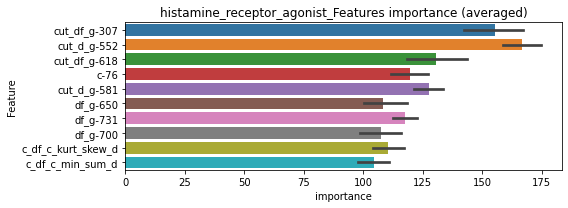

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000604003	valid_1's binary_logloss: 0.0181342


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 histamine_receptor_agonist=================================


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000756127	valid_1's binary_logloss: 0.0189122
Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000709301	valid_1's binary_logloss: 0.015535


================================= fold 4/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00062248	valid_1's binary_logloss: 0.0121307


histamine_receptor_agonist logloss: 0.016178026919016063


mutually exclusive columns: histamine_receptor_antagonist


histamine_receptor_antagonist, len(trt): 241, len(othr): 6554
target_rate: 0.0101201 → Adj_target_rate: 0.0088902


selected negative label: 6554


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0599963	valid_1's binary_logloss: 0.122485
[2000]	training's binary_logloss: 0.0302482	valid_1's binary_logloss: 0.107249
Early stopping, best iteration is:
[2035]	training's binary_logloss: 0.0296717	valid_1's binary_logloss: 0.107018
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0580282	valid_1's binary_logloss: 0.133594
[2000]	training's binary_logloss: 0.0291821	valid_1's binary_logloss: 0.121928
Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.0265817	valid_1's binary_logloss: 0.120773
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0613972	valid_1's binary_logloss: 0.11784
[2000]	training's binary_logloss: 0.0308662	valid_1's binary_logloss: 0.100958
Early stopping, best iteration is:
[2156]	training's binary_logloss: 0.02852	valid_1's binary_logloss: 0.0996274
Tra

1 / 3, AUC score:0.975, PR-AUC:0.952
y_Threshold: 0.0642096, Threshold: 0.1108161, pos_neg_ratio: 0.8000000
Remove_noisy_data: 471 → Positive_corect_labels: 1206/7393
p_label_rate: 0.0100452 Vs.target_rate: 0.01012
Num_p_label: 40.0, Expected: 40.3, Threshold: 0.1108161, conf_0:0.07757, conf_1:0.14406
threshold: 0.1108161, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1206.0/7393, y_label_rate: 0.1631273
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0408592	valid_1's binary_logloss: 0.101498
[2000]	training's binary_logloss: 0.0203425	valid_1's binary_logloss: 0.0881667
Early stopping, best iteration is:
[2094]	training's binary_logloss: 0.0194055	valid_1's binary_logloss: 0.087531
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0430035	valid_1's binary_logloss: 0.0827994
[2000]	training's binary_logloss: 0.021493	valid_1's binary_logloss: 0.0679061
[3000]	training's binary_logloss: 0.014067	valid_1's binary_logloss: 0.0629733
Early stopping, best iteration is:
[3517]	training's binary_logloss: 0.0118876	valid_1's binary_logloss: 0.0613526
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0432994	valid_1's binary_logloss: 0.0822421
[2000]	training's binary_logloss: 0.02169	valid_1's binary_logloss: 0.0663446
[3000]	training's binary_logloss:

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0749593, Threshold: 0.1108161, pos_neg_ratio: 0.8000000
Remove_noisy_data: 82 → Positive_corect_labels: 1165.0/7311
p_label_rate: 0.0095429 Vs.target_rate: 0.01012
Num_p_label: 38.0, Expected: 40.3, Threshold: 0.1108161, conf_0:0.08865, conf_1:0.13298
threshold: 0.1108161, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 1165.0/7311, y_label_rate: 0.1593489
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0354838	valid_1's binary_logloss: 0.0828687
[2000]	training's binary_logloss: 0.0178217	valid_1's binary_logloss: 0.06906
Early stopping, best iteration is:
[2438]	training's binary_logloss: 0.0145441	valid_1's binary_logloss: 0.0666983
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0369924	valid_1's binary_logloss: 0.0718938
[2000]	training's binary_logloss: 0.0186007	valid_1's binary_logloss: 0.0574856
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0157791	valid_1's binary_logloss: 0.0552256
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0378154	valid_1's binary_logloss: 0.0645752
[2000]	training's binary_logloss: 0.0188438	valid_1's binary_logloss: 0.0500608
[3000]	training's binary_logloss: 0.0123781	valid_1's binary_logloss: 0.044857
Early stopping, best iteration

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0686713, Threshold: 0.1108161, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 1130.0/7241
p_label_rate: 0.0082873 Vs.target_rate: 0.01012
Num_p_label: 33.0, Expected: 40.3, Threshold: 0.1108161, conf_0:0.09973, conf_1:0.12190
threshold: 0.1108161, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 1130.0/7241, y_label_rate: 0.1560558


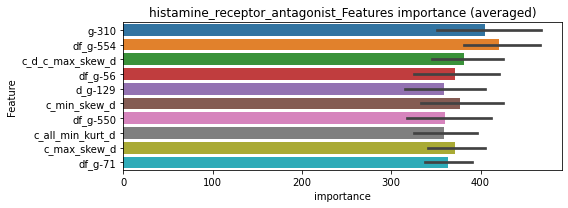

len(train_index) : 5430
len(valid_index) : 1811
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.034526	valid_1's binary_logloss: 0.0608449
[2000]	training's binary_logloss: 0.0176444	valid_1's binary_logloss: 0.045923
[3000]	training's binary_logloss: 0.011732	valid_1's binary_logloss: 0.0404814
[4000]	training's binary_logloss: 0.00875457	valid_1's binary_logloss: 0.0376734
Early stopping, best iteration is:
[4222]	training's binary_logloss: 0.00829339	valid_1's binary_logloss: 0.0372137


len(train_index) : 5431
len(valid_index) : 1810
================================= fold 2/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0349398	valid_1's binary_logloss: 0.0644165
[2000]	training's binary_logloss: 0.0177174	valid_1's binary_logloss: 0.0481085
[3000]	training's binary_logloss: 0.0117765	valid_1's binary_logloss: 0.042472
[4000]	training's binary_logloss: 0.00878419	valid_1's binary_logloss: 0.0395122
[5000]	training's binary_logloss: 0.00700982	valid_1's binary_logloss: 0.0378219
[6000]	training's binary_logloss: 0.00582641	valid_1's binary_logloss: 0.0365914
Early stopping, best iteration is:
[6549]	training's binary_logloss: 0.00533286	valid_1's binary_logloss: 0.0359639


len(train_index) : 5431
len(valid_index) : 1810
================================= fold 3/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0335013	valid_1's binary_logloss: 0.0651286
[2000]	training's binary_logloss: 0.0170935	valid_1's binary_logloss: 0.0511041
[3000]	training's binary_logloss: 0.0113671	valid_1's binary_logloss: 0.0458181
[4000]	training's binary_logloss: 0.00848725	valid_1's binary_logloss: 0.0434335
Early stopping, best iteration is:
[4602]	training's binary_logloss: 0.00737233	valid_1's binary_logloss: 0.0424698


len(train_index) : 5431
len(valid_index) : 1810
================================= fold 4/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0349082	valid_1's binary_logloss: 0.0586852
[2000]	training's binary_logloss: 0.017713	valid_1's binary_logloss: 0.0437625
[3000]	training's binary_logloss: 0.0117628	valid_1's binary_logloss: 0.0386195
[4000]	training's binary_logloss: 0.00876684	valid_1's binary_logloss: 0.0358309
[5000]	training's binary_logloss: 0.00699042	valid_1's binary_logloss: 0.0342633
[6000]	training's binary_logloss: 0.00582395	valid_1's binary_logloss: 0.0330973
Early stopping, best iteration is:
[6326]	training's binary_logloss: 0.00552456	valid_1's binary_logloss: 0.032789


histamine_receptor_antagonist logloss: 0.037109131047575517
histamine_receptor_antagonist is unpredictable(><)!
histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000369455	valid_1's binary_logloss: 0.00114519
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000377085	valid_1's binary_logloss: 0.00292148
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000375244	valid_1's binary_logloss: 0.000933239
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021060, Threshold: 0.0192562, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000366755	valid_1's binary_logloss: 0.00326198


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0192562, conf_0:0.01348, conf_1:0.02503
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_1: 0.0492562
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_2: 0.0792562
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_3: 0.1092562
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_4: 0.1392562
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_5: 0.1692562
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_6: 0.1992562
threshold: 0.1992562, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000361811	valid_1's binary_logloss: 0.00101115
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00035995	valid_1's binary_logloss: 0.00230201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000362215	valid_1's binary_logloss: 0.000904991
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1091735, Threshold: 0.1992562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0060271 Vs.target_rate: 0.00101
Num_p_label: 24.0, Expected: 4.0, Threshold: 0.1992562, conf_0:0.15940, conf_1:0.23911
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_1: 0.2292562


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000367631	valid_1's binary_logloss: 0.00196054


Num_p_label: 23.0, Expected: 4.0, Adj_threshold_2: 0.2592562
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_3: 0.2892562
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_4: 0.3192562
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_5: 0.3492562
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_6: 0.3792562
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_7: 0.4092562
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_8: 0.4392562
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.4692562
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_10: 0.4992562
threshold: 0.4992562, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000361811	valid_1's binary_logloss: 0.00101115
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00035995	valid_1's binary_logloss: 0.00230201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000362215	valid_1's binary_logloss: 0.000904991
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1091735, Threshold: 0.4992562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00101


Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000367631	valid_1's binary_logloss: 0.00196054


Num_p_label: 8.0, Expected: 4.0, Threshold: 0.4992562, conf_0:0.44933, conf_1:0.54918
threshold: 0.4992562, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


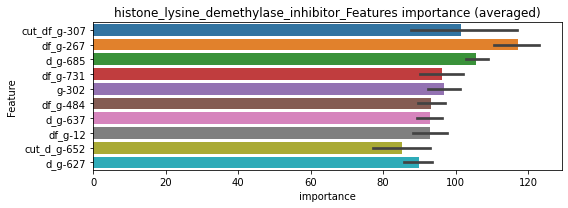

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000364737	valid_1's binary_logloss: 0.00118363


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000371686	valid_1's binary_logloss: 0.0026746


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000375721	valid_1's binary_logloss: 0.000804619


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000368782	valid_1's binary_logloss: 0.0018564


histone_lysine_demethylase_inhibitor logloss: 0.0016297543029701632
histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3282
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3282


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000423709	valid_1's binary_logloss: 0.00730819
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000429247	valid_1's binary_logloss: 0.00519131
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000405989	valid_1's binary_logloss: 0.00108827
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000449703	valid_1's binary_logloss: 0.0151647


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0027884, Threshold: 0.0072024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0072024, conf_0:0.00504, conf_1:0.00936
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_1: 0.0372024
threshold: 0.0372024, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000383789	valid_1's binary_logloss: 0.00159495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000402049	valid_1's binary_logloss: 0.00633584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000399196	valid_1's binary_logloss: 0.00462132
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0156337, Threshold: 0.0372024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0032647 Vs.target_rate: 0.00134


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000420781	valid_1's binary_logloss: 0.00948249


Num_p_label: 13.0, Expected: 5.4, Threshold: 0.0372024, conf_0:0.02976, conf_1:0.04464
threshold: 0.0372024, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000383789	valid_1's binary_logloss: 0.00159495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000402049	valid_1's binary_logloss: 0.00633584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000399196	valid_1's binary_logloss: 0.00462132
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0156337, Threshold: 0.0372024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0032647 Vs.target_rate: 0.00134
Num_p_label: 13.0, Expected: 5.4, Threshold: 0.0372024, conf_0:0.03348, conf_1:0.04092


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000420781	valid_1's binary_logloss: 0.00948249


threshold: 0.0372024, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


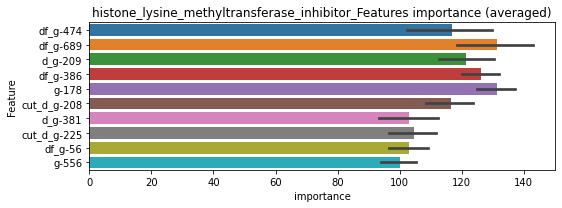

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000387513	valid_1's binary_logloss: 0.00172774
Early stopping, best iteration is:
[1023]	training's binary_logloss: 0.000386079	valid_1's binary_logloss: 0.00172408


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000516587	valid_1's binary_logloss: 0.00575498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000400275	valid_1's binary_logloss: 0.00395225


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000418503	valid_1's binary_logloss: 0.00983046


histone_lysine_methyltransferase_inhibitor logloss: 0.005315461979958494
hiv_inhibitor, len(trt): 72, len(othr): 3281
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3281


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00111064	valid_1's binary_logloss: 0.0436643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000590017	valid_1's binary_logloss: 0.011604
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000605004	valid_1's binary_logloss: 0.0112544
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000600683	valid_1's binary_logloss: 0.0158191


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0056001, Threshold: 0.0874065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0874065, conf_0:0.06118, conf_1:0.11363
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_1: 0.1174065
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_2: 0.1474065
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_3: 0.1774065
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_4: 0.2074065
threshold: 0.2074065, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00129316	valid_1's binary_logloss: 0.0353438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000577296	valid_1's binary_logloss: 0.0109891
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000578167	valid_1's binary_logloss: 0.0177745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000576074	valid_1's binary_logloss: 0.020948


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0426367, Threshold: 0.2074065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0138122 Vs.target_rate: 0.00302
Num_p_label: 55.0, Expected: 12.0, Threshold: 0.2074065, conf_0:0.16593, conf_1:0.24889
Num_p_label: 49.0, Expected: 12.0, Adj_threshold_1: 0.2374065
Num_p_label: 45.0, Expected: 12.0, Adj_threshold_2: 0.2674065
Num_p_label: 43.0, Expected: 12.0, Adj_threshold_3: 0.2974065
Num_p_label: 37.0, Expected: 12.0, Adj_threshold_4: 0.3274065
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_5: 0.3574065
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_6: 0.3874065
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_7: 0.4174065
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_8: 0.4474065
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_9: 0.4774065
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_10: 0.5074065
threshold: 0.5074065, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000634881	valid_1's binary_logloss: 0.0127883
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000581855	valid_1's binary_logloss: 0.0249218
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000587019	valid_1's binary_logloss: 0.0249648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00066412	valid_1's binary_logloss: 0.025552


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0404632, Threshold: 0.5074065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0080362 Vs.target_rate: 0.00302
Num_p_label: 32.0, Expected: 12.0, Threshold: 0.5074065, conf_0:0.45667, conf_1:0.55815
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_1: 0.5374065
Num_p_label: 31.0, Expected: 12.0, Adj_threshold_2: 0.5674065
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_3: 0.5974065
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_4: 0.6274065
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_5: 0.6574065
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_6: 0.6874065
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_7: 0.7174065
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_8: 0.7474065
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_9: 0.7774065
threshold: 0.7774065, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 647.0/3787, y_label_rate: 0.1708476


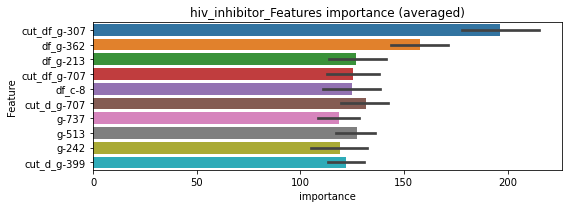

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000667354	valid_1's binary_logloss: 0.0235465


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000707189	valid_1's binary_logloss: 0.0157735


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000590124	valid_1's binary_logloss: 0.0249327


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000635948	valid_1's binary_logloss: 0.0187678


hiv_inhibitor logloss: 0.02075565034793047


mutually exclusive columns: hmgcr_inhibitor


hmgcr_inhibitor, len(trt): 283, len(othr): 7400
target_rate: 0.0118838 → Adj_target_rate: 0.0101910


selected negative label: 7400


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0716479	valid_1's binary_logloss: 0.151634
[2000]	training's binary_logloss: 0.0352259	valid_1's binary_logloss: 0.115936
[3000]	training's binary_logloss: 0.0227514	valid_1's binary_logloss: 0.102423
[4000]	training's binary_logloss: 0.0166195	valid_1's binary_logloss: 0.0955952
Early stopping, best iteration is:
[4165]	training's binary_logloss: 0.015902	valid_1's binary_logloss: 0.0947405
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0714416	valid_1's binary_logloss: 0.141932
[2000]	training's binary_logloss: 0.0349126	valid_1's binary_logloss: 0.107687
[3000]	training's binary_logloss: 0.0225099	valid_1's binary_logloss: 0.0953797
[4000]	training's binary_logloss: 0.0165305	valid_1's binary_logloss: 0.0892055
Early stopping, best iteration is:
[4322]	training's binary_logloss: 0.015186	valid_1's binary_logloss: 0.0876645
Training until 

1 / 3, AUC score:0.985, PR-AUC:0.969
y_Threshold: 0.0718476, Threshold: 0.1626455, pos_neg_ratio: 0.8000000
Remove_noisy_data: 452 → Positive_corect_labels: 1402/8428
p_label_rate: 0.0100452 Vs.target_rate: 0.01188
Num_p_label: 40.0, Expected: 47.3, Threshold: 0.1626455, conf_0:0.11385, conf_1:0.21144
threshold: 0.1626455, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1402.0/8428, y_label_rate: 0.1663503
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0610399	valid_1's binary_logloss: 0.124173
[2000]	training's binary_logloss: 0.0296345	valid_1's binary_logloss: 0.0907445
[3000]	training's binary_logloss: 0.0192218	valid_1's binary_logloss: 0.078589
[4000]	training's binary_logloss: 0.0141515	valid_1's binary_logloss: 0.0725556
[5000]	training's binary_logloss: 0.0111761	valid_1's binary_logloss: 0.0687515
Early stopping, best iteration is:
[5386]	training's binary_logloss: 0.010335	valid_1's binary_logloss: 0.0676978
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0606275	valid_1's binary_logloss: 0.129533
[2000]	training's binary_logloss: 0.0295119	valid_1's binary_logloss: 0.0953317
[3000]	training's binary_logloss: 0.0190699	valid_1's binary_logloss: 0.0826825
[4000]	training's binary_logloss: 0.0140212	valid_1's binary_logloss: 0.076616
Early stopping, best iteration is:
[4333]	traini

2 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.1138285, Threshold: 0.1626455, pos_neg_ratio: 0.8000000
Remove_noisy_data: 80 → Positive_corect_labels: 1362.0/8348
p_label_rate: 0.0170768 Vs.target_rate: 0.01188
Num_p_label: 68.0, Expected: 47.3, Threshold: 0.1626455, conf_0:0.13012, conf_1:0.19517
threshold: 0.1626455, positive_p_label: 68.0/3982, p_label_rate: 0.0170768
positive_y_label: 1362.0/8348, y_label_rate: 0.1631529
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0576073	valid_1's binary_logloss: 0.113359
[2000]	training's binary_logloss: 0.0280777	valid_1's binary_logloss: 0.082575
[3000]	training's binary_logloss: 0.0182023	valid_1's binary_logloss: 0.0709058
[4000]	training's binary_logloss: 0.0133989	valid_1's binary_logloss: 0.064518
Early stopping, best iteration is:
[4304]	training's binary_logloss: 0.0124059	valid_1's binary_logloss: 0.0630483
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.057186	valid_1's binary_logloss: 0.12948
[2000]	training's binary_logloss: 0.0276696	valid_1's binary_logloss: 0.0978914
Early stopping, best iteration is:
[2311]	training's binary_logloss: 0.023738	valid_1's binary_logloss: 0.093242
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0579953	valid_1's binary_logloss: 0.112888
[2000]	training's binary_logloss: 0.

3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.1133678, Threshold: 0.1626455, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 1325.0/8274
p_label_rate: 0.0203415 Vs.target_rate: 0.01188
Num_p_label: 81.0, Expected: 47.3, Threshold: 0.1626455, conf_0:0.14638, conf_1:0.17891
Num_p_label: 52.0, Expected: 47.3, Adj_threshold_1: 0.1926455
threshold: 0.1926455, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 1325.0/8274, y_label_rate: 0.1601402


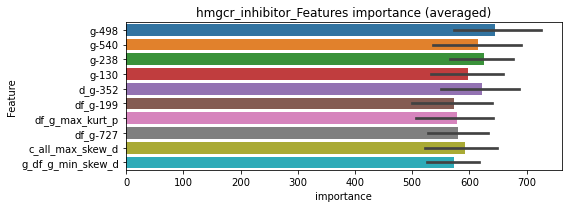

len(train_index) : 6205
len(valid_index) : 2069
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0602207	valid_1's binary_logloss: 0.110484
[2000]	training's binary_logloss: 0.0297778	valid_1's binary_logloss: 0.0775826
[3000]	training's binary_logloss: 0.0194848	valid_1's binary_logloss: 0.0648898
[4000]	training's binary_logloss: 0.014429	valid_1's binary_logloss: 0.0581597
[5000]	training's binary_logloss: 0.011475	valid_1's binary_logloss: 0.0539413
[6000]	training's binary_logloss: 0.00951425	valid_1's binary_logloss: 0.0510472
[7000]	training's binary_logloss: 0.00813633	valid_1's binary_logloss: 0.0487754
[8000]	training's binary_logloss: 0.00711432	valid_1's binary_logloss: 0.0471534
Early stopping, best iteration is:
[8343]	training's binary_logloss: 0.00682165	valid_1's binary_logloss: 0.0466684


len(train_index) : 6205
len(valid_index) : 2069
================================= fold 2/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0596375	valid_1's binary_logloss: 0.113336
[2000]	training's binary_logloss: 0.0295292	valid_1's binary_logloss: 0.0807593
[3000]	training's binary_logloss: 0.0193074	valid_1's binary_logloss: 0.0684285
[4000]	training's binary_logloss: 0.0142817	valid_1's binary_logloss: 0.0617618
[5000]	training's binary_logloss: 0.0113415	valid_1's binary_logloss: 0.0577172
Early stopping, best iteration is:
[5554]	training's binary_logloss: 0.010179	valid_1's binary_logloss: 0.0558967


len(train_index) : 6206
len(valid_index) : 2068
================================= fold 3/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0591544	valid_1's binary_logloss: 0.122378
[2000]	training's binary_logloss: 0.0293373	valid_1's binary_logloss: 0.0899743
[3000]	training's binary_logloss: 0.0191864	valid_1's binary_logloss: 0.0779106
[4000]	training's binary_logloss: 0.0142003	valid_1's binary_logloss: 0.071484
Early stopping, best iteration is:
[4802]	training's binary_logloss: 0.0117695	valid_1's binary_logloss: 0.0680767


len(train_index) : 6206
len(valid_index) : 2068
================================= fold 4/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0598535	valid_1's binary_logloss: 0.117489
[2000]	training's binary_logloss: 0.0296353	valid_1's binary_logloss: 0.0820317
[3000]	training's binary_logloss: 0.0194524	valid_1's binary_logloss: 0.0683859
[4000]	training's binary_logloss: 0.0144014	valid_1's binary_logloss: 0.0609428
[5000]	training's binary_logloss: 0.0114337	valid_1's binary_logloss: 0.0561602
[6000]	training's binary_logloss: 0.00948327	valid_1's binary_logloss: 0.0529121
Early stopping, best iteration is:
[6599]	training's binary_logloss: 0.00859937	valid_1's binary_logloss: 0.0513973


hmgcr_inhibitor logloss: 0.05550875102826732
hmgcr_inhibitor is unpredictable(><)!
hsp_inhibitor, len(trt): 93, len(othr): 3273
target_rate: 0.0039053 → Adj_target_rate: 0.0039574


selected negative label: 3273


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00157964	valid_1's binary_logloss: 0.0575937
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000961511	valid_1's binary_logloss: 0.0308107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.00101608	valid_1's binary_logloss: 0.0249343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000970224	valid_1's binary_logloss: 0.0403911


1 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0139076, Threshold: 0.1723806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3779
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, Expected: 15.6, Threshold: 0.1723806, conf_0:0.12067, conf_1:0.22409
Num_p_label: 37.0, Expected: 15.6, Adj_threshold_1: 0.2023806
Num_p_label: 29.0, Expected: 15.6, Adj_threshold_2: 0.2323806
Num_p_label: 25.0, Expected: 15.6, Adj_threshold_3: 0.2623806
Num_p_label: 18.0, Expected: 15.6, Adj_threshold_4: 0.2923806
threshold: 0.2923806, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 646.0/3779, y_label_rate: 0.1709447
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000939574	valid_1's binary_logloss: 0.0421514
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00108037	valid_1's binary_logloss: 0.0402544
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000668317	valid_1's binary_logloss: 0.0119919
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00104942	valid_1's binary_logloss: 0.0425674


2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0684816, Threshold: 0.2923806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 633.0/3753
p_label_rate: 0.0193370 Vs.target_rate: 0.00391
Num_p_label: 77.0, Expected: 15.6, Threshold: 0.2923806, conf_0:0.23390, conf_1:0.35086
Num_p_label: 68.0, Expected: 15.6, Adj_threshold_1: 0.3223806
Num_p_label: 65.0, Expected: 15.6, Adj_threshold_2: 0.3523806
Num_p_label: 59.0, Expected: 15.6, Adj_threshold_3: 0.3823806
Num_p_label: 53.0, Expected: 15.6, Adj_threshold_4: 0.4123806
Num_p_label: 45.0, Expected: 15.6, Adj_threshold_5: 0.4423806
Num_p_label: 39.0, Expected: 15.6, Adj_threshold_6: 0.4723806
Num_p_label: 34.0, Expected: 15.6, Adj_threshold_7: 0.5023806
Num_p_label: 32.0, Expected: 15.6, Adj_threshold_8: 0.5323806
Num_p_label: 32.0, Expected: 15.6, Adj_threshold_9: 0.5623806
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_10: 0.5923806
threshold: 0.5923806, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
p

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000924441	valid_1's binary_logloss: 0.039587
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000649254	valid_1's binary_logloss: 0.0131381
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000749959	valid_1's binary_logloss: 0.0194639
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000660678	valid_1's binary_logloss: 0.0191177


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.1216655, Threshold: 0.5923806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 626.0/3739
p_label_rate: 0.0110497 Vs.target_rate: 0.00391
Num_p_label: 44.0, Expected: 15.6, Threshold: 0.5923806, conf_0:0.53314, conf_1:0.65162
Num_p_label: 39.0, Expected: 15.6, Adj_threshold_1: 0.6223806
Num_p_label: 35.0, Expected: 15.6, Adj_threshold_2: 0.6523806
Num_p_label: 31.0, Expected: 15.6, Adj_threshold_3: 0.6823806
Num_p_label: 24.0, Expected: 15.6, Adj_threshold_4: 0.7123806
Num_p_label: 20.0, Expected: 15.6, Adj_threshold_5: 0.7423806
threshold: 0.7423806, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 626.0/3739, y_label_rate: 0.1674244


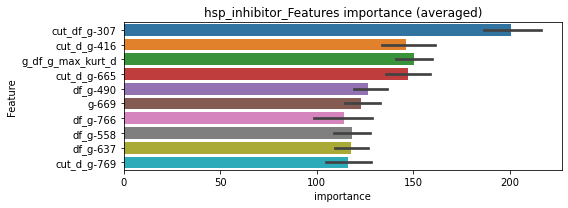

len(train_index) : 2804
len(valid_index) : 935
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2804
len(valid_index) : 935


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00106763	valid_1's binary_logloss: 0.0220856


================================= fold 2/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000682735	valid_1's binary_logloss: 0.0276854


len(train_index) : 2804
len(valid_index) : 935
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000763666	valid_1's binary_logloss: 0.0175577


len(train_index) : 2805
len(valid_index) : 934
================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00090336	valid_1's binary_logloss: 0.0234489


hsp_inhibitor logloss: 0.022694199768777172
igf-1_inhibitor, len(trt): 37, len(othr): 3283
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3283


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000461464	valid_1's binary_logloss: 0.022259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000443908	valid_1's binary_logloss: 0.00797923
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000462339	valid_1's binary_logloss: 0.00192685
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.0004724	valid_1's binary_logloss: 0.0131745


y_Threshold: 0.0030040, Threshold: 0.0204141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0204141, conf_0:0.01429, conf_1:0.02654
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.0504141
threshold: 0.0504141, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000454279	valid_1's binary_logloss: 0.0200194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000460455	valid_1's binary_logloss: 0.00723977
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000444238	valid_1's binary_logloss: 0.00171765
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0291609, Threshold: 0.0504141, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000458993	valid_1's binary_logloss: 0.0122354


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0145655 Vs.target_rate: 0.00155
Num_p_label: 58.0, Expected: 6.2, Threshold: 0.0504141, conf_0:0.04033, conf_1:0.06050
Num_p_label: 42.0, Expected: 6.2, Adj_threshold_1: 0.0804141
Num_p_label: 26.0, Expected: 6.2, Adj_threshold_2: 0.1104141
Num_p_label: 21.0, Expected: 6.2, Adj_threshold_3: 0.1404141
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_4: 0.1704141
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_5: 0.2004141
threshold: 0.2004141, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000499746	valid_1's binary_logloss: 0.00745819
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000435578	valid_1's binary_logloss: 0.00777534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000456223	valid_1's binary_logloss: 0.0113402
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000436998	valid_1's binary_logloss: 0.0112084


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381314, Threshold: 0.2004141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0037670 Vs.target_rate: 0.00155
Num_p_label: 15.0, Expected: 6.2, Threshold: 0.2004141, conf_0:0.18037, conf_1:0.22046
threshold: 0.2004141, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3805, y_label_rate: 0.1721419


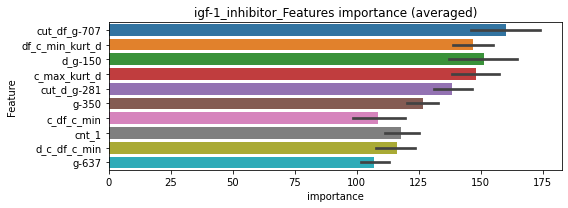

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000473992	valid_1's binary_logloss: 0.00778153


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000463244	valid_1's binary_logloss: 0.00547558


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000484754	valid_1's binary_logloss: 0.0106639


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000513901	valid_1's binary_logloss: 0.0108399


igf-1_inhibitor logloss: 0.008691635123920556
ikk_inhibitor, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000356808	valid_1's binary_logloss: 0.00853836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000364624	valid_1's binary_logloss: 0.00178726
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000357049	valid_1's binary_logloss: 0.000996381
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028853, Threshold: 0.0127299, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00036891	valid_1's binary_logloss: 0.00152641


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0127299, conf_0:0.00891, conf_1:0.01655
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.0427299
threshold: 0.0427299, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000371111	valid_1's binary_logloss: 0.00787894
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000343539	valid_1's binary_logloss: 0.00139244
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00034955	valid_1's binary_logloss: 0.00093368
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0286056, Threshold: 0.0427299, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000346936	valid_1's binary_logloss: 0.00116194


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0087896 Vs.target_rate: 0.00126
Num_p_label: 35.0, Expected: 5.0, Threshold: 0.0427299, conf_0:0.03418, conf_1:0.05128
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_1: 0.0727299
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_2: 0.1027299
threshold: 0.1027299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000371111	valid_1's binary_logloss: 0.00787894
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000343539	valid_1's binary_logloss: 0.00139244
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00034955	valid_1's binary_logloss: 0.00093368
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0286056, Threshold: 0.1027299, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000346936	valid_1's binary_logloss: 0.00116194


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00126
Num_p_label: 12.0, Expected: 5.0, Threshold: 0.1027299, conf_0:0.09246, conf_1:0.11300
threshold: 0.1027299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


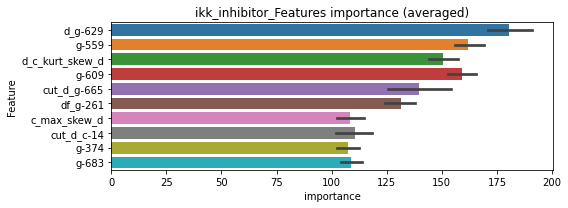

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000376147	valid_1's binary_logloss: 0.00700553


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000347923	valid_1's binary_logloss: 0.00139046
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000346887	valid_1's binary_logloss: 0.00138725


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000352297	valid_1's binary_logloss: 0.000907076


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000352782	valid_1's binary_logloss: 0.00118517


ikk_inhibitor logloss: 0.002621365771451567
imidazoline_receptor_agonist, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000371479	valid_1's binary_logloss: 0.00385573
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000352784	valid_1's binary_logloss: 0.00743804
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000368427	valid_1's binary_logloss: 0.00126785
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024106, Threshold: 0.0107881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000378856	valid_1's binary_logloss: 0.00331557


Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0107881, conf_0:0.00755, conf_1:0.01402
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_1: 0.0407881
threshold: 0.0407881, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000357832	valid_1's binary_logloss: 0.00339234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000351601	valid_1's binary_logloss: 0.00854784
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000356105	valid_1's binary_logloss: 0.000884964
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0398864, Threshold: 0.0407881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000365077	valid_1's binary_logloss: 0.00246141


p_label_rate: 0.0082873 Vs.target_rate: 0.00130
Num_p_label: 33.0, Expected: 5.2, Threshold: 0.0407881, conf_0:0.03263, conf_1:0.04895
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_1: 0.0707881
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_2: 0.1007881
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_3: 0.1307881
threshold: 0.1307881, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000357832	valid_1's binary_logloss: 0.00339234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000351601	valid_1's binary_logloss: 0.00854784
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000356105	valid_1's binary_logloss: 0.000884964
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0398864, Threshold: 0.1307881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00130


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000365077	valid_1's binary_logloss: 0.00246141


Num_p_label: 10.0, Expected: 5.2, Threshold: 0.1307881, conf_0:0.11771, conf_1:0.14387
threshold: 0.1307881, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


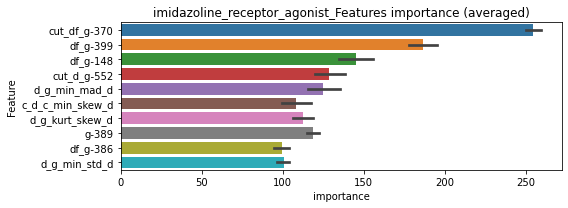

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000363451	valid_1's binary_logloss: 0.00261703


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000361536	valid_1's binary_logloss: 0.00956244


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000359407	valid_1's binary_logloss: 0.0010195


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000360354	valid_1's binary_logloss: 0.00182164


imidazoline_receptor_agonist logloss: 0.0037552057287787025
immunosuppressant, len(trt): 73, len(othr): 3274
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3274


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00102415	valid_1's binary_logloss: 0.0316518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000952067	valid_1's binary_logloss: 0.0331887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000624996	valid_1's binary_logloss: 0.02345
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000635797	valid_1's binary_logloss: 0.0324048


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0067707, Threshold: 0.0168916, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 653/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0168916, conf_0:0.01182, conf_1:0.02196
Num_p_label: 7.0, Expected: 12.2, Adj_threshold_1: 0.0468916
threshold: 0.0468916, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 653.0/3794, y_label_rate: 0.1721139
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000586372	valid_1's binary_logloss: 0.0258691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000614354	valid_1's binary_logloss: 0.0234314
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.00105897	valid_1's binary_logloss: 0.0389975
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000585003	valid_1's binary_logloss: 0.019886


2 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0203115, Threshold: 0.0468916, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 648.0/3784
p_label_rate: 0.0042692 Vs.target_rate: 0.00307
Num_p_label: 17.0, Expected: 12.2, Threshold: 0.0468916, conf_0:0.03751, conf_1:0.05627
threshold: 0.0468916, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 648.0/3784, y_label_rate: 0.1712474
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000610165	valid_1's binary_logloss: 0.0212605
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000640348	valid_1's binary_logloss: 0.0411432
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000932484	valid_1's binary_logloss: 0.0298932
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000601911	valid_1's binary_logloss: 0.0114137


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0181855, Threshold: 0.0468916, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 644.0/3776
p_label_rate: 0.0037670 Vs.target_rate: 0.00307
Num_p_label: 15.0, Expected: 12.2, Threshold: 0.0468916, conf_0:0.04220, conf_1:0.05158
threshold: 0.0468916, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 644.0/3776, y_label_rate: 0.1705508


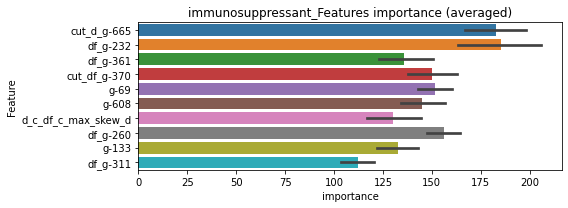

len(train_index) : 2832
len(valid_index) : 944
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 2/4 immunosuppressant=================================


Early stopping, best iteration is:
[222]	training's binary_logloss: 0.0027621	valid_1's binary_logloss: 0.0546478
Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 3/4 immunosuppressant=================================


Early stopping, best iteration is:
[312]	training's binary_logloss: 0.00170672	valid_1's binary_logloss: 0.0431088
Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 4/4 immunosuppressant=================================


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.0010595	valid_1's binary_logloss: 0.0132189
Training until validation scores don't improve for 30 rounds


immunosuppressant logloss: 0.03209758554809233
immunosuppressant is unpredictable(><)!


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000949292	valid_1's binary_logloss: 0.0174149


insulin_secretagogue, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3282


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000479429	valid_1's binary_logloss: 0.00954221
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000413927	valid_1's binary_logloss: 0.00428657
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000418688	valid_1's binary_logloss: 0.00139069
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000404523	valid_1's binary_logloss: 0.00630081


y_Threshold: 0.0025381, Threshold: 0.0105076, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0105076, conf_0:0.00736, conf_1:0.01366
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.0405076
threshold: 0.0405076, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000420126	valid_1's binary_logloss: 0.00980984
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000432715	valid_1's binary_logloss: 0.003686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000401416	valid_1's binary_logloss: 0.00103849
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381122, Threshold: 0.0405076, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00041442	valid_1's binary_logloss: 0.00629626


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0070316 Vs.target_rate: 0.00126
Num_p_label: 28.0, Expected: 5.0, Threshold: 0.0405076, conf_0:0.03241, conf_1:0.04861
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_1: 0.0705076
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_2: 0.1005076
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_3: 0.1305076
threshold: 0.1305076, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000420126	valid_1's binary_logloss: 0.00980984
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000432715	valid_1's binary_logloss: 0.003686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000401416	valid_1's binary_logloss: 0.00103849
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00041442	valid_1's binary_logloss: 0.00629626


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381122, Threshold: 0.1305076, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, Expected: 5.0, Threshold: 0.1305076, conf_0:0.11746, conf_1:0.14356
threshold: 0.1305076, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


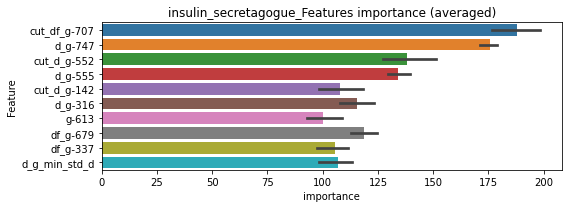

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952


Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000466652	valid_1's binary_logloss: 0.00789134


================================= fold 2/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000414485	valid_1's binary_logloss: 0.00353216


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000425263	valid_1's binary_logloss: 0.0010307


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds


insulin_secretagogue logloss: 0.004469100249643898


Early stopping, best iteration is:
[637]	training's binary_logloss: 0.0004775	valid_1's binary_logloss: 0.00541843


insulin_sensitizer, len(trt): 51, len(othr): 3279
target_rate: 0.0021416 → Adj_target_rate: 0.0023748


selected negative label: 3279


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000494077	valid_1's binary_logloss: 0.0120158
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.00049087	valid_1's binary_logloss: 0.00510336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000524045	valid_1's binary_logloss: 0.0166681
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000600014	valid_1's binary_logloss: 0.0268047


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0038190, Threshold: 0.0091664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00214
Num_p_label: 40.0, Expected: 8.5, Threshold: 0.0091664, conf_0:0.00642, conf_1:0.01192
Num_p_label: 1.0, Expected: 8.5, Adj_threshold_1: 0.0391664
threshold: 0.0391664, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000529765	valid_1's binary_logloss: 0.0129686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.00048324	valid_1's binary_logloss: 0.0049315
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000506197	valid_1's binary_logloss: 0.0146937
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0217402, Threshold: 0.0391664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0030136 Vs.target_rate: 0.00214
Num_p_label: 12.0, Expected: 8.5, Threshold: 0.0391664, conf_0:0.03133, conf_1:0.04700


Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000872561	valid_1's binary_logloss: 0.0261283


threshold: 0.0391664, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000478184	valid_1's binary_logloss: 0.0102039
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000487196	valid_1's binary_logloss: 0.0114558
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000504616	valid_1's binary_logloss: 0.0138751
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000536933	valid_1's binary_logloss: 0.0073301


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0298497, Threshold: 0.0391664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0035158 Vs.target_rate: 0.00214
Num_p_label: 14.0, Expected: 8.5, Threshold: 0.0391664, conf_0:0.03525, conf_1:0.04308
threshold: 0.0391664, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


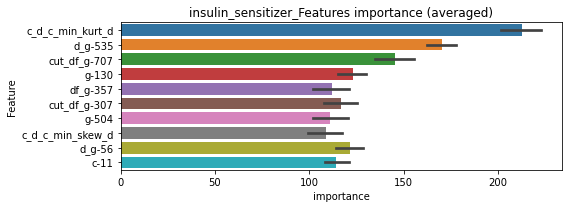

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00055515	valid_1's binary_logloss: 0.0111912


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000516446	valid_1's binary_logloss: 0.0120363


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000554067	valid_1's binary_logloss: 0.0154178


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.00048992	valid_1's binary_logloss: 0.00827415


insulin_sensitizer logloss: 0.011731076002542425
integrin_inhibitor, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000495583	valid_1's binary_logloss: 0.0106609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000448253	valid_1's binary_logloss: 0.00641679
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000463825	valid_1's binary_logloss: 0.0038384
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000451215	valid_1's binary_logloss: 0.00760444


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044229, Threshold: 0.0148987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0148987, conf_0:0.01043, conf_1:0.01937
Num_p_label: 6.0, Expected: 7.0, Adj_threshold_1: 0.0448987
threshold: 0.0448987, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000456261	valid_1's binary_logloss: 0.0108265
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000441259	valid_1's binary_logloss: 0.00467586
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000450989	valid_1's binary_logloss: 0.00274643
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0252438, Threshold: 0.0448987, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000508539	valid_1's binary_logloss: 0.00770409


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0075339 Vs.target_rate: 0.00176
Num_p_label: 30.0, Expected: 7.0, Threshold: 0.0448987, conf_0:0.03592, conf_1:0.05388
Num_p_label: 12.0, Expected: 7.0, Adj_threshold_1: 0.0748987
threshold: 0.0748987, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000456261	valid_1's binary_logloss: 0.0108265
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000441259	valid_1's binary_logloss: 0.00467586
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000450989	valid_1's binary_logloss: 0.00274643
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0252438, Threshold: 0.0748987, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000508539	valid_1's binary_logloss: 0.00770409


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0030136 Vs.target_rate: 0.00176
Num_p_label: 12.0, Expected: 7.0, Threshold: 0.0748987, conf_0:0.06741, conf_1:0.08239
threshold: 0.0748987, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


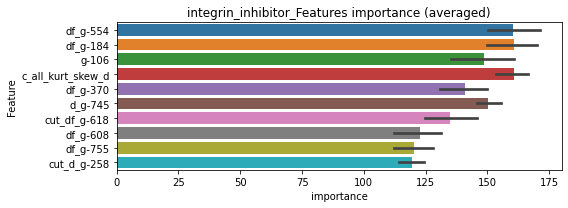

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.00050383	valid_1's binary_logloss: 0.00905334


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000450453	valid_1's binary_logloss: 0.00505007


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000455696	valid_1's binary_logloss: 0.00310913


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.000443664	valid_1's binary_logloss: 0.00719472


integrin_inhibitor logloss: 0.006102590634322107
jak_inhibitor, len(trt): 92, len(othr): 3277
target_rate: 0.0038633 → Adj_target_rate: 0.0039212


selected negative label: 3277


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00112883	valid_1's binary_logloss: 0.0524191
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00124061	valid_1's binary_logloss: 0.0413063
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000925519	valid_1's binary_logloss: 0.0184325
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00102445	valid_1's binary_logloss: 0.0353317


1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0109471, Threshold: 0.1278113, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00386
Num_p_label: 40.0, Expected: 15.4, Threshold: 0.1278113, conf_0:0.08947, conf_1:0.16615
Num_p_label: 35.0, Expected: 15.4, Adj_threshold_1: 0.1578113
Num_p_label: 32.0, Expected: 15.4, Adj_threshold_2: 0.1878113
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_3: 0.2178113
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_4: 0.2478113
Num_p_label: 26.0, Expected: 15.4, Adj_threshold_5: 0.2778113
Num_p_label: 22.0, Expected: 15.4, Adj_threshold_6: 0.3078113
threshold: 0.3078113, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 649.0/3788, y_label_rate: 0.1713305
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00100039	valid_1's binary_logloss: 0.0406916
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.00071407	valid_1's binary_logloss: 0.0245631
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000943473	valid_1's binary_logloss: 0.0308705
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000674393	valid_1's binary_logloss: 0.0233685


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0436618, Threshold: 0.3078113, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 645.0/3780
p_label_rate: 0.0090407 Vs.target_rate: 0.00386
Num_p_label: 36.0, Expected: 15.4, Threshold: 0.3078113, conf_0:0.24625, conf_1:0.36937
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_1: 0.3378113
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_2: 0.3678113
Num_p_label: 31.0, Expected: 15.4, Adj_threshold_3: 0.3978113
Num_p_label: 28.0, Expected: 15.4, Adj_threshold_4: 0.4278113
Num_p_label: 25.0, Expected: 15.4, Adj_threshold_5: 0.4578113
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_6: 0.4878113
Num_p_label: 22.0, Expected: 15.4, Adj_threshold_7: 0.5178113
threshold: 0.5178113, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 645.0/3780, y_label_rate: 0.1706349
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000825657	valid_1's binary_logloss: 0.0245818
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00104485	valid_1's binary_logloss: 0.0417498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000735695	valid_1's binary_logloss: 0.0232221
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000799638	valid_1's binary_logloss: 0.0308959


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0304182, Threshold: 0.5178113, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 640.0/3770
p_label_rate: 0.0060271 Vs.target_rate: 0.00386
Num_p_label: 24.0, Expected: 15.4, Threshold: 0.5178113, conf_0:0.46603, conf_1:0.56959
Num_p_label: 21.0, Expected: 15.4, Adj_threshold_1: 0.5478113
threshold: 0.5478113, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 640.0/3770, y_label_rate: 0.1697613


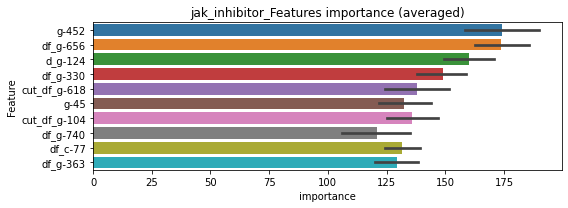

len(train_index) : 2827
len(valid_index) : 943
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000842949	valid_1's binary_logloss: 0.0239968


len(train_index) : 2827
len(valid_index) : 943
================================= fold 2/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 942
================================= fold 3/4 jak_inhibitor=================================


Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00176851	valid_1's binary_logloss: 0.0342427
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.00075201	valid_1's binary_logloss: 0.0132948


len(train_index) : 2828
len(valid_index) : 942
================================= fold 4/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000993721	valid_1's binary_logloss: 0.0328022


jak_inhibitor logloss: 0.026085733939247423


mutually exclusive columns: kit_inhibitor


kit_inhibitor, len(trt): 273, len(othr): 6846
target_rate: 0.0114638 → Adj_target_rate: 0.0098841


selected negative label: 6846


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0662154	valid_1's binary_logloss: 0.139258
[2000]	training's binary_logloss: 0.0330817	valid_1's binary_logloss: 0.114964
[3000]	training's binary_logloss: 0.0215391	valid_1's binary_logloss: 0.106795
Early stopping, best iteration is:
[3354]	training's binary_logloss: 0.0191041	valid_1's binary_logloss: 0.105018
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0652888	valid_1's binary_logloss: 0.152567
[2000]	training's binary_logloss: 0.0326613	valid_1's binary_logloss: 0.130032
[3000]	training's binary_logloss: 0.0212884	valid_1's binary_logloss: 0.122379
Early stopping, best iteration is:
[3011]	training's binary_logloss: 0.0212039	valid_1's binary_logloss: 0.122291
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0678441	valid_1's binary_logloss: 0.133579
[2000]	training's binary_logloss: 0.

1 / 3, AUC score:0.980, PR-AUC:0.961
y_Threshold: 0.0659829, Threshold: 0.1281344, pos_neg_ratio: 0.8000000
Remove_noisy_data: 452 → Positive_corect_labels: 1280/7763
p_label_rate: 0.0100452 Vs.target_rate: 0.01146
Num_p_label: 40.0, Expected: 45.6, Threshold: 0.1281344, conf_0:0.08969, conf_1:0.16657
threshold: 0.1281344, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1280.0/7763, y_label_rate: 0.1648847
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0534523	valid_1's binary_logloss: 0.118516
[2000]	training's binary_logloss: 0.0264408	valid_1's binary_logloss: 0.0938518
[3000]	training's binary_logloss: 0.0172364	valid_1's binary_logloss: 0.0845857
[4000]	training's binary_logloss: 0.0127206	valid_1's binary_logloss: 0.0797952
Early stopping, best iteration is:
[4607]	training's binary_logloss: 0.0109569	valid_1's binary_logloss: 0.0779372
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0521198	valid_1's binary_logloss: 0.12348
[2000]	training's binary_logloss: 0.0258819	valid_1's binary_logloss: 0.100512
Early stopping, best iteration is:
[2611]	training's binary_logloss: 0.0195691	valid_1's binary_logloss: 0.094521
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0553848	valid_1's binary_logloss: 0.0951156
[2000]	training's binary_logloss

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.1013861, Threshold: 0.1281344, pos_neg_ratio: 0.8000000
Remove_noisy_data: 94 → Positive_corect_labels: 1233.0/7669
p_label_rate: 0.0153189 Vs.target_rate: 0.01146
Num_p_label: 61.0, Expected: 45.6, Threshold: 0.1281344, conf_0:0.10251, conf_1:0.15376
threshold: 0.1281344, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 1233.0/7669, y_label_rate: 0.1607772
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0485262	valid_1's binary_logloss: 0.100694
[2000]	training's binary_logloss: 0.0240903	valid_1's binary_logloss: 0.0780729
[3000]	training's binary_logloss: 0.0157287	valid_1's binary_logloss: 0.0699186
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.0129289	valid_1's binary_logloss: 0.0669809
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0485642	valid_1's binary_logloss: 0.10211
[2000]	training's binary_logloss: 0.0240883	valid_1's binary_logloss: 0.078444
[3000]	training's binary_logloss: 0.0158239	valid_1's binary_logloss: 0.0695401
Early stopping, best iteration is:
[3571]	training's binary_logloss: 0.0131897	valid_1's binary_logloss: 0.0667378
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0493748	valid_1's binary_logloss: 0.0966194
[2000]	training's binary_loglos

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0953159, Threshold: 0.1281344, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 1196.0/7595
p_label_rate: 0.0170768 Vs.target_rate: 0.01146
Num_p_label: 68.0, Expected: 45.6, Threshold: 0.1281344, conf_0:0.11532, conf_1:0.14095
threshold: 0.1281344, positive_p_label: 68.0/3982, p_label_rate: 0.0170768
positive_y_label: 1196.0/7595, y_label_rate: 0.1574720


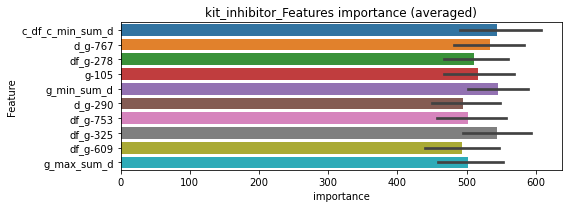

len(train_index) : 5696
len(valid_index) : 1899
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0487248	valid_1's binary_logloss: 0.0968382
[2000]	training's binary_logloss: 0.0245614	valid_1's binary_logloss: 0.073633
[3000]	training's binary_logloss: 0.0161699	valid_1's binary_logloss: 0.0651834
[4000]	training's binary_logloss: 0.0120615	valid_1's binary_logloss: 0.0611765
[5000]	training's binary_logloss: 0.00959177	valid_1's binary_logloss: 0.0585758
Early stopping, best iteration is:
[5161]	training's binary_logloss: 0.00927745	valid_1's binary_logloss: 0.0581109


len(train_index) : 5696
len(valid_index) : 1899
================================= fold 2/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0491743	valid_1's binary_logloss: 0.0896475
[2000]	training's binary_logloss: 0.0248192	valid_1's binary_logloss: 0.0656417
[3000]	training's binary_logloss: 0.0163388	valid_1's binary_logloss: 0.0560386
[4000]	training's binary_logloss: 0.012193	valid_1's binary_logloss: 0.0513644
Early stopping, best iteration is:
[4931]	training's binary_logloss: 0.00982258	valid_1's binary_logloss: 0.0486156


len(train_index) : 5696
len(valid_index) : 1899
================================= fold 3/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0476004	valid_1's binary_logloss: 0.10218
[2000]	training's binary_logloss: 0.0239294	valid_1's binary_logloss: 0.0801876
[3000]	training's binary_logloss: 0.0157624	valid_1's binary_logloss: 0.0719539
[4000]	training's binary_logloss: 0.0117566	valid_1's binary_logloss: 0.0678932
Early stopping, best iteration is:
[4847]	training's binary_logloss: 0.00963675	valid_1's binary_logloss: 0.0656102


len(train_index) : 5697
len(valid_index) : 1898
================================= fold 4/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.048811	valid_1's binary_logloss: 0.0944627
[2000]	training's binary_logloss: 0.0245325	valid_1's binary_logloss: 0.0723271
[3000]	training's binary_logloss: 0.0161155	valid_1's binary_logloss: 0.0642769
[4000]	training's binary_logloss: 0.0120216	valid_1's binary_logloss: 0.059937
[5000]	training's binary_logloss: 0.00955379	valid_1's binary_logloss: 0.0572755
Early stopping, best iteration is:
[5359]	training's binary_logloss: 0.00889839	valid_1's binary_logloss: 0.0565816


kit_inhibitor logloss: 0.05722965944205583
kit_inhibitor is unpredictable(><)!
laxative, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000153357	valid_1's binary_logloss: 0.000194661
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000151233	valid_1's binary_logloss: 0.00126174
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000151549	valid_1's binary_logloss: 0.000181455
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004303, Threshold: 0.0012664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0012664, conf_0:0.00089, conf_1:0.00165
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0312664
threshold: 0.0312664, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000153112	valid_1's binary_logloss: 0.000202879


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000143915	valid_1's binary_logloss: 0.000177879
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000143109	valid_1's binary_logloss: 0.00147655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000145595	valid_1's binary_logloss: 0.000154601
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0721841, Threshold: 0.0312664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.0312664, conf_0:0.02501, conf_1:0.03752
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0612664
threshold: 0.0612664, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000143818	valid_1's binary_logloss: 0.000184857


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000143915	valid_1's binary_logloss: 0.000177879
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000143109	valid_1's binary_logloss: 0.00147655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000145595	valid_1's binary_logloss: 0.000154601
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0721841, Threshold: 0.0612664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.0612664, conf_0:0.05514, conf_1:0.06739
threshold: 0.0612664, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000143818	valid_1's binary_logloss: 0.000184857


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


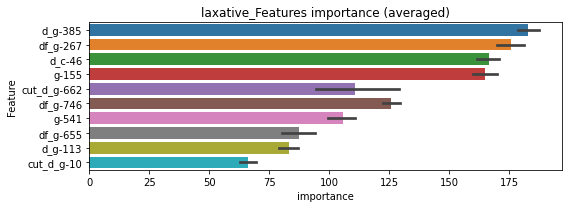

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148445	valid_1's binary_logloss: 0.000177605


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Early stopping, best iteration is:
[1212]	training's binary_logloss: 0.000145238	valid_1's binary_logloss: 0.000173727
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000147615	valid_1's binary_logloss: 0.000842546
Early stopping, best iteration is:
[1072]	training's binary_logloss: 0.000145993	valid_1's binary_logloss: 0.000838703


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149318	valid_1's binary_logloss: 0.000159575


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 laxative=================================


Early stopping, best iteration is:
[1131]	training's binary_logloss: 0.000146644	valid_1's binary_logloss: 0.000156671
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149582	valid_1's binary_logloss: 0.000190016


laxative logloss: 0.00033825907911229185


Early stopping, best iteration is:
[1372]	training's binary_logloss: 0.000144409	valid_1's binary_logloss: 0.000184108


leukotriene_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000160577	valid_1's binary_logloss: 0.000536264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000159342	valid_1's binary_logloss: 0.00552908
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000161386	valid_1's binary_logloss: 0.000233207
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005549, Threshold: 0.0012812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0012812, conf_0:0.00090, conf_1:0.00167
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0312812
threshold: 0.0312812, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000158883	valid_1's binary_logloss: 0.00019661


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000152174	valid_1's binary_logloss: 0.00045438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000150198	valid_1's binary_logloss: 0.00445229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151953	valid_1's binary_logloss: 0.000172789
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0143296, Threshold: 0.0312812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.0312812, conf_0:0.02502, conf_1:0.03754
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.0612812
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0912812
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.1212812
threshold: 0.1212812, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000151561	valid_1's binary_logloss: 0.000168004


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000152174	valid_1's binary_logloss: 0.00045438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000150198	valid_1's binary_logloss: 0.00445229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151953	valid_1's binary_logloss: 0.000172789
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0143296, Threshold: 0.1212812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.1212812, conf_0:0.10915, conf_1:0.13341
threshold: 0.1212812, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000151561	valid_1's binary_logloss: 0.000168004


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


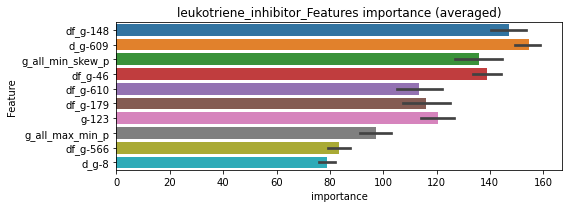

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152861	valid_1's binary_logloss: 0.000360305
Early stopping, best iteration is:
[1082]	training's binary_logloss: 0.000151331	valid_1's binary_logloss: 0.00035844


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151976	valid_1's binary_logloss: 0.00171336


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[1131]	training's binary_logloss: 0.000149559	valid_1's binary_logloss: 0.00170423
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150914	valid_1's binary_logloss: 0.000181501
Early stopping, best iteration is:
[1068]	training's binary_logloss: 0.000149664	valid_1's binary_logloss: 0.000180049


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152621	valid_1's binary_logloss: 0.000167041


leukotriene_inhibitor logloss: 0.000602110364610367


Early stopping, best iteration is:
[1109]	training's binary_logloss: 0.000150658	valid_1's binary_logloss: 0.000164887


leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3281
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000799006	valid_1's binary_logloss: 0.0407184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.0014096	valid_1's binary_logloss: 0.0395104
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000653404	valid_1's binary_logloss: 0.00590019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000641074	valid_1's binary_logloss: 0.0186809


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0051143, Threshold: 0.0112192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0112192, conf_0:0.00785, conf_1:0.01458
Num_p_label: 3.0, Expected: 10.4, Adj_threshold_1: 0.0412192
threshold: 0.0412192, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00116604	valid_1's binary_logloss: 0.0331577
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.00134352	valid_1's binary_logloss: 0.0265792
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000562298	valid_1's binary_logloss: 0.0121777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000645801	valid_1's binary_logloss: 0.0269961


2 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0233006, Threshold: 0.0412192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0020090 Vs.target_rate: 0.00260
Num_p_label: 8.0, Expected: 10.4, Threshold: 0.0412192, conf_0:0.03298, conf_1:0.04946
threshold: 0.0412192, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000531969	valid_1's binary_logloss: 0.0159546
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000648451	valid_1's binary_logloss: 0.0246976
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000863604	valid_1's binary_logloss: 0.0218708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00056696	valid_1's binary_logloss: 0.0140177


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0266769, Threshold: 0.0412192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0022602 Vs.target_rate: 0.00260
Num_p_label: 9.0, Expected: 10.4, Threshold: 0.0412192, conf_0:0.03710, conf_1:0.04534
threshold: 0.0412192, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 648.0/3789, y_label_rate: 0.1710214


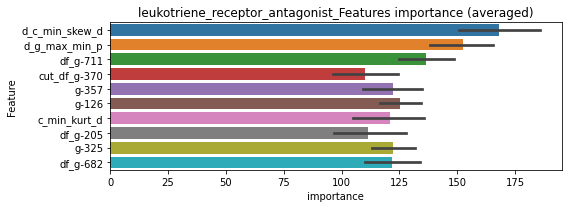

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000699695	valid_1's binary_logloss: 0.0196106


len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 leukotriene_receptor_antagonist=================================


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000815267	valid_1's binary_logloss: 0.0135213
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000562482	valid_1's binary_logloss: 0.0132712


len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


leukotriene_receptor_antagonist logloss: 0.01576193653390289


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000800155	valid_1's binary_logloss: 0.0166386


lipase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000218448	valid_1's binary_logloss: 0.00507746
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000218282	valid_1's binary_logloss: 0.00085662
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000228785	valid_1's binary_logloss: 0.000283942
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008451, Threshold: 0.0019468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0019468, conf_0:0.00136, conf_1:0.00253
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0319468
threshold: 0.0319468, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000223586	valid_1's binary_logloss: 0.00133144


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000227024	valid_1's binary_logloss: 0.00376673
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000214015	valid_1's binary_logloss: 0.000800388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000212159	valid_1's binary_logloss: 0.000261869
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316934, Threshold: 0.0319468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00050
Num_p_label: 7.0, Expected: 2.0, Threshold: 0.0319468, conf_0:0.02556, conf_1:0.03834
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0619468
threshold: 0.0619468, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000212851	valid_1's binary_logloss: 0.00157237


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000227024	valid_1's binary_logloss: 0.00376673
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000214015	valid_1's binary_logloss: 0.000800388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000212159	valid_1's binary_logloss: 0.000261869
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316934, Threshold: 0.0619468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0619468, conf_0:0.05575, conf_1:0.06814
threshold: 0.0619468, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000212851	valid_1's binary_logloss: 0.00157237


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


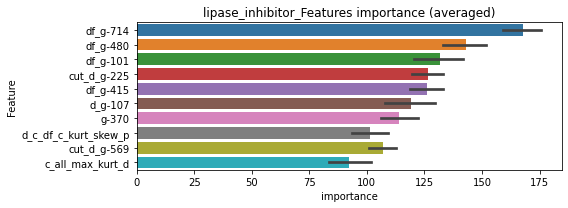

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[897]	training's binary_logloss: 0.00021461	valid_1's binary_logloss: 0.00192868
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000212906	valid_1's binary_logloss: 0.00044202
Early stopping, best iteration is:
[1032]	training's binary_logloss: 0.00021222	valid_1's binary_logloss: 0.000441343


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000215976	valid_1's binary_logloss: 0.000269047
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000208278	valid_1's binary_logloss: 0.000690095
Early stopping, best iteration is:
[1032]	training's binary_logloss: 0.000208232	valid_1's binary_logloss: 0.000690031


lipase_inhibitor logloss: 0.0008325616958590264
lipoxygenase_inhibitor, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:313
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000642394	valid_1's binary_logloss: 0.019137
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000534407	valid_1's binary_logloss: 0.00968382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000558863	valid_1's binary_logloss: 0.0138084
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000565183	valid_1's binary_logloss: 0.0233765


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0054360, Threshold: 0.0847418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0847418, conf_0:0.05932, conf_1:0.11016
Num_p_label: 39.0, Expected: 10.2, Adj_threshold_1: 0.1147418
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_2: 0.1447418
Num_p_label: 32.0, Expected: 10.2, Adj_threshold_3: 0.1747418
Num_p_label: 31.0, Expected: 10.2, Adj_threshold_4: 0.2047418
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_5: 0.2347418
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_6: 0.2647418
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_7: 0.2947418
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_8: 0.3247418
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_9: 0.3547418
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_10: 0.3847418
threshold: 0.3847418, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000760533	valid_1's binary_logloss: 0.0206911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000538312	valid_1's binary_logloss: 0.0167079
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000533622	valid_1's binary_logloss: 0.00934085
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0257960, Threshold: 0.3847418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.00110275	valid_1's binary_logloss: 0.0351071


p_label_rate: 0.0092918 Vs.target_rate: 0.00256
Num_p_label: 37.0, Expected: 10.2, Threshold: 0.3847418, conf_0:0.30779, conf_1:0.46169
Num_p_label: 36.0, Expected: 10.2, Adj_threshold_1: 0.4147418
Num_p_label: 36.0, Expected: 10.2, Adj_threshold_2: 0.4447418
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_3: 0.4747418
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_4: 0.5047418
Num_p_label: 33.0, Expected: 10.2, Adj_threshold_5: 0.5347418
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_6: 0.5647418
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_7: 0.5947418
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_8: 0.6247418
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_9: 0.6547418
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_10: 0.6847418
threshold: 0.6847418, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000928793	valid_1's binary_logloss: 0.0250806
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000578	valid_1's binary_logloss: 0.0143207
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000576415	valid_1's binary_logloss: 0.0147836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000538133	valid_1's binary_logloss: 0.0118693


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0309536, Threshold: 0.6847418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0050226 Vs.target_rate: 0.00256
Num_p_label: 20.0, Expected: 10.2, Threshold: 0.6847418, conf_0:0.61627, conf_1:0.75322
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_1: 0.7147418
Num_p_label: 14.0, Expected: 10.2, Adj_threshold_2: 0.7447418
threshold: 0.7447418, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 649.0/3790, y_label_rate: 0.1712401


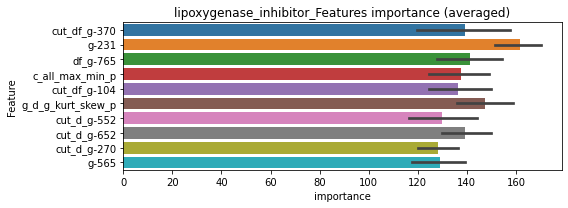

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000556743	valid_1's binary_logloss: 0.00969121


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000616224	valid_1's binary_logloss: 0.0135232


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000572651	valid_1's binary_logloss: 0.0216626


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000673048	valid_1's binary_logloss: 0.0196195


lipoxygenase_inhibitor logloss: 0.01612174006380028
lxr_agonist, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000168462	valid_1's binary_logloss: 0.000944164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000169353	valid_1's binary_logloss: 0.00142441
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000173981	valid_1's binary_logloss: 0.000203808
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004834, Threshold: 0.0023534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0023534, conf_0:0.00165, conf_1:0.00306
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0323534
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0623534


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000166301	valid_1's binary_logloss: 0.000551345


threshold: 0.0623534, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000159505	valid_1's binary_logloss: 0.000655107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000148964	valid_1's binary_logloss: 0.00134575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000149213	valid_1's binary_logloss: 0.000161072
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0649559, Threshold: 0.0623534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00025
Num_p_label: 13.0, Expected: 1.0, Threshold: 0.0623534, conf_0:0.04988, conf_1:0.07482
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.0923534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.1223534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_3: 0.1523534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_4: 0.1823534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_5: 0.2123534
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_6: 0.2423534
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_7: 0.2723534
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_8: 0.3023534
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_9: 0.3323534
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_10: 0.3623534
threshold: 0.3623534, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000150671	valid_1's binary_logloss: 0.000222065


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000159505	valid_1's binary_logloss: 0.000655107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000148964	valid_1's binary_logloss: 0.00134575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000149213	valid_1's binary_logloss: 0.000161072
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0649559, Threshold: 0.3623534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.3623534, conf_0:0.32612, conf_1:0.39859
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.3923534
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.4223534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.4523534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.4823534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.5123534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.5423534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.5723534
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_8: 0.6023534
threshold: 0.6023534, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000150671	valid_1's binary_logloss: 0.000222065


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


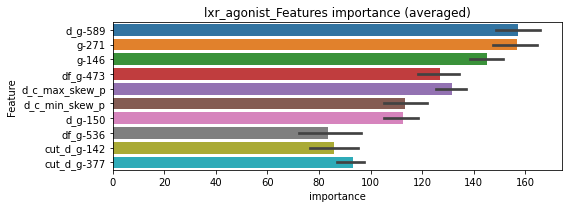

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000153915	valid_1's binary_logloss: 0.000353597
Early stopping, best iteration is:
[1062]	training's binary_logloss: 0.000152871	valid_1's binary_logloss: 0.000352011


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152555	valid_1's binary_logloss: 0.000442833


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Early stopping, best iteration is:
[1121]	training's binary_logloss: 0.000150314	valid_1's binary_logloss: 0.000438478
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000154182	valid_1's binary_logloss: 0.000166956


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Early stopping, best iteration is:
[1188]	training's binary_logloss: 0.000151478	valid_1's binary_logloss: 0.000163935
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152844	valid_1's binary_logloss: 0.000197413


lxr_agonist logloss: 0.0002875145743924578


Early stopping, best iteration is:
[1106]	training's binary_logloss: 0.000151452	valid_1's binary_logloss: 0.000195634


mdm_inhibitor, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000403088	valid_1's binary_logloss: 0.00696813
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000430864	valid_1's binary_logloss: 0.00401303
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000411653	valid_1's binary_logloss: 0.00253557
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000409915	valid_1's binary_logloss: 0.00449951


y_Threshold: 0.0027126, Threshold: 0.0361704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0361704, conf_0:0.02532, conf_1:0.04702
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_1: 0.0661704
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_2: 0.0961704
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_3: 0.1261704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_4: 0.1561704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_5: 0.1861704
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_6: 0.2161704
threshold: 0.2161704, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000393089	valid_1's binary_logloss: 0.00623249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000380754	valid_1's binary_logloss: 0.00320197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000393229	valid_1's binary_logloss: 0.00118288
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323944, Threshold: 0.2161704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0087896 Vs.target_rate: 0.00130


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000414117	valid_1's binary_logloss: 0.00286147


Num_p_label: 35.0, Expected: 5.2, Threshold: 0.2161704, conf_0:0.17294, conf_1:0.25940
Num_p_label: 29.0, Expected: 5.2, Adj_threshold_1: 0.2461704
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_2: 0.2761704
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_3: 0.3061704
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_4: 0.3361704
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_5: 0.3661704
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_6: 0.3961704
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_7: 0.4261704
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_8: 0.4561704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_9: 0.4861704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_10: 0.5161704
threshold: 0.5161704, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000393089	valid_1's binary_logloss: 0.00623249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000380754	valid_1's binary_logloss: 0.00320197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000393229	valid_1's binary_logloss: 0.00118288
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000414117	valid_1's binary_logloss: 0.00286147


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323944, Threshold: 0.5161704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00130
Num_p_label: 13.0, Expected: 5.2, Threshold: 0.5161704, conf_0:0.46455, conf_1:0.56779
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_1: 0.5461704
threshold: 0.5461704, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


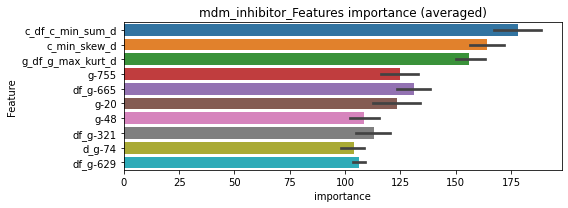

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000395529	valid_1's binary_logloss: 0.00379976


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000405835	valid_1's binary_logloss: 0.00332775


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000400397	valid_1's binary_logloss: 0.00118144


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000409005	valid_1's binary_logloss: 0.00290718


mdm_inhibitor logloss: 0.0028041296121338803
mek_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3273


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000614321	valid_1's binary_logloss: 0.0256426
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000600395	valid_1's binary_logloss: 0.0239754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000590767	valid_1's binary_logloss: 0.00569473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000669241	valid_1's binary_logloss: 0.0296798


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0057713, Threshold: 0.0209722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 654/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0209722, conf_0:0.01468, conf_1:0.02726
Num_p_label: 3.0, Expected: 12.0, Adj_threshold_1: 0.0509722
threshold: 0.0509722, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3795, y_label_rate: 0.1723320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.00062487	valid_1's binary_logloss: 0.0262689
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000585085	valid_1's binary_logloss: 0.0237277
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000591348	valid_1's binary_logloss: 0.0047423
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000611814	valid_1's binary_logloss: 0.0247701


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0201435, Threshold: 0.0509722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3787
p_label_rate: 0.0057760 Vs.target_rate: 0.00302
Num_p_label: 23.0, Expected: 12.0, Threshold: 0.0509722, conf_0:0.04078, conf_1:0.06117
Num_p_label: 10.0, Expected: 12.0, Adj_threshold_1: 0.0809722
threshold: 0.0809722, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.00071069	valid_1's binary_logloss: 0.0181859
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000597334	valid_1's binary_logloss: 0.0134643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000590545	valid_1's binary_logloss: 0.0165468
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00067439	valid_1's binary_logloss: 0.0141217


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246051, Threshold: 0.0809722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 649.0/3785
p_label_rate: 0.0030136 Vs.target_rate: 0.00302
Num_p_label: 12.0, Expected: 12.0, Threshold: 0.0809722, conf_0:0.07287, conf_1:0.08907
threshold: 0.0809722, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3785, y_label_rate: 0.1714663


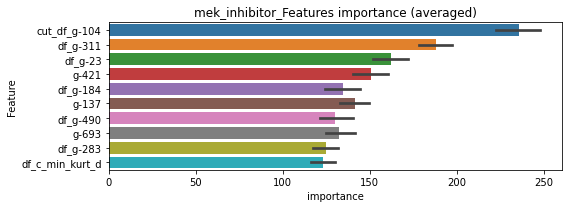

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000804354	valid_1's binary_logloss: 0.0227298


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000616491	valid_1's binary_logloss: 0.0194175


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000715119	valid_1's binary_logloss: 0.0166142


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds


mek_inhibitor logloss: 0.018657593802092986


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000931487	valid_1's binary_logloss: 0.0158646


membrane_integrity_inhibitor, len(trt): 74, len(othr): 3279
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000667733	valid_1's binary_logloss: 0.0208992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000660533	valid_1's binary_logloss: 0.0279782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000988466	valid_1's binary_logloss: 0.0310065
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000786763	valid_1's binary_logloss: 0.0300372


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0057424, Threshold: 0.0181684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.0181684, conf_0:0.01272, conf_1:0.02362
Num_p_label: 6.0, Expected: 12.4, Adj_threshold_1: 0.0481684
threshold: 0.0481684, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000786701	valid_1's binary_logloss: 0.0231906
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000632664	valid_1's binary_logloss: 0.0275624
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000779746	valid_1's binary_logloss: 0.0233566
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211019, Threshold: 0.0481684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0037670 Vs.target_rate: 0.00311


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00103321	valid_1's binary_logloss: 0.0337524


Num_p_label: 15.0, Expected: 12.4, Threshold: 0.0481684, conf_0:0.03853, conf_1:0.05780
threshold: 0.0481684, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000566713	valid_1's binary_logloss: 0.0175932
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000609897	valid_1's binary_logloss: 0.0263719
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000709556	valid_1's binary_logloss: 0.0330151
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000764553	valid_1's binary_logloss: 0.0290297


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0173244, Threshold: 0.0481684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 644.0/3780
p_label_rate: 0.0032647 Vs.target_rate: 0.00311
Num_p_label: 13.0, Expected: 12.4, Threshold: 0.0481684, conf_0:0.04335, conf_1:0.05299
threshold: 0.0481684, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 644.0/3780, y_label_rate: 0.1703704


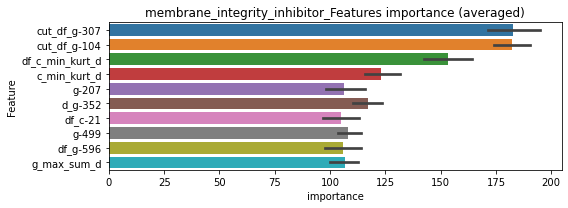

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000879874	valid_1's binary_logloss: 0.0222995
Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000886223	valid_1's binary_logloss: 0.0246243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.00059825	valid_1's binary_logloss: 0.0112005


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


membrane_integrity_inhibitor logloss: 0.021077935115658804


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000957779	valid_1's binary_logloss: 0.0261874


mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3281
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3281


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000347145	valid_1's binary_logloss: 0.00208707
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000351549	valid_1's binary_logloss: 0.00254108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000353168	valid_1's binary_logloss: 0.00140059
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018504, Threshold: 0.0051409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0051409, conf_0:0.00360, conf_1:0.00668
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_1: 0.0351409


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000360299	valid_1's binary_logloss: 0.00822544


threshold: 0.0351409, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000344073	valid_1's binary_logloss: 0.00171995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034871	valid_1's binary_logloss: 0.00214892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000351906	valid_1's binary_logloss: 0.00139028
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113079, Threshold: 0.0351409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.0351409, conf_0:0.02811, conf_1:0.04217


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000381316	valid_1's binary_logloss: 0.00889272


threshold: 0.0351409, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000344073	valid_1's binary_logloss: 0.00171995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034871	valid_1's binary_logloss: 0.00214892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000351906	valid_1's binary_logloss: 0.00139028
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113079, Threshold: 0.0351409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.0351409, conf_0:0.03163, conf_1:0.03865


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000381316	valid_1's binary_logloss: 0.00889272


threshold: 0.0351409, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


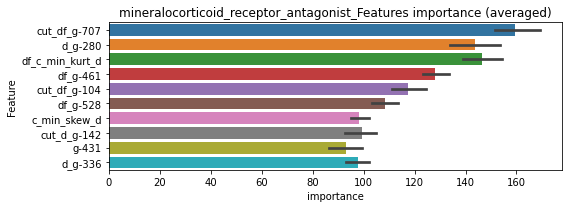

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000335245	valid_1's binary_logloss: 0.00190701


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000347407	valid_1's binary_logloss: 0.0021514


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.00034661	valid_1's binary_logloss: 0.00134472


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00035973	valid_1's binary_logloss: 0.00762624


mineralocorticoid_receptor_antagonist logloss: 0.0032577012845831383
monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3284
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3284


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00022456	valid_1's binary_logloss: 0.00213293
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000228446	valid_1's binary_logloss: 0.00369653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000229948	valid_1's binary_logloss: 0.000417409
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008240, Threshold: 0.0018187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0018187, conf_0:0.00127, conf_1:0.00236
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_1: 0.0318187
threshold: 0.0318187, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000229791	valid_1's binary_logloss: 0.000356436


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00021874	valid_1's binary_logloss: 0.00274854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000216367	valid_1's binary_logloss: 0.00381744
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000222424	valid_1's binary_logloss: 0.000270421
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0171529, Threshold: 0.0318187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0318187, conf_0:0.02545, conf_1:0.03818
threshold: 0.0318187, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000214829	valid_1's binary_logloss: 0.000477777


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00021874	valid_1's binary_logloss: 0.00274854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000216367	valid_1's binary_logloss: 0.00381744
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000222424	valid_1's binary_logloss: 0.000270421
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0171529, Threshold: 0.0318187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0318187, conf_0:0.02864, conf_1:0.03500
threshold: 0.0318187, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000214829	valid_1's binary_logloss: 0.000477777


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


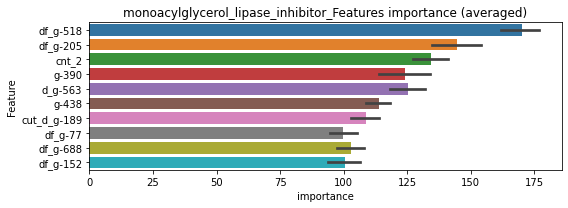

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000229288	valid_1's binary_logloss: 0.00279274
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000217587	valid_1's binary_logloss: 0.00289986
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000218228	valid_1's binary_logloss: 0.000281663


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


monoacylglycerol_lipase_inhibitor logloss: 0.0015859713130587367


Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000218262	valid_1's binary_logloss: 0.000368703


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3272
target_rate: 0.0035693 → Adj_target_rate: 0.0036661


selected negative label: 3272


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0482546	valid_1's binary_logloss: 0.0976145
[2000]	training's binary_logloss: 0.0240703	valid_1's binary_logloss: 0.0744233
[3000]	training's binary_logloss: 0.015831	valid_1's binary_logloss: 0.0659961
[4000]	training's binary_logloss: 0.0117823	valid_1's binary_logloss: 0.0618637
[5000]	training's binary_logloss: 0.00940979	valid_1's binary_logloss: 0.0591076
Early stopping, best iteration is:
[5088]	training's binary_logloss: 0.00924292	valid_1's binary_logloss: 0.0588741
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0492453	valid_1's binary_logloss: 0.0940831
[2000]	training's binary_logloss: 0.0245098	valid_1's binary_logloss: 0.0689209
[3000]	training's binary_logloss: 0.0160676	valid_1's binary_logloss: 0.059217
[4000]	training's binary_logloss: 0.0119161	valid_1's binary_logloss: 0.0540366
[5000]	training's binary_logloss: 0.0094986

1 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0351012, Threshold: 0.0841433, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 643/3772
p_label_rate: 0.0100452 Vs.target_rate: 0.00357
Num_p_label: 40.0, Expected: 14.2, Threshold: 0.0841433, conf_0:0.05890, conf_1:0.10939
Num_p_label: 11.0, Expected: 14.2, Adj_threshold_1: 0.1141433
threshold: 0.1141433, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 643.0/3772, y_label_rate: 0.1704666
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0445173	valid_1's binary_logloss: 0.0918065
[2000]	training's binary_logloss: 0.0220794	valid_1's binary_logloss: 0.0700336
[3000]	training's binary_logloss: 0.0145469	valid_1's binary_logloss: 0.0626052
[4000]	training's binary_logloss: 0.0108368	valid_1's binary_logloss: 0.0585098
Early stopping, best iteration is:
[4336]	training's binary_logloss: 0.00998855	valid_1's binary_logloss: 0.0575982
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0443425	valid_1's binary_logloss: 0.0903807
[2000]	training's binary_logloss: 0.0219295	valid_1's binary_logloss: 0.0676257
[3000]	training's binary_logloss: 0.0144139	valid_1's binary_logloss: 0.0596856
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.01186	valid_1's binary_logloss: 0.0567497
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_log

2 / 3, AUC score:0.998, PR-AUC:0.997
y_Threshold: 0.0687739, Threshold: 0.1141433, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 636.0/3758
p_label_rate: 0.0107986 Vs.target_rate: 0.00357
Num_p_label: 43.0, Expected: 14.2, Threshold: 0.1141433, conf_0:0.09131, conf_1:0.13697
Num_p_label: 16.0, Expected: 14.2, Adj_threshold_1: 0.1441433
threshold: 0.1441433, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 636.0/3758, y_label_rate: 0.1692390
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0423756	valid_1's binary_logloss: 0.0999719
[2000]	training's binary_logloss: 0.0210487	valid_1's binary_logloss: 0.0783467
Early stopping, best iteration is:
[2796]	training's binary_logloss: 0.0149401	valid_1's binary_logloss: 0.0721738
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0445839	valid_1's binary_logloss: 0.0695264
[2000]	training's binary_logloss: 0.0221099	valid_1's binary_logloss: 0.0467843
[3000]	training's binary_logloss: 0.0145693	valid_1's binary_logloss: 0.0384783
[4000]	training's binary_logloss: 0.0108729	valid_1's binary_logloss: 0.0341237
[5000]	training's binary_logloss: 0.00869713	valid_1's binary_logloss: 0.0313337
[6000]	training's binary_logloss: 0.00724729	valid_1's binary_logloss: 0.0294148
[7000]	training's binary_logloss: 0.00622792	valid_1's binary_logloss: 0.0280738
[8000]	training's binary_logloss: 0.0054

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0796207, Threshold: 0.1441433, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 629.0/3744
p_label_rate: 0.0035158 Vs.target_rate: 0.00357
Num_p_label: 14.0, Expected: 14.2, Threshold: 0.1441433, conf_0:0.12973, conf_1:0.15856
threshold: 0.1441433, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 629.0/3744, y_label_rate: 0.1680021


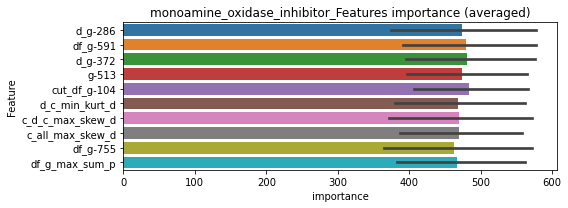

len(train_index) : 2808
len(valid_index) : 936
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0451532	valid_1's binary_logloss: 0.0850143
[2000]	training's binary_logloss: 0.0228316	valid_1's binary_logloss: 0.0598307
[3000]	training's binary_logloss: 0.0151888	valid_1's binary_logloss: 0.0500592
[4000]	training's binary_logloss: 0.0113776	valid_1's binary_logloss: 0.044835
[5000]	training's binary_logloss: 0.00909861	valid_1's binary_logloss: 0.0415654
Early stopping, best iteration is:
[5559]	training's binary_logloss: 0.0081861	valid_1's binary_logloss: 0.0400368


len(train_index) : 2808
len(valid_index) : 936
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0443658	valid_1's binary_logloss: 0.0845163
[2000]	training's binary_logloss: 0.0224497	valid_1's binary_logloss: 0.0622621
[3000]	training's binary_logloss: 0.0149112	valid_1's binary_logloss: 0.0539229
[4000]	training's binary_logloss: 0.0111811	valid_1's binary_logloss: 0.0495925
[5000]	training's binary_logloss: 0.00894685	valid_1's binary_logloss: 0.0468567
[6000]	training's binary_logloss: 0.00747682	valid_1's binary_logloss: 0.0450486
[7000]	training's binary_logloss: 0.00643223	valid_1's binary_logloss: 0.043697
[8000]	training's binary_logloss: 0.00564962	valid_1's binary_logloss: 0.0425599
Early stopping, best iteration is:
[8924]	training's binary_logloss: 0.00508679	valid_1's binary_logloss: 0.0417777


len(train_index) : 2808
len(valid_index) : 936
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0456892	valid_1's binary_logloss: 0.0811578
[2000]	training's binary_logloss: 0.023195	valid_1's binary_logloss: 0.0591793
[3000]	training's binary_logloss: 0.0154304	valid_1's binary_logloss: 0.0508526
[4000]	training's binary_logloss: 0.0115387	valid_1's binary_logloss: 0.0465498
[5000]	training's binary_logloss: 0.00922119	valid_1's binary_logloss: 0.0437266
[6000]	training's binary_logloss: 0.00769669	valid_1's binary_logloss: 0.0418808
[7000]	training's binary_logloss: 0.00661545	valid_1's binary_logloss: 0.0405779
[8000]	training's binary_logloss: 0.00580533	valid_1's binary_logloss: 0.0394656
[9000]	training's binary_logloss: 0.00518007	valid_1's binary_logloss: 0.0387138
Early stopping, best iteration is:
[9046]	training's binary_logloss: 0.00515437	valid_1's binary_logloss: 0.0386669


len(train_index) : 2808
len(valid_index) : 936
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0461013	valid_1's binary_logloss: 0.0708362
[2000]	training's binary_logloss: 0.0234536	valid_1's binary_logloss: 0.0474698
[3000]	training's binary_logloss: 0.0156172	valid_1's binary_logloss: 0.0387332
[4000]	training's binary_logloss: 0.0116759	valid_1's binary_logloss: 0.0340166
[5000]	training's binary_logloss: 0.00936172	valid_1's binary_logloss: 0.0312137
[6000]	training's binary_logloss: 0.00780829	valid_1's binary_logloss: 0.0290148
[7000]	training's binary_logloss: 0.00671084	valid_1's binary_logloss: 0.0275145
[8000]	training's binary_logloss: 0.00588868	valid_1's binary_logloss: 0.0263822
[9000]	training's binary_logloss: 0.00525181	valid_1's binary_logloss: 0.0254033
[10000]	training's binary_logloss: 0.00475079	valid_1's binary_logloss: 0.0246411
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00475079	valid_1's binary_logloss: 0.0246411


monoamine_oxidase_inhibitor logloss: 0.036280625100625144
monoamine_oxidase_inhibitor is unpredictable(><)!
monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00030715	valid_1's binary_logloss: 0.000888263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000311369	valid_1's binary_logloss: 0.00179395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00030891	valid_1's binary_logloss: 0.00218472
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016201, Threshold: 0.0166980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0166980, conf_0:0.01169, conf_1:0.02171
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_1: 0.0466980
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.0766980
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1066980
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.1366980


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000307446	valid_1's binary_logloss: 0.00275058


threshold: 0.1366980, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000297245	valid_1's binary_logloss: 0.000575728
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000294709	valid_1's binary_logloss: 0.00159832
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000299691	valid_1's binary_logloss: 0.00210876
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509281, Threshold: 0.1366980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0072828 Vs.target_rate: 0.00076
Num_p_label: 29.0, Expected: 3.0, Threshold: 0.1366980, conf_0:0.10936, conf_1:0.16404
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_1: 0.1666980
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_2: 0.1966980
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_3: 0.2266980
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_4: 0.2566980
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_5: 0.2866980
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.3166980
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.3466980


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000290313	valid_1's binary_logloss: 0.00201988


Num_p_label: 10.0, Expected: 3.0, Adj_threshold_8: 0.3766980
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_9: 0.4066980
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_10: 0.4366980
threshold: 0.4366980, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000297245	valid_1's binary_logloss: 0.000575728
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000294709	valid_1's binary_logloss: 0.00159832
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000299691	valid_1's binary_logloss: 0.00210876
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509281, Threshold: 0.4366980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00076
Num_p_label: 8.0, Expected: 3.0, Threshold: 0.4366980, conf_0:0.39303, conf_1:0.48037
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.4666980


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000290313	valid_1's binary_logloss: 0.00201988


threshold: 0.4666980, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


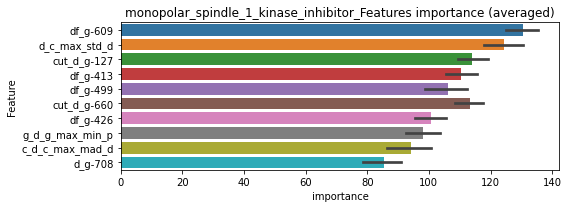

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000298611	valid_1's binary_logloss: 0.000550395


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000298749	valid_1's binary_logloss: 0.00153476


================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000301315	valid_1's binary_logloss: 0.00105052


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000296596	valid_1's binary_logloss: 0.00124356


monopolar_spindle_1_kinase_inhibitor logloss: 0.0010947231612758394


mutually exclusive columns: mtor_inhibitor


mtor_inhibitor, len(trt): 130, len(othr): 2722
target_rate: 0.0054590 → Adj_target_rate: 0.0052608


selected negative label: 2722


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0796894	valid_1's binary_logloss: 0.163782
[2000]	training's binary_logloss: 0.0407269	valid_1's binary_logloss: 0.128768
[3000]	training's binary_logloss: 0.0267466	valid_1's binary_logloss: 0.114736
[4000]	training's binary_logloss: 0.019862	valid_1's binary_logloss: 0.108718
Early stopping, best iteration is:
[4165]	training's binary_logloss: 0.0190372	valid_1's binary_logloss: 0.107857
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0792904	valid_1's binary_logloss: 0.165525
[2000]	training's binary_logloss: 0.0404999	valid_1's binary_logloss: 0.130964
[3000]	training's binary_logloss: 0.026605	valid_1's binary_logloss: 0.118432
[4000]	training's binary_logloss: 0.0197108	valid_1's binary_logloss: 0.111859
[5000]	training's binary_logloss: 0.0156902	valid_1's binary_logloss: 0.107336
Early stopping, best iteration is:
[5063]	training's bi

1 / 3, AUC score:0.975, PR-AUC:0.958
y_Threshold: 0.0795316, Threshold: 0.1671108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 176 → Positive_corect_labels: 511/3090
p_label_rate: 0.0100452 Vs.target_rate: 0.00546
Num_p_label: 40.0, Expected: 21.7, Threshold: 0.1671108, conf_0:0.11698, conf_1:0.21724
Num_p_label: 25.0, Expected: 21.7, Adj_threshold_1: 0.1971108
threshold: 0.1971108, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 511.0/3090, y_label_rate: 0.1653722
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0681023	valid_1's binary_logloss: 0.132644
[2000]	training's binary_logloss: 0.0341295	valid_1's binary_logloss: 0.0954308
[3000]	training's binary_logloss: 0.0224213	valid_1's binary_logloss: 0.0797077
[4000]	training's binary_logloss: 0.0167103	valid_1's binary_logloss: 0.0719009
[5000]	training's binary_logloss: 0.0133163	valid_1's binary_logloss: 0.0666413
[6000]	training's binary_logloss: 0.0110831	valid_1's binary_logloss: 0.0631365
[7000]	training's binary_logloss: 0.00950968	valid_1's binary_logloss: 0.060461
[8000]	training's binary_logloss: 0.00834495	valid_1's binary_logloss: 0.0583858
Early stopping, best iteration is:
[8099]	training's binary_logloss: 0.00824426	valid_1's binary_logloss: 0.0581959
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0676653	valid_1's binary_logloss: 0.133504
[2000]	training's binary_logloss: 0.033903	

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.1034276, Threshold: 0.1971108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 494.0/3056
p_label_rate: 0.0115520 Vs.target_rate: 0.00546
Num_p_label: 46.0, Expected: 21.7, Threshold: 0.1971108, conf_0:0.15769, conf_1:0.23653
Num_p_label: 34.0, Expected: 21.7, Adj_threshold_1: 0.2271108
Num_p_label: 24.0, Expected: 21.7, Adj_threshold_2: 0.2571108
threshold: 0.2571108, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 494.0/3056, y_label_rate: 0.1616492
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0623118	valid_1's binary_logloss: 0.167712
[2000]	training's binary_logloss: 0.0310705	valid_1's binary_logloss: 0.141752
[3000]	training's binary_logloss: 0.0203805	valid_1's binary_logloss: 0.132879
Early stopping, best iteration is:
[3291]	training's binary_logloss: 0.0185599	valid_1's binary_logloss: 0.131514
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0649083	valid_1's binary_logloss: 0.139351
[2000]	training's binary_logloss: 0.0323755	valid_1's binary_logloss: 0.101944
[3000]	training's binary_logloss: 0.0211927	valid_1's binary_logloss: 0.0876058
[4000]	training's binary_logloss: 0.0157669	valid_1's binary_logloss: 0.0800999
Early stopping, best iteration is:
[4341]	training's binary_logloss: 0.0144881	valid_1's binary_logloss: 0.0782657
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss:

3 / 3, AUC score:0.990, PR-AUC:0.983
y_Threshold: 0.1093260, Threshold: 0.2571108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 472.0/3012
p_label_rate: 0.0072828 Vs.target_rate: 0.00546
Num_p_label: 29.0, Expected: 21.7, Threshold: 0.2571108, conf_0:0.23140, conf_1:0.28282
threshold: 0.2571108, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 472.0/3012, y_label_rate: 0.1567065


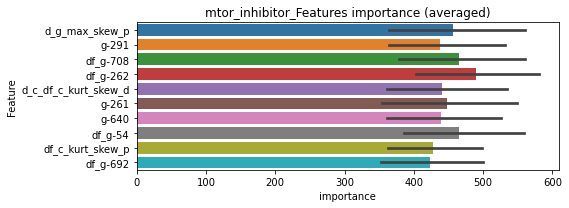

len(train_index) : 2259
len(valid_index) : 753
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0642874	valid_1's binary_logloss: 0.135829
[2000]	training's binary_logloss: 0.0325171	valid_1's binary_logloss: 0.106349
[3000]	training's binary_logloss: 0.0214952	valid_1's binary_logloss: 0.0948363
Early stopping, best iteration is:
[3331]	training's binary_logloss: 0.0193224	valid_1's binary_logloss: 0.0924266


len(train_index) : 2259
len(valid_index) : 753
================================= fold 2/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0666426	valid_1's binary_logloss: 0.117938
[2000]	training's binary_logloss: 0.0338207	valid_1's binary_logloss: 0.0815875
[3000]	training's binary_logloss: 0.0223652	valid_1's binary_logloss: 0.0671665
[4000]	training's binary_logloss: 0.0167053	valid_1's binary_logloss: 0.0596327
[5000]	training's binary_logloss: 0.0133309	valid_1's binary_logloss: 0.0551255
[6000]	training's binary_logloss: 0.0111011	valid_1's binary_logloss: 0.0517381
[7000]	training's binary_logloss: 0.00953179	valid_1's binary_logloss: 0.049521
[8000]	training's binary_logloss: 0.00835328	valid_1's binary_logloss: 0.0476741
[9000]	training's binary_logloss: 0.00744982	valid_1's binary_logloss: 0.0462118
Early stopping, best iteration is:
[9355]	training's binary_logloss: 0.00717208	valid_1's binary_logloss: 0.0457571


len(train_index) : 2259
len(valid_index) : 753
================================= fold 3/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0645959	valid_1's binary_logloss: 0.135792
[2000]	training's binary_logloss: 0.0328832	valid_1's binary_logloss: 0.10087
[3000]	training's binary_logloss: 0.0217451	valid_1's binary_logloss: 0.0867804
[4000]	training's binary_logloss: 0.0162803	valid_1's binary_logloss: 0.0797524
Early stopping, best iteration is:
[4550]	training's binary_logloss: 0.0142826	valid_1's binary_logloss: 0.0771148


len(train_index) : 2259
len(valid_index) : 753
================================= fold 4/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0646677	valid_1's binary_logloss: 0.133949
[2000]	training's binary_logloss: 0.0328905	valid_1's binary_logloss: 0.101709
[3000]	training's binary_logloss: 0.0217345	valid_1's binary_logloss: 0.0893541
[4000]	training's binary_logloss: 0.0162309	valid_1's binary_logloss: 0.08242
[5000]	training's binary_logloss: 0.0129555	valid_1's binary_logloss: 0.0781591
[6000]	training's binary_logloss: 0.0107963	valid_1's binary_logloss: 0.0754952
Early stopping, best iteration is:
[6961]	training's binary_logloss: 0.00932449	valid_1's binary_logloss: 0.0735406


mtor_inhibitor logloss: 0.07220976650707184
mtor_inhibitor is unpredictable(><)!
mucolytic_agent, len(trt): 48, len(othr): 3282
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000476707	valid_1's binary_logloss: 0.0121389
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000476726	valid_1's binary_logloss: 0.00956389
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000493206	valid_1's binary_logloss: 0.00312973
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000594824	valid_1's binary_logloss: 0.0192982


y_Threshold: 0.0037370, Threshold: 0.0989376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0989376, conf_0:0.06926, conf_1:0.12862
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.1289376
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_2: 0.1589376
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_3: 0.1889376
threshold: 0.1889376, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000473679	valid_1's binary_logloss: 0.00505381
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000465914	valid_1's binary_logloss: 0.00466512
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000465649	valid_1's binary_logloss: 0.00539976
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000469593	valid_1's binary_logloss: 0.0122536


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1002446, Threshold: 0.1889376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0188348 Vs.target_rate: 0.00202
Num_p_label: 75.0, Expected: 8.0, Threshold: 0.1889376, conf_0:0.15115, conf_1:0.22673
Num_p_label: 70.0, Expected: 8.0, Adj_threshold_1: 0.2189376
Num_p_label: 68.0, Expected: 8.0, Adj_threshold_2: 0.2489376
Num_p_label: 67.0, Expected: 8.0, Adj_threshold_3: 0.2789376
Num_p_label: 64.0, Expected: 8.0, Adj_threshold_4: 0.3089376
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_5: 0.3389376
Num_p_label: 57.0, Expected: 8.0, Adj_threshold_6: 0.3689376
Num_p_label: 55.0, Expected: 8.0, Adj_threshold_7: 0.3989376
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_8: 0.4289376
Num_p_label: 49.0, Expected: 8.0, Adj_threshold_9: 0.4589376
Num_p_label: 46.0, Expected: 8.0, Adj_threshold_10: 0.4889376
threshold: 0.4889376, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000468772	valid_1's binary_logloss: 0.00565936
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000470265	valid_1's binary_logloss: 0.00519889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000471949	valid_1's binary_logloss: 0.0058831
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000461626	valid_1's binary_logloss: 0.00353389


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1380826, Threshold: 0.4889376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0123054 Vs.target_rate: 0.00202
Num_p_label: 49.0, Expected: 8.0, Threshold: 0.4889376, conf_0:0.44004, conf_1:0.53783
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_1: 0.5189376
Num_p_label: 41.0, Expected: 8.0, Adj_threshold_2: 0.5489376
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_3: 0.5789376
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_4: 0.6089376
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_5: 0.6389376
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_6: 0.6689376
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_7: 0.6989376
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_8: 0.7289376
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_9: 0.7589376
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_10: 0.7889376
threshold: 0.7889376, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_la

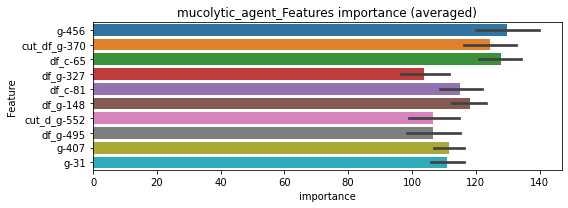

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000472467	valid_1's binary_logloss: 0.00782402


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000471795	valid_1's binary_logloss: 0.00619742


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000516676	valid_1's binary_logloss: 0.00709031


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000467108	valid_1's binary_logloss: 0.00394115
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000466964	valid_1's binary_logloss: 0.00393885


mucolytic_agent logloss: 0.006263752984779257
neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3284
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3284


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000514495	valid_1's binary_logloss: 0.0107466
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000437088	valid_1's binary_logloss: 0.00359975
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000452749	valid_1's binary_logloss: 0.00716617
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000445505	valid_1's binary_logloss: 0.00750395


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028542, Threshold: 0.0132299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0132299, conf_0:0.00926, conf_1:0.01720
Num_p_label: 5.0, Expected: 6.2, Adj_threshold_1: 0.0432299
threshold: 0.0432299, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000441249	valid_1's binary_logloss: 0.0088247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000413139	valid_1's binary_logloss: 0.0025629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00047772	valid_1's binary_logloss: 0.0062145
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0262727, Threshold: 0.0432299, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000501026	valid_1's binary_logloss: 0.00699905


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0052737 Vs.target_rate: 0.00155
Num_p_label: 21.0, Expected: 6.2, Threshold: 0.0432299, conf_0:0.03458, conf_1:0.05188
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_1: 0.0732299
threshold: 0.0732299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000441249	valid_1's binary_logloss: 0.0088247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000413139	valid_1's binary_logloss: 0.0025629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00047772	valid_1's binary_logloss: 0.0062145
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0262727, Threshold: 0.0732299, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000501026	valid_1's binary_logloss: 0.00699905


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00155
Num_p_label: 12.0, Expected: 6.2, Threshold: 0.0732299, conf_0:0.06591, conf_1:0.08055
threshold: 0.0732299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


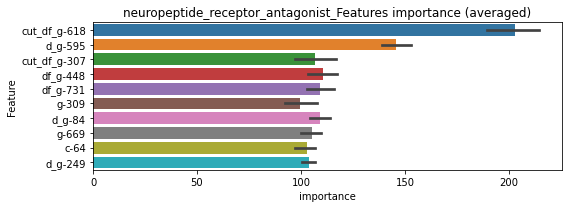

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000448635	valid_1's binary_logloss: 0.00914544


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000432493	valid_1's binary_logloss: 0.00270924


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000686478	valid_1's binary_logloss: 0.00642997
Training until validation scores don't improve for 30 rounds


neuropeptide_receptor_antagonist logloss: 0.006208404452654936


Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000511358	valid_1's binary_logloss: 0.00654896
mutually exclusive columns: nfkb_inhibitor


nfkb_inhibitor, len(trt): 832, len(othr): 10016
target_rate: 0.0349374 → Adj_target_rate: 0.0254860


selected negative label: 10016


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.117691	valid_1's binary_logloss: 0.270999
[2000]	training's binary_logloss: 0.0614727	valid_1's binary_logloss: 0.253989
Early stopping, best iteration is:
[2078]	training's binary_logloss: 0.0590343	valid_1's binary_logloss: 0.253238
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.117349	valid_1's binary_logloss: 0.276314
Early stopping, best iteration is:
[1468]	training's binary_logloss: 0.083772	valid_1's binary_logloss: 0.26452
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.119408	valid_1's binary_logloss: 0.263833
[2000]	training's binary_logloss: 0.062396	valid_1's binary_logloss: 0.244877
Early stopping, best iteration is:
[2093]	training's binary_logloss: 0.0594081	valid_1's binary_logloss: 0.243827
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_

1 / 3, AUC score:0.876, PR-AUC:0.803
y_Threshold: 0.1330084, Threshold: 0.2630901, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1429 → Positive_corect_labels: 1489/10590
p_label_rate: 0.0100452 Vs.target_rate: 0.03494
Num_p_label: 40.0, Expected: 139.1, Threshold: 0.2630901, conf_0:0.18416, conf_1:0.34202
threshold: 0.2630901, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1489.0/10590, y_label_rate: 0.1406043
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0703995	valid_1's binary_logloss: 0.148778
[2000]	training's binary_logloss: 0.0349372	valid_1's binary_logloss: 0.121568
Early stopping, best iteration is:
[2555]	training's binary_logloss: 0.0268238	valid_1's binary_logloss: 0.115144
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0700256	valid_1's binary_logloss: 0.16127
[2000]	training's binary_logloss: 0.0347328	valid_1's binary_logloss: 0.136472
Early stopping, best iteration is:
[1984]	training's binary_logloss: 0.0350107	valid_1's binary_logloss: 0.136382
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0701758	valid_1's binary_logloss: 0.163831
[2000]	training's binary_logloss: 0.0347456	valid_1's binary_logloss: 0.135879
[3000]	training's binary_logloss: 0.0223631	valid_1's binary_logloss: 0.126423
Early stopping, best iteration is:
[3

2 / 3, AUC score:0.981, PR-AUC:0.951
y_Threshold: 0.1203393, Threshold: 0.2630901, pos_neg_ratio: 0.8000000
Remove_noisy_data: 340 → Positive_corect_labels: 1319.0/10250
p_label_rate: 0.0095429 Vs.target_rate: 0.03494
Num_p_label: 38.0, Expected: 139.1, Threshold: 0.2630901, conf_0:0.21047, conf_1:0.31571
threshold: 0.2630901, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 1319.0/10250, y_label_rate: 0.1286829
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0575377	valid_1's binary_logloss: 0.12145
[2000]	training's binary_logloss: 0.0281821	valid_1's binary_logloss: 0.0941659
[3000]	training's binary_logloss: 0.0181843	valid_1's binary_logloss: 0.0838863
Early stopping, best iteration is:
[3500]	training's binary_logloss: 0.0153973	valid_1's binary_logloss: 0.0806336
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0580592	valid_1's binary_logloss: 0.123207
[2000]	training's binary_logloss: 0.0283608	valid_1's binary_logloss: 0.0958098
[3000]	training's binary_logloss: 0.0183214	valid_1's binary_logloss: 0.0858317
[4000]	training's binary_logloss: 0.0134333	valid_1's binary_logloss: 0.0814835
Early stopping, best iteration is:
[4135]	training's binary_logloss: 0.012957	valid_1's binary_logloss: 0.0808777
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_loglos

3 / 3, AUC score:0.992, PR-AUC:0.976
y_Threshold: 0.1047795, Threshold: 0.2630901, pos_neg_ratio: 0.8000000
Remove_noisy_data: 174 → Positive_corect_labels: 1232.0/10076
p_label_rate: 0.0095429 Vs.target_rate: 0.03494
Num_p_label: 38.0, Expected: 139.1, Threshold: 0.2630901, conf_0:0.23678, conf_1:0.28940
threshold: 0.2630901, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 1232.0/10076, y_label_rate: 0.1222707


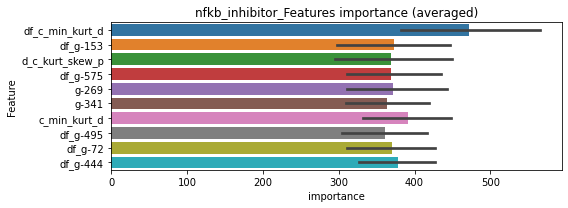

len(train_index) : 7557
len(valid_index) : 2519
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0557326	valid_1's binary_logloss: 0.113823
[2000]	training's binary_logloss: 0.0277689	valid_1's binary_logloss: 0.087045
[3000]	training's binary_logloss: 0.0180887	valid_1's binary_logloss: 0.0770712
Early stopping, best iteration is:
[3045]	training's binary_logloss: 0.0178091	valid_1's binary_logloss: 0.0767769


len(train_index) : 7557
len(valid_index) : 2519
================================= fold 2/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0560154	valid_1's binary_logloss: 0.116253
[2000]	training's binary_logloss: 0.0277911	valid_1's binary_logloss: 0.0907566
Early stopping, best iteration is:
[2849]	training's binary_logloss: 0.0192086	valid_1's binary_logloss: 0.0820575


len(train_index) : 7557
len(valid_index) : 2519
================================= fold 3/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0553117	valid_1's binary_logloss: 0.117075
[2000]	training's binary_logloss: 0.0274565	valid_1's binary_logloss: 0.089834
[3000]	training's binary_logloss: 0.01794	valid_1's binary_logloss: 0.0803264
[4000]	training's binary_logloss: 0.0132575	valid_1's binary_logloss: 0.0753715
Early stopping, best iteration is:
[4526]	training's binary_logloss: 0.0116426	valid_1's binary_logloss: 0.0734785


len(train_index) : 7557
len(valid_index) : 2519
================================= fold 4/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.05477	valid_1's binary_logloss: 0.125179
[2000]	training's binary_logloss: 0.0272755	valid_1's binary_logloss: 0.100827
Early stopping, best iteration is:
[2954]	training's binary_logloss: 0.0181139	valid_1's binary_logloss: 0.0922624


nfkb_inhibitor logloss: 0.0811438372930459
nfkb_inhibitor is unpredictable(><)!
nicotinic_receptor_agonist, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000238678	valid_1's binary_logloss: 0.00175164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000236937	valid_1's binary_logloss: 0.00121174
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000246325	valid_1's binary_logloss: 0.000460892
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009120, Threshold: 0.0051276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0051276, conf_0:0.00359, conf_1:0.00667
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0351276
threshold: 0.0351276, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000239429	valid_1's binary_logloss: 0.000773861


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000236448	valid_1's binary_logloss: 0.000743048
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000236305	valid_1's binary_logloss: 0.000845777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000234591	valid_1's binary_logloss: 0.000350759
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0994385, Threshold: 0.0351276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0037670 Vs.target_rate: 0.00050
Num_p_label: 15.0, Expected: 2.0, Threshold: 0.0351276, conf_0:0.02810, conf_1:0.04215
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.0651276
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_2: 0.0951276


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000232739	valid_1's binary_logloss: 0.00103413


threshold: 0.0951276, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000236448	valid_1's binary_logloss: 0.000743048
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000236305	valid_1's binary_logloss: 0.000845777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000234591	valid_1's binary_logloss: 0.000350759
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0994385, Threshold: 0.0951276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0951276, conf_0:0.08561, conf_1:0.10464
threshold: 0.0951276, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000232739	valid_1's binary_logloss: 0.00103413


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


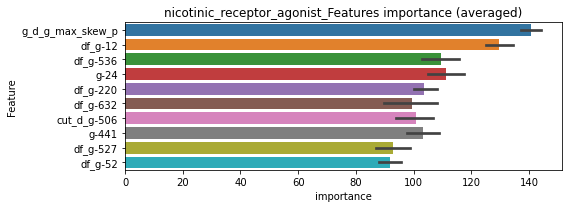

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000238732	valid_1's binary_logloss: 0.000530254


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000239745	valid_1's binary_logloss: 0.000784282
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[968]	training's binary_logloss: 0.000236901	valid_1's binary_logloss: 0.000379372
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000239059	valid_1's binary_logloss: 0.000466163


nicotinic_receptor_agonist logloss: 0.0005400170704230048
nitric_oxide_donor, len(trt): 26, len(othr): 3287
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000377243	valid_1's binary_logloss: 0.00619259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000361423	valid_1's binary_logloss: 0.00241037
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000378031	valid_1's binary_logloss: 0.00141091
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027561, Threshold: 0.0365256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0365256, conf_0:0.02557, conf_1:0.04748


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000365105	valid_1's binary_logloss: 0.00183201


Num_p_label: 22.0, Expected: 4.3, Adj_threshold_1: 0.0665256
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_2: 0.0965256
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_3: 0.1265256
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_4: 0.1565256
threshold: 0.1565256, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000345191	valid_1's binary_logloss: 0.00557271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000347161	valid_1's binary_logloss: 0.00166624
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000356854	valid_1's binary_logloss: 0.00137623
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0411869, Threshold: 0.1565256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0113009 Vs.target_rate: 0.00109
Num_p_label: 45.0, Expected: 4.3, Threshold: 0.1565256, conf_0:0.12522, conf_1:0.18783
Num_p_label: 37.0, Expected: 4.3, Adj_threshold_1: 0.1865256


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00034829	valid_1's binary_logloss: 0.0015321


Num_p_label: 28.0, Expected: 4.3, Adj_threshold_2: 0.2165256
Num_p_label: 25.0, Expected: 4.3, Adj_threshold_3: 0.2465256
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_4: 0.2765256
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_5: 0.3065256
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_6: 0.3365256
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_7: 0.3665256
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_8: 0.3965256
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_9: 0.4265256
threshold: 0.4265256, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000345191	valid_1's binary_logloss: 0.00557271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000347161	valid_1's binary_logloss: 0.00166624
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000356854	valid_1's binary_logloss: 0.00137623
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0411869, Threshold: 0.4265256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00109


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00034829	valid_1's binary_logloss: 0.0015321


Num_p_label: 10.0, Expected: 4.3, Threshold: 0.4265256, conf_0:0.38387, conf_1:0.46918
threshold: 0.4265256, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


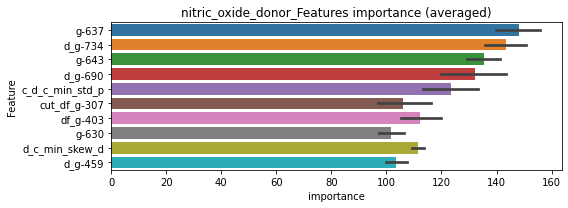

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000386821	valid_1's binary_logloss: 0.00442807


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.00035711	valid_1's binary_logloss: 0.00149286


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000357309	valid_1's binary_logloss: 0.00121214


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.00035553	valid_1's binary_logloss: 0.00173496


nitric_oxide_donor logloss: 0.0022170174454153634
nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000375672	valid_1's binary_logloss: 0.00447262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000353039	valid_1's binary_logloss: 0.00524729
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000357332	valid_1's binary_logloss: 0.00109795
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023205, Threshold: 0.0075482, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000349832	valid_1's binary_logloss: 0.00223764


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0075482, conf_0:0.00528, conf_1:0.00981
Num_p_label: 3.0, Expected: 4.8, Adj_threshold_1: 0.0375482
threshold: 0.0375482, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000473158	valid_1's binary_logloss: 0.00494738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000345079	valid_1's binary_logloss: 0.00490412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00035924	valid_1's binary_logloss: 0.000987274
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0281787, Threshold: 0.0375482, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000350658	valid_1's binary_logloss: 0.00292393


p_label_rate: 0.0035158 Vs.target_rate: 0.00122
Num_p_label: 14.0, Expected: 4.8, Threshold: 0.0375482, conf_0:0.03004, conf_1:0.04506
Num_p_label: 5.0, Expected: 4.8, Adj_threshold_1: 0.0675482
threshold: 0.0675482, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000473158	valid_1's binary_logloss: 0.00494738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000345079	valid_1's binary_logloss: 0.00490412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00035924	valid_1's binary_logloss: 0.000987274
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0281787, Threshold: 0.0675482, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000350658	valid_1's binary_logloss: 0.00292393


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00122
Num_p_label: 5.0, Expected: 4.8, Threshold: 0.0675482, conf_0:0.06079, conf_1:0.07430
threshold: 0.0675482, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


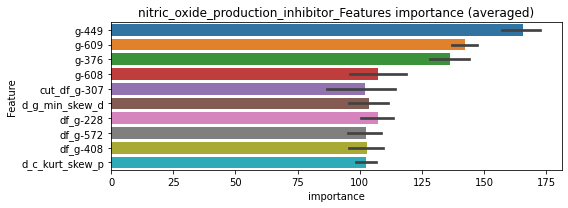

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000454966	valid_1's binary_logloss: 0.00578126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.00036625	valid_1's binary_logloss: 0.00407091


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000347937	valid_1's binary_logloss: 0.000928122


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000350573	valid_1's binary_logloss: 0.00264128


nitric_oxide_production_inhibitor logloss: 0.0033562180576652964
nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:311
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000382956	valid_1's binary_logloss: 0.00400104
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000389693	valid_1's binary_logloss: 0.00145589
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000383193	valid_1's binary_logloss: 0.00100479
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027906, Threshold: 0.0240505, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000377714	valid_1's binary_logloss: 0.00287639


Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0240505, conf_0:0.01684, conf_1:0.03127
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_1: 0.0540505
Num_p_label: 6.0, Expected: 4.3, Adj_threshold_2: 0.0840505
threshold: 0.0840505, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000375368	valid_1's binary_logloss: 0.00496097
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000375592	valid_1's binary_logloss: 0.00123216
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000374109	valid_1's binary_logloss: 0.000896929
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0478986, Threshold: 0.0840505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000369303	valid_1's binary_logloss: 0.00271207


p_label_rate: 0.0110497 Vs.target_rate: 0.00109
Num_p_label: 44.0, Expected: 4.3, Threshold: 0.0840505, conf_0:0.06724, conf_1:0.10086
Num_p_label: 35.0, Expected: 4.3, Adj_threshold_1: 0.1140505
Num_p_label: 32.0, Expected: 4.3, Adj_threshold_2: 0.1440505
Num_p_label: 27.0, Expected: 4.3, Adj_threshold_3: 0.1740505
Num_p_label: 23.0, Expected: 4.3, Adj_threshold_4: 0.2040505
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_5: 0.2340505
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_6: 0.2640505
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_7: 0.2940505
threshold: 0.2940505, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000375368	valid_1's binary_logloss: 0.00496097
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000375592	valid_1's binary_logloss: 0.00123216
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000374109	valid_1's binary_logloss: 0.000896929
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0478986, Threshold: 0.2940505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000369303	valid_1's binary_logloss: 0.00271207


p_label_rate: 0.0022602 Vs.target_rate: 0.00109
Num_p_label: 9.0, Expected: 4.3, Threshold: 0.2940505, conf_0:0.26465, conf_1:0.32346
threshold: 0.2940505, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


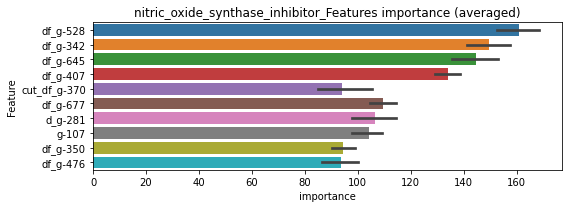

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000365245	valid_1's binary_logloss: 0.00383831


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000375888	valid_1's binary_logloss: 0.001245


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000377762	valid_1's binary_logloss: 0.000873342


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000378558	valid_1's binary_logloss: 0.00165473


nitric_oxide_synthase_inhibitor logloss: 0.0019031356332312045
norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3287
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000183581	valid_1's binary_logloss: 0.00165967
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000189225	valid_1's binary_logloss: 0.0027749
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000183492	valid_1's binary_logloss: 0.000233643
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0006083, Threshold: 0.0028739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0028739, conf_0:0.00201, conf_1:0.00374
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0328739
threshold: 0.0328739, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000185383	valid_1's binary_logloss: 0.000247557


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000178023	valid_1's binary_logloss: 0.00184632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000173817	valid_1's binary_logloss: 0.00221922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000174916	valid_1's binary_logloss: 0.00018795
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0404424, Threshold: 0.0328739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0065294 Vs.target_rate: 0.00029
Num_p_label: 26.0, Expected: 1.2, Threshold: 0.0328739, conf_0:0.02630, conf_1:0.03945
Num_p_label: 14.0, Expected: 1.2, Adj_threshold_1: 0.0628739
Num_p_label: 8.0, Expected: 1.2, Adj_threshold_2: 0.0928739
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_3: 0.1228739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_4: 0.1528739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_5: 0.1828739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_6: 0.2128739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_7: 0.2428739
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_8: 0.2728739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_9: 0.3028739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_10: 0.3328739


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000173793	valid_1's binary_logloss: 0.000192546


threshold: 0.3328739, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000178023	valid_1's binary_logloss: 0.00184632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000173817	valid_1's binary_logloss: 0.00221922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000174916	valid_1's binary_logloss: 0.00018795
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0404424, Threshold: 0.3328739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.3328739, conf_0:0.29959, conf_1:0.36616
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.3628739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.3928739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.4228739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_4: 0.4528739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_5: 0.4828739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_6: 0.5128739
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_7: 0.5428739


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000173793	valid_1's binary_logloss: 0.000192546


threshold: 0.5428739, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


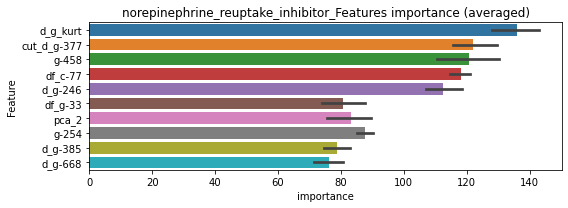

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000175389	valid_1's binary_logloss: 0.00112995
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000173705	valid_1's binary_logloss: 0.000907615
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000176274	valid_1's binary_logloss: 0.00019176
Training until validation scores don't improve for 30 rounds


norepinephrine_reuptake_inhibitor logloss: 0.0006102428983813548


Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000175781	valid_1's binary_logloss: 0.000210898


nrf2_activator, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000273712	valid_1's binary_logloss: 0.00280958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000268375	valid_1's binary_logloss: 0.00343378
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000271747	valid_1's binary_logloss: 0.00042958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000269443	valid_1's binary_logloss: 0.000814483


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013650, Threshold: 0.0046269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0046269, conf_0:0.00324, conf_1:0.00602
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0346269
threshold: 0.0346269, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000259538	valid_1's binary_logloss: 0.00180927
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000263679	valid_1's binary_logloss: 0.00446534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000260748	valid_1's binary_logloss: 0.000322734
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0169746, Threshold: 0.0346269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, Expected: 3.0, Threshold: 0.0346269, conf_0:0.02770, conf_1:0.04155
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0646269


Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000256749	valid_1's binary_logloss: 0.000793731


threshold: 0.0646269, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000259538	valid_1's binary_logloss: 0.00180927
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000263679	valid_1's binary_logloss: 0.00446534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000260748	valid_1's binary_logloss: 0.000322734
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0169746, Threshold: 0.0646269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0646269, conf_0:0.05816, conf_1:0.07109


Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000256749	valid_1's binary_logloss: 0.000793731


threshold: 0.0646269, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


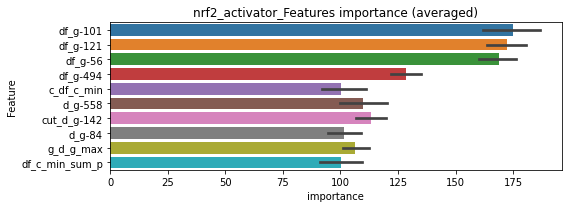

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000264543	valid_1's binary_logloss: 0.00195156


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000263253	valid_1's binary_logloss: 0.00322893


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000262513	valid_1's binary_logloss: 0.000350771
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000261284	valid_1's binary_logloss: 0.0003492


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000260312	valid_1's binary_logloss: 0.000646148
Early stopping, best iteration is:
[1044]	training's binary_logloss: 0.00025874	valid_1's binary_logloss: 0.000644097


nrf2_activator logloss: 0.0015434483675017675
opioid_receptor_agonist, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000641862	valid_1's binary_logloss: 0.0241858
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000708853	valid_1's binary_logloss: 0.0265121
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000572552	valid_1's binary_logloss: 0.0126501
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000656129	valid_1's binary_logloss: 0.0245179


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0045783, Threshold: 0.0166179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0166179, conf_0:0.01163, conf_1:0.02160
Num_p_label: 9.0, Expected: 10.2, Adj_threshold_1: 0.0466179
threshold: 0.0466179, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000750975	valid_1's binary_logloss: 0.0344887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000631051	valid_1's binary_logloss: 0.0217084
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000585883	valid_1's binary_logloss: 0.0159011
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000645289	valid_1's binary_logloss: 0.021062


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0303178, Threshold: 0.0466179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0148167 Vs.target_rate: 0.00256
Num_p_label: 59.0, Expected: 10.2, Threshold: 0.0466179, conf_0:0.03729, conf_1:0.05594
Num_p_label: 38.0, Expected: 10.2, Adj_threshold_1: 0.0766179
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_2: 0.1066179
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_3: 0.1366179
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_4: 0.1666179
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_5: 0.1966179
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_6: 0.2266179
threshold: 0.2266179, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000915217	valid_1's binary_logloss: 0.0266504
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000676286	valid_1's binary_logloss: 0.020661
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000563221	valid_1's binary_logloss: 0.0101559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000587492	valid_1's binary_logloss: 0.0121729


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0439013, Threshold: 0.2266179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0042692 Vs.target_rate: 0.00256
Num_p_label: 17.0, Expected: 10.2, Threshold: 0.2266179, conf_0:0.20396, conf_1:0.24928
Num_p_label: 11.0, Expected: 10.2, Adj_threshold_1: 0.2566179
threshold: 0.2566179, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 648.0/3788, y_label_rate: 0.1710665


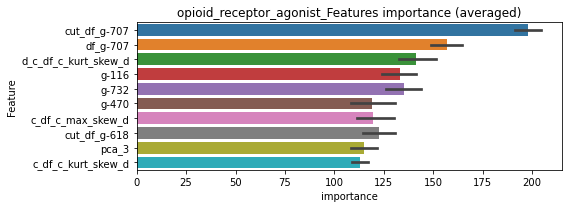

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000862327	valid_1's binary_logloss: 0.0309152
Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00073285	valid_1's binary_logloss: 0.0233678


================================= fold 3/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.00102148	valid_1's binary_logloss: 0.0280779


len(train_index) : 2841
len(valid_index) : 947
================================= fold 4/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000730513	valid_1's binary_logloss: 0.0170678


opioid_receptor_agonist logloss: 0.02485716462783564
opioid_receptor_antagonist, len(trt): 96, len(othr): 3278
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3278


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00143049	valid_1's binary_logloss: 0.0526925
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000922805	valid_1's binary_logloss: 0.0457817
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.00111849	valid_1's binary_logloss: 0.0439862
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00142709	valid_1's binary_logloss: 0.0665006


1 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0108298, Threshold: 0.0407325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 644/3779
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.0407325, conf_0:0.02851, conf_1:0.05295
Num_p_label: 18.0, Expected: 16.1, Adj_threshold_1: 0.0707325
threshold: 0.0707325, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 644.0/3779, y_label_rate: 0.1704155
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00108287	valid_1's binary_logloss: 0.0417379
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.00167585	valid_1's binary_logloss: 0.0571718
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00181686	valid_1's binary_logloss: 0.0465875
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.0012014	valid_1's binary_logloss: 0.028924


2 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0420057, Threshold: 0.0707325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 635.0/3761
p_label_rate: 0.0215972 Vs.target_rate: 0.00403
Num_p_label: 86.0, Expected: 16.1, Threshold: 0.0707325, conf_0:0.05659, conf_1:0.08488
Num_p_label: 72.0, Expected: 16.1, Adj_threshold_1: 0.1007325
Num_p_label: 54.0, Expected: 16.1, Adj_threshold_2: 0.1307325
Num_p_label: 44.0, Expected: 16.1, Adj_threshold_3: 0.1607325
Num_p_label: 37.0, Expected: 16.1, Adj_threshold_4: 0.1907325
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_5: 0.2207325
Num_p_label: 22.0, Expected: 16.1, Adj_threshold_6: 0.2507325
threshold: 0.2507325, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 635.0/3761, y_label_rate: 0.1688381
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000695853	valid_1's binary_logloss: 0.0412402
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000779546	valid_1's binary_logloss: 0.0198653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000680126	valid_1's binary_logloss: 0.0171482
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00096035	valid_1's binary_logloss: 0.036846


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0536427, Threshold: 0.2507325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 631.0/3753
p_label_rate: 0.0113009 Vs.target_rate: 0.00403
Num_p_label: 45.0, Expected: 16.1, Threshold: 0.2507325, conf_0:0.22566, conf_1:0.27581
Num_p_label: 39.0, Expected: 16.1, Adj_threshold_1: 0.2807325
Num_p_label: 34.0, Expected: 16.1, Adj_threshold_2: 0.3107325
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_3: 0.3407325
Num_p_label: 23.0, Expected: 16.1, Adj_threshold_4: 0.3707325
threshold: 0.3707325, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 631.0/3753, y_label_rate: 0.1681322


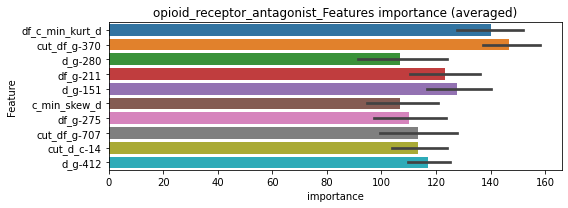

len(train_index) : 2814
len(valid_index) : 939
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2815
len(valid_index) : 938
================================= fold 2/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00184471	valid_1's binary_logloss: 0.0585359
Training until validation scores don't improve for 30 rounds


len(train_index) : 2815
len(valid_index) : 938
================================= fold 3/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00132359	valid_1's binary_logloss: 0.0325976
Training until validation scores don't improve for 30 rounds


len(train_index) : 2815
len(valid_index) : 938
================================= fold 4/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.00104393	valid_1's binary_logloss: 0.0398116
Training until validation scores don't improve for 30 rounds


opioid_receptor_antagonist logloss: 0.043722952280003544
opioid_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[306]	training's binary_logloss: 0.00209755	valid_1's binary_logloss: 0.0439309


orexin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000408515	valid_1's binary_logloss: 0.00948051
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000441188	valid_1's binary_logloss: 0.0078803
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000433062	valid_1's binary_logloss: 0.00288825
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000419533	valid_1's binary_logloss: 0.00227722


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027897, Threshold: 0.0066891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0066891, conf_0:0.00468, conf_1:0.00870
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_1: 0.0366891
threshold: 0.0366891, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000494881	valid_1's binary_logloss: 0.00874233
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000402403	valid_1's binary_logloss: 0.00824055
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000409785	valid_1's binary_logloss: 0.00246935
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000413105	valid_1's binary_logloss: 0.00246909


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0305795, Threshold: 0.0366891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, Expected: 6.2, Threshold: 0.0366891, conf_0:0.02935, conf_1:0.04403
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_1: 0.0666891
threshold: 0.0666891, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000494881	valid_1's binary_logloss: 0.00874233
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000402403	valid_1's binary_logloss: 0.00824055
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000409785	valid_1's binary_logloss: 0.00246935
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000413105	valid_1's binary_logloss: 0.00246909


y_Threshold: 0.0305795, Threshold: 0.0666891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00155
Num_p_label: 7.0, Expected: 6.2, Threshold: 0.0666891, conf_0:0.06002, conf_1:0.07336
threshold: 0.0666891, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


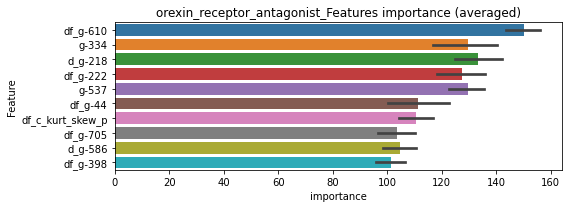

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000412459	valid_1's binary_logloss: 0.00922194


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858


Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000460688	valid_1's binary_logloss: 0.00932318


len(valid_index) : 953
================================= fold 3/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000411706	valid_1's binary_logloss: 0.00191076
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000412087	valid_1's binary_logloss: 0.00191051


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000418161	valid_1's binary_logloss: 0.00222634


orexin_receptor_antagonist logloss: 0.00567151561983485
p38_mapk_inhibitor, len(trt): 62, len(othr): 3286
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3286


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000661168	valid_1's binary_logloss: 0.0172723
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000660016	valid_1's binary_logloss: 0.0173125
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000757567	valid_1's binary_logloss: 0.0125423
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000558277	valid_1's binary_logloss: 0.018688


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0062367, Threshold: 0.0339920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 655/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0339920, conf_0:0.02379, conf_1:0.04419
Num_p_label: 22.0, Expected: 10.4, Adj_threshold_1: 0.0639920
Num_p_label: 14.0, Expected: 10.4, Adj_threshold_2: 0.0939920
threshold: 0.0939920, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000545868	valid_1's binary_logloss: 0.0130716
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000592322	valid_1's binary_logloss: 0.0127144
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000557617	valid_1's binary_logloss: 0.0121288
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000588611	valid_1's binary_logloss: 0.0125816


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0297218, Threshold: 0.0939920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3803
p_label_rate: 0.0052737 Vs.target_rate: 0.00260
Num_p_label: 21.0, Expected: 10.4, Threshold: 0.0939920, conf_0:0.07519, conf_1:0.11279
Num_p_label: 16.0, Expected: 10.4, Adj_threshold_1: 0.1239920
Num_p_label: 10.0, Expected: 10.4, Adj_threshold_2: 0.1539920
threshold: 0.1539920, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3803, y_label_rate: 0.1717065
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000538424	valid_1's binary_logloss: 0.0105619
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000562716	valid_1's binary_logloss: 0.010794
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000544013	valid_1's binary_logloss: 0.010336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000514079	valid_1's binary_logloss: 0.0188376


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0268616, Threshold: 0.1539920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00260
Num_p_label: 12.0, Expected: 10.4, Threshold: 0.1539920, conf_0:0.13859, conf_1:0.16939
threshold: 0.1539920, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3801, y_label_rate: 0.1715338


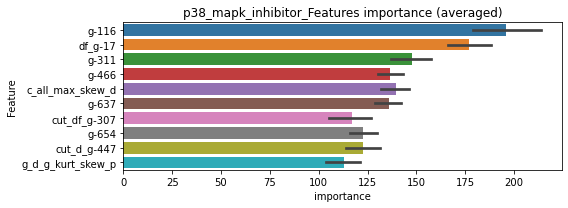

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000562907	valid_1's binary_logloss: 0.0125553


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000554614	valid_1's binary_logloss: 0.00869059


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000552854	valid_1's binary_logloss: 0.00892016


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


p38_mapk_inhibitor logloss: 0.013393753904444979


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.0010987	valid_1's binary_logloss: 0.0234099


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000324215	valid_1's binary_logloss: 0.00118327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000329664	valid_1's binary_logloss: 0.00702921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00033583	valid_1's binary_logloss: 0.000762062
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019519, Threshold: 0.0123772, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000329045	valid_1's binary_logloss: 0.00102209


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0123772, conf_0:0.00866, conf_1:0.01609
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.0423772
threshold: 0.0423772, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000320169	valid_1's binary_logloss: 0.0011892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000317473	valid_1's binary_logloss: 0.00837781
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000317551	valid_1's binary_logloss: 0.000713356
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000320051	valid_1's binary_logloss: 0.0011166


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0092413, Threshold: 0.0423772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0047715 Vs.target_rate: 0.00101
Num_p_label: 19.0, Expected: 4.0, Threshold: 0.0423772, conf_0:0.03390, conf_1:0.05085
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_1: 0.0723772
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_2: 0.1023772
threshold: 0.1023772, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000320169	valid_1's binary_logloss: 0.0011892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000317473	valid_1's binary_logloss: 0.00837781
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000317551	valid_1's binary_logloss: 0.000713356
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0092413, Threshold: 0.1023772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000320051	valid_1's binary_logloss: 0.0011166


p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.1023772, conf_0:0.09214, conf_1:0.11261
threshold: 0.1023772, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


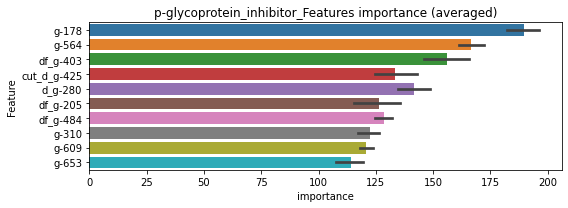

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000317229	valid_1's binary_logloss: 0.000876293
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.00031723	valid_1's binary_logloss: 0.000876292


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000323705	valid_1's binary_logloss: 0.00420855


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000315198	valid_1's binary_logloss: 0.000781709
Early stopping, best iteration is:
[1050]	training's binary_logloss: 0.000312716	valid_1's binary_logloss: 0.000776804


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000314982	valid_1's binary_logloss: 0.00122335
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000314562	valid_1's binary_logloss: 0.00122157


p-glycoprotein_inhibitor logloss: 0.0017711761987129846
parp_inhibitor, len(trt): 61, len(othr): 3283
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000715869	valid_1's binary_logloss: 0.0350298
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000577873	valid_1's binary_logloss: 0.011486
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00078412	valid_1's binary_logloss: 0.0106256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000576922	valid_1's binary_logloss: 0.0116081


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0054800, Threshold: 0.0164058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0164058, conf_0:0.01148, conf_1:0.02133
Num_p_label: 8.0, Expected: 10.2, Adj_threshold_1: 0.0464058
threshold: 0.0464058, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000585599	valid_1's binary_logloss: 0.0108777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000536579	valid_1's binary_logloss: 0.0132389
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000586444	valid_1's binary_logloss: 0.00652355
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000563155	valid_1's binary_logloss: 0.0156146


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0523554, Threshold: 0.0464058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0105475 Vs.target_rate: 0.00256
Num_p_label: 42.0, Expected: 10.2, Threshold: 0.0464058, conf_0:0.03712, conf_1:0.05569
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_1: 0.0764058
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_2: 0.1064058
threshold: 0.1064058, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.00053446	valid_1's binary_logloss: 0.0185102
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000678772	valid_1's binary_logloss: 0.0210196
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000541237	valid_1's binary_logloss: 0.00700009
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000540321	valid_1's binary_logloss: 0.013672


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0334663, Threshold: 0.1064058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0040181 Vs.target_rate: 0.00256
Num_p_label: 16.0, Expected: 10.2, Threshold: 0.1064058, conf_0:0.09577, conf_1:0.11705
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_1: 0.1364058
threshold: 0.1364058, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3799, y_label_rate: 0.1716241


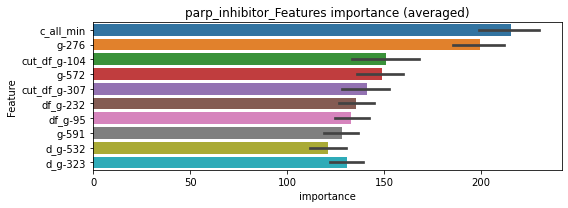

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000648383	valid_1's binary_logloss: 0.0111786


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000585885	valid_1's binary_logloss: 0.0137581


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000579447	valid_1's binary_logloss: 0.00622018


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000687076	valid_1's binary_logloss: 0.0163359


parp_inhibitor logloss: 0.011872014672635873


mutually exclusive columns: pdgfr_inhibitor


pdgfr_inhibitor, len(trt): 297, len(othr): 7157
target_rate: 0.0124717 → Adj_target_rate: 0.0106179


selected negative label: 7157


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.069797	valid_1's binary_logloss: 0.151819
[2000]	training's binary_logloss: 0.0347748	valid_1's binary_logloss: 0.12624
Early stopping, best iteration is:
[2901]	training's binary_logloss: 0.0235414	valid_1's binary_logloss: 0.118834
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0690535	valid_1's binary_logloss: 0.148391
[2000]	training's binary_logloss: 0.0344305	valid_1's binary_logloss: 0.12508
Early stopping, best iteration is:
[1995]	training's binary_logloss: 0.034507	valid_1's binary_logloss: 0.125026
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.070166	valid_1's binary_logloss: 0.146215
[2000]	training's binary_logloss: 0.0348443	valid_1's binary_logloss: 0.118987
[3000]	training's binary_logloss: 0.0226743	valid_1's binary_logloss: 0.11085
Early stopping, best iteration is:
[3751]	

1 / 3, AUC score:0.977, PR-AUC:0.957
y_Threshold: 0.0744735, Threshold: 0.1352046, pos_neg_ratio: 0.8000000
Remove_noisy_data: 481 → Positive_corect_labels: 1334/8107
p_label_rate: 0.0100452 Vs.target_rate: 0.01247
Num_p_label: 40.0, Expected: 49.7, Threshold: 0.1352046, conf_0:0.09464, conf_1:0.17577
threshold: 0.1352046, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1334.0/8107, y_label_rate: 0.1645492
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0567639	valid_1's binary_logloss: 0.1165
[2000]	training's binary_logloss: 0.0275244	valid_1's binary_logloss: 0.0913071
[3000]	training's binary_logloss: 0.01805	valid_1's binary_logloss: 0.0833388
Early stopping, best iteration is:
[3449]	training's binary_logloss: 0.0155784	valid_1's binary_logloss: 0.0812846
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0557584	valid_1's binary_logloss: 0.12193
[2000]	training's binary_logloss: 0.0270778	valid_1's binary_logloss: 0.0936836
[3000]	training's binary_logloss: 0.017807	valid_1's binary_logloss: 0.0837615
Early stopping, best iteration is:
[3912]	training's binary_logloss: 0.0135059	valid_1's binary_logloss: 0.0792031
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0564379	valid_1's binary_logloss: 0.115867
[2000]	training's binary_logloss: 0.

2 / 3, AUC score:0.997, PR-AUC:0.989
y_Threshold: 0.0970922, Threshold: 0.1352046, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 1278.0/7995
p_label_rate: 0.0120542 Vs.target_rate: 0.01247
Num_p_label: 48.0, Expected: 49.7, Threshold: 0.1352046, conf_0:0.10816, conf_1:0.16225
threshold: 0.1352046, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 1278.0/7995, y_label_rate: 0.1598499
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0519745	valid_1's binary_logloss: 0.100368
[2000]	training's binary_logloss: 0.0250823	valid_1's binary_logloss: 0.0709808
[3000]	training's binary_logloss: 0.0164076	valid_1's binary_logloss: 0.0613716
[4000]	training's binary_logloss: 0.0121274	valid_1's binary_logloss: 0.0564155
Early stopping, best iteration is:
[4735]	training's binary_logloss: 0.0101758	valid_1's binary_logloss: 0.0539184
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0518716	valid_1's binary_logloss: 0.109708
[2000]	training's binary_logloss: 0.0249474	valid_1's binary_logloss: 0.08254
[3000]	training's binary_logloss: 0.0163386	valid_1's binary_logloss: 0.0738586
[4000]	training's binary_logloss: 0.0120642	valid_1's binary_logloss: 0.0698651
Early stopping, best iteration is:
[4137]	training's binary_logloss: 0.0116591	valid_1's binary_logloss: 0.0692825
Training unt

3 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0935046, Threshold: 0.1352046, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 1246.0/7931
p_label_rate: 0.0123054 Vs.target_rate: 0.01247
Num_p_label: 49.0, Expected: 49.7, Threshold: 0.1352046, conf_0:0.12168, conf_1:0.14873
threshold: 0.1352046, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 1246.0/7931, y_label_rate: 0.1571050


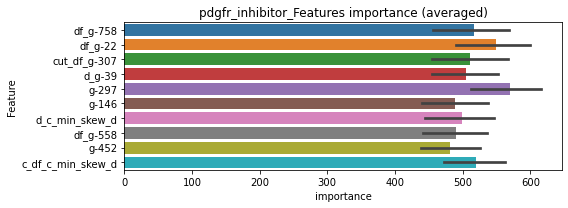

len(train_index) : 5948
len(valid_index) : 1983
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0509246	valid_1's binary_logloss: 0.0961484
[2000]	training's binary_logloss: 0.0257146	valid_1's binary_logloss: 0.0699276
[3000]	training's binary_logloss: 0.0170191	valid_1's binary_logloss: 0.0605127
Early stopping, best iteration is:
[3919]	training's binary_logloss: 0.0129233	valid_1's binary_logloss: 0.0556368


len(train_index) : 5948
len(valid_index) : 1983
================================= fold 2/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0505437	valid_1's binary_logloss: 0.101358
[2000]	training's binary_logloss: 0.0253166	valid_1's binary_logloss: 0.0759593
[3000]	training's binary_logloss: 0.0167198	valid_1's binary_logloss: 0.0665206
[4000]	training's binary_logloss: 0.0124549	valid_1's binary_logloss: 0.0618199
Early stopping, best iteration is:
[4809]	training's binary_logloss: 0.0103139	valid_1's binary_logloss: 0.0592977


len(train_index) : 5948
len(valid_index) : 1983
================================= fold 3/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0520209	valid_1's binary_logloss: 0.0914342
[2000]	training's binary_logloss: 0.0261935	valid_1's binary_logloss: 0.0665746
[3000]	training's binary_logloss: 0.0172999	valid_1's binary_logloss: 0.0575144
[4000]	training's binary_logloss: 0.012875	valid_1's binary_logloss: 0.0525667
[5000]	training's binary_logloss: 0.0102333	valid_1's binary_logloss: 0.0496985
[6000]	training's binary_logloss: 0.00850722	valid_1's binary_logloss: 0.0477627
[7000]	training's binary_logloss: 0.00729507	valid_1's binary_logloss: 0.0463046
Early stopping, best iteration is:
[7602]	training's binary_logloss: 0.00671186	valid_1's binary_logloss: 0.0454664


len(train_index) : 5949
len(valid_index) : 1982
================================= fold 4/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0506153	valid_1's binary_logloss: 0.101947
[2000]	training's binary_logloss: 0.025414	valid_1's binary_logloss: 0.0778045
[3000]	training's binary_logloss: 0.0167481	valid_1's binary_logloss: 0.0689736
[4000]	training's binary_logloss: 0.012476	valid_1's binary_logloss: 0.0647944
[5000]	training's binary_logloss: 0.0099304	valid_1's binary_logloss: 0.0621193
Early stopping, best iteration is:
[5611]	training's binary_logloss: 0.00881871	valid_1's binary_logloss: 0.0608292


pdgfr_inhibitor logloss: 0.05530684022421826
pdgfr_inhibitor is unpredictable(><)!
pdk_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000303859	valid_1's binary_logloss: 0.000878954
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000376626	valid_1's binary_logloss: 0.00416869
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.00030715	valid_1's binary_logloss: 0.00250519
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017407, Threshold: 0.0088878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0088878, conf_0:0.00622, conf_1:0.01155
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0388878


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000306272	valid_1's binary_logloss: 0.00117478


threshold: 0.0388878, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000295921	valid_1's binary_logloss: 0.000648199
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000295253	valid_1's binary_logloss: 0.00470603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000300263	valid_1's binary_logloss: 0.00280845
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0233922, Threshold: 0.0388878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0070316 Vs.target_rate: 0.00076
Num_p_label: 28.0, Expected: 3.0, Threshold: 0.0388878, conf_0:0.03111, conf_1:0.04667
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.0688878
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0988878
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1288878
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_4: 0.1588878


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000300998	valid_1's binary_logloss: 0.000791415


threshold: 0.1588878, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000295921	valid_1's binary_logloss: 0.000648199
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000295253	valid_1's binary_logloss: 0.00470603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000300263	valid_1's binary_logloss: 0.00280845
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0233922, Threshold: 0.1588878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.1588878, conf_0:0.14300, conf_1:0.17478
threshold: 0.1588878, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000300998	valid_1's binary_logloss: 0.000791415


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


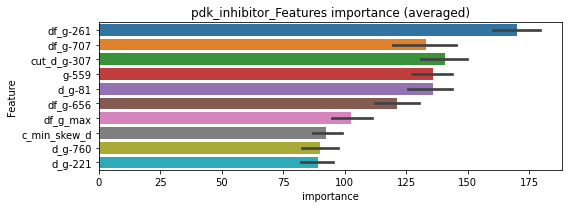

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000296469	valid_1's binary_logloss: 0.000619433


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[710]	training's binary_logloss: 0.00030566	valid_1's binary_logloss: 0.0035206
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000312411	valid_1's binary_logloss: 0.00214109
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.00029581	valid_1's binary_logloss: 0.000770914


pdk_inhibitor logloss: 0.001762708310924686


mutually exclusive columns: phosphodiesterase_inhibitor


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 6907
target_rate: 0.0110859 → Adj_target_rate: 0.0096064


selected negative label: 6907


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0619386	valid_1's binary_logloss: 0.131777
[2000]	training's binary_logloss: 0.0311935	valid_1's binary_logloss: 0.116244
Early stopping, best iteration is:
[2551]	training's binary_logloss: 0.0240608	valid_1's binary_logloss: 0.112565
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0615625	valid_1's binary_logloss: 0.132322
Early stopping, best iteration is:
[1957]	training's binary_logloss: 0.0318088	valid_1's binary_logloss: 0.118137
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0612251	valid_1's binary_logloss: 0.137273
Early stopping, best iteration is:
[1924]	training's binary_logloss: 0.0322278	valid_1's binary_logloss: 0.124834
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0622864	valid_1's binary_logloss: 0.128799
[2000]	training's b

1 / 3, AUC score:0.975, PR-AUC:0.948
y_Threshold: 0.0723359, Threshold: 0.1466817, pos_neg_ratio: 0.8000000
Remove_noisy_data: 509 → Positive_corect_labels: 1265/7779
p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, Expected: 44.1, Threshold: 0.1466817, conf_0:0.10268, conf_1:0.19069
threshold: 0.1466817, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1265.0/7779, y_label_rate: 0.1626173
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0450213	valid_1's binary_logloss: 0.0876929
[2000]	training's binary_logloss: 0.022433	valid_1's binary_logloss: 0.0704931
[3000]	training's binary_logloss: 0.0146156	valid_1's binary_logloss: 0.0642287
Early stopping, best iteration is:
[3207]	training's binary_logloss: 0.0136018	valid_1's binary_logloss: 0.0634434
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0427475	valid_1's binary_logloss: 0.100358
[2000]	training's binary_logloss: 0.021527	valid_1's binary_logloss: 0.0849491
Early stopping, best iteration is:
[2258]	training's binary_logloss: 0.0189803	valid_1's binary_logloss: 0.0832687
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0457004	valid_1's binary_logloss: 0.0784875
[2000]	training's binary_logloss: 0.0228485	valid_1's binary_logloss: 0.0616451
[3000]	training's binary_loglo

2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0826827, Threshold: 0.1466817, pos_neg_ratio: 0.8000000
Remove_noisy_data: 116 → Positive_corect_labels: 1207.0/7663
p_label_rate: 0.0128076 Vs.target_rate: 0.01109
Num_p_label: 51.0, Expected: 44.1, Threshold: 0.1466817, conf_0:0.11735, conf_1:0.17602
threshold: 0.1466817, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 1207.0/7663, y_label_rate: 0.1575101
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0360549	valid_1's binary_logloss: 0.0780761
[2000]	training's binary_logloss: 0.0179586	valid_1's binary_logloss: 0.063757
[3000]	training's binary_logloss: 0.0118049	valid_1's binary_logloss: 0.058665
Early stopping, best iteration is:
[3716]	training's binary_logloss: 0.00947834	valid_1's binary_logloss: 0.0569278
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.035916	valid_1's binary_logloss: 0.0770773
[2000]	training's binary_logloss: 0.0178055	valid_1's binary_logloss: 0.0620731
[3000]	training's binary_logloss: 0.0117201	valid_1's binary_logloss: 0.0571866
Early stopping, best iteration is:
[3449]	training's binary_logloss: 0.0101666	valid_1's binary_logloss: 0.0560347
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0376629	valid_1's binary_logloss: 0.0655539
[2000]	training's binary_logl

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0720195, Threshold: 0.1466817, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 1182.0/7613
p_label_rate: 0.0082873 Vs.target_rate: 0.01109
Num_p_label: 33.0, Expected: 44.1, Threshold: 0.1466817, conf_0:0.13201, conf_1:0.16135
threshold: 0.1466817, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 1182.0/7613, y_label_rate: 0.1552607


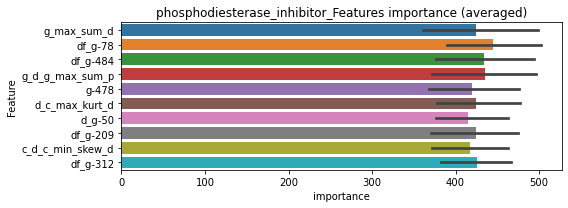

len(train_index) : 5709
len(valid_index) : 1904
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.035363	valid_1's binary_logloss: 0.0677242
[2000]	training's binary_logloss: 0.0180651	valid_1's binary_logloss: 0.0519769
[3000]	training's binary_logloss: 0.0120539	valid_1's binary_logloss: 0.0461267
[4000]	training's binary_logloss: 0.00902573	valid_1's binary_logloss: 0.0430891
Early stopping, best iteration is:
[4558]	training's binary_logloss: 0.00791044	valid_1's binary_logloss: 0.0419671


len(train_index) : 5710
len(valid_index) : 1903
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0358222	valid_1's binary_logloss: 0.0630017
[2000]	training's binary_logloss: 0.0182858	valid_1's binary_logloss: 0.0475765
[3000]	training's binary_logloss: 0.0121745	valid_1's binary_logloss: 0.0420763
[4000]	training's binary_logloss: 0.00910377	valid_1's binary_logloss: 0.0392994
Early stopping, best iteration is:
[4296]	training's binary_logloss: 0.00846283	valid_1's binary_logloss: 0.038716


len(train_index) : 5710
len(valid_index) : 1903
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0363939	valid_1's binary_logloss: 0.058417
[2000]	training's binary_logloss: 0.0185359	valid_1's binary_logloss: 0.0429869
[3000]	training's binary_logloss: 0.0123452	valid_1's binary_logloss: 0.0374988
[4000]	training's binary_logloss: 0.00923596	valid_1's binary_logloss: 0.0346233
[5000]	training's binary_logloss: 0.00735045	valid_1's binary_logloss: 0.0328322
Early stopping, best iteration is:
[5195]	training's binary_logloss: 0.00706928	valid_1's binary_logloss: 0.032584


len(train_index) : 5710
len(valid_index) : 1903
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0350965	valid_1's binary_logloss: 0.0660425
[2000]	training's binary_logloss: 0.017921	valid_1's binary_logloss: 0.0526629
[3000]	training's binary_logloss: 0.0119248	valid_1's binary_logloss: 0.0479622
Early stopping, best iteration is:
[3580]	training's binary_logloss: 0.00995148	valid_1's binary_logloss: 0.0465126


phosphodiesterase_inhibitor logloss: 0.03994520860434344
phosphodiesterase_inhibitor is unpredictable(><)!
phospholipase_inhibitor, len(trt): 25, len(othr): 3288
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3288


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000341788	valid_1's binary_logloss: 0.00455987
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000344932	valid_1's binary_logloss: 0.00613354
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00036199	valid_1's binary_logloss: 0.00194627
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020529, Threshold: 0.0072677, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000349001	valid_1's binary_logloss: 0.00262725


p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0072677, conf_0:0.00509, conf_1:0.00945
Num_p_label: 2.0, Expected: 4.2, Adj_threshold_1: 0.0372677
threshold: 0.0372677, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000356471	valid_1's binary_logloss: 0.00377306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335323	valid_1's binary_logloss: 0.00633129
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000353185	valid_1's binary_logloss: 0.00201513
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0332263, Threshold: 0.0372677, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00105
Num_p_label: 11.0, Expected: 4.2, Threshold: 0.0372677, conf_0:0.02981, conf_1:0.04472


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000337189	valid_1's binary_logloss: 0.00240913


Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0672677
threshold: 0.0672677, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000356471	valid_1's binary_logloss: 0.00377306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335323	valid_1's binary_logloss: 0.00633129
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000353185	valid_1's binary_logloss: 0.00201513
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000337189	valid_1's binary_logloss: 0.00240913


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0332263, Threshold: 0.0672677, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00105
Num_p_label: 4.0, Expected: 4.2, Threshold: 0.0672677, conf_0:0.06054, conf_1:0.07399
threshold: 0.0672677, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


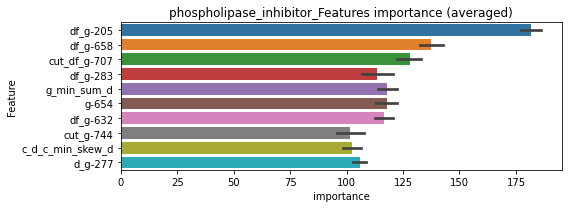

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000347908	valid_1's binary_logloss: 0.00275648


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000363413	valid_1's binary_logloss: 0.00455734


================================= fold 3/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000348799	valid_1's binary_logloss: 0.00159494


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000336658	valid_1's binary_logloss: 0.00218571


phospholipase_inhibitor logloss: 0.0027744707856874077


mutually exclusive columns: pi3k_inhibitor


pi3k_inhibitor, len(trt): 151, len(othr): 3714
target_rate: 0.0063408 → Adj_target_rate: 0.0059749


selected negative label: 3714


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.065655	valid_1's binary_logloss: 0.145054
[2000]	training's binary_logloss: 0.0333488	valid_1's binary_logloss: 0.117916
[3000]	training's binary_logloss: 0.0217774	valid_1's binary_logloss: 0.10798
Early stopping, best iteration is:
[3075]	training's binary_logloss: 0.0212475	valid_1's binary_logloss: 0.107494
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0647645	valid_1's binary_logloss: 0.154197
[2000]	training's binary_logloss: 0.0326277	valid_1's binary_logloss: 0.130689
Early stopping, best iteration is:
[2711]	training's binary_logloss: 0.0238055	valid_1's binary_logloss: 0.124731
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0662881	valid_1's binary_logloss: 0.134495
[2000]	training's binary_logloss: 0.0333694	valid_1's binary_logloss: 0.10927
[3000]	training's binary_logloss: 0.021

1 / 3, AUC score:0.983, PR-AUC:0.963
y_Threshold: 0.0723631, Threshold: 0.1587814, pos_neg_ratio: 0.8000000
Remove_noisy_data: 238 → Positive_corect_labels: 698/4218
p_label_rate: 0.0100452 Vs.target_rate: 0.00634
Num_p_label: 40.0, Expected: 25.2, Threshold: 0.1587814, conf_0:0.11115, conf_1:0.20642
Num_p_label: 23.0, Expected: 25.2, Adj_threshold_1: 0.1887814
threshold: 0.1887814, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 698.0/4218, y_label_rate: 0.1654813
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0554824	valid_1's binary_logloss: 0.122543
[2000]	training's binary_logloss: 0.028008	valid_1's binary_logloss: 0.0968272
[3000]	training's binary_logloss: 0.0184149	valid_1's binary_logloss: 0.0867654
Early stopping, best iteration is:
[3818]	training's binary_logloss: 0.0143913	valid_1's binary_logloss: 0.0826903
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0564777	valid_1's binary_logloss: 0.111685
[2000]	training's binary_logloss: 0.0282197	valid_1's binary_logloss: 0.0847896
[3000]	training's binary_logloss: 0.0185512	valid_1's binary_logloss: 0.074595
[4000]	training's binary_logloss: 0.0137661	valid_1's binary_logloss: 0.0695044
Early stopping, best iteration is:
[4656]	training's binary_logloss: 0.011805	valid_1's binary_logloss: 0.0671105
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss

2 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.1060960, Threshold: 0.1887814, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 669.0/4160
p_label_rate: 0.0118031 Vs.target_rate: 0.00634
Num_p_label: 47.0, Expected: 25.2, Threshold: 0.1887814, conf_0:0.15103, conf_1:0.22654
Num_p_label: 37.0, Expected: 25.2, Adj_threshold_1: 0.2187814
threshold: 0.2187814, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 669.0/4160, y_label_rate: 0.1608173
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0492195	valid_1's binary_logloss: 0.121015
[2000]	training's binary_logloss: 0.0247203	valid_1's binary_logloss: 0.0982667
Early stopping, best iteration is:
[2850]	training's binary_logloss: 0.017179	valid_1's binary_logloss: 0.0910637
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0507307	valid_1's binary_logloss: 0.105135
[2000]	training's binary_logloss: 0.0256686	valid_1's binary_logloss: 0.0812898
[3000]	training's binary_logloss: 0.0169145	valid_1's binary_logloss: 0.072362
Early stopping, best iteration is:
[3443]	training's binary_logloss: 0.0147073	valid_1's binary_logloss: 0.0700619
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0521783	valid_1's binary_logloss: 0.0932379
[2000]	training's binary_logloss: 0.026121	valid_1's binary_logloss: 0.0665997
[3000]	training's binary_logloss

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.1044518, Threshold: 0.2187814, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 654.0/4130
p_label_rate: 0.0067805 Vs.target_rate: 0.00634
Num_p_label: 27.0, Expected: 25.2, Threshold: 0.2187814, conf_0:0.19690, conf_1:0.24066
threshold: 0.2187814, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 654.0/4130, y_label_rate: 0.1583535


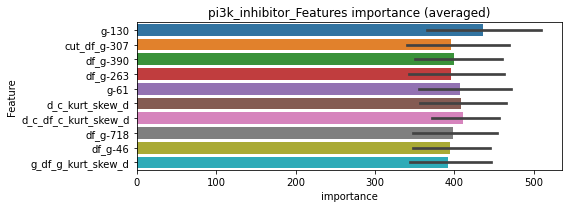

len(train_index) : 3097
len(valid_index) : 1033
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0531949	valid_1's binary_logloss: 0.107794
[2000]	training's binary_logloss: 0.0271327	valid_1's binary_logloss: 0.0823949
[3000]	training's binary_logloss: 0.0180452	valid_1's binary_logloss: 0.0724864
[4000]	training's binary_logloss: 0.0135141	valid_1's binary_logloss: 0.0676037
[5000]	training's binary_logloss: 0.0108152	valid_1's binary_logloss: 0.0644623
[6000]	training's binary_logloss: 0.00900598	valid_1's binary_logloss: 0.0620843
Early stopping, best iteration is:
[6807]	training's binary_logloss: 0.007949	valid_1's binary_logloss: 0.0607389


len(train_index) : 3097
len(valid_index) : 1033
================================= fold 2/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0533798	valid_1's binary_logloss: 0.111393
[2000]	training's binary_logloss: 0.027121	valid_1's binary_logloss: 0.0829946
[3000]	training's binary_logloss: 0.0180333	valid_1's binary_logloss: 0.0722827
[4000]	training's binary_logloss: 0.013491	valid_1's binary_logloss: 0.0666187
[5000]	training's binary_logloss: 0.010786	valid_1's binary_logloss: 0.0630428
[6000]	training's binary_logloss: 0.00898215	valid_1's binary_logloss: 0.0607192
[7000]	training's binary_logloss: 0.00770014	valid_1's binary_logloss: 0.058804
Early stopping, best iteration is:
[7010]	training's binary_logloss: 0.007689	valid_1's binary_logloss: 0.05878


len(train_index) : 3098
len(valid_index) : 1032
================================= fold 3/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0549223	valid_1's binary_logloss: 0.0957357
[2000]	training's binary_logloss: 0.0277631	valid_1's binary_logloss: 0.0703606
[3000]	training's binary_logloss: 0.0184308	valid_1's binary_logloss: 0.0608065
[4000]	training's binary_logloss: 0.0137842	valid_1's binary_logloss: 0.0559337
[5000]	training's binary_logloss: 0.011	valid_1's binary_logloss: 0.0524779
[6000]	training's binary_logloss: 0.00916022	valid_1's binary_logloss: 0.0500908
Early stopping, best iteration is:
[6877]	training's binary_logloss: 0.00799975	valid_1's binary_logloss: 0.0486147


len(train_index) : 3098
len(valid_index) : 1032
================================= fold 4/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0538749	valid_1's binary_logloss: 0.108574
[2000]	training's binary_logloss: 0.0271006	valid_1's binary_logloss: 0.0841257
[3000]	training's binary_logloss: 0.0180469	valid_1's binary_logloss: 0.075335
[4000]	training's binary_logloss: 0.013487	valid_1's binary_logloss: 0.0706157
Early stopping, best iteration is:
[4813]	training's binary_logloss: 0.0112002	valid_1's binary_logloss: 0.0682596


pi3k_inhibitor logloss: 0.05909861882840027
pi3k_inhibitor is unpredictable(><)!
pkc_inhibitor, len(trt): 31, len(othr): 3284
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3284


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000416481	valid_1's binary_logloss: 0.00431885
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000423025	valid_1's binary_logloss: 0.0048987
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000416862	valid_1's binary_logloss: 0.00126668
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023141, Threshold: 0.0076017, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000406063	valid_1's binary_logloss: 0.00688213


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0076017, conf_0:0.00532, conf_1:0.00988
Num_p_label: 4.0, Expected: 5.2, Adj_threshold_1: 0.0376017
threshold: 0.0376017, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00040065	valid_1's binary_logloss: 0.00422108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00041316	valid_1's binary_logloss: 0.004194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000404503	valid_1's binary_logloss: 0.00110191
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292664, Threshold: 0.0376017, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000407159	valid_1's binary_logloss: 0.00590107


p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, Expected: 5.2, Threshold: 0.0376017, conf_0:0.03008, conf_1:0.04512
threshold: 0.0376017, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00040065	valid_1's binary_logloss: 0.00422108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00041316	valid_1's binary_logloss: 0.004194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000404503	valid_1's binary_logloss: 0.00110191
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292664, Threshold: 0.0376017, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000407159	valid_1's binary_logloss: 0.00590107


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, Expected: 5.2, Threshold: 0.0376017, conf_0:0.03384, conf_1:0.04136
threshold: 0.0376017, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


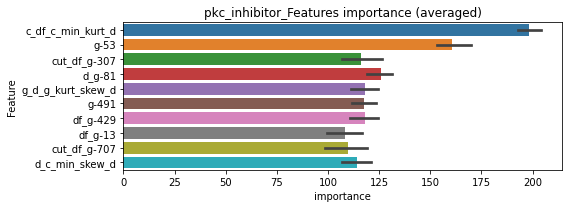

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000403586	valid_1's binary_logloss: 0.00419615


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000409293	valid_1's binary_logloss: 0.00447885


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000406051	valid_1's binary_logloss: 0.00101906


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000417528	valid_1's binary_logloss: 0.00457034


pkc_inhibitor logloss: 0.0035660991326001653
potassium_channel_activator, len(trt): 55, len(othr): 3279
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000591296	valid_1's binary_logloss: 0.0230529
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00056468	valid_1's binary_logloss: 0.00995056
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000684819	valid_1's binary_logloss: 0.0141656
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0052834, Threshold: 0.0231491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0231491, conf_0:0.01620, conf_1:0.03009
Num_p_label: 16.0, Expected: 9.2, Adj_threshold_1: 0.0531491


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00113494	valid_1's binary_logloss: 0.0289167


threshold: 0.0531491, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000596199	valid_1's binary_logloss: 0.0179022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000519621	valid_1's binary_logloss: 0.0146445
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000531024	valid_1's binary_logloss: 0.0150026
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0408890, Threshold: 0.0531491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0135610 Vs.target_rate: 0.00231
Num_p_label: 54.0, Expected: 9.2, Threshold: 0.0531491, conf_0:0.04252, conf_1:0.06378


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000879823	valid_1's binary_logloss: 0.0138202


Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0831491
Num_p_label: 34.0, Expected: 9.2, Adj_threshold_2: 0.1131491
Num_p_label: 31.0, Expected: 9.2, Adj_threshold_3: 0.1431491
Num_p_label: 27.0, Expected: 9.2, Adj_threshold_4: 0.1731491
Num_p_label: 23.0, Expected: 9.2, Adj_threshold_5: 0.2031491
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_6: 0.2331491
threshold: 0.2331491, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000646138	valid_1's binary_logloss: 0.0126771
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00055593	valid_1's binary_logloss: 0.0176898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000614339	valid_1's binary_logloss: 0.0136931
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0396138, Threshold: 0.2331491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0072828 Vs.target_rate: 0.00231


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000801197	valid_1's binary_logloss: 0.0179518


Num_p_label: 29.0, Expected: 9.2, Threshold: 0.2331491, conf_0:0.20983, conf_1:0.25646
Num_p_label: 26.0, Expected: 9.2, Adj_threshold_1: 0.2631491
Num_p_label: 24.0, Expected: 9.2, Adj_threshold_2: 0.2931491
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_3: 0.3231491
threshold: 0.3231491, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 646.0/3784, y_label_rate: 0.1707188


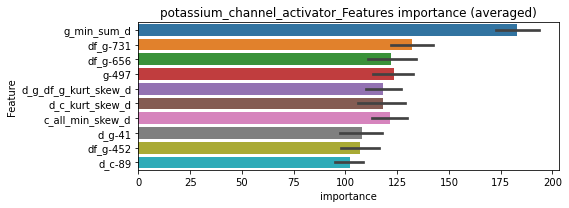

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000575052	valid_1's binary_logloss: 0.0184818


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000523504	valid_1's binary_logloss: 0.00553297


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000635876	valid_1's binary_logloss: 0.0110953


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds


potassium_channel_activator logloss: 0.011042427989351754


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000738781	valid_1's binary_logloss: 0.00905533


potassium_channel_antagonist, len(trt): 98, len(othr): 3273
target_rate: 0.0041152 → Adj_target_rate: 0.0041375


selected negative label: 3273


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0504319	valid_1's binary_logloss: 0.113637
[2000]	training's binary_logloss: 0.0254146	valid_1's binary_logloss: 0.0930235
[3000]	training's binary_logloss: 0.0167262	valid_1's binary_logloss: 0.0856048
Early stopping, best iteration is:
[3183]	training's binary_logloss: 0.0157418	valid_1's binary_logloss: 0.084504
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0520358	valid_1's binary_logloss: 0.10181
[2000]	training's binary_logloss: 0.026351	valid_1's binary_logloss: 0.0797594
[3000]	training's binary_logloss: 0.0173556	valid_1's binary_logloss: 0.0718873
[4000]	training's binary_logloss: 0.0128515	valid_1's binary_logloss: 0.0676595
[5000]	training's binary_logloss: 0.0102053	valid_1's binary_logloss: 0.0649988
Early stopping, best iteration is:
[5061]	training's binary_logloss: 0.0100813	valid_1's binary_logloss: 0.0648589
Training unti

1 / 3, AUC score:0.995, PR-AUC:0.987
y_Threshold: 0.0447403, Threshold: 0.0890375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 640/3767
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, Expected: 16.4, Threshold: 0.0890375, conf_0:0.06233, conf_1:0.11575
Num_p_label: 21.0, Expected: 16.4, Adj_threshold_1: 0.1190375
threshold: 0.1190375, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 640.0/3767, y_label_rate: 0.1698965
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.046951	valid_1's binary_logloss: 0.099843
[2000]	training's binary_logloss: 0.0235415	valid_1's binary_logloss: 0.0792309
Early stopping, best iteration is:
[2662]	training's binary_logloss: 0.0175372	valid_1's binary_logloss: 0.0737285
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0469544	valid_1's binary_logloss: 0.0961724
[2000]	training's binary_logloss: 0.0237683	valid_1's binary_logloss: 0.0738159
[3000]	training's binary_logloss: 0.0157402	valid_1's binary_logloss: 0.0650761
[4000]	training's binary_logloss: 0.0117422	valid_1's binary_logloss: 0.0606903
[5000]	training's binary_logloss: 0.00936348	valid_1's binary_logloss: 0.0576829
[6000]	training's binary_logloss: 0.00780452	valid_1's binary_logloss: 0.0554921
Early stopping, best iteration is:
[6043]	training's binary_logloss: 0.00775019	valid_1's binary_logloss: 0.0554276
Trainin

2 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0801663, Threshold: 0.1190375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 621.0/3729
p_label_rate: 0.0107986 Vs.target_rate: 0.00412
Num_p_label: 43.0, Expected: 16.4, Threshold: 0.1190375, conf_0:0.09523, conf_1:0.14284
Num_p_label: 31.0, Expected: 16.4, Adj_threshold_1: 0.1490375
Num_p_label: 16.0, Expected: 16.4, Adj_threshold_2: 0.1790375
threshold: 0.1790375, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 621.0/3729, y_label_rate: 0.1665326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0436145	valid_1's binary_logloss: 0.0855249
[2000]	training's binary_logloss: 0.0219961	valid_1's binary_logloss: 0.0658243
[3000]	training's binary_logloss: 0.0145363	valid_1's binary_logloss: 0.0588097
[4000]	training's binary_logloss: 0.0108579	valid_1's binary_logloss: 0.0552294
Early stopping, best iteration is:
[4162]	training's binary_logloss: 0.0104246	valid_1's binary_logloss: 0.0547121
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0437878	valid_1's binary_logloss: 0.0798777
[2000]	training's binary_logloss: 0.0221385	valid_1's binary_logloss: 0.0605008
[3000]	training's binary_logloss: 0.0147596	valid_1's binary_logloss: 0.0535019
Early stopping, best iteration is:
[3574]	training's binary_logloss: 0.0123562	valid_1's binary_logloss: 0.0511264
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_lo

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0611444, Threshold: 0.1790375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 611.0/3709
p_label_rate: 0.0045203 Vs.target_rate: 0.00412
Num_p_label: 18.0, Expected: 16.4, Threshold: 0.1790375, conf_0:0.16113, conf_1:0.19694
threshold: 0.1790375, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 611.0/3709, y_label_rate: 0.1647344


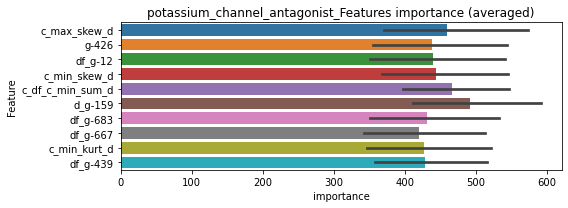

len(train_index) : 2781
len(valid_index) : 928
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.044832	valid_1's binary_logloss: 0.0816894
[2000]	training's binary_logloss: 0.0229586	valid_1's binary_logloss: 0.0602662
[3000]	training's binary_logloss: 0.0152984	valid_1's binary_logloss: 0.0522386
[4000]	training's binary_logloss: 0.0114567	valid_1's binary_logloss: 0.0481456
[5000]	training's binary_logloss: 0.00918162	valid_1's binary_logloss: 0.0455575
Early stopping, best iteration is:
[5772]	training's binary_logloss: 0.00795378	valid_1's binary_logloss: 0.0441735


len(train_index) : 2782
len(valid_index) : 927
================================= fold 2/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.043909	valid_1's binary_logloss: 0.0863566
[2000]	training's binary_logloss: 0.0224374	valid_1's binary_logloss: 0.0651676
[3000]	training's binary_logloss: 0.0148958	valid_1's binary_logloss: 0.0572227
[4000]	training's binary_logloss: 0.0111727	valid_1's binary_logloss: 0.0531181
[5000]	training's binary_logloss: 0.00893322	valid_1's binary_logloss: 0.0504644
[6000]	training's binary_logloss: 0.00746312	valid_1's binary_logloss: 0.048643
[7000]	training's binary_logloss: 0.00640761	valid_1's binary_logloss: 0.0473573
Early stopping, best iteration is:
[7785]	training's binary_logloss: 0.00578295	valid_1's binary_logloss: 0.0465413


len(train_index) : 2782
len(valid_index) : 927
================================= fold 3/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0452199	valid_1's binary_logloss: 0.077367
[2000]	training's binary_logloss: 0.0230925	valid_1's binary_logloss: 0.0569627
[3000]	training's binary_logloss: 0.0154011	valid_1's binary_logloss: 0.0493307
[4000]	training's binary_logloss: 0.0115102	valid_1's binary_logloss: 0.045258
[5000]	training's binary_logloss: 0.00921022	valid_1's binary_logloss: 0.0427913
[6000]	training's binary_logloss: 0.00768861	valid_1's binary_logloss: 0.0410464
Early stopping, best iteration is:
[6357]	training's binary_logloss: 0.00726094	valid_1's binary_logloss: 0.0405434


len(train_index) : 2782
len(valid_index) : 927
================================= fold 4/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0454204	valid_1's binary_logloss: 0.0757937
[2000]	training's binary_logloss: 0.0233215	valid_1's binary_logloss: 0.0528552
[3000]	training's binary_logloss: 0.0155224	valid_1's binary_logloss: 0.0441923
[4000]	training's binary_logloss: 0.0116183	valid_1's binary_logloss: 0.0396445
[5000]	training's binary_logloss: 0.0092996	valid_1's binary_logloss: 0.0368008
[6000]	training's binary_logloss: 0.00775729	valid_1's binary_logloss: 0.0347419
[7000]	training's binary_logloss: 0.00666425	valid_1's binary_logloss: 0.0333321
[8000]	training's binary_logloss: 0.00585013	valid_1's binary_logloss: 0.032172
[9000]	training's binary_logloss: 0.00521917	valid_1's binary_logloss: 0.0311947
Early stopping, best iteration is:
[9654]	training's binary_logloss: 0.00487824	valid_1's binary_logloss: 0.0306743


potassium_channel_antagonist logloss: 0.04048411955634416
potassium_channel_antagonist is unpredictable(><)!
ppar_receptor_agonist, len(trt): 115, len(othr): 3276
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 3276


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0570415	valid_1's binary_logloss: 0.13282
[2000]	training's binary_logloss: 0.0290792	valid_1's binary_logloss: 0.113088
Early stopping, best iteration is:
[2619]	training's binary_logloss: 0.0219812	valid_1's binary_logloss: 0.108155
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.059566	valid_1's binary_logloss: 0.11771
[2000]	training's binary_logloss: 0.030437	valid_1's binary_logloss: 0.0957333
[3000]	training's binary_logloss: 0.0201092	valid_1's binary_logloss: 0.088359
Early stopping, best iteration is:
[3447]	training's binary_logloss: 0.0173879	valid_1's binary_logloss: 0.0860602
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0622096	valid_1's binary_logloss: 0.101785
[2000]	training's binary_logloss: 0.031848	valid_1's binary_logloss: 0.0774685
[3000]	training's binary_logloss: 0.02

1 / 3, AUC score:0.986, PR-AUC:0.971
y_Threshold: 0.0644203, Threshold: 0.1389312, pos_neg_ratio: 0.8000000
Remove_noisy_data: 202 → Positive_corect_labels: 620/3729
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.1389312, conf_0:0.09725, conf_1:0.18061
Num_p_label: 22.0, Expected: 19.2, Adj_threshold_1: 0.1689312
threshold: 0.1689312, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 620.0/3729, y_label_rate: 0.1662644
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0483329	valid_1's binary_logloss: 0.0951164
[2000]	training's binary_logloss: 0.0244906	valid_1's binary_logloss: 0.0726058
[3000]	training's binary_logloss: 0.0162453	valid_1's binary_logloss: 0.0646443
Early stopping, best iteration is:
[3625]	training's binary_logloss: 0.0133597	valid_1's binary_logloss: 0.061542
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0491029	valid_1's binary_logloss: 0.0920137
[2000]	training's binary_logloss: 0.0248695	valid_1's binary_logloss: 0.0689236
[3000]	training's binary_logloss: 0.0164511	valid_1's binary_logloss: 0.060882
[4000]	training's binary_logloss: 0.0122739	valid_1's binary_logloss: 0.0570286
[5000]	training's binary_logloss: 0.0097998	valid_1's binary_logloss: 0.0543971
Early stopping, best iteration is:
[5225]	training's binary_logloss: 0.00937596	valid_1's binary_logloss: 0.0539434
Training 

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0839221, Threshold: 0.1689312, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 609.0/3707
p_label_rate: 0.0082873 Vs.target_rate: 0.00483
Num_p_label: 33.0, Expected: 19.2, Threshold: 0.1689312, conf_0:0.13514, conf_1:0.20272
Num_p_label: 18.0, Expected: 19.2, Adj_threshold_1: 0.1989312
threshold: 0.1989312, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 609.0/3707, y_label_rate: 0.1642838
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0448091	valid_1's binary_logloss: 0.101103
[2000]	training's binary_logloss: 0.0224023	valid_1's binary_logloss: 0.0797042
[3000]	training's binary_logloss: 0.0147824	valid_1's binary_logloss: 0.0716492
Early stopping, best iteration is:
[3618]	training's binary_logloss: 0.0122343	valid_1's binary_logloss: 0.0686314
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0459396	valid_1's binary_logloss: 0.0844525
[2000]	training's binary_logloss: 0.0231512	valid_1's binary_logloss: 0.0629422
[3000]	training's binary_logloss: 0.0153352	valid_1's binary_logloss: 0.0550929
Early stopping, best iteration is:
[3778]	training's binary_logloss: 0.0121098	valid_1's binary_logloss: 0.0517471
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0472891	valid_1's binary_logloss: 0.0817514
[2000]	training's binary_log

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0775996, Threshold: 0.1989312, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 601.0/3691
p_label_rate: 0.0035158 Vs.target_rate: 0.00483
Num_p_label: 14.0, Expected: 19.2, Threshold: 0.1989312, conf_0:0.17904, conf_1:0.21882
threshold: 0.1989312, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 601.0/3691, y_label_rate: 0.1628285


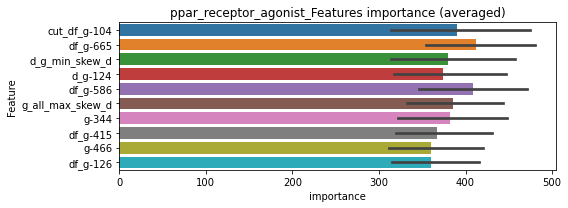

len(train_index) : 2768
len(valid_index) : 923
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0462061	valid_1's binary_logloss: 0.0892951
[2000]	training's binary_logloss: 0.023764	valid_1's binary_logloss: 0.0667659
[3000]	training's binary_logloss: 0.0158681	valid_1's binary_logloss: 0.0582512
[4000]	training's binary_logloss: 0.0119125	valid_1's binary_logloss: 0.053581
[5000]	training's binary_logloss: 0.00955119	valid_1's binary_logloss: 0.0506246
[6000]	training's binary_logloss: 0.00797569	valid_1's binary_logloss: 0.0484513
[7000]	training's binary_logloss: 0.00686471	valid_1's binary_logloss: 0.0470059
Early stopping, best iteration is:
[7218]	training's binary_logloss: 0.00666347	valid_1's binary_logloss: 0.0466832


len(train_index) : 2768
len(valid_index) : 923
================================= fold 2/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0485352	valid_1's binary_logloss: 0.0792041
[2000]	training's binary_logloss: 0.0248372	valid_1's binary_logloss: 0.0541403
[3000]	training's binary_logloss: 0.0166085	valid_1's binary_logloss: 0.0448874
[4000]	training's binary_logloss: 0.0124765	valid_1's binary_logloss: 0.0401248
[5000]	training's binary_logloss: 0.0100157	valid_1's binary_logloss: 0.0368975
[6000]	training's binary_logloss: 0.0083661	valid_1's binary_logloss: 0.0347122
[7000]	training's binary_logloss: 0.00720648	valid_1's binary_logloss: 0.0331682
[8000]	training's binary_logloss: 0.00632961	valid_1's binary_logloss: 0.0318714
[9000]	training's binary_logloss: 0.00565173	valid_1's binary_logloss: 0.0309635
[10000]	training's binary_logloss: 0.00510897	valid_1's binary_logloss: 0.0302112
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00510897	valid_1's binary_logloss: 0.0302112


len(train_index) : 2768
len(valid_index) : 923
================================= fold 3/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.04925	valid_1's binary_logloss: 0.0731705
[2000]	training's binary_logloss: 0.025264	valid_1's binary_logloss: 0.0497534
[3000]	training's binary_logloss: 0.0168514	valid_1's binary_logloss: 0.0409065
[4000]	training's binary_logloss: 0.0126622	valid_1's binary_logloss: 0.0366143
[5000]	training's binary_logloss: 0.010147	valid_1's binary_logloss: 0.0338597
[6000]	training's binary_logloss: 0.00846722	valid_1's binary_logloss: 0.0318797
[7000]	training's binary_logloss: 0.00729214	valid_1's binary_logloss: 0.0306233
[8000]	training's binary_logloss: 0.00640056	valid_1's binary_logloss: 0.0295578
Early stopping, best iteration is:
[8151]	training's binary_logloss: 0.00628615	valid_1's binary_logloss: 0.029426


len(train_index) : 2769
len(valid_index) : 922
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.046521	valid_1's binary_logloss: 0.0961046
[2000]	training's binary_logloss: 0.0238915	valid_1's binary_logloss: 0.073525
[3000]	training's binary_logloss: 0.0159342	valid_1's binary_logloss: 0.064919
[4000]	training's binary_logloss: 0.0119766	valid_1's binary_logloss: 0.0605928
[5000]	training's binary_logloss: 0.00961411	valid_1's binary_logloss: 0.0580405
[6000]	training's binary_logloss: 0.00803157	valid_1's binary_logloss: 0.0560069
Early stopping, best iteration is:
[6090]	training's binary_logloss: 0.00791372	valid_1's binary_logloss: 0.0558008


ppar_receptor_agonist logloss: 0.04052616404605933
ppar_receptor_agonist is unpredictable(><)!
ppar_receptor_antagonist, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000366358	valid_1's binary_logloss: 0.0053949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000385224	valid_1's binary_logloss: 0.00698382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000387371	valid_1's binary_logloss: 0.00666135
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021134, Threshold: 0.0048970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000388687	valid_1's binary_logloss: 0.00764665


p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0048970, conf_0:0.00343, conf_1:0.00637
Num_p_label: 1.0, Expected: 5.0, Adj_threshold_1: 0.0348970
threshold: 0.0348970, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00039991	valid_1's binary_logloss: 0.005164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000377032	valid_1's binary_logloss: 0.00601901
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000380852	valid_1's binary_logloss: 0.00703313
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0115476, Threshold: 0.0348970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00126
Num_p_label: 3.0, Expected: 5.0, Threshold: 0.0348970, conf_0:0.02792, conf_1:0.04188


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000395263	valid_1's binary_logloss: 0.0083008


threshold: 0.0348970, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00039991	valid_1's binary_logloss: 0.005164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000377032	valid_1's binary_logloss: 0.00601901
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000380852	valid_1's binary_logloss: 0.00703313
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0115476, Threshold: 0.0348970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00126


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000395263	valid_1's binary_logloss: 0.0083008


Num_p_label: 3.0, Expected: 5.0, Threshold: 0.0348970, conf_0:0.03141, conf_1:0.03839
threshold: 0.0348970, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


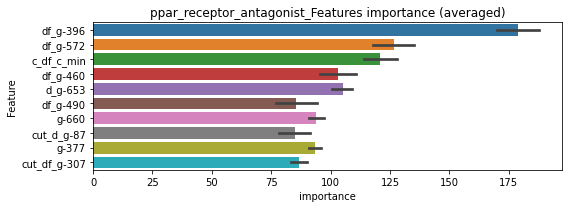

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000380512	valid_1's binary_logloss: 0.00405994


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000402632	valid_1's binary_logloss: 0.00608962


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000389384	valid_1's binary_logloss: 0.00558689


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000399732	valid_1's binary_logloss: 0.00655074


ppar_receptor_antagonist logloss: 0.005571757465115935
progesterone_receptor_agonist, len(trt): 119, len(othr): 3268
target_rate: 0.0049971 → Adj_target_rate: 0.0048799


selected negative label: 3268


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0586667	valid_1's binary_logloss: 0.137708
[2000]	training's binary_logloss: 0.0298299	valid_1's binary_logloss: 0.116566
[3000]	training's binary_logloss: 0.0196029	valid_1's binary_logloss: 0.109237
Early stopping, best iteration is:
[3438]	training's binary_logloss: 0.0169949	valid_1's binary_logloss: 0.107161
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0600169	valid_1's binary_logloss: 0.127212
[2000]	training's binary_logloss: 0.0303385	valid_1's binary_logloss: 0.105774
[3000]	training's binary_logloss: 0.0199962	valid_1's binary_logloss: 0.0985299
Early stopping, best iteration is:
[3077]	training's binary_logloss: 0.0194827	valid_1's binary_logloss: 0.0981053
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0610549	valid_1's binary_logloss: 0.120368
[2000]	training's binary_logloss: 

1 / 3, AUC score:0.986, PR-AUC:0.972
y_Threshold: 0.0636543, Threshold: 0.2720806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 188 → Positive_corect_labels: 625/3733
p_label_rate: 0.0100452 Vs.target_rate: 0.00500
Num_p_label: 40.0, Expected: 19.9, Threshold: 0.2720806, conf_0:0.19046, conf_1:0.35370
Num_p_label: 36.0, Expected: 19.9, Adj_threshold_1: 0.3020806
Num_p_label: 29.0, Expected: 19.9, Adj_threshold_2: 0.3320806
threshold: 0.3320806, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 625.0/3733, y_label_rate: 0.1674257
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0514678	valid_1's binary_logloss: 0.105997
[2000]	training's binary_logloss: 0.0260219	valid_1's binary_logloss: 0.0819589
[3000]	training's binary_logloss: 0.0172061	valid_1's binary_logloss: 0.0738661
[4000]	training's binary_logloss: 0.0128057	valid_1's binary_logloss: 0.0695436
Early stopping, best iteration is:
[4518]	training's binary_logloss: 0.0113161	valid_1's binary_logloss: 0.0680568
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0517984	valid_1's binary_logloss: 0.107439
[2000]	training's binary_logloss: 0.0259693	valid_1's binary_logloss: 0.0843733
[3000]	training's binary_logloss: 0.0171235	valid_1's binary_logloss: 0.0762524
Early stopping, best iteration is:
[3620]	training's binary_logloss: 0.014139	valid_1's binary_logloss: 0.0733738
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_loglo

2 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0938540, Threshold: 0.3320806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 602.0/3687
p_label_rate: 0.0185836 Vs.target_rate: 0.00500
Num_p_label: 74.0, Expected: 19.9, Threshold: 0.3320806, conf_0:0.26566, conf_1:0.39850
Num_p_label: 64.0, Expected: 19.9, Adj_threshold_1: 0.3620806
Num_p_label: 58.0, Expected: 19.9, Adj_threshold_2: 0.3920806
Num_p_label: 57.0, Expected: 19.9, Adj_threshold_3: 0.4220806
Num_p_label: 49.0, Expected: 19.9, Adj_threshold_4: 0.4520806
Num_p_label: 37.0, Expected: 19.9, Adj_threshold_5: 0.4820806
Num_p_label: 29.0, Expected: 19.9, Adj_threshold_6: 0.5120806
threshold: 0.5120806, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 602.0/3687, y_label_rate: 0.1632764
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0468263	valid_1's binary_logloss: 0.0944306
[2000]	training's binary_logloss: 0.0232886	valid_1's binary_logloss: 0.0724835
[3000]	training's binary_logloss: 0.0154266	valid_1's binary_logloss: 0.0645513
Early stopping, best iteration is:
[3781]	training's binary_logloss: 0.0122058	valid_1's binary_logloss: 0.0610784
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.048484	valid_1's binary_logloss: 0.0891828
[2000]	training's binary_logloss: 0.0243396	valid_1's binary_logloss: 0.064587
[3000]	training's binary_logloss: 0.0160867	valid_1's binary_logloss: 0.0557549
[4000]	training's binary_logloss: 0.0119909	valid_1's binary_logloss: 0.0516624
Early stopping, best iteration is:
[4683]	training's binary_logloss: 0.010247	valid_1's binary_logloss: 0.0498529
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_loglo

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0986215, Threshold: 0.5120806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 589.0/3661
p_label_rate: 0.0125565 Vs.target_rate: 0.00500
Num_p_label: 50.0, Expected: 19.9, Threshold: 0.5120806, conf_0:0.46087, conf_1:0.56329
Num_p_label: 38.0, Expected: 19.9, Adj_threshold_1: 0.5420806
Num_p_label: 32.0, Expected: 19.9, Adj_threshold_2: 0.5720806
Num_p_label: 25.0, Expected: 19.9, Adj_threshold_3: 0.6020806
threshold: 0.6020806, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 589.0/3661, y_label_rate: 0.1608850


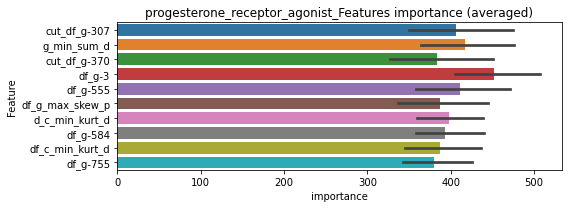

len(train_index) : 2745
len(valid_index) : 916
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0473059	valid_1's binary_logloss: 0.0902291
[2000]	training's binary_logloss: 0.024184	valid_1's binary_logloss: 0.0671322
[3000]	training's binary_logloss: 0.0161419	valid_1's binary_logloss: 0.0585162
[4000]	training's binary_logloss: 0.0121287	valid_1's binary_logloss: 0.0542367
[5000]	training's binary_logloss: 0.00970842	valid_1's binary_logloss: 0.0514349
Early stopping, best iteration is:
[5182]	training's binary_logloss: 0.00937133	valid_1's binary_logloss: 0.0509224


len(train_index) : 2746
len(valid_index) : 915
================================= fold 2/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0472226	valid_1's binary_logloss: 0.0921091
[2000]	training's binary_logloss: 0.0241597	valid_1's binary_logloss: 0.0686449
[3000]	training's binary_logloss: 0.0160985	valid_1's binary_logloss: 0.0597194
[4000]	training's binary_logloss: 0.0120842	valid_1's binary_logloss: 0.0551454
[5000]	training's binary_logloss: 0.00970286	valid_1's binary_logloss: 0.0524011
[6000]	training's binary_logloss: 0.00809438	valid_1's binary_logloss: 0.0502318
[7000]	training's binary_logloss: 0.00698286	valid_1's binary_logloss: 0.0488164
Early stopping, best iteration is:
[7802]	training's binary_logloss: 0.00628768	valid_1's binary_logloss: 0.0478243


len(train_index) : 2746
len(valid_index) : 915
================================= fold 3/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0490613	valid_1's binary_logloss: 0.082674
[2000]	training's binary_logloss: 0.0250312	valid_1's binary_logloss: 0.0577274
[3000]	training's binary_logloss: 0.0166494	valid_1's binary_logloss: 0.0483574
[4000]	training's binary_logloss: 0.0124761	valid_1's binary_logloss: 0.0432696
[5000]	training's binary_logloss: 0.00999684	valid_1's binary_logloss: 0.0403088
[6000]	training's binary_logloss: 0.0083447	valid_1's binary_logloss: 0.0381228
[7000]	training's binary_logloss: 0.00718398	valid_1's binary_logloss: 0.0366831
[8000]	training's binary_logloss: 0.00630766	valid_1's binary_logloss: 0.0354649
[9000]	training's binary_logloss: 0.00562597	valid_1's binary_logloss: 0.0344594
Early stopping, best iteration is:
[9298]	training's binary_logloss: 0.00545175	valid_1's binary_logloss: 0.0341537


len(train_index) : 2746
len(valid_index) : 915
================================= fold 4/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.048099	valid_1's binary_logloss: 0.0911754
[2000]	training's binary_logloss: 0.0247363	valid_1's binary_logloss: 0.0677066
[3000]	training's binary_logloss: 0.0165216	valid_1's binary_logloss: 0.0589891
[4000]	training's binary_logloss: 0.0124059	valid_1's binary_logloss: 0.0545831
[5000]	training's binary_logloss: 0.00994551	valid_1's binary_logloss: 0.0518665
Early stopping, best iteration is:
[5554]	training's binary_logloss: 0.0089612	valid_1's binary_logloss: 0.050612


progesterone_receptor_agonist logloss: 0.045879480339986595
progesterone_receptor_agonist is unpredictable(><)!
progesterone_receptor_antagonist, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000277713	valid_1's binary_logloss: 0.000907973
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000279951	valid_1's binary_logloss: 0.00204665
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00028484	valid_1's binary_logloss: 0.000812225
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016934, Threshold: 0.0095456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0095456, conf_0:0.00668, conf_1:0.01241
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_1: 0.0395456


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000282549	valid_1's binary_logloss: 0.0023644


threshold: 0.0395456, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000264757	valid_1's binary_logloss: 0.000679783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000267085	valid_1's binary_logloss: 0.00180846
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000271804	valid_1's binary_logloss: 0.000550218
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0677527, Threshold: 0.0395456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0090407 Vs.target_rate: 0.00076
Num_p_label: 36.0, Expected: 3.0, Threshold: 0.0395456, conf_0:0.03164, conf_1:0.04745
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_1: 0.0695456
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0995456
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1295456


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000261168	valid_1's binary_logloss: 0.00285401


Num_p_label: 4.0, Expected: 3.0, Adj_threshold_4: 0.1595456
threshold: 0.1595456, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000264757	valid_1's binary_logloss: 0.000679783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000267085	valid_1's binary_logloss: 0.00180846
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000271804	valid_1's binary_logloss: 0.000550218
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0677527, Threshold: 0.1595456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.1595456, conf_0:0.14359, conf_1:0.17550


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000261168	valid_1's binary_logloss: 0.00285401


threshold: 0.1595456, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


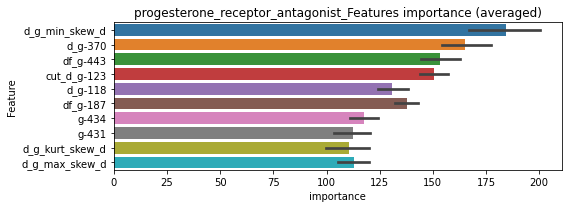

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000267887	valid_1's binary_logloss: 0.000652794


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953


Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000263939	valid_1's binary_logloss: 0.000915315


================================= fold 3/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952


Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000273948	valid_1's binary_logloss: 0.00055424


================================= fold 4/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


progesterone_receptor_antagonist logloss: 0.0009546801190595227


Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000276211	valid_1's binary_logloss: 0.00169715


prostaglandin_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000409494	valid_1's binary_logloss: 0.00539462
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000420728	valid_1's binary_logloss: 0.0141561
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00118925	valid_1's binary_logloss: 0.0214538
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000398748	valid_1's binary_logloss: 0.00375294


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0032271, Threshold: 0.0146420, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0146420, conf_0:0.01025, conf_1:0.01903
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_1: 0.0446420
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.0746420
threshold: 0.0746420, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000803904	valid_1's binary_logloss: 0.0143284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000406889	valid_1's binary_logloss: 0.00176678
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000403523	valid_1's binary_logloss: 0.00211551
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0260777, Threshold: 0.0746420, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000408588	valid_1's binary_logloss: 0.00739352


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0045203 Vs.target_rate: 0.00151
Num_p_label: 18.0, Expected: 6.0, Threshold: 0.0746420, conf_0:0.05971, conf_1:0.08957
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_1: 0.1046420
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.1346420
threshold: 0.1346420, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000467034	valid_1's binary_logloss: 0.00481321
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00041	valid_1's binary_logloss: 0.0038407
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000761023	valid_1's binary_logloss: 0.0187836
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0185647, Threshold: 0.1346420, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000432244	valid_1's binary_logloss: 0.00952587


Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0040181 Vs.target_rate: 0.00151
Num_p_label: 16.0, Expected: 6.0, Threshold: 0.1346420, conf_0:0.12118, conf_1:0.14811
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_1: 0.1646420
threshold: 0.1646420, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


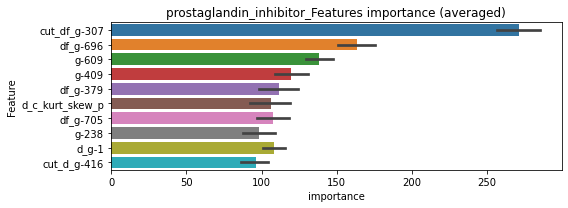

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000419464	valid_1's binary_logloss: 0.00399999


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000411303	valid_1's binary_logloss: 0.00454868


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 prostaglandin_inhibitor=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000650485	valid_1's binary_logloss: 0.0129215
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000408027	valid_1's binary_logloss: 0.00232709


prostaglandin_inhibitor logloss: 0.0059503484002416925
prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3278
target_rate: 0.0035273 → Adj_target_rate: 0.0036294


selected negative label: 3278


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00136171	valid_1's binary_logloss: 0.0520613
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.0010062	valid_1's binary_logloss: 0.0395992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000765255	valid_1's binary_logloss: 0.0323504
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000885718	valid_1's binary_logloss: 0.0317803


1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0077072, Threshold: 0.0354928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, Expected: 14.0, Threshold: 0.0354928, conf_0:0.02484, conf_1:0.04614
Num_p_label: 25.0, Expected: 14.0, Adj_threshold_1: 0.0654928
Num_p_label: 17.0, Expected: 14.0, Adj_threshold_2: 0.0954928
threshold: 0.0954928, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 649.0/3789, y_label_rate: 0.1712853
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000898656	valid_1's binary_logloss: 0.044534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000717253	valid_1's binary_logloss: 0.0290786
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00131727	valid_1's binary_logloss: 0.043775
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0293022, Threshold: 0.0954928, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00127809	valid_1's binary_logloss: 0.0226384


Remove_noisy_data: 16 → Positive_corect_labels: 641.0/3773
p_label_rate: 0.0150678 Vs.target_rate: 0.00353
Num_p_label: 60.0, Expected: 14.0, Threshold: 0.0954928, conf_0:0.07639, conf_1:0.11459
Num_p_label: 50.0, Expected: 14.0, Adj_threshold_1: 0.1254928
Num_p_label: 45.0, Expected: 14.0, Adj_threshold_2: 0.1554928
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_3: 0.1854928
Num_p_label: 37.0, Expected: 14.0, Adj_threshold_4: 0.2154928
Num_p_label: 36.0, Expected: 14.0, Adj_threshold_5: 0.2454928
Num_p_label: 34.0, Expected: 14.0, Adj_threshold_6: 0.2754928
Num_p_label: 34.0, Expected: 14.0, Adj_threshold_7: 0.3054928
Num_p_label: 30.0, Expected: 14.0, Adj_threshold_8: 0.3354928
Num_p_label: 26.0, Expected: 14.0, Adj_threshold_9: 0.3654928
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_10: 0.3954928
threshold: 0.3954928, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 641.0/3773, y_label_rate: 0.1698913
================= Pseudo labeling 3 / 3 ===============

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00078403	valid_1's binary_logloss: 0.0349538
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00124099	valid_1's binary_logloss: 0.0348159
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000637854	valid_1's binary_logloss: 0.0204702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000680242	valid_1's binary_logloss: 0.0258788


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0242031, Threshold: 0.3954928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 635.0/3761
p_label_rate: 0.0085384 Vs.target_rate: 0.00353
Num_p_label: 34.0, Expected: 14.0, Threshold: 0.3954928, conf_0:0.35594, conf_1:0.43504
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_1: 0.4254928
Num_p_label: 28.0, Expected: 14.0, Adj_threshold_2: 0.4554928
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_3: 0.4854928
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_4: 0.5154928
Num_p_label: 24.0, Expected: 14.0, Adj_threshold_5: 0.5454928
Num_p_label: 24.0, Expected: 14.0, Adj_threshold_6: 0.5754928
Num_p_label: 22.0, Expected: 14.0, Adj_threshold_7: 0.6054928
Num_p_label: 21.0, Expected: 14.0, Adj_threshold_8: 0.6354928
threshold: 0.6354928, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 635.0/3761, y_label_rate: 0.1688381


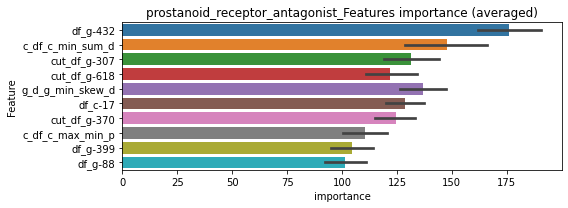

len(train_index) : 2820
len(valid_index) : 941
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2821
len(valid_index) : 940


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000966871	valid_1's binary_logloss: 0.0333032


================================= fold 2/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00081537	valid_1's binary_logloss: 0.017341


len(train_index) : 2821
len(valid_index) : 940
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000675781	valid_1's binary_logloss: 0.0224937


len(train_index) : 2821
len(valid_index) : 940
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000852138	valid_1's binary_logloss: 0.0236164


prostanoid_receptor_antagonist logloss: 0.024191006007237274


mutually exclusive columns: proteasome_inhibitor


proteasome_inhibitor, len(trt): 726, len(othr): 10229
target_rate: 0.0304863 → Adj_target_rate: 0.0226983


selected negative label: 10229


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.107014	valid_1's binary_logloss: 0.245309
Early stopping, best iteration is:
[1659]	training's binary_logloss: 0.0670245	valid_1's binary_logloss: 0.231885
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.106765	valid_1's binary_logloss: 0.240758
Early stopping, best iteration is:
[1544]	training's binary_logloss: 0.0717754	valid_1's binary_logloss: 0.228316
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.107163	valid_1's binary_logloss: 0.233747
Early stopping, best iteration is:
[1563]	training's binary_logloss: 0.0712044	valid_1's binary_logloss: 0.222589
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.108402	valid_1's binary_logloss: 0.237139
Early stopping, best iteration is:
[1964]	training's binary_logloss: 0.0572253	valid_1's binary_loglos

1 / 3, AUC score:0.898, PR-AUC:0.834
y_Threshold: 0.1246881, Threshold: 0.2133326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1338 → Positive_corect_labels: 1581/10936
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, Expected: 121.4, Threshold: 0.2133326, conf_0:0.14933, conf_1:0.27733
threshold: 0.2133326, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1581.0/10936, y_label_rate: 0.1445684
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0629418	valid_1's binary_logloss: 0.150007
[2000]	training's binary_logloss: 0.0311728	valid_1's binary_logloss: 0.126853
Early stopping, best iteration is:
[2263]	training's binary_logloss: 0.02731	valid_1's binary_logloss: 0.123592
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0632354	valid_1's binary_logloss: 0.145792
[2000]	training's binary_logloss: 0.0311819	valid_1's binary_logloss: 0.121477
Early stopping, best iteration is:
[2774]	training's binary_logloss: 0.0219588	valid_1's binary_logloss: 0.114528
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0649358	valid_1's binary_logloss: 0.130258
[2000]	training's binary_logloss: 0.0320772	valid_1's binary_logloss: 0.104019
Early stopping, best iteration is:
[2772]	training's binary_logloss: 0.0226587	valid_1's binary_logloss: 0.0963714
Tr

2 / 3, AUC score:0.987, PR-AUC:0.964
y_Threshold: 0.1090059, Threshold: 0.2133326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 282 → Positive_corect_labels: 1440.0/10654
p_label_rate: 0.0085384 Vs.target_rate: 0.03049
Num_p_label: 34.0, Expected: 121.4, Threshold: 0.2133326, conf_0:0.17067, conf_1:0.25600
threshold: 0.2133326, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 1440.0/10654, y_label_rate: 0.1351605
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0530716	valid_1's binary_logloss: 0.11368
[2000]	training's binary_logloss: 0.0260759	valid_1's binary_logloss: 0.0894472
[3000]	training's binary_logloss: 0.0169075	valid_1's binary_logloss: 0.080659
Early stopping, best iteration is:
[3714]	training's binary_logloss: 0.0134398	valid_1's binary_logloss: 0.077331
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0525153	valid_1's binary_logloss: 0.122077
[2000]	training's binary_logloss: 0.0257593	valid_1's binary_logloss: 0.0977243
[3000]	training's binary_logloss: 0.0167191	valid_1's binary_logloss: 0.0897174
Early stopping, best iteration is:
[3010]	training's binary_logloss: 0.0166647	valid_1's binary_logloss: 0.0896459
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0536432	valid_1's binary_logloss: 0.11458
[2000]	training's binary_logloss: 

3 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.0988233, Threshold: 0.2133326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 1373.0/10520
p_label_rate: 0.0102963 Vs.target_rate: 0.03049
Num_p_label: 41.0, Expected: 121.4, Threshold: 0.2133326, conf_0:0.19200, conf_1:0.23467
threshold: 0.2133326, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 1373.0/10520, y_label_rate: 0.1305133


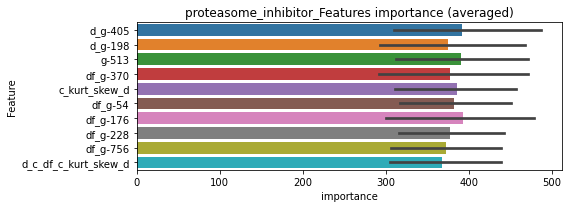

len(train_index) : 7890
len(valid_index) : 2630
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0522971	valid_1's binary_logloss: 0.104483
[2000]	training's binary_logloss: 0.0262058	valid_1's binary_logloss: 0.079491
[3000]	training's binary_logloss: 0.0171386	valid_1's binary_logloss: 0.0703568
Early stopping, best iteration is:
[3490]	training's binary_logloss: 0.0145866	valid_1's binary_logloss: 0.0674272


len(train_index) : 7890
len(valid_index) : 2630
================================= fold 2/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.051277	valid_1's binary_logloss: 0.112978
[2000]	training's binary_logloss: 0.0255844	valid_1's binary_logloss: 0.0900828
[3000]	training's binary_logloss: 0.0167566	valid_1's binary_logloss: 0.0823861
Early stopping, best iteration is:
[3580]	training's binary_logloss: 0.0139235	valid_1's binary_logloss: 0.0797056


len(train_index) : 7890
len(valid_index) : 2630
================================= fold 3/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0531101	valid_1's binary_logloss: 0.0988792
[2000]	training's binary_logloss: 0.026548	valid_1's binary_logloss: 0.0749641
[3000]	training's binary_logloss: 0.0173965	valid_1's binary_logloss: 0.0663065
[4000]	training's binary_logloss: 0.012871	valid_1's binary_logloss: 0.0615176
Early stopping, best iteration is:
[4731]	training's binary_logloss: 0.0108148	valid_1's binary_logloss: 0.0593568


len(train_index) : 7890
len(valid_index) : 2630
================================= fold 4/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0520017	valid_1's binary_logloss: 0.104691
[2000]	training's binary_logloss: 0.0261064	valid_1's binary_logloss: 0.0803795
[3000]	training's binary_logloss: 0.0170888	valid_1's binary_logloss: 0.0709099
[4000]	training's binary_logloss: 0.0126543	valid_1's binary_logloss: 0.0664708
Early stopping, best iteration is:
[4276]	training's binary_logloss: 0.0117912	valid_1's binary_logloss: 0.065549


proteasome_inhibitor logloss: 0.06800964380419039
proteasome_inhibitor is unpredictable(><)!
protein_kinase_inhibitor, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000491676	valid_1's binary_logloss: 0.0174223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.00050961	valid_1's binary_logloss: 0.0117172
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000523487	valid_1's binary_logloss: 0.00583239
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00058109	valid_1's binary_logloss: 0.0154698


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039932, Threshold: 0.0096547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0096547, conf_0:0.00676, conf_1:0.01255
Num_p_label: 2.0, Expected: 8.0, Adj_threshold_1: 0.0396547
threshold: 0.0396547, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000469603	valid_1's binary_logloss: 0.0151766
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00052394	valid_1's binary_logloss: 0.0102765
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000494301	valid_1's binary_logloss: 0.00459526
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000666029	valid_1's binary_logloss: 0.01562


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0162039, Threshold: 0.0396547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0040181 Vs.target_rate: 0.00202
Num_p_label: 16.0, Expected: 8.0, Threshold: 0.0396547, conf_0:0.03172, conf_1:0.04759
threshold: 0.0396547, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000513262	valid_1's binary_logloss: 0.0142952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.00049938	valid_1's binary_logloss: 0.00446279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000488633	valid_1's binary_logloss: 0.00284595
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000509717	valid_1's binary_logloss: 0.0103807


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0390119, Threshold: 0.0396547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0037670 Vs.target_rate: 0.00202
Num_p_label: 15.0, Expected: 8.0, Threshold: 0.0396547, conf_0:0.03569, conf_1:0.04362
threshold: 0.0396547, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


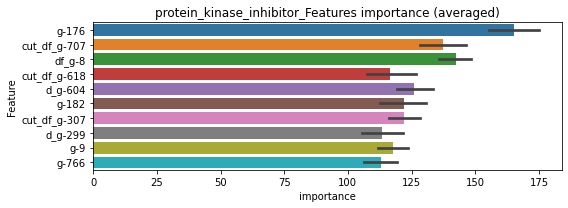

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000493391	valid_1's binary_logloss: 0.0122486


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000503822	valid_1's binary_logloss: 0.00538097


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000486245	valid_1's binary_logloss: 0.00306476
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000486258	valid_1's binary_logloss: 0.00306455


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000595066	valid_1's binary_logloss: 0.0109189


protein_kinase_inhibitor logloss: 0.007904643444722019
protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00033932	valid_1's binary_logloss: 0.00348367
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000327376	valid_1's binary_logloss: 0.00299297
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000327845	valid_1's binary_logloss: 0.000816911
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016429, Threshold: 0.0051329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0051329, conf_0:0.00359, conf_1:0.00667
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_1: 0.0351329


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000340892	valid_1's binary_logloss: 0.00255995


threshold: 0.0351329, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000328766	valid_1's binary_logloss: 0.00388957
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000319584	valid_1's binary_logloss: 0.00273147
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000319803	valid_1's binary_logloss: 0.000957946
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0346806, Threshold: 0.0351329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0351329, conf_0:0.02811, conf_1:0.04216
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0651329


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000321117	valid_1's binary_logloss: 0.00222883


threshold: 0.0651329, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000328766	valid_1's binary_logloss: 0.00388957
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000319584	valid_1's binary_logloss: 0.00273147
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000319803	valid_1's binary_logloss: 0.000957946
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0346806, Threshold: 0.0651329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, Expected: 4.0, Threshold: 0.0651329, conf_0:0.05862, conf_1:0.07165


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000321117	valid_1's binary_logloss: 0.00222883


threshold: 0.0651329, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


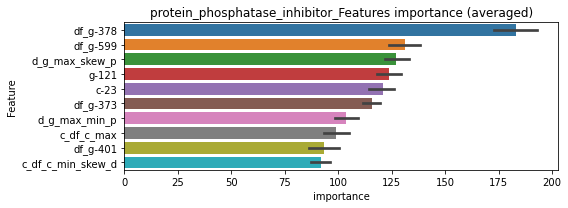

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000317951	valid_1's binary_logloss: 0.00342657
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000317444	valid_1's binary_logloss: 0.003423


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000326498	valid_1's binary_logloss: 0.00205364


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000328667	valid_1's binary_logloss: 0.000922425


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


protein_phosphatase_inhibitor logloss: 0.002396749285680122


Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000374456	valid_1's binary_logloss: 0.0031834


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3273
target_rate: 0.0043252 → Adj_target_rate: 0.0043163


selected negative label: 3273


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0518625	valid_1's binary_logloss: 0.120705
[2000]	training's binary_logloss: 0.0263093	valid_1's binary_logloss: 0.102767
[3000]	training's binary_logloss: 0.0173258	valid_1's binary_logloss: 0.0966502
Early stopping, best iteration is:
[3002]	training's binary_logloss: 0.0173142	valid_1's binary_logloss: 0.0966196
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0530084	valid_1's binary_logloss: 0.11491
[2000]	training's binary_logloss: 0.0266673	valid_1's binary_logloss: 0.0951819
Early stopping, best iteration is:
[2637]	training's binary_logloss: 0.0200021	valid_1's binary_logloss: 0.0898082
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0556765	valid_1's binary_logloss: 0.0964126
[2000]	training's binary_logloss: 0.0282443	valid_1's binary_logloss: 0.0727645
[3000]	training's binary_loglos

1 / 3, AUC score:0.992, PR-AUC:0.983
y_Threshold: 0.0501826, Threshold: 0.1260888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 634/3755
p_label_rate: 0.0100452 Vs.target_rate: 0.00433
Num_p_label: 40.0, Expected: 17.2, Threshold: 0.1260888, conf_0:0.08826, conf_1:0.16392
Num_p_label: 29.0, Expected: 17.2, Adj_threshold_1: 0.1560888
Num_p_label: 24.0, Expected: 17.2, Adj_threshold_2: 0.1860888
threshold: 0.1860888, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 634.0/3755, y_label_rate: 0.1688415
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0482212	valid_1's binary_logloss: 0.0913394
[2000]	training's binary_logloss: 0.0243097	valid_1's binary_logloss: 0.0677904
[3000]	training's binary_logloss: 0.0160126	valid_1's binary_logloss: 0.0590932
[4000]	training's binary_logloss: 0.0118858	valid_1's binary_logloss: 0.0543965
[5000]	training's binary_logloss: 0.00946073	valid_1's binary_logloss: 0.0514625
Early stopping, best iteration is:
[5061]	training's binary_logloss: 0.00934284	valid_1's binary_logloss: 0.0512489
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0476466	valid_1's binary_logloss: 0.101602
[2000]	training's binary_logloss: 0.0239757	valid_1's binary_logloss: 0.0805386
[3000]	training's binary_logloss: 0.0157991	valid_1's binary_logloss: 0.0738343
[4000]	training's binary_logloss: 0.0117656	valid_1's binary_logloss: 0.0704933
Early stopping, best iteration is:
[4152]	

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0677554, Threshold: 0.1860888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 616.0/3719
p_label_rate: 0.0072828 Vs.target_rate: 0.00433
Num_p_label: 29.0, Expected: 17.2, Threshold: 0.1860888, conf_0:0.14887, conf_1:0.22331
Num_p_label: 22.0, Expected: 17.2, Adj_threshold_1: 0.2160888
threshold: 0.2160888, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 616.0/3719, y_label_rate: 0.1656359
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0433269	valid_1's binary_logloss: 0.0935661
[2000]	training's binary_logloss: 0.021824	valid_1's binary_logloss: 0.0740388
[3000]	training's binary_logloss: 0.0144173	valid_1's binary_logloss: 0.0669664
Early stopping, best iteration is:
[3445]	training's binary_logloss: 0.0125391	valid_1's binary_logloss: 0.0652656
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0437578	valid_1's binary_logloss: 0.0880547
[2000]	training's binary_logloss: 0.0220862	valid_1's binary_logloss: 0.06721
[3000]	training's binary_logloss: 0.0146002	valid_1's binary_logloss: 0.0596281
[4000]	training's binary_logloss: 0.0108594	valid_1's binary_logloss: 0.0555735
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.0104291	valid_1's binary_logloss: 0.0551029
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_loglo

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0600931, Threshold: 0.2160888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 607.0/3701
p_label_rate: 0.0060271 Vs.target_rate: 0.00433
Num_p_label: 24.0, Expected: 17.2, Threshold: 0.2160888, conf_0:0.19448, conf_1:0.23770
threshold: 0.2160888, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 607.0/3701, y_label_rate: 0.1640097


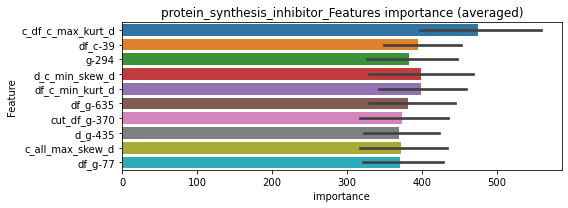

len(train_index) : 2775
len(valid_index) : 926
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0465645	valid_1's binary_logloss: 0.0891698
[2000]	training's binary_logloss: 0.0237445	valid_1's binary_logloss: 0.0648931
[3000]	training's binary_logloss: 0.0157738	valid_1's binary_logloss: 0.0558552
[4000]	training's binary_logloss: 0.011813	valid_1's binary_logloss: 0.0512281
[5000]	training's binary_logloss: 0.00945343	valid_1's binary_logloss: 0.0484187
[6000]	training's binary_logloss: 0.00788079	valid_1's binary_logloss: 0.046272
[7000]	training's binary_logloss: 0.00677239	valid_1's binary_logloss: 0.0448952
Early stopping, best iteration is:
[7052]	training's binary_logloss: 0.00672201	valid_1's binary_logloss: 0.0448168


len(train_index) : 2776
len(valid_index) : 925
================================= fold 2/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0459279	valid_1's binary_logloss: 0.0872884
[2000]	training's binary_logloss: 0.0235705	valid_1's binary_logloss: 0.0632965
[3000]	training's binary_logloss: 0.0156923	valid_1's binary_logloss: 0.0538186
[4000]	training's binary_logloss: 0.0117029	valid_1's binary_logloss: 0.0487274
[5000]	training's binary_logloss: 0.00937398	valid_1's binary_logloss: 0.0456569
[6000]	training's binary_logloss: 0.00780848	valid_1's binary_logloss: 0.0433707
[7000]	training's binary_logloss: 0.00670674	valid_1's binary_logloss: 0.0417693
Early stopping, best iteration is:
[7889]	training's binary_logloss: 0.00596379	valid_1's binary_logloss: 0.0405825


len(train_index) : 2776
len(valid_index) : 925
================================= fold 3/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0469682	valid_1's binary_logloss: 0.0788436
[2000]	training's binary_logloss: 0.023862	valid_1's binary_logloss: 0.0574619
[3000]	training's binary_logloss: 0.0158738	valid_1's binary_logloss: 0.0496282
[4000]	training's binary_logloss: 0.0118661	valid_1's binary_logloss: 0.0455552
[5000]	training's binary_logloss: 0.00950694	valid_1's binary_logloss: 0.0432035
[6000]	training's binary_logloss: 0.0079204	valid_1's binary_logloss: 0.0414394
Early stopping, best iteration is:
[6862]	training's binary_logloss: 0.00693859	valid_1's binary_logloss: 0.0403578


len(train_index) : 2776
len(valid_index) : 925
================================= fold 4/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0445463	valid_1's binary_logloss: 0.0862254
[2000]	training's binary_logloss: 0.0227429	valid_1's binary_logloss: 0.066446
[3000]	training's binary_logloss: 0.015145	valid_1's binary_logloss: 0.0590798
[4000]	training's binary_logloss: 0.0113344	valid_1's binary_logloss: 0.055232
[5000]	training's binary_logloss: 0.0091011	valid_1's binary_logloss: 0.0530489
[6000]	training's binary_logloss: 0.00759819	valid_1's binary_logloss: 0.051357
Early stopping, best iteration is:
[6671]	training's binary_logloss: 0.00684204	valid_1's binary_logloss: 0.0506187


protein_synthesis_inhibitor logloss: 0.04409412051341675
protein_synthesis_inhibitor is unpredictable(><)!
protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000319232	valid_1's binary_logloss: 0.00183819
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000311157	valid_1's binary_logloss: 0.00410234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000306367	valid_1's binary_logloss: 0.000725335
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014579, Threshold: 0.0050326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00030434	valid_1's binary_logloss: 0.000916248


p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0050326, conf_0:0.00352, conf_1:0.00654
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0350326
threshold: 0.0350326, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000312393	valid_1's binary_logloss: 0.00181928
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000295313	valid_1's binary_logloss: 0.00385181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000299687	valid_1's binary_logloss: 0.000581033
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0240301, Threshold: 0.0350326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, Expected: 3.2, Threshold: 0.0350326, conf_0:0.02803, conf_1:0.04204


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000297634	valid_1's binary_logloss: 0.000687171


threshold: 0.0350326, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000312393	valid_1's binary_logloss: 0.00181928
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000295313	valid_1's binary_logloss: 0.00385181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000299687	valid_1's binary_logloss: 0.000581033
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0240301, Threshold: 0.0350326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, Expected: 3.2, Threshold: 0.0350326, conf_0:0.03153, conf_1:0.03854


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000297634	valid_1's binary_logloss: 0.000687171


threshold: 0.0350326, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


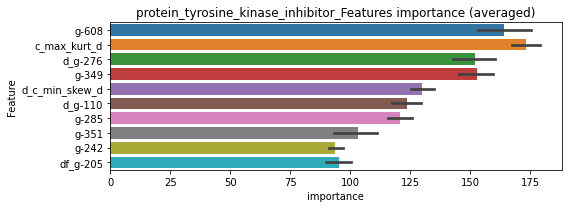

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000303712	valid_1's binary_logloss: 0.00184906


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000324842	valid_1's binary_logloss: 0.00307554
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000300696	valid_1's binary_logloss: 0.000570766
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000300696	valid_1's binary_logloss: 0.000570766


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000295861	valid_1's binary_logloss: 0.000666286


protein_tyrosine_kinase_inhibitor logloss: 0.0015405056811311347
radiopaque_medium, len(trt): 56, len(othr): 3282
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000579168	valid_1's binary_logloss: 0.0221115
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000556911	valid_1's binary_logloss: 0.0083508
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000557115	valid_1's binary_logloss: 0.00396741
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000551139	valid_1's binary_logloss: 0.0131059


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0050874, Threshold: 0.0126784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0126784, conf_0:0.00887, conf_1:0.01648
Num_p_label: 6.0, Expected: 9.4, Adj_threshold_1: 0.0426784
threshold: 0.0426784, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000564801	valid_1's binary_logloss: 0.021631
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000565573	valid_1's binary_logloss: 0.00735881
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.00056168	valid_1's binary_logloss: 0.00366455
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00054118	valid_1's binary_logloss: 0.0117699


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0258194, Threshold: 0.0426784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0040181 Vs.target_rate: 0.00235
Num_p_label: 16.0, Expected: 9.4, Threshold: 0.0426784, conf_0:0.03414, conf_1:0.05121
threshold: 0.0426784, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.0011398	valid_1's binary_logloss: 0.0263916
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000574396	valid_1's binary_logloss: 0.00972992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000548322	valid_1's binary_logloss: 0.0154136
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.00055656	valid_1's binary_logloss: 0.00887168


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0280362, Threshold: 0.0426784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0047715 Vs.target_rate: 0.00235
Num_p_label: 19.0, Expected: 9.4, Threshold: 0.0426784, conf_0:0.03841, conf_1:0.04695
threshold: 0.0426784, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 652.0/3798, y_label_rate: 0.1716693


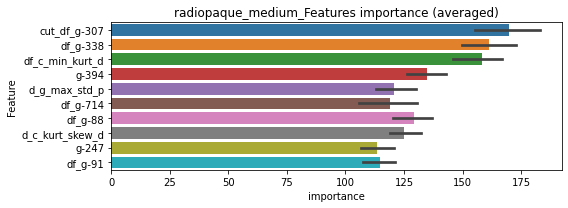

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000589193	valid_1's binary_logloss: 0.0101


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000543479	valid_1's binary_logloss: 0.0105856


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000542081	valid_1's binary_logloss: 0.00577422
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000539843	valid_1's binary_logloss: 0.00576104


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds


radiopaque_medium logloss: 0.01071430160772403


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00098609	valid_1's binary_logloss: 0.0164086


raf_inhibitor, len(trt): 223, len(othr): 3258
target_rate: 0.0093642 → Adj_target_rate: 0.0083226


selected negative label: 3258


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0980485	valid_1's binary_logloss: 0.2449
Early stopping, best iteration is:
[1813]	training's binary_logloss: 0.0561343	valid_1's binary_logloss: 0.224404
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0980292	valid_1's binary_logloss: 0.242418
[2000]	training's binary_logloss: 0.0511211	valid_1's binary_logloss: 0.216564
[3000]	training's binary_logloss: 0.0336178	valid_1's binary_logloss: 0.208626
Early stopping, best iteration is:
[2971]	training's binary_logloss: 0.0339404	valid_1's binary_logloss: 0.208426
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.100533	valid_1's binary_logloss: 0.220772
Early stopping, best iteration is:
[1914]	training's binary_logloss: 0.0545642	valid_1's binary_logloss: 0.19371
Training until validation scores don't improve for 30 rounds
[1000]	training's binar

1 / 3, AUC score:0.929, PR-AUC:0.880
y_Threshold: 0.1174414, Threshold: 0.4365229, pos_neg_ratio: 0.8000000
Remove_noisy_data: 363 → Positive_corect_labels: 535/3546
p_label_rate: 0.0100452 Vs.target_rate: 0.00936
Num_p_label: 40.0, Expected: 37.3, Threshold: 0.4365229, conf_0:0.30557, conf_1:0.56748
threshold: 0.4365229, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 535.0/3546, y_label_rate: 0.1508742
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0701869	valid_1's binary_logloss: 0.167243
[2000]	training's binary_logloss: 0.0354083	valid_1's binary_logloss: 0.136706
[3000]	training's binary_logloss: 0.0233196	valid_1's binary_logloss: 0.125481
Early stopping, best iteration is:
[3047]	training's binary_logloss: 0.0229356	valid_1's binary_logloss: 0.125075
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0730793	valid_1's binary_logloss: 0.15465
[2000]	training's binary_logloss: 0.0369883	valid_1's binary_logloss: 0.120676
[3000]	training's binary_logloss: 0.0243687	valid_1's binary_logloss: 0.107593
Early stopping, best iteration is:
[3606]	training's binary_logloss: 0.020159	valid_1's binary_logloss: 0.102746
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0726405	valid_1's binary_logloss: 0.144661
[2000]	training's binary_logloss: 0.03

2 / 3, AUC score:0.992, PR-AUC:0.977
y_Threshold: 0.1323993, Threshold: 0.4365229, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 502.0/3480
p_label_rate: 0.0268709 Vs.target_rate: 0.00936
Num_p_label: 107.0, Expected: 37.3, Threshold: 0.4365229, conf_0:0.34922, conf_1:0.52383
Num_p_label: 101.0, Expected: 37.3, Adj_threshold_1: 0.4665229
Num_p_label: 100.0, Expected: 37.3, Adj_threshold_2: 0.4965229
Num_p_label: 94.0, Expected: 37.3, Adj_threshold_3: 0.5265229
Num_p_label: 90.0, Expected: 37.3, Adj_threshold_4: 0.5565229
Num_p_label: 86.0, Expected: 37.3, Adj_threshold_5: 0.5865229
Num_p_label: 83.0, Expected: 37.3, Adj_threshold_6: 0.6165229
Num_p_label: 72.0, Expected: 37.3, Adj_threshold_7: 0.6465229
Num_p_label: 63.0, Expected: 37.3, Adj_threshold_8: 0.6765229
Num_p_label: 56.0, Expected: 37.3, Adj_threshold_9: 0.7065229
Num_p_label: 43.0, Expected: 37.3, Adj_threshold_10: 0.7365229
threshold: 0.7365229, positive_p_label: 43.0/3982, p_label_rate: 0.010798

Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0651125	valid_1's binary_logloss: 0.145016
[2000]	training's binary_logloss: 0.0323385	valid_1's binary_logloss: 0.114001
[3000]	training's binary_logloss: 0.0213357	valid_1's binary_logloss: 0.102136
Early stopping, best iteration is:
[3250]	training's binary_logloss: 0.0196074	valid_1's binary_logloss: 0.0998925
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0650935	valid_1's binary_logloss: 0.145589
[2000]	training's binary_logloss: 0.032459	valid_1's binary_logloss: 0.114365
Early stopping, best iteration is:
[2889]	training's binary_logloss: 0.0222233	valid_1's binary_logloss: 0.104577
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0641839	valid_1's binary_logloss: 0.148907
[2000]	training's binary_logloss: 0.0319392	valid_1's binary_logloss: 0.116154
[3000]	training's binary_logloss: 0.

3 / 3, AUC score:0.993, PR-AUC:0.981
y_Threshold: 0.1354890, Threshold: 0.7365229, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 474.0/3424
p_label_rate: 0.0236062 Vs.target_rate: 0.00936
Num_p_label: 94.0, Expected: 37.3, Threshold: 0.7365229, conf_0:0.66287, conf_1:0.81018
Num_p_label: 86.0, Expected: 37.3, Adj_threshold_1: 0.7665229
Num_p_label: 77.0, Expected: 37.3, Adj_threshold_2: 0.7965229
Num_p_label: 66.0, Expected: 37.3, Adj_threshold_3: 0.8265229
Num_p_label: 42.0, Expected: 37.3, Adj_threshold_4: 0.8565229
threshold: 0.8565229, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 474.0/3424, y_label_rate: 0.1384346


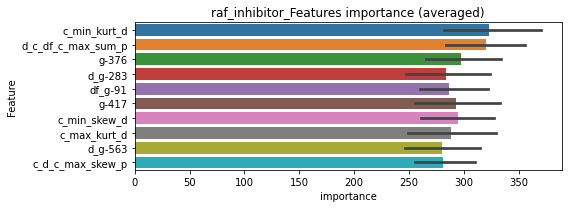

len(train_index) : 2568
len(valid_index) : 856
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0638681	valid_1's binary_logloss: 0.149775
[2000]	training's binary_logloss: 0.0322252	valid_1's binary_logloss: 0.118746
[3000]	training's binary_logloss: 0.021288	valid_1's binary_logloss: 0.107232
[4000]	training's binary_logloss: 0.0158861	valid_1's binary_logloss: 0.101521
Early stopping, best iteration is:
[4048]	training's binary_logloss: 0.0156962	valid_1's binary_logloss: 0.101318


len(train_index) : 2568
len(valid_index) : 856
================================= fold 2/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0664265	valid_1's binary_logloss: 0.130057
[2000]	training's binary_logloss: 0.033502	valid_1's binary_logloss: 0.0980464
[3000]	training's binary_logloss: 0.0221843	valid_1's binary_logloss: 0.0860347
[4000]	training's binary_logloss: 0.016529	valid_1's binary_logloss: 0.0799148
[5000]	training's binary_logloss: 0.0131649	valid_1's binary_logloss: 0.0758732
Early stopping, best iteration is:
[5371]	training's binary_logloss: 0.0122496	valid_1's binary_logloss: 0.074783


len(train_index) : 2568
len(valid_index) : 856
================================= fold 3/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.064622	valid_1's binary_logloss: 0.133139
[2000]	training's binary_logloss: 0.0328317	valid_1's binary_logloss: 0.0998071
[3000]	training's binary_logloss: 0.0217772	valid_1's binary_logloss: 0.0866793
[4000]	training's binary_logloss: 0.0162554	valid_1's binary_logloss: 0.0794008
[5000]	training's binary_logloss: 0.0129707	valid_1's binary_logloss: 0.0746026
Early stopping, best iteration is:
[5626]	training's binary_logloss: 0.0115272	valid_1's binary_logloss: 0.0722855


len(train_index) : 2568
len(valid_index) : 856
================================= fold 4/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0660496	valid_1's binary_logloss: 0.131272
[2000]	training's binary_logloss: 0.0334203	valid_1's binary_logloss: 0.0958404
[3000]	training's binary_logloss: 0.0221149	valid_1's binary_logloss: 0.0820834
[4000]	training's binary_logloss: 0.0165	valid_1's binary_logloss: 0.0747624
[5000]	training's binary_logloss: 0.0131295	valid_1's binary_logloss: 0.0699529
[6000]	training's binary_logloss: 0.0109348	valid_1's binary_logloss: 0.066681
[7000]	training's binary_logloss: 0.00937809	valid_1's binary_logloss: 0.0644815
Early stopping, best iteration is:
[7142]	training's binary_logloss: 0.00919155	valid_1's binary_logloss: 0.0641658


raf_inhibitor logloss: 0.0781379710892352
raf_inhibitor is unpredictable(><)!
ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000241248	valid_1's binary_logloss: 0.00174213
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000247485	valid_1's binary_logloss: 0.000999958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000235575	valid_1's binary_logloss: 0.00113212
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009881, Threshold: 0.0110296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0110296, conf_0:0.00772, conf_1:0.01434
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0410296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_2: 0.0710296
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_3: 0.1010296
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.1310296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.1610296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_6: 0.1910296
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.2210296
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_8: 0.2510296


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000244599	valid_1's binary_logloss: 0.00128497


threshold: 0.2510296, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000222637	valid_1's binary_logloss: 0.00177364
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000224124	valid_1's binary_logloss: 0.000631028
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000217751	valid_1's binary_logloss: 0.000311324
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0526686, Threshold: 0.2510296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00050
Num_p_label: 19.0, Expected: 2.0, Threshold: 0.2510296, conf_0:0.20082, conf_1:0.30124
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_1: 0.2810296
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_2: 0.3110296
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_3: 0.3410296
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_4: 0.3710296
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_5: 0.4010296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_6: 0.4310296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_7: 0.4610296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_8: 0.4910296
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_9: 0.5210296
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_10: 0.5510296


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000224528	valid_1's binary_logloss: 0.0028682


threshold: 0.5510296, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000222637	valid_1's binary_logloss: 0.00177364
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000224124	valid_1's binary_logloss: 0.000631028
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000217751	valid_1's binary_logloss: 0.000311324
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0526686, Threshold: 0.5510296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00050
Num_p_label: 8.0, Expected: 2.0, Threshold: 0.5510296, conf_0:0.49593, conf_1:0.60613
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.5810296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.6110296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.6410296
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.6710296
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.7010296
threshold: 0.7010296, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000224528	valid_1's binary_logloss: 0.0028682


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


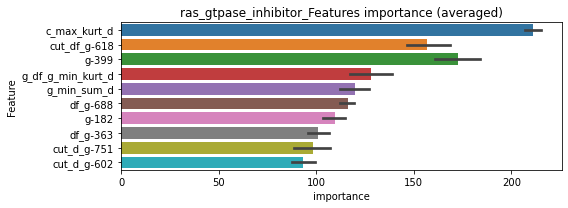

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000221793	valid_1's binary_logloss: 0.000961658
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000221093	valid_1's binary_logloss: 0.000560931
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ras_gtpase_inhibitor=================================


[1000]	training's binary_logloss: 0.000218179	valid_1's binary_logloss: 0.000357093
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000218179	valid_1's binary_logloss: 0.000357093
Training until validation scores don't improve for 30 rounds


ras_gtpase_inhibitor logloss: 0.00080761302378241


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000227136	valid_1's binary_logloss: 0.00135031


retinoid_receptor_agonist, len(trt): 67, len(othr): 3277
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3277


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000600013	valid_1's binary_logloss: 0.0199899
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000591521	valid_1's binary_logloss: 0.0124193
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00120843	valid_1's binary_logloss: 0.0268694
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.00070928	valid_1's binary_logloss: 0.019116


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0079338, Threshold: 0.1120765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.1120765, conf_0:0.07845, conf_1:0.14570
Num_p_label: 37.0, Expected: 11.2, Adj_threshold_1: 0.1420765
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_2: 0.1720765
Num_p_label: 31.0, Expected: 11.2, Adj_threshold_3: 0.2020765
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_4: 0.2320765
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_5: 0.2620765
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_6: 0.2920765
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_7: 0.3220765
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_8: 0.3520765
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_9: 0.3820765
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_10: 0.4120765
threshold: 0.4120765, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000568118	valid_1's binary_logloss: 0.012655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.00056491	valid_1's binary_logloss: 0.0124414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000819545	valid_1's binary_logloss: 0.022134
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000613118	valid_1's binary_logloss: 0.0154896


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0573141, Threshold: 0.4120765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3786
p_label_rate: 0.0067805 Vs.target_rate: 0.00281
Num_p_label: 27.0, Expected: 11.2, Threshold: 0.4120765, conf_0:0.32966, conf_1:0.49449
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_1: 0.4420765
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_2: 0.4720765
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_3: 0.5020765
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_4: 0.5320765
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_5: 0.5620765
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_6: 0.5920765
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_7: 0.6220765
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_8: 0.6520765
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_9: 0.6820765
threshold: 0.6820765, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3786, y_label_rate: 0.1711569
===========

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000578602	valid_1's binary_logloss: 0.0150932
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000560712	valid_1's binary_logloss: 0.00858464
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000558078	valid_1's binary_logloss: 0.00988236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000588664	valid_1's binary_logloss: 0.0205978


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509075, Threshold: 0.6820765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 646.0/3782
p_label_rate: 0.0040181 Vs.target_rate: 0.00281
Num_p_label: 16.0, Expected: 11.2, Threshold: 0.6820765, conf_0:0.61387, conf_1:0.75028
threshold: 0.6820765, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3782, y_label_rate: 0.1708091


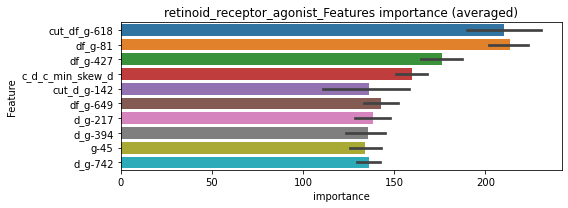

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2836
len(valid_index) : 946


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000823011	valid_1's binary_logloss: 0.0172137


================================= fold 2/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000638855	valid_1's binary_logloss: 0.0116034


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000735229	valid_1's binary_logloss: 0.0152572


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000557902	valid_1's binary_logloss: 0.0128442
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000562813	valid_1's binary_logloss: 0.012837


retinoid_receptor_agonist logloss: 0.01422790916358012
retinoid_receptor_antagonist, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000158996	valid_1's binary_logloss: 0.0002558
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000153993	valid_1's binary_logloss: 0.00118872
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000157251	valid_1's binary_logloss: 0.00019166
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004254, Threshold: 0.0018458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0018458, conf_0:0.00129, conf_1:0.00240
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0318458
threshold: 0.0318458, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000157616	valid_1's binary_logloss: 0.00019353


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000145828	valid_1's binary_logloss: 0.000197993
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000145722	valid_1's binary_logloss: 0.000818692
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000144298	valid_1's binary_logloss: 0.0001582
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0993328, Threshold: 0.0318458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00025
Num_p_label: 11.0, Expected: 1.0, Threshold: 0.0318458, conf_0:0.02548, conf_1:0.03821
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0618458
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0918458
threshold: 0.0918458, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000145643	valid_1's binary_logloss: 0.000188183


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000145828	valid_1's binary_logloss: 0.000197993
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000145722	valid_1's binary_logloss: 0.000818692
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000144298	valid_1's binary_logloss: 0.0001582
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0993328, Threshold: 0.0918458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.0918458, conf_0:0.08266, conf_1:0.10103
threshold: 0.0918458, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000145643	valid_1's binary_logloss: 0.000188183


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


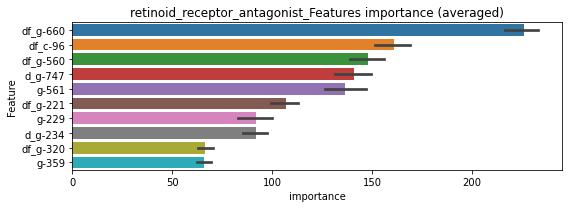

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00015086	valid_1's binary_logloss: 0.000204671


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1215]	training's binary_logloss: 0.000148034	valid_1's binary_logloss: 0.000201582
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149936	valid_1's binary_logloss: 0.000336083


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1150]	training's binary_logloss: 0.000147451	valid_1's binary_logloss: 0.000331931
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150277	valid_1's binary_logloss: 0.000167362


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1198]	training's binary_logloss: 0.000147129	valid_1's binary_logloss: 0.00016394
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149814	valid_1's binary_logloss: 0.000197534
Early stopping, best iteration is:
[1198]	training's binary_logloss: 0.000146523	valid_1's binary_logloss: 0.00019342


retinoid_receptor_antagonist logloss: 0.00022271283326585052
rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3284
target_rate: 0.0014697 → Adj_target_rate: 0.0017245


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000386481	valid_1's binary_logloss: 0.00556873
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000390844	valid_1's binary_logloss: 0.00220317
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000401822	valid_1's binary_logloss: 0.00156343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000402581	valid_1's binary_logloss: 0.00728983


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027323, Threshold: 0.0088430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00147
Num_p_label: 40.0, Expected: 5.9, Threshold: 0.0088430, conf_0:0.00619, conf_1:0.01150
Num_p_label: 8.0, Expected: 5.9, Adj_threshold_1: 0.0388430
threshold: 0.0388430, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000406353	valid_1's binary_logloss: 0.00464897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000381412	valid_1's binary_logloss: 0.00188253
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000378645	valid_1's binary_logloss: 0.00137419
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0524811, Threshold: 0.0388430, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000388802	valid_1's binary_logloss: 0.00802916


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0045203 Vs.target_rate: 0.00147
Num_p_label: 18.0, Expected: 5.9, Threshold: 0.0388430, conf_0:0.03107, conf_1:0.04661
Num_p_label: 10.0, Expected: 5.9, Adj_threshold_1: 0.0688430
threshold: 0.0688430, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000406353	valid_1's binary_logloss: 0.00464897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000381412	valid_1's binary_logloss: 0.00188253
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000378645	valid_1's binary_logloss: 0.00137419
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0524811, Threshold: 0.0688430, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000388802	valid_1's binary_logloss: 0.00802916


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00147
Num_p_label: 10.0, Expected: 5.9, Threshold: 0.0688430, conf_0:0.06196, conf_1:0.07573
threshold: 0.0688430, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


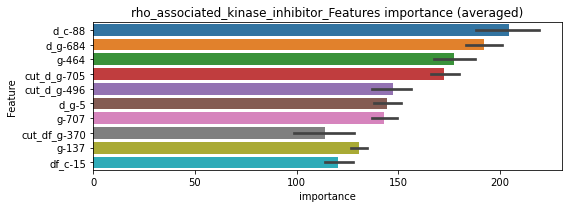

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000443649	valid_1's binary_logloss: 0.00472694


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000387845	valid_1's binary_logloss: 0.00205123
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000388025	valid_1's binary_logloss: 0.00204981


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000392353	valid_1's binary_logloss: 0.00169302
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000392353	valid_1's binary_logloss: 0.00169302


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000417958	valid_1's binary_logloss: 0.00740796


rho_associated_kinase_inhibitor logloss: 0.003969788163542875
ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000435251	valid_1's binary_logloss: 0.00511967
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000433463	valid_1's binary_logloss: 0.0154395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000428876	valid_1's binary_logloss: 0.00324159
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000440358	valid_1's binary_logloss: 0.00648012


y_Threshold: 0.0042396, Threshold: 0.0168931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0168931, conf_0:0.01183, conf_1:0.02196
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_1: 0.0468931
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_2: 0.0768931
threshold: 0.0768931, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000402945	valid_1's binary_logloss: 0.00473002
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000426008	valid_1's binary_logloss: 0.0190255
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000414182	valid_1's binary_logloss: 0.00160877
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000425687	valid_1's binary_logloss: 0.00558066


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0312586, Threshold: 0.0768931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0080362 Vs.target_rate: 0.00155
Num_p_label: 32.0, Expected: 6.2, Threshold: 0.0768931, conf_0:0.06151, conf_1:0.09227
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_1: 0.1068931
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_2: 0.1368931
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_3: 0.1668931
threshold: 0.1668931, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000400513	valid_1's binary_logloss: 0.00631995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000439352	valid_1's binary_logloss: 0.00625045
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00040502	valid_1's binary_logloss: 0.00304631
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0442352, Threshold: 0.1668931, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000408874	valid_1's binary_logloss: 0.013205


Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3805
p_label_rate: 0.0042692 Vs.target_rate: 0.00155
Num_p_label: 17.0, Expected: 6.2, Threshold: 0.1668931, conf_0:0.15020, conf_1:0.18358
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_1: 0.1968931
threshold: 0.1968931, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3805, y_label_rate: 0.1718791


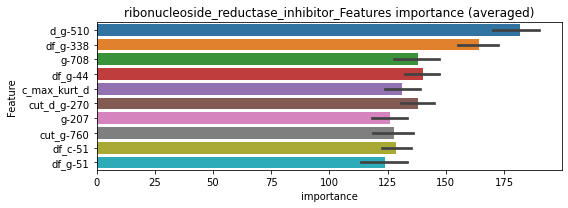

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000402549	valid_1's binary_logloss: 0.00231908


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000418729	valid_1's binary_logloss: 0.00225364


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000407754	valid_1's binary_logloss: 0.00437841


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000439685	valid_1's binary_logloss: 0.0103358


ribonucleoside_reductase_inhibitor logloss: 0.004821203826306415
rna_polymerase_inhibitor, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000354943	valid_1's binary_logloss: 0.00148762
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00033819	valid_1's binary_logloss: 0.00385745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000345819	valid_1's binary_logloss: 0.000897793
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000354238	valid_1's binary_logloss: 0.000996872


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020960, Threshold: 0.0057738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0057738, conf_0:0.00404, conf_1:0.00751
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_1: 0.0357738
threshold: 0.0357738, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000335057	valid_1's binary_logloss: 0.00150299
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000330474	valid_1's binary_logloss: 0.00306161
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000339309	valid_1's binary_logloss: 0.000812289
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1006882, Threshold: 0.0357738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0047715 Vs.target_rate: 0.00105
Num_p_label: 19.0, Expected: 4.2, Threshold: 0.0357738, conf_0:0.02862, conf_1:0.04293
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_1: 0.0657738
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_2: 0.0957738


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000341008	valid_1's binary_logloss: 0.000792369


threshold: 0.0957738, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000335057	valid_1's binary_logloss: 0.00150299
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000330474	valid_1's binary_logloss: 0.00306161
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000339309	valid_1's binary_logloss: 0.000812289
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1006882, Threshold: 0.0957738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, Expected: 4.2, Threshold: 0.0957738, conf_0:0.08620, conf_1:0.10535


Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000341008	valid_1's binary_logloss: 0.000792369


threshold: 0.0957738, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


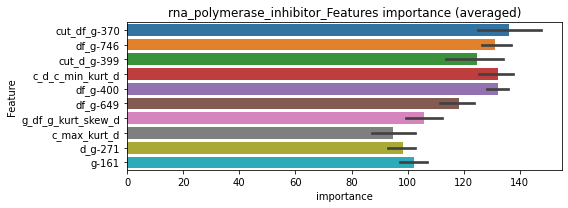

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000348768	valid_1's binary_logloss: 0.00137485


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858


Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000348446	valid_1's binary_logloss: 0.00249289


len(valid_index) : 952
================================= fold 3/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000344233	valid_1's binary_logloss: 0.000846718


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000341533	valid_1's binary_logloss: 0.000768076


rna_polymerase_inhibitor logloss: 0.0013709289075839973


mutually exclusive columns: serotonin_receptor_agonist


serotonin_receptor_agonist, len(trt): 236, len(othr): 5845
target_rate: 0.0099101 → Adj_target_rate: 0.0087332


selected negative label: 5845


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0654611	valid_1's binary_logloss: 0.136779
[2000]	training's binary_logloss: 0.0330822	valid_1's binary_logloss: 0.122126
Early stopping, best iteration is:
[2754]	training's binary_logloss: 0.0234171	valid_1's binary_logloss: 0.117873
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0634435	valid_1's binary_logloss: 0.151346
[2000]	training's binary_logloss: 0.032375	valid_1's binary_logloss: 0.137945
Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.0294864	valid_1's binary_logloss: 0.136795
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0657927	valid_1's binary_logloss: 0.135081
[2000]	training's binary_logloss: 0.0331915	valid_1's binary_logloss: 0.119572
Early stopping, best iteration is:
[2550]	training's binary_logloss: 0.0256195	valid_1's binary_logloss: 0.11594
Tra

1 / 3, AUC score:0.971, PR-AUC:0.946
y_Threshold: 0.0687834, Threshold: 0.1309375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 432 → Positive_corect_labels: 1070/6582
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, Expected: 39.5, Threshold: 0.1309375, conf_0:0.09166, conf_1:0.17022
threshold: 0.1309375, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1070.0/6582, y_label_rate: 0.1625646
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0472073	valid_1's binary_logloss: 0.0877764
[2000]	training's binary_logloss: 0.023557	valid_1's binary_logloss: 0.0707476
[3000]	training's binary_logloss: 0.0153954	valid_1's binary_logloss: 0.0648029
Early stopping, best iteration is:
[3610]	training's binary_logloss: 0.0126729	valid_1's binary_logloss: 0.0627876
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0458926	valid_1's binary_logloss: 0.101601
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0242524	valid_1's binary_logloss: 0.0870968
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0463335	valid_1's binary_logloss: 0.0972824
[2000]	training's binary_logloss: 0.0234211	valid_1's binary_logloss: 0.0809515
[3000]	training's binary_logloss: 0.0154296	valid_1's binary_logloss: 0.0754747
Early stopping, best iteratio

2 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.0879576, Threshold: 0.1309375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 116 → Positive_corect_labels: 1012.0/6466
p_label_rate: 0.0155701 Vs.target_rate: 0.00991
Num_p_label: 62.0, Expected: 39.5, Threshold: 0.1309375, conf_0:0.10475, conf_1:0.15713
Num_p_label: 40.0, Expected: 39.5, Adj_threshold_1: 0.1609375
threshold: 0.1609375, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1012.0/6466, y_label_rate: 0.1565110
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0377238	valid_1's binary_logloss: 0.0706909
[2000]	training's binary_logloss: 0.0188772	valid_1's binary_logloss: 0.0547611
[3000]	training's binary_logloss: 0.0124177	valid_1's binary_logloss: 0.0492903
Early stopping, best iteration is:
[3581]	training's binary_logloss: 0.0103272	valid_1's binary_logloss: 0.0475285
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0375335	valid_1's binary_logloss: 0.0697807
[2000]	training's binary_logloss: 0.0188814	valid_1's binary_logloss: 0.0536208
[3000]	training's binary_logloss: 0.0124542	valid_1's binary_logloss: 0.0478059
[4000]	training's binary_logloss: 0.00926181	valid_1's binary_logloss: 0.0449993
Early stopping, best iteration is:
[4162]	training's binary_logloss: 0.00890144	valid_1's binary_logloss: 0.0445887
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0813840, Threshold: 0.1609375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 991.0/6424
p_label_rate: 0.0140633 Vs.target_rate: 0.00991
Num_p_label: 56.0, Expected: 39.5, Threshold: 0.1609375, conf_0:0.14484, conf_1:0.17703
threshold: 0.1609375, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 991.0/6424, y_label_rate: 0.1542653


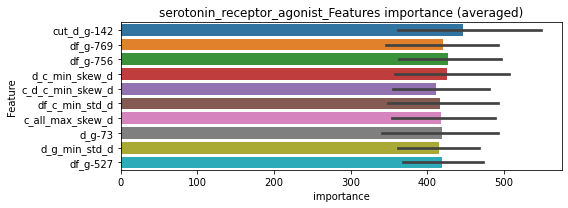

len(train_index) : 4818
len(valid_index) : 1606
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.036665	valid_1's binary_logloss: 0.0596583
[2000]	training's binary_logloss: 0.0187922	valid_1's binary_logloss: 0.0437879
[3000]	training's binary_logloss: 0.0125196	valid_1's binary_logloss: 0.0380209
[4000]	training's binary_logloss: 0.00935858	valid_1's binary_logloss: 0.0350512
[5000]	training's binary_logloss: 0.0074674	valid_1's binary_logloss: 0.0333692
Early stopping, best iteration is:
[4999]	training's binary_logloss: 0.00746876	valid_1's binary_logloss: 0.0333661


len(train_index) : 4818
len(valid_index) : 1606
================================= fold 2/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0374026	valid_1's binary_logloss: 0.0601675
[2000]	training's binary_logloss: 0.0191228	valid_1's binary_logloss: 0.0439369
[3000]	training's binary_logloss: 0.0127156	valid_1's binary_logloss: 0.0380534
[4000]	training's binary_logloss: 0.00948936	valid_1's binary_logloss: 0.0349832
[5000]	training's binary_logloss: 0.00756073	valid_1's binary_logloss: 0.033057
[6000]	training's binary_logloss: 0.00629504	valid_1's binary_logloss: 0.0318422
Early stopping, best iteration is:
[6868]	training's binary_logloss: 0.00550028	valid_1's binary_logloss: 0.0310882


len(train_index) : 4818
len(valid_index) : 1606
================================= fold 3/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0362325	valid_1's binary_logloss: 0.0673437
[2000]	training's binary_logloss: 0.0182833	valid_1's binary_logloss: 0.0502226
[3000]	training's binary_logloss: 0.0121663	valid_1's binary_logloss: 0.0440153
[4000]	training's binary_logloss: 0.00910321	valid_1's binary_logloss: 0.040805
Early stopping, best iteration is:
[4743]	training's binary_logloss: 0.00766219	valid_1's binary_logloss: 0.0392733


len(train_index) : 4818
len(valid_index) : 1606
================================= fold 4/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0366833	valid_1's binary_logloss: 0.0660094
[2000]	training's binary_logloss: 0.0186656	valid_1's binary_logloss: 0.0479094
[3000]	training's binary_logloss: 0.0123887	valid_1's binary_logloss: 0.0411845
[4000]	training's binary_logloss: 0.00923972	valid_1's binary_logloss: 0.0374539
Early stopping, best iteration is:
[4275]	training's binary_logloss: 0.00864784	valid_1's binary_logloss: 0.0368306


serotonin_receptor_agonist logloss: 0.035139520279532745
serotonin_receptor_agonist is unpredictable(><)!


mutually exclusive columns: serotonin_receptor_antagonist


serotonin_receptor_antagonist, len(trt): 404, len(othr): 6767
target_rate: 0.0169648 → Adj_target_rate: 0.0137918


selected negative label: 6767


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0894691	valid_1's binary_logloss: 0.216275
Early stopping, best iteration is:
[1579]	training's binary_logloss: 0.058135	valid_1's binary_logloss: 0.200291
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0889146	valid_1's binary_logloss: 0.21423
[2000]	training's binary_logloss: 0.0451453	valid_1's binary_logloss: 0.193927
Early stopping, best iteration is:
[1995]	training's binary_logloss: 0.0452617	valid_1's binary_logloss: 0.193828
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0922145	valid_1's binary_logloss: 0.197346
[2000]	training's binary_logloss: 0.0469804	valid_1's binary_logloss: 0.174285
Early stopping, best iteration is:
[2059]	training's binary_logloss: 0.0455557	valid_1's binary_logloss: 0.173455
Training until validation scores don't improve for 30 rounds
[1000]	training's bin

1 / 3, AUC score:0.939, PR-AUC:0.892
y_Threshold: 0.1187352, Threshold: 0.2265483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 689 → Positive_corect_labels: 1144/7431
p_label_rate: 0.0100452 Vs.target_rate: 0.01696
Num_p_label: 40.0, Expected: 67.6, Threshold: 0.2265483, conf_0:0.15858, conf_1:0.29451
threshold: 0.2265483, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1144.0/7431, y_label_rate: 0.1539497
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.063624	valid_1's binary_logloss: 0.132776
[2000]	training's binary_logloss: 0.0316402	valid_1's binary_logloss: 0.105007
[3000]	training's binary_logloss: 0.0206158	valid_1's binary_logloss: 0.0954743
Early stopping, best iteration is:
[3235]	training's binary_logloss: 0.0190309	valid_1's binary_logloss: 0.0941493
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0624731	valid_1's binary_logloss: 0.138091
[2000]	training's binary_logloss: 0.0310753	valid_1's binary_logloss: 0.112609
Early stopping, best iteration is:
[2560]	training's binary_logloss: 0.0238964	valid_1's binary_logloss: 0.106644
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0630727	valid_1's binary_logloss: 0.134465
[2000]	training's binary_logloss: 0.0312926	valid_1's binary_logloss: 0.108506
[3000]	training's binary_logloss: 0

2 / 3, AUC score:0.993, PR-AUC:0.980
y_Threshold: 0.1266115, Threshold: 0.2265483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 1059.0/7261
p_label_rate: 0.0118031 Vs.target_rate: 0.01696
Num_p_label: 47.0, Expected: 67.6, Threshold: 0.2265483, conf_0:0.18124, conf_1:0.27186
threshold: 0.2265483, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 1059.0/7261, y_label_rate: 0.1458477
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0549377	valid_1's binary_logloss: 0.108382
[2000]	training's binary_logloss: 0.0272558	valid_1's binary_logloss: 0.0841948
[3000]	training's binary_logloss: 0.0177455	valid_1's binary_logloss: 0.0756778
Early stopping, best iteration is:
[3608]	training's binary_logloss: 0.0145916	valid_1's binary_logloss: 0.072824
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0534787	valid_1's binary_logloss: 0.123862
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0278978	valid_1's binary_logloss: 0.102192
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0543102	valid_1's binary_logloss: 0.118488
[2000]	training's binary_logloss: 0.0267368	valid_1's binary_logloss: 0.0952602
Early stopping, best iteration is:
[2494]	training's binary_logloss: 0.0211741	valid_1's binary_logloss: 0.08976

3 / 3, AUC score:0.995, PR-AUC:0.986
y_Threshold: 0.1178256, Threshold: 0.2265483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 94 → Positive_corect_labels: 1012.0/7167
p_label_rate: 0.0130588 Vs.target_rate: 0.01696
Num_p_label: 52.0, Expected: 67.6, Threshold: 0.2265483, conf_0:0.20389, conf_1:0.24920
threshold: 0.2265483, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 1012.0/7167, y_label_rate: 0.1412027


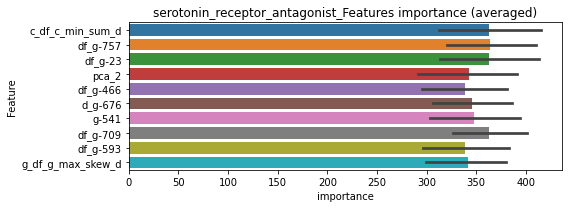

len(train_index) : 5375
len(valid_index) : 1792
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0533557	valid_1's binary_logloss: 0.102762
[2000]	training's binary_logloss: 0.0270483	valid_1's binary_logloss: 0.0763281
[3000]	training's binary_logloss: 0.0178613	valid_1's binary_logloss: 0.0664003
[4000]	training's binary_logloss: 0.0133196	valid_1's binary_logloss: 0.0611713
[5000]	training's binary_logloss: 0.0106585	valid_1's binary_logloss: 0.0578386
Early stopping, best iteration is:
[5773]	training's binary_logloss: 0.00921626	valid_1's binary_logloss: 0.0561003


len(train_index) : 5375
len(valid_index) : 1792
================================= fold 2/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0526243	valid_1's binary_logloss: 0.108078
[2000]	training's binary_logloss: 0.0266188	valid_1's binary_logloss: 0.0832806
[3000]	training's binary_logloss: 0.0176416	valid_1's binary_logloss: 0.0745044
Early stopping, best iteration is:
[3651]	training's binary_logloss: 0.0144325	valid_1's binary_logloss: 0.0709572


len(train_index) : 5375
len(valid_index) : 1792
================================= fold 3/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0528512	valid_1's binary_logloss: 0.109191
[2000]	training's binary_logloss: 0.0268019	valid_1's binary_logloss: 0.0845649
[3000]	training's binary_logloss: 0.017699	valid_1's binary_logloss: 0.0756044
Early stopping, best iteration is:
[3086]	training's binary_logloss: 0.0171825	valid_1's binary_logloss: 0.0750033


len(train_index) : 5376
len(valid_index) : 1791
================================= fold 4/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0539657	valid_1's binary_logloss: 0.0993646
[2000]	training's binary_logloss: 0.0273861	valid_1's binary_logloss: 0.0748724
[3000]	training's binary_logloss: 0.0180535	valid_1's binary_logloss: 0.0660223
[4000]	training's binary_logloss: 0.0134183	valid_1's binary_logloss: 0.0614599
Early stopping, best iteration is:
[4024]	training's binary_logloss: 0.0133375	valid_1's binary_logloss: 0.0613589


serotonin_receptor_antagonist logloss: 0.06585554926462481
serotonin_receptor_antagonist is unpredictable(><)!
serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285
target_rate: 0.0018477 → Adj_target_rate: 0.0020948


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000481631	valid_1's binary_logloss: 0.0139622
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000481793	valid_1's binary_logloss: 0.0176506
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000480233	valid_1's binary_logloss: 0.00588243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000471486	valid_1's binary_logloss: 0.0163946


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030273, Threshold: 0.0328197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185
Num_p_label: 40.0, Expected: 7.4, Threshold: 0.0328197, conf_0:0.02297, conf_1:0.04267
Num_p_label: 22.0, Expected: 7.4, Adj_threshold_1: 0.0628197
Num_p_label: 16.0, Expected: 7.4, Adj_threshold_2: 0.0928197
threshold: 0.0928197, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000480925	valid_1's binary_logloss: 0.0129391
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000535192	valid_1's binary_logloss: 0.0182474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000493064	valid_1's binary_logloss: 0.00651777
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0341137, Threshold: 0.0928197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 653.0/3802


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000513819	valid_1's binary_logloss: 0.0170887


p_label_rate: 0.0198393 Vs.target_rate: 0.00185
Num_p_label: 79.0, Expected: 7.4, Threshold: 0.0928197, conf_0:0.07426, conf_1:0.11138
Num_p_label: 67.0, Expected: 7.4, Adj_threshold_1: 0.1228197
Num_p_label: 58.0, Expected: 7.4, Adj_threshold_2: 0.1528197
Num_p_label: 47.0, Expected: 7.4, Adj_threshold_3: 0.1828197
Num_p_label: 44.0, Expected: 7.4, Adj_threshold_4: 0.2128197
Num_p_label: 40.0, Expected: 7.4, Adj_threshold_5: 0.2428197
Num_p_label: 36.0, Expected: 7.4, Adj_threshold_6: 0.2728197
Num_p_label: 33.0, Expected: 7.4, Adj_threshold_7: 0.3028197
Num_p_label: 30.0, Expected: 7.4, Adj_threshold_8: 0.3328197
Num_p_label: 28.0, Expected: 7.4, Adj_threshold_9: 0.3628197
Num_p_label: 23.0, Expected: 7.4, Adj_threshold_10: 0.3928197
threshold: 0.3928197, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000485023	valid_1's binary_logloss: 0.0162296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.0004572	valid_1's binary_logloss: 0.0113446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000465141	valid_1's binary_logloss: 0.0128431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000481083	valid_1's binary_logloss: 0.00472428


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0250144, Threshold: 0.3928197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0080362 Vs.target_rate: 0.00185
Num_p_label: 32.0, Expected: 7.4, Threshold: 0.3928197, conf_0:0.35354, conf_1:0.43210
Num_p_label: 28.0, Expected: 7.4, Adj_threshold_1: 0.4228197
Num_p_label: 26.0, Expected: 7.4, Adj_threshold_2: 0.4528197
Num_p_label: 24.0, Expected: 7.4, Adj_threshold_3: 0.4828197
Num_p_label: 21.0, Expected: 7.4, Adj_threshold_4: 0.5128197
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_5: 0.5428197
threshold: 0.5428197, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


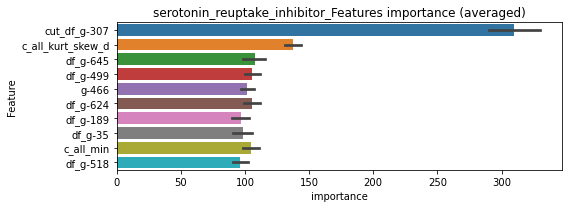

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000524844	valid_1's binary_logloss: 0.0130789


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.00048702	valid_1's binary_logloss: 0.0125242


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000472147	valid_1's binary_logloss: 0.011366


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000504594	valid_1's binary_logloss: 0.00483977


serotonin_reuptake_inhibitor logloss: 0.010453465777037289
sigma_receptor_agonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000401039	valid_1's binary_logloss: 0.00710632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000417287	valid_1's binary_logloss: 0.0181088
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000423317	valid_1's binary_logloss: 0.00355157
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000403025	valid_1's binary_logloss: 0.00330737


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023838, Threshold: 0.0316626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0316626, conf_0:0.02216, conf_1:0.04116
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_1: 0.0616626
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.0916626
threshold: 0.0916626, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000396152	valid_1's binary_logloss: 0.00534393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000387288	valid_1's binary_logloss: 0.0168173
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000410211	valid_1's binary_logloss: 0.00311375
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000398856	valid_1's binary_logloss: 0.00303131


y_Threshold: 0.0234161, Threshold: 0.0916626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0105475 Vs.target_rate: 0.00151
Num_p_label: 42.0, Expected: 6.0, Threshold: 0.0916626, conf_0:0.07333, conf_1:0.11000
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_1: 0.1216626
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_2: 0.1516626
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_3: 0.1816626
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_4: 0.2116626
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_5: 0.2416626
threshold: 0.2416626, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000404784	valid_1's binary_logloss: 0.0143452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000411384	valid_1's binary_logloss: 0.00449857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000407545	valid_1's binary_logloss: 0.00216446
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0242347, Threshold: 0.2416626, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000389809	valid_1's binary_logloss: 0.0107854


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.2416626, conf_0:0.21750, conf_1:0.26583
threshold: 0.2416626, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


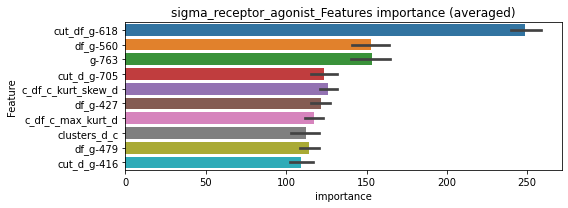

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 sigma_receptor_agonist=================================


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000512765	valid_1's binary_logloss: 0.0123604
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.00039947	valid_1's binary_logloss: 0.00555644


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000420071	valid_1's binary_logloss: 0.00145783


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


sigma_receptor_agonist logloss: 0.008062151004063753


Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000465854	valid_1's binary_logloss: 0.012874


sigma_receptor_antagonist, len(trt): 36, len(othr): 3279
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3279


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000438156	valid_1's binary_logloss: 0.00994236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000436789	valid_1's binary_logloss: 0.00881885
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000424891	valid_1's binary_logloss: 0.00417025
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000437351	valid_1's binary_logloss: 0.00454057


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029876, Threshold: 0.0092375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0092375, conf_0:0.00647, conf_1:0.01201
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_1: 0.0392375
threshold: 0.0392375, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000430604	valid_1's binary_logloss: 0.00881255
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000452593	valid_1's binary_logloss: 0.00834402
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000422723	valid_1's binary_logloss: 0.00463718
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238457, Threshold: 0.0392375, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000470779	valid_1's binary_logloss: 0.00419329


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0392375, conf_0:0.03139, conf_1:0.04708
threshold: 0.0392375, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000430604	valid_1's binary_logloss: 0.00881255
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000452593	valid_1's binary_logloss: 0.00834402
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000422723	valid_1's binary_logloss: 0.00463718
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238457, Threshold: 0.0392375, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000470779	valid_1's binary_logloss: 0.00419329


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0392375, conf_0:0.03531, conf_1:0.04316
threshold: 0.0392375, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


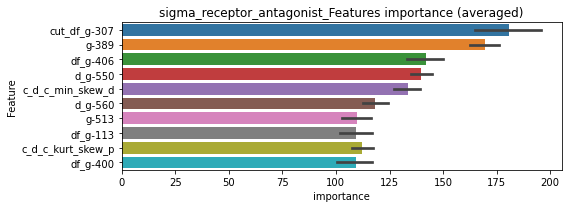

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000449565	valid_1's binary_logloss: 0.00705404


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 sigma_receptor_antagonist=================================


Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000523007	valid_1's binary_logloss: 0.00746496
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000436063	valid_1's binary_logloss: 0.00478701


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000434138	valid_1's binary_logloss: 0.00445575


sigma_receptor_antagonist logloss: 0.005941130432914317
smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000331594	valid_1's binary_logloss: 0.00147418
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000321768	valid_1's binary_logloss: 0.00633852
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000331626	valid_1's binary_logloss: 0.000684224
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016507, Threshold: 0.0050948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000330593	valid_1's binary_logloss: 0.000934356


p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0050948, conf_0:0.00357, conf_1:0.00662
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0350948
threshold: 0.0350948, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000322281	valid_1's binary_logloss: 0.00126933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000312741	valid_1's binary_logloss: 0.00552611
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000323645	valid_1's binary_logloss: 0.000631628
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0244381, Threshold: 0.0350948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00105
Num_p_label: 1.0, Expected: 4.2, Threshold: 0.0350948, conf_0:0.02808, conf_1:0.04211


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.0003252	valid_1's binary_logloss: 0.00091613


threshold: 0.0350948, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000322281	valid_1's binary_logloss: 0.00126933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000312741	valid_1's binary_logloss: 0.00552611
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000323645	valid_1's binary_logloss: 0.000631628
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0244381, Threshold: 0.0350948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00105
Num_p_label: 1.0, Expected: 4.2, Threshold: 0.0350948, conf_0:0.03159, conf_1:0.03860


Early stopping, best iteration is:
[603]	training's binary_logloss: 0.0003252	valid_1's binary_logloss: 0.00091613


threshold: 0.0350948, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


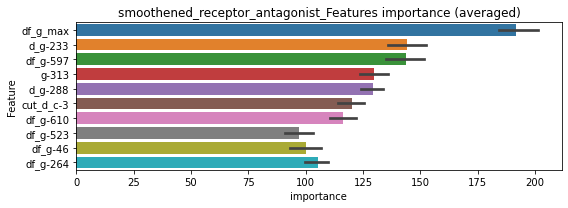

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000332341	valid_1's binary_logloss: 0.00118077


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000326285	valid_1's binary_logloss: 0.00532432


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.000329659	valid_1's binary_logloss: 0.000642009


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00032333	valid_1's binary_logloss: 0.000811505
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.00032333	valid_1's binary_logloss: 0.000811505


smoothened_receptor_antagonist logloss: 0.001990313290024979


mutually exclusive columns: sodium_channel_inhibitor


sodium_channel_inhibitor, len(trt): 267, len(othr): 6860
target_rate: 0.0112119 → Adj_target_rate: 0.0096991


selected negative label: 6860


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0632376	valid_1's binary_logloss: 0.12511
[2000]	training's binary_logloss: 0.0317749	valid_1's binary_logloss: 0.108788
[3000]	training's binary_logloss: 0.0205188	valid_1's binary_logloss: 0.102798
Early stopping, best iteration is:
[3619]	training's binary_logloss: 0.0167444	valid_1's binary_logloss: 0.100674
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0618062	valid_1's binary_logloss: 0.1425
Early stopping, best iteration is:
[1916]	training's binary_logloss: 0.0325877	valid_1's binary_logloss: 0.130279
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0633397	valid_1's binary_logloss: 0.129426
[2000]	training's binary_logloss: 0.0319486	valid_1's binary_logloss: 0.112118
Early stopping, best iteration is:
[2703]	training's binary_logloss: 0.0230865	valid_1's binary_logloss: 0.107771
Trai

1 / 3, AUC score:0.977, PR-AUC:0.951
y_Threshold: 0.0710965, Threshold: 0.1472227, pos_neg_ratio: 0.8000000
Remove_noisy_data: 495 → Positive_corect_labels: 1262/7737
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, Expected: 44.6, Threshold: 0.1472227, conf_0:0.10306, conf_1:0.19139
threshold: 0.1472227, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1262.0/7737, y_label_rate: 0.1631123
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0454338	valid_1's binary_logloss: 0.0934407
[2000]	training's binary_logloss: 0.0228194	valid_1's binary_logloss: 0.0758239
[3000]	training's binary_logloss: 0.0148924	valid_1's binary_logloss: 0.0696012
Early stopping, best iteration is:
[3610]	training's binary_logloss: 0.0121956	valid_1's binary_logloss: 0.0675672
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0456392	valid_1's binary_logloss: 0.0929518
[2000]	training's binary_logloss: 0.0228249	valid_1's binary_logloss: 0.0768952
Early stopping, best iteration is:
[2688]	training's binary_logloss: 0.0167426	valid_1's binary_logloss: 0.0726631
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0460711	valid_1's binary_logloss: 0.0858365
[2000]	training's binary_logloss: 0.0231924	valid_1's binary_logloss: 0.0705357
Early stopping, best iterat

2 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.0807897, Threshold: 0.1472227, pos_neg_ratio: 0.8000000
Remove_noisy_data: 124 → Positive_corect_labels: 1200.0/7613
p_label_rate: 0.0107986 Vs.target_rate: 0.01121
Num_p_label: 43.0, Expected: 44.6, Threshold: 0.1472227, conf_0:0.11778, conf_1:0.17667
threshold: 0.1472227, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 1200.0/7613, y_label_rate: 0.1576251
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0365143	valid_1's binary_logloss: 0.0779731
[2000]	training's binary_logloss: 0.0181663	valid_1's binary_logloss: 0.062375
[3000]	training's binary_logloss: 0.0119446	valid_1's binary_logloss: 0.0569984
Early stopping, best iteration is:
[3005]	training's binary_logloss: 0.0119221	valid_1's binary_logloss: 0.0569744
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0362054	valid_1's binary_logloss: 0.0748841
[2000]	training's binary_logloss: 0.0180577	valid_1's binary_logloss: 0.0595971
[3000]	training's binary_logloss: 0.0118796	valid_1's binary_logloss: 0.0545328
Early stopping, best iteration is:
[3046]	training's binary_logloss: 0.0116977	valid_1's binary_logloss: 0.0544144
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0378348	valid_1's binary_logloss: 0.0686361
[2000]	training's binary_log

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0807692, Threshold: 0.1472227, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 1175.0/7563
p_label_rate: 0.0092918 Vs.target_rate: 0.01121
Num_p_label: 37.0, Expected: 44.6, Threshold: 0.1472227, conf_0:0.13250, conf_1:0.16194
threshold: 0.1472227, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 1175.0/7563, y_label_rate: 0.1553616


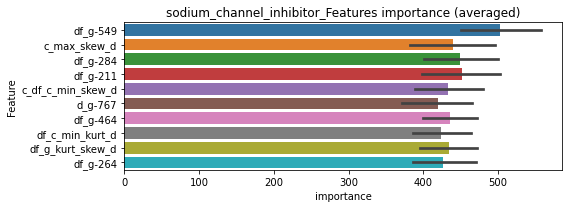

len(train_index) : 5672
len(valid_index) : 1891
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.035599	valid_1's binary_logloss: 0.0644989
[2000]	training's binary_logloss: 0.0181114	valid_1's binary_logloss: 0.0482036
[3000]	training's binary_logloss: 0.0119897	valid_1's binary_logloss: 0.0422807
[4000]	training's binary_logloss: 0.00892877	valid_1's binary_logloss: 0.0392853
Early stopping, best iteration is:
[4282]	training's binary_logloss: 0.00834307	valid_1's binary_logloss: 0.0386412


len(train_index) : 5672
len(valid_index) : 1891
================================= fold 2/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0341529	valid_1's binary_logloss: 0.0744457
[2000]	training's binary_logloss: 0.0172517	valid_1's binary_logloss: 0.0587753
[3000]	training's binary_logloss: 0.011435	valid_1's binary_logloss: 0.0534257
[4000]	training's binary_logloss: 0.00853284	valid_1's binary_logloss: 0.0506843
Early stopping, best iteration is:
[4042]	training's binary_logloss: 0.00844358	valid_1's binary_logloss: 0.0505541


len(train_index) : 5672
len(valid_index) : 1891
================================= fold 3/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.036588	valid_1's binary_logloss: 0.0585145
[2000]	training's binary_logloss: 0.0185685	valid_1's binary_logloss: 0.0421904
[3000]	training's binary_logloss: 0.0122465	valid_1's binary_logloss: 0.0359376
[4000]	training's binary_logloss: 0.00913223	valid_1's binary_logloss: 0.0328075
Early stopping, best iteration is:
[4829]	training's binary_logloss: 0.00756693	valid_1's binary_logloss: 0.031167


len(train_index) : 5673
len(valid_index) : 1890
================================= fold 4/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.036674	valid_1's binary_logloss: 0.0563802
[2000]	training's binary_logloss: 0.0186332	valid_1's binary_logloss: 0.0394531
[3000]	training's binary_logloss: 0.0123242	valid_1's binary_logloss: 0.0330991
[4000]	training's binary_logloss: 0.00918495	valid_1's binary_logloss: 0.0297521
[5000]	training's binary_logloss: 0.00733704	valid_1's binary_logloss: 0.0276888
[6000]	training's binary_logloss: 0.00610748	valid_1's binary_logloss: 0.0262816
[7000]	training's binary_logloss: 0.00523473	valid_1's binary_logloss: 0.0252731
[8000]	training's binary_logloss: 0.00458984	valid_1's binary_logloss: 0.0244853
[9000]	training's binary_logloss: 0.00409293	valid_1's binary_logloss: 0.0239084
Early stopping, best iteration is:
[9287]	training's binary_logloss: 0.00396642	valid_1's binary_logloss: 0.0237368


sodium_channel_inhibitor logloss: 0.036026379644946836
sodium_channel_inhibitor is unpredictable(><)!
sphingosine_receptor_agonist, len(trt): 32, len(othr): 3285
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000393727	valid_1's binary_logloss: 0.00582477
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000405387	valid_1's binary_logloss: 0.00561067
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000406683	valid_1's binary_logloss: 0.00446424
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022949, Threshold: 0.0062193, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000403004	valid_1's binary_logloss: 0.00249726


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0062193, conf_0:0.00435, conf_1:0.00809
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_1: 0.0362193
threshold: 0.0362193, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00040333	valid_1's binary_logloss: 0.00490738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000398468	valid_1's binary_logloss: 0.00464043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000388261	valid_1's binary_logloss: 0.00445429
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0250779, Threshold: 0.0362193, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000384674	valid_1's binary_logloss: 0.0021576


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00134
Num_p_label: 12.0, Expected: 5.4, Threshold: 0.0362193, conf_0:0.02898, conf_1:0.04346
threshold: 0.0362193, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00040333	valid_1's binary_logloss: 0.00490738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000398468	valid_1's binary_logloss: 0.00464043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000388261	valid_1's binary_logloss: 0.00445429
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000384674	valid_1's binary_logloss: 0.0021576


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0250779, Threshold: 0.0362193, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00134
Num_p_label: 12.0, Expected: 5.4, Threshold: 0.0362193, conf_0:0.03260, conf_1:0.03984
threshold: 0.0362193, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


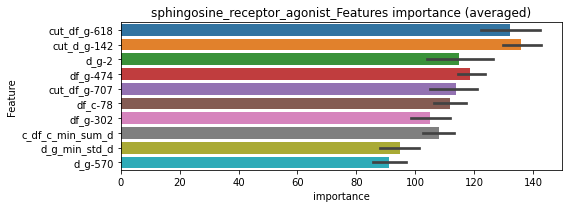

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000403368	valid_1's binary_logloss: 0.0053345


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.00039775	valid_1's binary_logloss: 0.00418013


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000402206	valid_1's binary_logloss: 0.00357358


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000408743	valid_1's binary_logloss: 0.00197148


sphingosine_receptor_agonist logloss: 0.0037654450146557767
src_inhibitor, len(trt): 71, len(othr): 3283
target_rate: 0.0029814 → Adj_target_rate: 0.0031461


selected negative label: 3283


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000838864	valid_1's binary_logloss: 0.0506197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00106538	valid_1's binary_logloss: 0.0367246
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000619879	valid_1's binary_logloss: 0.00376112
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000878765	valid_1's binary_logloss: 0.0318531


1 / 3, AUC score:0.998, PR-AUC:0.997
y_Threshold: 0.0063855, Threshold: 0.0346430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00298
Num_p_label: 40.0, Expected: 11.9, Threshold: 0.0346430, conf_0:0.02425, conf_1:0.04504
Num_p_label: 25.0, Expected: 11.9, Adj_threshold_1: 0.0646430
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_2: 0.0946430
threshold: 0.0946430, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000686419	valid_1's binary_logloss: 0.0223518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000807823	valid_1's binary_logloss: 0.0368935
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00121995	valid_1's binary_logloss: 0.021282
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000598751	valid_1's binary_logloss: 0.015597


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0237866, Threshold: 0.0946430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 649.0/3793
p_label_rate: 0.0095429 Vs.target_rate: 0.00298
Num_p_label: 38.0, Expected: 11.9, Threshold: 0.0946430, conf_0:0.07571, conf_1:0.11357
Num_p_label: 27.0, Expected: 11.9, Adj_threshold_1: 0.1246430
Num_p_label: 19.0, Expected: 11.9, Adj_threshold_2: 0.1546430
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_3: 0.1846430
threshold: 0.1846430, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 649.0/3793, y_label_rate: 0.1711047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000621069	valid_1's binary_logloss: 0.0228495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000605606	valid_1's binary_logloss: 0.0206857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000571588	valid_1's binary_logloss: 0.0163085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000554911	valid_1's binary_logloss: 0.0121343


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0197454, Threshold: 0.1846430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 647.0/3789
p_label_rate: 0.0060271 Vs.target_rate: 0.00298
Num_p_label: 24.0, Expected: 11.9, Threshold: 0.1846430, conf_0:0.16618, conf_1:0.20311
Num_p_label: 20.0, Expected: 11.9, Adj_threshold_1: 0.2146430
Num_p_label: 18.0, Expected: 11.9, Adj_threshold_2: 0.2446430
Num_p_label: 15.0, Expected: 11.9, Adj_threshold_3: 0.2746430
threshold: 0.2746430, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 647.0/3789, y_label_rate: 0.1707575


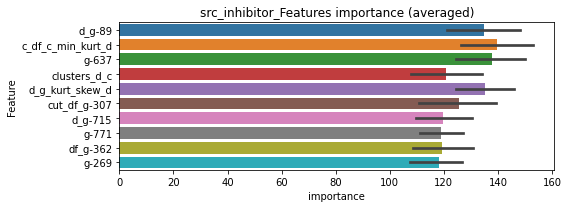

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000880843	valid_1's binary_logloss: 0.0249554


len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000575067	valid_1's binary_logloss: 0.0114388
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000580868	valid_1's binary_logloss: 0.0114302


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 947


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000874045	valid_1's binary_logloss: 0.0163411


================================= fold 4/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000644242	valid_1's binary_logloss: 0.0157698


src_inhibitor logloss: 0.017126209693802692
steroid, len(trt): 79, len(othr): 3282
target_rate: 0.0033174 → Adj_target_rate: 0.0034449


selected negative label: 3282


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000912989	valid_1's binary_logloss: 0.037644
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000796518	valid_1's binary_logloss: 0.0304979
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000896976	valid_1's binary_logloss: 0.034007
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000658237	valid_1's binary_logloss: 0.0262682


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0085797, Threshold: 0.2436510, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00332
Num_p_label: 40.0, Expected: 13.2, Threshold: 0.2436510, conf_0:0.17056, conf_1:0.31675
Num_p_label: 37.0, Expected: 13.2, Adj_threshold_1: 0.2736510
Num_p_label: 36.0, Expected: 13.2, Adj_threshold_2: 0.3036510
Num_p_label: 34.0, Expected: 13.2, Adj_threshold_3: 0.3336510
Num_p_label: 31.0, Expected: 13.2, Adj_threshold_4: 0.3636510
Num_p_label: 27.0, Expected: 13.2, Adj_threshold_5: 0.3936510
Num_p_label: 24.0, Expected: 13.2, Adj_threshold_6: 0.4236510
Num_p_label: 23.0, Expected: 13.2, Adj_threshold_7: 0.4536510
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_8: 0.4836510
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_9: 0.5136510
Num_p_label: 19.0, Expected: 13.2, Adj_threshold_10: 0.5436510
threshold: 0.5436510, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.00063434	valid_1's binary_logloss: 0.0247305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00108964	valid_1's binary_logloss: 0.0336989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000646382	valid_1's binary_logloss: 0.0276127
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000795345	valid_1's binary_logloss: 0.0354915


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0333286, Threshold: 0.5436510, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 645.0/3784
p_label_rate: 0.0110497 Vs.target_rate: 0.00332
Num_p_label: 44.0, Expected: 13.2, Threshold: 0.5436510, conf_0:0.43492, conf_1:0.65238
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_1: 0.5736510
Num_p_label: 38.0, Expected: 13.2, Adj_threshold_2: 0.6036510
Num_p_label: 35.0, Expected: 13.2, Adj_threshold_3: 0.6336510
Num_p_label: 33.0, Expected: 13.2, Adj_threshold_4: 0.6636510
Num_p_label: 30.0, Expected: 13.2, Adj_threshold_5: 0.6936510
Num_p_label: 26.0, Expected: 13.2, Adj_threshold_6: 0.7236510
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_7: 0.7536510
Num_p_label: 18.0, Expected: 13.2, Adj_threshold_8: 0.7836510
threshold: 0.7836510, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 645.0/3784, y_label_rate: 0.1704545
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000651459	valid_1's binary_logloss: 0.0230485
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000848975	valid_1's binary_logloss: 0.0264468
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00102233	valid_1's binary_logloss: 0.0369388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000610416	valid_1's binary_logloss: 0.0164532


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0431788, Threshold: 0.7836510, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 642.0/3778
p_label_rate: 0.0060271 Vs.target_rate: 0.00332
Num_p_label: 24.0, Expected: 13.2, Threshold: 0.7836510, conf_0:0.70529, conf_1:0.86202
Num_p_label: 21.0, Expected: 13.2, Adj_threshold_1: 0.8136510
Num_p_label: 17.0, Expected: 13.2, Adj_threshold_2: 0.8436510
threshold: 0.8436510, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 642.0/3778, y_label_rate: 0.1699312


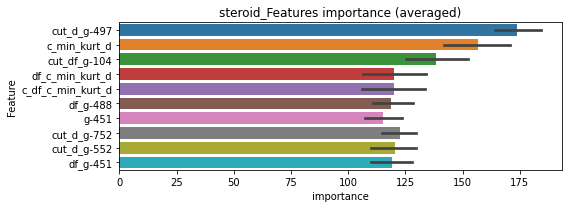

len(train_index) : 2833
len(valid_index) : 945
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000813559	valid_1's binary_logloss: 0.0238027


len(train_index) : 2833
len(valid_index) : 945
================================= fold 2/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000800818	valid_1's binary_logloss: 0.0222731


len(train_index) : 2834
len(valid_index) : 944
================================= fold 3/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000848017	valid_1's binary_logloss: 0.0147104


len(train_index) : 2834
len(valid_index) : 944
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 30 rounds


steroid logloss: 0.018967240827912582


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000970607	valid_1's binary_logloss: 0.0150742


syk_inhibitor, len(trt): 19, len(othr): 3283
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000307072	valid_1's binary_logloss: 0.00131952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000311225	valid_1's binary_logloss: 0.000831622
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000308988	valid_1's binary_logloss: 0.00075208
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015542, Threshold: 0.0049558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0049558, conf_0:0.00347, conf_1:0.00644
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_1: 0.0349558


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000310375	valid_1's binary_logloss: 0.00110023


threshold: 0.0349558, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000300119	valid_1's binary_logloss: 0.00143996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00030378	valid_1's binary_logloss: 0.000876425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000305338	valid_1's binary_logloss: 0.000615977
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1137234, Threshold: 0.0349558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0022602 Vs.target_rate: 0.00080
Num_p_label: 9.0, Expected: 3.2, Threshold: 0.0349558, conf_0:0.02796, conf_1:0.04195
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_1: 0.0649558


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000300329	valid_1's binary_logloss: 0.000838453


threshold: 0.0649558, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000300119	valid_1's binary_logloss: 0.00143996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00030378	valid_1's binary_logloss: 0.000876425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000305338	valid_1's binary_logloss: 0.000615977
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1137234, Threshold: 0.0649558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, Expected: 3.2, Threshold: 0.0649558, conf_0:0.05846, conf_1:0.07145


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000300329	valid_1's binary_logloss: 0.000838453


threshold: 0.0649558, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


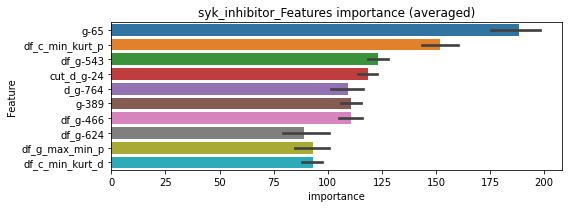

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952


Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000313468	valid_1's binary_logloss: 0.00170039


================================= fold 2/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000303489	valid_1's binary_logloss: 0.000724463


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000311866	valid_1's binary_logloss: 0.00060662


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000308148	valid_1's binary_logloss: 0.000880603


syk_inhibitor logloss: 0.0009781286658045493
tachykinin_antagonist, len(trt): 60, len(othr): 3281
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3281


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000618208	valid_1's binary_logloss: 0.0313891
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000553834	valid_1's binary_logloss: 0.0114483
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000592874	valid_1's binary_logloss: 0.00689343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000536768	valid_1's binary_logloss: 0.0130147


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0049040, Threshold: 0.0115926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0115926, conf_0:0.00811, conf_1:0.01507
Num_p_label: 5.0, Expected: 10.0, Adj_threshold_1: 0.0415926
threshold: 0.0415926, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00072263	valid_1's binary_logloss: 0.0290511
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000539828	valid_1's binary_logloss: 0.0117722
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000550692	valid_1's binary_logloss: 0.00627124
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000559881	valid_1's binary_logloss: 0.0132225


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0266480, Threshold: 0.0415926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00252
Num_p_label: 12.0, Expected: 10.0, Threshold: 0.0415926, conf_0:0.03327, conf_1:0.04991
threshold: 0.0415926, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000539358	valid_1's binary_logloss: 0.0102648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000595693	valid_1's binary_logloss: 0.0163228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000855582	valid_1's binary_logloss: 0.0183694
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000616268	valid_1's binary_logloss: 0.0248208


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0173614, Threshold: 0.0415926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0040181 Vs.target_rate: 0.00252
Num_p_label: 16.0, Expected: 10.0, Threshold: 0.0415926, conf_0:0.03743, conf_1:0.04575
Num_p_label: 6.0, Expected: 10.0, Adj_threshold_1: 0.0715926
threshold: 0.0715926, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 651.0/3795, y_label_rate: 0.1715415


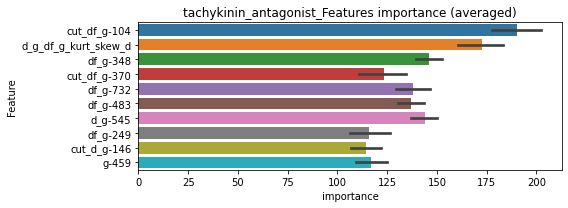

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000826987	valid_1's binary_logloss: 0.0237758


================================= fold 2/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00071668	valid_1's binary_logloss: 0.0158448


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000564517	valid_1's binary_logloss: 0.00830474


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds


tachykinin_antagonist logloss: 0.020253536498969934


Early stopping, best iteration is:
[276]	training's binary_logloss: 0.00183078	valid_1's binary_logloss: 0.0331024


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3286
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000401371	valid_1's binary_logloss: 0.002557
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000412444	valid_1's binary_logloss: 0.00260742
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000406982	valid_1's binary_logloss: 0.00122322
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027181, Threshold: 0.0074640, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000436245	valid_1's binary_logloss: 0.005378


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0074640, conf_0:0.00522, conf_1:0.00970
Num_p_label: 2.0, Expected: 5.0, Adj_threshold_1: 0.0374640
threshold: 0.0374640, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000388229	valid_1's binary_logloss: 0.00245856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00038939	valid_1's binary_logloss: 0.00295262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000396928	valid_1's binary_logloss: 0.00115578
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0409966, Threshold: 0.0374640, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000401359	valid_1's binary_logloss: 0.00300093


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00126
Num_p_label: 8.0, Expected: 5.0, Threshold: 0.0374640, conf_0:0.02997, conf_1:0.04496
threshold: 0.0374640, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000388229	valid_1's binary_logloss: 0.00245856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00038939	valid_1's binary_logloss: 0.00295262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000396928	valid_1's binary_logloss: 0.00115578
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000401359	valid_1's binary_logloss: 0.00300093


y_Threshold: 0.0409966, Threshold: 0.0374640, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00126
Num_p_label: 8.0, Expected: 5.0, Threshold: 0.0374640, conf_0:0.03372, conf_1:0.04121
threshold: 0.0374640, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


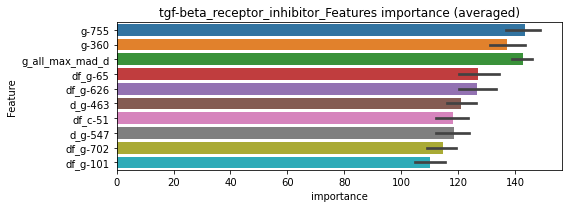

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000393962	valid_1's binary_logloss: 0.00218892
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000394395	valid_1's binary_logloss: 0.00218645


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000393776	valid_1's binary_logloss: 0.00276208
Early stopping, best iteration is:
[1098]	training's binary_logloss: 0.000386054	valid_1's binary_logloss: 0.00273341


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00039805	valid_1's binary_logloss: 0.00128658
Early stopping, best iteration is:
[1145]	training's binary_logloss: 0.000386364	valid_1's binary_logloss: 0.0012599


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


tgf-beta_receptor_inhibitor logloss: 0.00253955025808007


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000514434	valid_1's binary_logloss: 0.0039789


thrombin_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000301038	valid_1's binary_logloss: 0.00234225
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000293253	valid_1's binary_logloss: 0.00241053
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000303873	valid_1's binary_logloss: 0.0005641
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020204, Threshold: 0.0066030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0066030, conf_0:0.00462, conf_1:0.00858
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0366030


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000311886	valid_1's binary_logloss: 0.00200125


threshold: 0.0366030, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000294865	valid_1's binary_logloss: 0.00262415
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000289284	valid_1's binary_logloss: 0.00354416
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000298707	valid_1's binary_logloss: 0.000565693
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0392546, Threshold: 0.0366030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0062783 Vs.target_rate: 0.00080
Num_p_label: 25.0, Expected: 3.2, Threshold: 0.0366030, conf_0:0.02928, conf_1:0.04392
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_1: 0.0666030
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_2: 0.0966030
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_3: 0.1266030


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000295263	valid_1's binary_logloss: 0.00185475


threshold: 0.1266030, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000294865	valid_1's binary_logloss: 0.00262415
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000289284	valid_1's binary_logloss: 0.00354416
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000298707	valid_1's binary_logloss: 0.000565693
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0392546, Threshold: 0.1266030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.1266030, conf_0:0.11394, conf_1:0.13926


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000295263	valid_1's binary_logloss: 0.00185475


threshold: 0.1266030, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


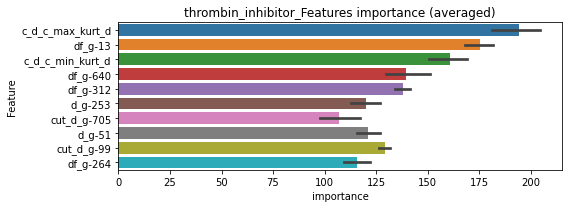

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000302041	valid_1's binary_logloss: 0.00275812


================================= fold 2/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860


Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000297073	valid_1's binary_logloss: 0.00160922


len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000301535	valid_1's binary_logloss: 0.000574741


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000296699	valid_1's binary_logloss: 0.000726284


thrombin_inhibitor logloss: 0.0014174442833900646
thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000471725	valid_1's binary_logloss: 0.00732977
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000481448	valid_1's binary_logloss: 0.00865571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000460589	valid_1's binary_logloss: 0.00180324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000451307	valid_1's binary_logloss: 0.00222276


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029208, Threshold: 0.0130184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0130184, conf_0:0.00911, conf_1:0.01692
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0430184
threshold: 0.0430184, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000451978	valid_1's binary_logloss: 0.00862687
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000449164	valid_1's binary_logloss: 0.00875352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000446147	valid_1's binary_logloss: 0.00175392
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000437782	valid_1's binary_logloss: 0.00183912


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0168215, Threshold: 0.0430184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0085384 Vs.target_rate: 0.00155
Num_p_label: 34.0, Expected: 6.2, Threshold: 0.0430184, conf_0:0.03441, conf_1:0.05162
Num_p_label: 23.0, Expected: 6.2, Adj_threshold_1: 0.0730184
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_2: 0.1030184
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_3: 0.1330184
threshold: 0.1330184, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000494984	valid_1's binary_logloss: 0.00692059
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000446966	valid_1's binary_logloss: 0.00264211
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000450866	valid_1's binary_logloss: 0.00117287
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0494331, Threshold: 0.1330184, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000487432	valid_1's binary_logloss: 0.00516442


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, Expected: 6.2, Threshold: 0.1330184, conf_0:0.11972, conf_1:0.14632
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.1630184
threshold: 0.1630184, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


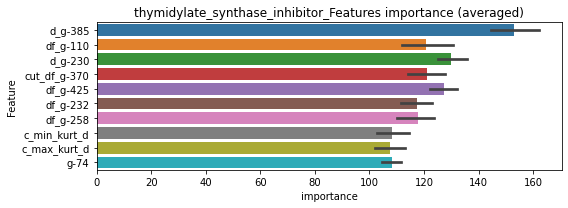

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000433478	valid_1's binary_logloss: 0.00493819


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000445826	valid_1's binary_logloss: 0.0024152


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000443751	valid_1's binary_logloss: 0.00121303


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000459042	valid_1's binary_logloss: 0.00500466


thymidylate_synthase_inhibitor logloss: 0.003392771930915893
tlr_agonist, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000365974	valid_1's binary_logloss: 0.00530838
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000397663	valid_1's binary_logloss: 0.00916575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000382388	valid_1's binary_logloss: 0.00140194
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000369072	valid_1's binary_logloss: 0.00254071


y_Threshold: 0.0024085, Threshold: 0.0129624, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0129624, conf_0:0.00907, conf_1:0.01685
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_1: 0.0429624
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.0729624
threshold: 0.0729624, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000368107	valid_1's binary_logloss: 0.00434072
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000362472	valid_1's binary_logloss: 0.00984303
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000372156	valid_1's binary_logloss: 0.000955814
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0125477, Threshold: 0.0729624, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000358823	valid_1's binary_logloss: 0.00181325


Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0060271 Vs.target_rate: 0.00126
Num_p_label: 24.0, Expected: 5.0, Threshold: 0.0729624, conf_0:0.05837, conf_1:0.08755
Num_p_label: 22.0, Expected: 5.0, Adj_threshold_1: 0.1029624
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_2: 0.1329624
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_3: 0.1629624
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_4: 0.1929624
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_5: 0.2229624
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_6: 0.2529624
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_7: 0.2829624
threshold: 0.2829624, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000360248	valid_1's binary_logloss: 0.00658326
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00036222	valid_1's binary_logloss: 0.00141892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000363256	valid_1's binary_logloss: 0.00173878
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0240388, Threshold: 0.2829624, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000351657	valid_1's binary_logloss: 0.00894083


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00126
Num_p_label: 10.0, Expected: 5.0, Threshold: 0.2829624, conf_0:0.25467, conf_1:0.31126
threshold: 0.2829624, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3808, y_label_rate: 0.1720063


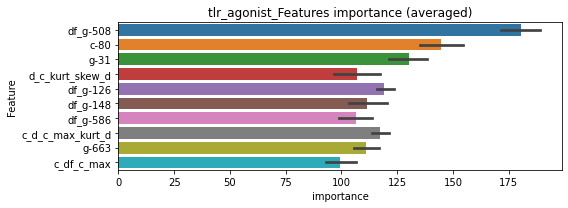

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000371351	valid_1's binary_logloss: 0.00832337


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000366021	valid_1's binary_logloss: 0.00154972


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000368771	valid_1's binary_logloss: 0.00424562


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000360424	valid_1's binary_logloss: 0.00126023


tlr_agonist logloss: 0.0038447346470094866
tlr_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000191042	valid_1's binary_logloss: 0.000265607
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000189656	valid_1's binary_logloss: 0.00105762
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000190484	valid_1's binary_logloss: 0.000240826
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005461, Threshold: 0.0010670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0010670, conf_0:0.00075, conf_1:0.00139
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.0310670
threshold: 0.0310670, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000192503	valid_1's binary_logloss: 0.000230496


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000188902	valid_1's binary_logloss: 0.000244574
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000186451	valid_1's binary_logloss: 0.000471992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000188369	valid_1's binary_logloss: 0.000226006
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1406998, Threshold: 0.0310670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.0310670, conf_0:0.02485, conf_1:0.03728
threshold: 0.0310670, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000190442	valid_1's binary_logloss: 0.00024801


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000188902	valid_1's binary_logloss: 0.000244574
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000186451	valid_1's binary_logloss: 0.000471992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000188369	valid_1's binary_logloss: 0.000226006
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1406998, Threshold: 0.0310670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.0310670, conf_0:0.02796, conf_1:0.03417
threshold: 0.0310670, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000190442	valid_1's binary_logloss: 0.00024801


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


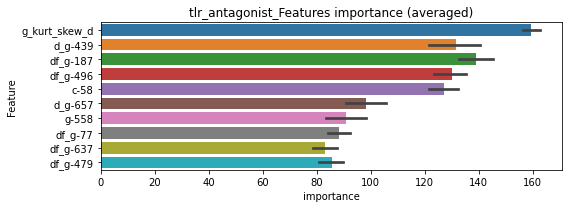

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tlr_antagonist=================================


[1000]	training's binary_logloss: 0.000185227	valid_1's binary_logloss: 0.000239481
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000185227	valid_1's binary_logloss: 0.000239481
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


[1000]	training's binary_logloss: 0.000184852	valid_1's binary_logloss: 0.000348108
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000184852	valid_1's binary_logloss: 0.000348108
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Early stopping, best iteration is:
[968]	training's binary_logloss: 0.000186941	valid_1's binary_logloss: 0.000234086
Training until validation scores don't improve for 30 rounds


tlr_antagonist logloss: 0.00026984644922422663


Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000186233	valid_1's binary_logloss: 0.000257743


tnf_inhibitor, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000442029	valid_1's binary_logloss: 0.0081001
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000462764	valid_1's binary_logloss: 0.00964053
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000441108	valid_1's binary_logloss: 0.00499116
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037332, Threshold: 0.0250028, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000456026	valid_1's binary_logloss: 0.0115059


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0250028, conf_0:0.01750, conf_1:0.03250
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_1: 0.0550028
threshold: 0.0550028, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000443701	valid_1's binary_logloss: 0.0095256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00044089	valid_1's binary_logloss: 0.011023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000447915	valid_1's binary_logloss: 0.00438607
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0428378, Threshold: 0.0550028, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000437883	valid_1's binary_logloss: 0.00895915


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0097941 Vs.target_rate: 0.00151
Num_p_label: 39.0, Expected: 6.0, Threshold: 0.0550028, conf_0:0.04400, conf_1:0.06600
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_1: 0.0850028
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.1150028
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_3: 0.1450028
threshold: 0.1450028, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000443701	valid_1's binary_logloss: 0.0095256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00044089	valid_1's binary_logloss: 0.011023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000447915	valid_1's binary_logloss: 0.00438607
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000437883	valid_1's binary_logloss: 0.00895915


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0428378, Threshold: 0.1450028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, Expected: 6.0, Threshold: 0.1450028, conf_0:0.13050, conf_1:0.15950
threshold: 0.1450028, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


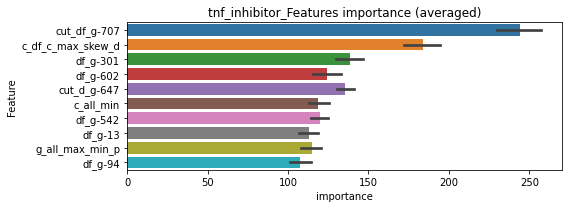

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000451777	valid_1's binary_logloss: 0.00607707


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 tnf_inhibitor=================================


Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000512998	valid_1's binary_logloss: 0.00886307
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000449742	valid_1's binary_logloss: 0.00273452


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000454998	valid_1's binary_logloss: 0.00801571


tnf_inhibitor logloss: 0.006422175411471307
topoisomerase_inhibitor, len(trt): 127, len(othr): 3276
target_rate: 0.0053330 → Adj_target_rate: 0.0051574


selected negative label: 3276


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0636194	valid_1's binary_logloss: 0.154541
[2000]	training's binary_logloss: 0.0320255	valid_1's binary_logloss: 0.127939
Early stopping, best iteration is:
[2800]	training's binary_logloss: 0.0226653	valid_1's binary_logloss: 0.120275
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0653056	valid_1's binary_logloss: 0.134879
[2000]	training's binary_logloss: 0.0326662	valid_1's binary_logloss: 0.104794
[3000]	training's binary_logloss: 0.0215045	valid_1's binary_logloss: 0.0942199
Early stopping, best iteration is:
[3614]	training's binary_logloss: 0.0177131	valid_1's binary_logloss: 0.090453
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0679604	valid_1's binary_logloss: 0.111737
[2000]	training's binary_logloss: 0.0341741	valid_1's binary_logloss: 0.0769397
[3000]	training's binary_logloss: 

1 / 3, AUC score:0.989, PR-AUC:0.975
y_Threshold: 0.0704541, Threshold: 0.2366772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 190 → Positive_corect_labels: 626/3741
p_label_rate: 0.0100452 Vs.target_rate: 0.00533
Num_p_label: 40.0, Expected: 21.2, Threshold: 0.2366772, conf_0:0.16567, conf_1:0.30768
Num_p_label: 30.0, Expected: 21.2, Adj_threshold_1: 0.2666772
threshold: 0.2666772, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 626.0/3741, y_label_rate: 0.1673349
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0570653	valid_1's binary_logloss: 0.115072
[2000]	training's binary_logloss: 0.0282553	valid_1's binary_logloss: 0.0853928
[3000]	training's binary_logloss: 0.0185492	valid_1's binary_logloss: 0.0749655
[4000]	training's binary_logloss: 0.0137835	valid_1's binary_logloss: 0.069548
Early stopping, best iteration is:
[4331]	training's binary_logloss: 0.0126886	valid_1's binary_logloss: 0.0682096
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0569329	valid_1's binary_logloss: 0.115885
[2000]	training's binary_logloss: 0.0282365	valid_1's binary_logloss: 0.0823508
[3000]	training's binary_logloss: 0.0185178	valid_1's binary_logloss: 0.0700507
[4000]	training's binary_logloss: 0.0137871	valid_1's binary_logloss: 0.063905
[5000]	training's binary_logloss: 0.0109815	valid_1's binary_logloss: 0.0597915
Early stopping, best iteration is:
[5861]	train

2 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.1097103, Threshold: 0.2666772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 611.0/3711
p_label_rate: 0.0246107 Vs.target_rate: 0.00533
Num_p_label: 98.0, Expected: 21.2, Threshold: 0.2666772, conf_0:0.21334, conf_1:0.32001
Num_p_label: 88.0, Expected: 21.2, Adj_threshold_1: 0.2966772
Num_p_label: 76.0, Expected: 21.2, Adj_threshold_2: 0.3266772
Num_p_label: 66.0, Expected: 21.2, Adj_threshold_3: 0.3566772
Num_p_label: 59.0, Expected: 21.2, Adj_threshold_4: 0.3866772
Num_p_label: 50.0, Expected: 21.2, Adj_threshold_5: 0.4166772
Num_p_label: 43.0, Expected: 21.2, Adj_threshold_6: 0.4466772
Num_p_label: 34.0, Expected: 21.2, Adj_threshold_7: 0.4766772
Num_p_label: 30.0, Expected: 21.2, Adj_threshold_8: 0.5066772
threshold: 0.5066772, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 611.0/3711, y_label_rate: 0.1646456
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0549392	valid_1's binary_logloss: 0.0941153
[2000]	training's binary_logloss: 0.02717	valid_1's binary_logloss: 0.0636159
[3000]	training's binary_logloss: 0.0179287	valid_1's binary_logloss: 0.0521892
[4000]	training's binary_logloss: 0.0133495	valid_1's binary_logloss: 0.0462654
[5000]	training's binary_logloss: 0.0106698	valid_1's binary_logloss: 0.0427495
[6000]	training's binary_logloss: 0.00887988	valid_1's binary_logloss: 0.0402011
[7000]	training's binary_logloss: 0.00763172	valid_1's binary_logloss: 0.0382822
[8000]	training's binary_logloss: 0.00669587	valid_1's binary_logloss: 0.0367651
Early stopping, best iteration is:
[8446]	training's binary_logloss: 0.00634871	valid_1's binary_logloss: 0.0362011
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0531288	valid_1's binary_logloss: 0.11579
[2000]	training's binary_logloss: 0.0262806

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.1071966, Threshold: 0.5066772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 595.0/3679
p_label_rate: 0.0120542 Vs.target_rate: 0.00533
Num_p_label: 48.0, Expected: 21.2, Threshold: 0.5066772, conf_0:0.45601, conf_1:0.55734
Num_p_label: 36.0, Expected: 21.2, Adj_threshold_1: 0.5366772
Num_p_label: 34.0, Expected: 21.2, Adj_threshold_2: 0.5666772
Num_p_label: 28.0, Expected: 21.2, Adj_threshold_3: 0.5966772
threshold: 0.5966772, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 595.0/3679, y_label_rate: 0.1617287


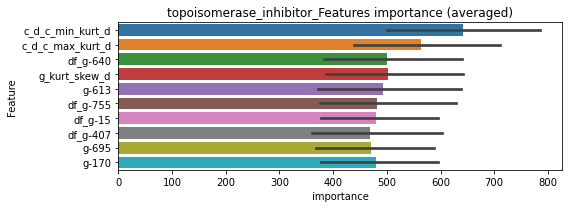

len(train_index) : 2759
len(valid_index) : 920
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0545178	valid_1's binary_logloss: 0.103609
[2000]	training's binary_logloss: 0.0276376	valid_1's binary_logloss: 0.0740287
[3000]	training's binary_logloss: 0.0183156	valid_1's binary_logloss: 0.0632325
[4000]	training's binary_logloss: 0.0136864	valid_1's binary_logloss: 0.0573686
[5000]	training's binary_logloss: 0.0109559	valid_1's binary_logloss: 0.0538832
[6000]	training's binary_logloss: 0.00911928	valid_1's binary_logloss: 0.0515091
[7000]	training's binary_logloss: 0.00783103	valid_1's binary_logloss: 0.0496926
Early stopping, best iteration is:
[7512]	training's binary_logloss: 0.00730789	valid_1's binary_logloss: 0.0489283


len(train_index) : 2759
len(valid_index) : 920
================================= fold 2/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0538768	valid_1's binary_logloss: 0.107655
[2000]	training's binary_logloss: 0.0272305	valid_1's binary_logloss: 0.0815118
[3000]	training's binary_logloss: 0.0181129	valid_1's binary_logloss: 0.0715582
[4000]	training's binary_logloss: 0.0135688	valid_1's binary_logloss: 0.0660247
[5000]	training's binary_logloss: 0.0108402	valid_1's binary_logloss: 0.062427
Early stopping, best iteration is:
[5185]	training's binary_logloss: 0.0104541	valid_1's binary_logloss: 0.0618895


len(train_index) : 2759
len(valid_index) : 920
================================= fold 3/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0556043	valid_1's binary_logloss: 0.0947442
[2000]	training's binary_logloss: 0.0281718	valid_1's binary_logloss: 0.0644188
[3000]	training's binary_logloss: 0.01871	valid_1's binary_logloss: 0.0529573
[4000]	training's binary_logloss: 0.0139748	valid_1's binary_logloss: 0.0467221
[5000]	training's binary_logloss: 0.011172	valid_1's binary_logloss: 0.0428425
[6000]	training's binary_logloss: 0.00932186	valid_1's binary_logloss: 0.0399937
[7000]	training's binary_logloss: 0.00800517	valid_1's binary_logloss: 0.0379199
[8000]	training's binary_logloss: 0.00702644	valid_1's binary_logloss: 0.0362469
[9000]	training's binary_logloss: 0.00626165	valid_1's binary_logloss: 0.034962
[10000]	training's binary_logloss: 0.0056573	valid_1's binary_logloss: 0.0339208
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0056573	valid_1's binary_logloss: 0.0339208


len(train_index) : 2760
len(valid_index) : 919
================================= fold 4/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0547283	valid_1's binary_logloss: 0.10019
[2000]	training's binary_logloss: 0.0277766	valid_1's binary_logloss: 0.0705648
[3000]	training's binary_logloss: 0.0184093	valid_1's binary_logloss: 0.0590183
[4000]	training's binary_logloss: 0.0137609	valid_1's binary_logloss: 0.0530214
[5000]	training's binary_logloss: 0.0109998	valid_1's binary_logloss: 0.0491597
[6000]	training's binary_logloss: 0.00917678	valid_1's binary_logloss: 0.0465701
[7000]	training's binary_logloss: 0.00788173	valid_1's binary_logloss: 0.0445
[8000]	training's binary_logloss: 0.0069158	valid_1's binary_logloss: 0.0429258
[9000]	training's binary_logloss: 0.00617268	valid_1's binary_logloss: 0.0416587
Early stopping, best iteration is:
[9584]	training's binary_logloss: 0.00580734	valid_1's binary_logloss: 0.0409737


topoisomerase_inhibitor logloss: 0.04642955213244155
topoisomerase_inhibitor is unpredictable(><)!
transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000310852	valid_1's binary_logloss: 0.000695179
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000305043	valid_1's binary_logloss: 0.00218979
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000311142	valid_1's binary_logloss: 0.00184727
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015714, Threshold: 0.0145277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0145277, conf_0:0.01017, conf_1:0.01889
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_1: 0.0445277
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0745277


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000308445	valid_1's binary_logloss: 0.00151548


threshold: 0.0745277, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000306713	valid_1's binary_logloss: 0.000669525
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000295563	valid_1's binary_logloss: 0.00263012
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000301364	valid_1's binary_logloss: 0.00139063
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1230839, Threshold: 0.0745277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0135610 Vs.target_rate: 0.00076
Num_p_label: 54.0, Expected: 3.0, Threshold: 0.0745277, conf_0:0.05962, conf_1:0.08943
Num_p_label: 44.0, Expected: 3.0, Adj_threshold_1: 0.1045277
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_2: 0.1345277
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_3: 0.1645277
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_4: 0.1945277
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_5: 0.2245277
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_6: 0.2545277
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_7: 0.2845277


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000302561	valid_1's binary_logloss: 0.00156429


Num_p_label: 21.0, Expected: 3.0, Adj_threshold_8: 0.3145277
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_9: 0.3445277
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_10: 0.3745277
threshold: 0.3745277, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000306713	valid_1's binary_logloss: 0.000669525
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000295563	valid_1's binary_logloss: 0.00263012
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000301364	valid_1's binary_logloss: 0.00139063
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1230839, Threshold: 0.3745277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0042692 Vs.target_rate: 0.00076
Num_p_label: 17.0, Expected: 3.0, Threshold: 0.3745277, conf_0:0.33707, conf_1:0.41198


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000302561	valid_1's binary_logloss: 0.00156429


Num_p_label: 15.0, Expected: 3.0, Adj_threshold_1: 0.4045277
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.4345277
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.4645277
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_4: 0.4945277
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_5: 0.5245277
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_6: 0.5545277
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.5845277
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.6145277
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.6445277
threshold: 0.6445277, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


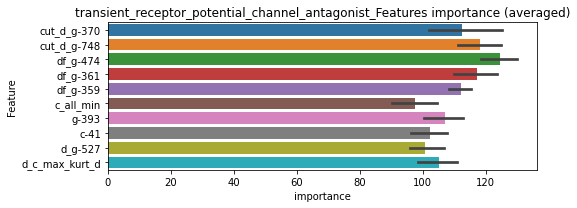

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000302847	valid_1's binary_logloss: 0.000692077


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000298919	valid_1's binary_logloss: 0.00204226


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858


Early stopping, best iteration is:
[819]	training's binary_logloss: 0.00031042	valid_1's binary_logloss: 0.00198832


len(valid_index) : 952
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000302295	valid_1's binary_logloss: 0.000846997


transient_receptor_potential_channel_antagonist logloss: 0.001392402451940104
tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000158342	valid_1's binary_logloss: 0.000345099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000153771	valid_1's binary_logloss: 0.000445348
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000154988	valid_1's binary_logloss: 0.000180942
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004272, Threshold: 0.0011997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0011997, conf_0:0.00084, conf_1:0.00156
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0311997
threshold: 0.0311997, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000155404	valid_1's binary_logloss: 0.000211069


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151456	valid_1's binary_logloss: 0.000245419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000148829	valid_1's binary_logloss: 0.000386354
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000150836	valid_1's binary_logloss: 0.00017527
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1473322, Threshold: 0.0311997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.0311997, conf_0:0.02496, conf_1:0.03744
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0611997
threshold: 0.0611997, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000148712	valid_1's binary_logloss: 0.000187659


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151456	valid_1's binary_logloss: 0.000245419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000148829	valid_1's binary_logloss: 0.000386354
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000150836	valid_1's binary_logloss: 0.00017527
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1473322, Threshold: 0.0611997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0611997, conf_0:0.05508, conf_1:0.06732
threshold: 0.0611997, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000148712	valid_1's binary_logloss: 0.000187659


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


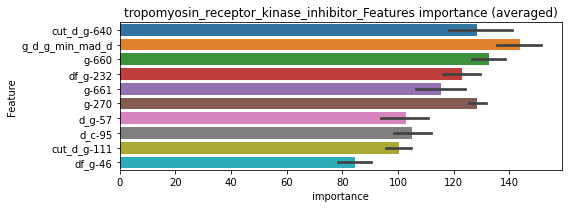

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


[1000]	training's binary_logloss: 0.000149062	valid_1's binary_logloss: 0.00024782
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000149062	valid_1's binary_logloss: 0.00024782
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148556	valid_1's binary_logloss: 0.00042465
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000148374	valid_1's binary_logloss: 0.000424465


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000150313	valid_1's binary_logloss: 0.000180757
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148979	valid_1's binary_logloss: 0.000168753
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000148591	valid_1's binary_logloss: 0.000168321


tropomyosin_receptor_kinase_inhibitor logloss: 0.00025534506795172934
trpv_agonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000366067	valid_1's binary_logloss: 0.00126781
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00035611	valid_1's binary_logloss: 0.00275712
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000369646	valid_1's binary_logloss: 0.00192
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020056, Threshold: 0.0075674, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000368987	valid_1's binary_logloss: 0.000955798


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0075674, conf_0:0.00530, conf_1:0.00984
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_1: 0.0375674
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_2: 0.0675674
threshold: 0.0675674, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000356873	valid_1's binary_logloss: 0.000986754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000374036	valid_1's binary_logloss: 0.00247686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00037651	valid_1's binary_logloss: 0.00123499
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000354696	valid_1's binary_logloss: 0.000867327


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0833569, Threshold: 0.0675674, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00105
Num_p_label: 12.0, Expected: 4.2, Threshold: 0.0675674, conf_0:0.05405, conf_1:0.08108
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_1: 0.0975674
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.1275674
threshold: 0.1275674, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000356873	valid_1's binary_logloss: 0.000986754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000374036	valid_1's binary_logloss: 0.00247686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00037651	valid_1's binary_logloss: 0.00123499
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000354696	valid_1's binary_logloss: 0.000867327


y_Threshold: 0.0833569, Threshold: 0.1275674, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.1275674, conf_0:0.11481, conf_1:0.14032
threshold: 0.1275674, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


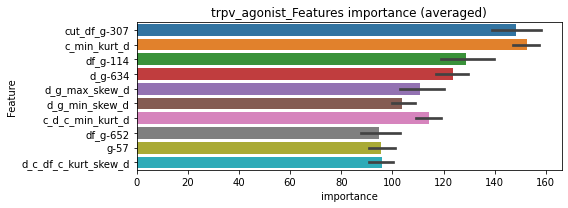

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000364085	valid_1's binary_logloss: 0.00111565


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000357457	valid_1's binary_logloss: 0.00195582


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.00036275	valid_1's binary_logloss: 0.000972711


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.00036467	valid_1's binary_logloss: 0.000893557


trpv_agonist logloss: 0.0012348773105491132
trpv_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000631799	valid_1's binary_logloss: 0.0246699
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000493433	valid_1's binary_logloss: 0.00767099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000480227	valid_1's binary_logloss: 0.00258733
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0036482, Threshold: 0.0161328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000752807	valid_1's binary_logloss: 0.0239162


p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0161328, conf_0:0.01129, conf_1:0.02097
Num_p_label: 7.0, Expected: 8.0, Adj_threshold_1: 0.0461328
threshold: 0.0461328, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000483122	valid_1's binary_logloss: 0.0102094
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000474665	valid_1's binary_logloss: 0.00913165
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000484516	valid_1's binary_logloss: 0.00962117
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000479999	valid_1's binary_logloss: 0.014094


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0138519, Threshold: 0.0461328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0070316 Vs.target_rate: 0.00202
Num_p_label: 28.0, Expected: 8.0, Threshold: 0.0461328, conf_0:0.03691, conf_1:0.05536
Num_p_label: 14.0, Expected: 8.0, Adj_threshold_1: 0.0761328
threshold: 0.0761328, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000478853	valid_1's binary_logloss: 0.010873
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000487059	valid_1's binary_logloss: 0.0162167
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000470593	valid_1's binary_logloss: 0.00871787
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000471646	valid_1's binary_logloss: 0.00487625


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0138072, Threshold: 0.0761328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0050226 Vs.target_rate: 0.00202
Num_p_label: 20.0, Expected: 8.0, Threshold: 0.0761328, conf_0:0.06852, conf_1:0.08375
threshold: 0.0761328, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


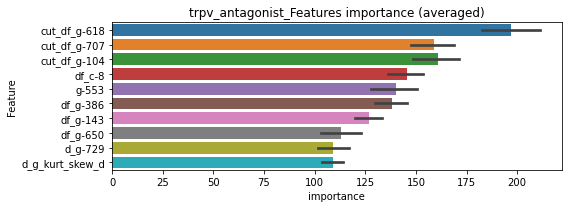

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000551233	valid_1's binary_logloss: 0.00975548


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000606221	valid_1's binary_logloss: 0.0157761


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000586052	valid_1's binary_logloss: 0.00888632


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000480762	valid_1's binary_logloss: 0.00412039


trpv_antagonist logloss: 0.009634583014233186


mutually exclusive columns: tubulin_inhibitor


tubulin_inhibitor, len(trt): 316, len(othr): 7122
target_rate: 0.0132695 → Adj_target_rate: 0.0111926


selected negative label: 7122


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0725145	valid_1's binary_logloss: 0.154983
[2000]	training's binary_logloss: 0.0366339	valid_1's binary_logloss: 0.131775
Early stopping, best iteration is:
[2903]	training's binary_logloss: 0.0245282	valid_1's binary_logloss: 0.123582
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0742174	valid_1's binary_logloss: 0.142822
[2000]	training's binary_logloss: 0.0373876	valid_1's binary_logloss: 0.115813
[3000]	training's binary_logloss: 0.0242316	valid_1's binary_logloss: 0.1063
Early stopping, best iteration is:
[3773]	training's binary_logloss: 0.0188531	valid_1's binary_logloss: 0.10198
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0725019	valid_1's binary_logloss: 0.15702
[2000]	training's binary_logloss: 0.0365878	valid_1's binary_logloss: 0.132269
[3000]	training's binary_logloss: 0.0236

1 / 3, AUC score:0.973, PR-AUC:0.950
y_Threshold: 0.0768995, Threshold: 0.1321627, pos_neg_ratio: 0.8000000
Remove_noisy_data: 498 → Positive_corect_labels: 1318/8048
p_label_rate: 0.0100452 Vs.target_rate: 0.01327
Num_p_label: 40.0, Expected: 52.8, Threshold: 0.1321627, conf_0:0.09251, conf_1:0.17181
threshold: 0.1321627, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1318.0/8048, y_label_rate: 0.1637674
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0574176	valid_1's binary_logloss: 0.119141
[2000]	training's binary_logloss: 0.0285619	valid_1's binary_logloss: 0.0934422
Early stopping, best iteration is:
[2553]	training's binary_logloss: 0.0220361	valid_1's binary_logloss: 0.0875601
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.057086	valid_1's binary_logloss: 0.116182
[2000]	training's binary_logloss: 0.028542	valid_1's binary_logloss: 0.0918672
Early stopping, best iteration is:
[2543]	training's binary_logloss: 0.0220484	valid_1's binary_logloss: 0.0859725
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0567345	valid_1's binary_logloss: 0.117014
[2000]	training's binary_logloss: 0.0282167	valid_1's binary_logloss: 0.0927499
[3000]	training's binary_logloss: 0.0184172	valid_1's binary_logloss: 0.0838123
Early stopping, best iteration i

2 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.1101742, Threshold: 0.1321627, pos_neg_ratio: 0.8000000
Remove_noisy_data: 118 → Positive_corect_labels: 1259.0/7930
p_label_rate: 0.0195881 Vs.target_rate: 0.01327
Num_p_label: 78.0, Expected: 52.8, Threshold: 0.1321627, conf_0:0.10573, conf_1:0.15860
threshold: 0.1321627, positive_p_label: 78.0/3982, p_label_rate: 0.0195881
positive_y_label: 1259.0/7930, y_label_rate: 0.1587642
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0514576	valid_1's binary_logloss: 0.112131
[2000]	training's binary_logloss: 0.0253871	valid_1's binary_logloss: 0.0874945
[3000]	training's binary_logloss: 0.0165151	valid_1's binary_logloss: 0.0783968
Early stopping, best iteration is:
[3581]	training's binary_logloss: 0.0136983	valid_1's binary_logloss: 0.0754934
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0516462	valid_1's binary_logloss: 0.110271
[2000]	training's binary_logloss: 0.0256505	valid_1's binary_logloss: 0.0867158
[3000]	training's binary_logloss: 0.0167588	valid_1's binary_logloss: 0.0782132
[4000]	training's binary_logloss: 0.012315	valid_1's binary_logloss: 0.0732734
Early stopping, best iteration is:
[4215]	training's binary_logloss: 0.0116652	valid_1's binary_logloss: 0.0726441
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_loglo

3 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.1034481, Threshold: 0.1321627, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 1216.0/7844
p_label_rate: 0.0175791 Vs.target_rate: 0.01327
Num_p_label: 70.0, Expected: 52.8, Threshold: 0.1321627, conf_0:0.11895, conf_1:0.14538
threshold: 0.1321627, positive_p_label: 70.0/3982, p_label_rate: 0.0175791
positive_y_label: 1216.0/7844, y_label_rate: 0.1550229


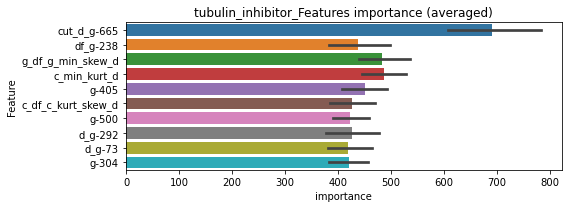

len(train_index) : 5883
len(valid_index) : 1961
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0498783	valid_1's binary_logloss: 0.102567
[2000]	training's binary_logloss: 0.0251107	valid_1's binary_logloss: 0.0795431
[3000]	training's binary_logloss: 0.0166116	valid_1's binary_logloss: 0.0708815
[4000]	training's binary_logloss: 0.0123119	valid_1's binary_logloss: 0.0658573
Early stopping, best iteration is:
[4158]	training's binary_logloss: 0.0118385	valid_1's binary_logloss: 0.0653162


len(train_index) : 5883
len(valid_index) : 1961
================================= fold 2/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0505649	valid_1's binary_logloss: 0.0981527
[2000]	training's binary_logloss: 0.0256293	valid_1's binary_logloss: 0.0753806
[3000]	training's binary_logloss: 0.0169008	valid_1's binary_logloss: 0.0666962
Early stopping, best iteration is:
[3580]	training's binary_logloss: 0.0140583	valid_1's binary_logloss: 0.0637483


len(train_index) : 5883
len(valid_index) : 1961
================================= fold 3/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0510181	valid_1's binary_logloss: 0.0905248
[2000]	training's binary_logloss: 0.0259667	valid_1's binary_logloss: 0.0665031
[3000]	training's binary_logloss: 0.0171382	valid_1's binary_logloss: 0.0576437
[4000]	training's binary_logloss: 0.0127045	valid_1's binary_logloss: 0.0526471
[5000]	training's binary_logloss: 0.0101425	valid_1's binary_logloss: 0.0500318
Early stopping, best iteration is:
[4988]	training's binary_logloss: 0.0101641	valid_1's binary_logloss: 0.0499934


len(train_index) : 5883
len(valid_index) : 1961
================================= fold 4/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0498192	valid_1's binary_logloss: 0.0983138
[2000]	training's binary_logloss: 0.0253636	valid_1's binary_logloss: 0.0737462
[3000]	training's binary_logloss: 0.0168266	valid_1's binary_logloss: 0.0639291
[4000]	training's binary_logloss: 0.0124485	valid_1's binary_logloss: 0.0585922
[5000]	training's binary_logloss: 0.00992406	valid_1's binary_logloss: 0.0551414
Early stopping, best iteration is:
[4989]	training's binary_logloss: 0.0099421	valid_1's binary_logloss: 0.0551158


tubulin_inhibitor logloss: 0.05854340883793538
tubulin_inhibitor is unpredictable(><)!
tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3281


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000730203	valid_1's binary_logloss: 0.0374405
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.0016925	valid_1's binary_logloss: 0.0351582
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000811516	valid_1's binary_logloss: 0.0204015
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.00097803	valid_1's binary_logloss: 0.0338618


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0066807, Threshold: 0.0654613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0654613, conf_0:0.04582, conf_1:0.08510
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_1: 0.0954613
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_2: 0.1254613
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_3: 0.1554613
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_4: 0.1854613
threshold: 0.1854613, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000665136	valid_1's binary_logloss: 0.023556
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000699046	valid_1's binary_logloss: 0.0223813
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000813546	valid_1's binary_logloss: 0.0194321
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000795993	valid_1's binary_logloss: 0.036984


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0213968, Threshold: 0.1854613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0087896 Vs.target_rate: 0.00307
Num_p_label: 35.0, Expected: 12.2, Threshold: 0.1854613, conf_0:0.14837, conf_1:0.22255
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_1: 0.2154613
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_2: 0.2454613
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_3: 0.2754613
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_4: 0.3054613
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_5: 0.3354613
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_6: 0.3654613
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_7: 0.3954613
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_8: 0.4254613
threshold: 0.4254613, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 648.0/3789, y_label_rate: 0.1710214
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000587186	valid_1's binary_logloss: 0.021493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000728794	valid_1's binary_logloss: 0.0295397
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000658302	valid_1's binary_logloss: 0.0239731
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000652235	valid_1's binary_logloss: 0.0202716


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0256288, Threshold: 0.4254613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0040181 Vs.target_rate: 0.00307
Num_p_label: 16.0, Expected: 12.2, Threshold: 0.4254613, conf_0:0.38292, conf_1:0.46801
threshold: 0.4254613, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 647.0/3787, y_label_rate: 0.1708476


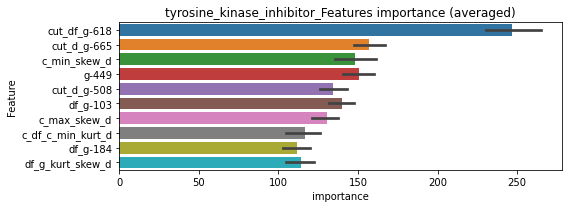

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.00069881	valid_1's binary_logloss: 0.0140231


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.00087972	valid_1's binary_logloss: 0.0254227
Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000963704	valid_1's binary_logloss: 0.0315166
Training until validation scores don't improve for 30 rounds


tyrosine_kinase_inhibitor logloss: 0.022896455316405065


Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00141865	valid_1's binary_logloss: 0.0206209


ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3285
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3285


N_features:306
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000239278	valid_1's binary_logloss: 0.00255787
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000238503	valid_1's binary_logloss: 0.00068939
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.0002388	valid_1's binary_logloss: 0.000321361
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008597, Threshold: 0.0023451, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0023451, conf_0:0.00164, conf_1:0.00305
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0323451
threshold: 0.0323451, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000236753	valid_1's binary_logloss: 0.00223279


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000229127	valid_1's binary_logloss: 0.00351237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000232432	valid_1's binary_logloss: 0.000747148
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000234125	valid_1's binary_logloss: 0.000275362
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192647, Threshold: 0.0323451, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00050
Num_p_label: 8.0, Expected: 2.0, Threshold: 0.0323451, conf_0:0.02588, conf_1:0.03881
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0623451
threshold: 0.0623451, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00023343	valid_1's binary_logloss: 0.00229689


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000229127	valid_1's binary_logloss: 0.00351237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000232432	valid_1's binary_logloss: 0.000747148
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000234125	valid_1's binary_logloss: 0.000275362
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192647, Threshold: 0.0623451, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0623451, conf_0:0.05611, conf_1:0.06858
threshold: 0.0623451, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00023343	valid_1's binary_logloss: 0.00229689


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


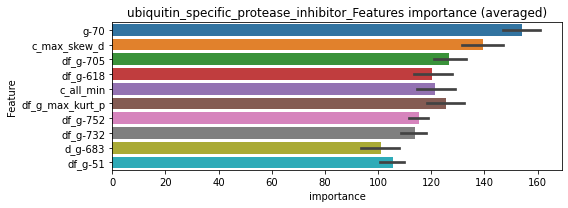

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000234394	valid_1's binary_logloss: 0.00215609
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[956]	training's binary_logloss: 0.00023373	valid_1's binary_logloss: 0.000453745
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000238791	valid_1's binary_logloss: 0.000301337
Training until validation scores don't improve for 30 rounds


ubiquitin_specific_protease_inhibitor logloss: 0.0011310687317999215


Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000236798	valid_1's binary_logloss: 0.00161239
mutually exclusive columns: vegfr_inhibitor


vegfr_inhibitor, len(trt): 170, len(othr): 4633
target_rate: 0.0071387 → Adj_target_rate: 0.0066081


selected negative label: 4633


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0599893	valid_1's binary_logloss: 0.131545
[2000]	training's binary_logloss: 0.0304077	valid_1's binary_logloss: 0.110785
Early stopping, best iteration is:
[2359]	training's binary_logloss: 0.0255947	valid_1's binary_logloss: 0.107442
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0599088	valid_1's binary_logloss: 0.128335
[2000]	training's binary_logloss: 0.0303265	valid_1's binary_logloss: 0.106654
Early stopping, best iteration is:
[2515]	training's binary_logloss: 0.0238383	valid_1's binary_logloss: 0.101545
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0601322	valid_1's binary_logloss: 0.135878
[2000]	training's binary_logloss: 0.0303797	valid_1's binary_logloss: 0.115082
Early stopping, best iteration is:
[2622]	training's binary_logloss: 0.0228793	valid_1's binary_logloss: 0.110217
T

1 / 3, AUC score:0.985, PR-AUC:0.968
y_Threshold: 0.0686193, Threshold: 0.1290780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 288 → Positive_corect_labels: 875/5271
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, Expected: 28.4, Threshold: 0.1290780, conf_0:0.09035, conf_1:0.16780
threshold: 0.1290780, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 875.0/5271, y_label_rate: 0.1660027
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.050496	valid_1's binary_logloss: 0.0954032
[2000]	training's binary_logloss: 0.0251868	valid_1's binary_logloss: 0.0724123
[3000]	training's binary_logloss: 0.0165908	valid_1's binary_logloss: 0.0641787
[4000]	training's binary_logloss: 0.0123277	valid_1's binary_logloss: 0.0597508
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.011844	valid_1's binary_logloss: 0.0592248
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0496718	valid_1's binary_logloss: 0.10764
[2000]	training's binary_logloss: 0.0247642	valid_1's binary_logloss: 0.0831609
[3000]	training's binary_logloss: 0.0162308	valid_1's binary_logloss: 0.0734893
[4000]	training's binary_logloss: 0.0120711	valid_1's binary_logloss: 0.0687698
Early stopping, best iteration is:
[4165]	training's binary_logloss: 0.0115835	valid_1's binary_logloss: 0.0680404
Training unt

2 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0905757, Threshold: 0.1290780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 847.0/5215
p_label_rate: 0.0145655 Vs.target_rate: 0.00714
Num_p_label: 58.0, Expected: 28.4, Threshold: 0.1290780, conf_0:0.10326, conf_1:0.15489
Num_p_label: 33.0, Expected: 28.4, Adj_threshold_1: 0.1590780
threshold: 0.1590780, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 847.0/5215, y_label_rate: 0.1624161
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0459585	valid_1's binary_logloss: 0.0903335
[2000]	training's binary_logloss: 0.0229309	valid_1's binary_logloss: 0.0689569
[3000]	training's binary_logloss: 0.0150904	valid_1's binary_logloss: 0.0614639
Early stopping, best iteration is:
[3609]	training's binary_logloss: 0.0124916	valid_1's binary_logloss: 0.0590041
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0462992	valid_1's binary_logloss: 0.0843709
[2000]	training's binary_logloss: 0.0231146	valid_1's binary_logloss: 0.061368
[3000]	training's binary_logloss: 0.0152079	valid_1's binary_logloss: 0.053127
[4000]	training's binary_logloss: 0.0113607	valid_1's binary_logloss: 0.0488348
Early stopping, best iteration is:
[4150]	training's binary_logloss: 0.0109498	valid_1's binary_logloss: 0.0484089
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logl

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0898487, Threshold: 0.1590780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 828.0/5177
p_label_rate: 0.0067805 Vs.target_rate: 0.00714
Num_p_label: 27.0, Expected: 28.4, Threshold: 0.1590780, conf_0:0.14317, conf_1:0.17499
threshold: 0.1590780, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 828.0/5177, y_label_rate: 0.1599382


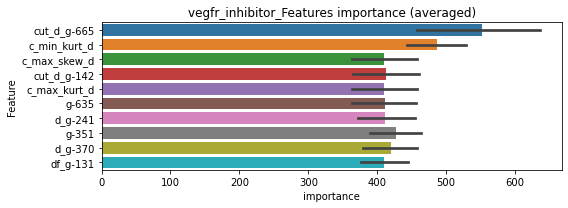

len(train_index) : 3882
len(valid_index) : 1295
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.04615	valid_1's binary_logloss: 0.0937016
[2000]	training's binary_logloss: 0.0232468	valid_1's binary_logloss: 0.069286
[3000]	training's binary_logloss: 0.0154636	valid_1's binary_logloss: 0.0603958
[4000]	training's binary_logloss: 0.0115558	valid_1's binary_logloss: 0.0560092
[5000]	training's binary_logloss: 0.00923954	valid_1's binary_logloss: 0.0531483
[6000]	training's binary_logloss: 0.00769717	valid_1's binary_logloss: 0.0510878
Early stopping, best iteration is:
[6149]	training's binary_logloss: 0.00751105	valid_1's binary_logloss: 0.0508294


len(train_index) : 3883
len(valid_index) : 1294
================================= fold 2/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0467972	valid_1's binary_logloss: 0.0830537
[2000]	training's binary_logloss: 0.0236331	valid_1's binary_logloss: 0.0594336
[3000]	training's binary_logloss: 0.0156575	valid_1's binary_logloss: 0.0505505
[4000]	training's binary_logloss: 0.0116982	valid_1's binary_logloss: 0.0460193
[5000]	training's binary_logloss: 0.00933956	valid_1's binary_logloss: 0.0431791
[6000]	training's binary_logloss: 0.00777333	valid_1's binary_logloss: 0.041042
[7000]	training's binary_logloss: 0.0066714	valid_1's binary_logloss: 0.0395804
[8000]	training's binary_logloss: 0.00585287	valid_1's binary_logloss: 0.0383783
Early stopping, best iteration is:
[8767]	training's binary_logloss: 0.00535304	valid_1's binary_logloss: 0.037603


len(train_index) : 3883
len(valid_index) : 1294
================================= fold 3/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0467279	valid_1's binary_logloss: 0.0809355
[2000]	training's binary_logloss: 0.0236136	valid_1's binary_logloss: 0.0570331
[3000]	training's binary_logloss: 0.0156548	valid_1's binary_logloss: 0.0479732
[4000]	training's binary_logloss: 0.0116994	valid_1's binary_logloss: 0.043366
[5000]	training's binary_logloss: 0.00934608	valid_1's binary_logloss: 0.0403572
[6000]	training's binary_logloss: 0.00778713	valid_1's binary_logloss: 0.0381339
[7000]	training's binary_logloss: 0.00668657	valid_1's binary_logloss: 0.0366605
[8000]	training's binary_logloss: 0.00586376	valid_1's binary_logloss: 0.0354518
Early stopping, best iteration is:
[7975]	training's binary_logloss: 0.00588023	valid_1's binary_logloss: 0.0354365


len(train_index) : 3883
len(valid_index) : 1294
================================= fold 4/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0461797	valid_1's binary_logloss: 0.0896223
[2000]	training's binary_logloss: 0.0232802	valid_1's binary_logloss: 0.0647928
[3000]	training's binary_logloss: 0.0154704	valid_1's binary_logloss: 0.0560486
[4000]	training's binary_logloss: 0.011589	valid_1's binary_logloss: 0.0514679
[5000]	training's binary_logloss: 0.00925644	valid_1's binary_logloss: 0.048648
[6000]	training's binary_logloss: 0.00771732	valid_1's binary_logloss: 0.0466902
Early stopping, best iteration is:
[6875]	training's binary_logloss: 0.00674163	valid_1's binary_logloss: 0.0452965


vegfr_inhibitor logloss: 0.0422930223333352
vegfr_inhibitor is unpredictable(><)!
vitamin_b, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000370475	valid_1's binary_logloss: 0.00235469
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000361799	valid_1's binary_logloss: 0.00259905
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000374568	valid_1's binary_logloss: 0.00162773
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023522, Threshold: 0.0083625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0083625, conf_0:0.00585, conf_1:0.01087
Num_p_label: 7.0, Expected: 4.3, Adj_threshold_1: 0.0383625


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000393633	valid_1's binary_logloss: 0.00655536


threshold: 0.0383625, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000357089	valid_1's binary_logloss: 0.00223856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000348083	valid_1's binary_logloss: 0.00203093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000357797	valid_1's binary_logloss: 0.00161179
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0372915, Threshold: 0.0383625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0075339 Vs.target_rate: 0.00109
Num_p_label: 30.0, Expected: 4.3, Threshold: 0.0383625, conf_0:0.03069, conf_1:0.04603
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_1: 0.0683625
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_2: 0.0983625


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000370804	valid_1's binary_logloss: 0.00617657


threshold: 0.0983625, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000357089	valid_1's binary_logloss: 0.00223856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000348083	valid_1's binary_logloss: 0.00203093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000357797	valid_1's binary_logloss: 0.00161179
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0372915, Threshold: 0.0983625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.0983625, conf_0:0.08853, conf_1:0.10820


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000370804	valid_1's binary_logloss: 0.00617657


threshold: 0.0983625, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


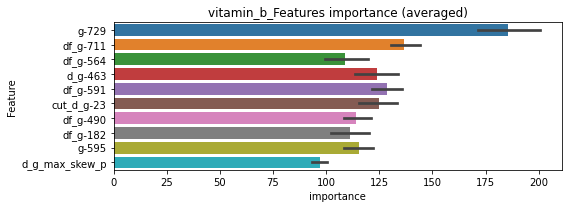

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000366167	valid_1's binary_logloss: 0.00170483


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000358442	valid_1's binary_logloss: 0.00168274


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000369431	valid_1's binary_logloss: 0.00144623


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds


vitamin_b logloss: 0.0024341085613936407


Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000387473	valid_1's binary_logloss: 0.00490468


vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3286
target_rate: 0.0016377 → Adj_target_rate: 0.0018906


selected negative label: 3286


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000475473	valid_1's binary_logloss: 0.00762279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00044715	valid_1's binary_logloss: 0.00681044
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.00044981	valid_1's binary_logloss: 0.00471942
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000455607	valid_1's binary_logloss: 0.00636758


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030247, Threshold: 0.0141003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00164
Num_p_label: 40.0, Expected: 6.5, Threshold: 0.0141003, conf_0:0.00987, conf_1:0.01833
Num_p_label: 12.0, Expected: 6.5, Adj_threshold_1: 0.0441003
threshold: 0.0441003, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000465072	valid_1's binary_logloss: 0.0080092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000438165	valid_1's binary_logloss: 0.00705609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000450427	valid_1's binary_logloss: 0.00519398
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000433087	valid_1's binary_logloss: 0.00737403


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0202189, Threshold: 0.0441003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0087896 Vs.target_rate: 0.00164
Num_p_label: 35.0, Expected: 6.5, Threshold: 0.0441003, conf_0:0.03528, conf_1:0.05292
Num_p_label: 21.0, Expected: 6.5, Adj_threshold_1: 0.0741003
Num_p_label: 14.0, Expected: 6.5, Adj_threshold_2: 0.1041003
threshold: 0.1041003, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000434307	valid_1's binary_logloss: 0.0113504
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000428897	valid_1's binary_logloss: 0.00525585
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000440312	valid_1's binary_logloss: 0.00122139
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000469261	valid_1's binary_logloss: 0.00799921


y_Threshold: 0.0249868, Threshold: 0.1041003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0035158 Vs.target_rate: 0.00164
Num_p_label: 14.0, Expected: 6.5, Threshold: 0.1041003, conf_0:0.09369, conf_1:0.11451
threshold: 0.1041003, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


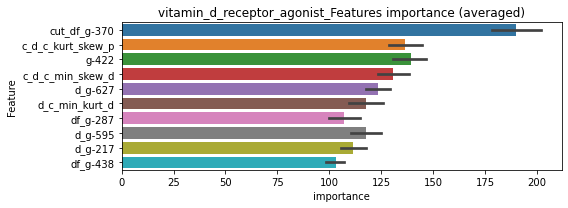

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000660445	valid_1's binary_logloss: 0.0114816
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.00044065	valid_1's binary_logloss: 0.00450584


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.000444788	valid_1's binary_logloss: 0.00126422


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000445406	valid_1's binary_logloss: 0.00753937


vitamin_d_receptor_agonist logloss: 0.006199144804940976
wnt_inhibitor, len(trt): 30, len(othr): 3283
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3283


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000370373	valid_1's binary_logloss: 0.0022413
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000385505	valid_1's binary_logloss: 0.00418155
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000379693	valid_1's binary_logloss: 0.00206049
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000365238	valid_1's binary_logloss: 0.00501873


y_Threshold: 0.0025372, Threshold: 0.0112124, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0112124, conf_0:0.00785, conf_1:0.01458
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.0412124
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.0712124
threshold: 0.0712124, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000354189	valid_1's binary_logloss: 0.00190113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00036553	valid_1's binary_logloss: 0.00267595
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000434545	valid_1's binary_logloss: 0.00195518
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0822038, Threshold: 0.0712124, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000357946	valid_1's binary_logloss: 0.00332253


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0052737 Vs.target_rate: 0.00126
Num_p_label: 21.0, Expected: 5.0, Threshold: 0.0712124, conf_0:0.05697, conf_1:0.08545
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_1: 0.1012124
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.1312124
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_3: 0.1612124
threshold: 0.1612124, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000354189	valid_1's binary_logloss: 0.00190113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00036553	valid_1's binary_logloss: 0.00267595
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000434545	valid_1's binary_logloss: 0.00195518
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0822038, Threshold: 0.1612124, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000357946	valid_1's binary_logloss: 0.00332253


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00126
Num_p_label: 12.0, Expected: 5.0, Threshold: 0.1612124, conf_0:0.14509, conf_1:0.17733
threshold: 0.1612124, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


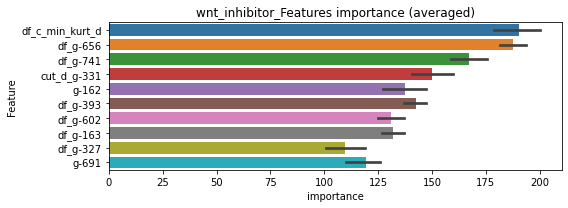

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000361571	valid_1's binary_logloss: 0.00176449
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.000361596	valid_1's binary_logloss: 0.00176448


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000371054	valid_1's binary_logloss: 0.00269226


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856


Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000428035	valid_1's binary_logloss: 0.00348187


len(valid_index) : 951
================================= fold 4/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000368035	valid_1's binary_logloss: 0.00289423


wnt_inhibitor logloss: 0.0027081632603524444


CV:0.017458424412291517


In [53]:
unpredictable = RUN()

In [54]:
unpredictable

['acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'adenosine_receptor_antagonist',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'anesthetic_-_local',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'calcium_channel_blocker',
 'cc_chemokine_receptor_antagonist',
 'cdk_inhibitor',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dna_inhibitor',
 'dopamine_receptor_agonist',
 'dopamine_receptor_antagonist',
 'egfr_inhibitor',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'gaba_receptor_antagonist',
 'glucocorticoid_receptor_agonist',
 'glutamate_receptor_antagonist',
 'hdac_inhibitor',
 'histamine_receptor_antagonist',
 'hmgcr_inhibitor',
 'immunosuppressant',
 'kit_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'opioid_receptor_antagonist',
 'pdgfr_inhibitor